<a href="https://colab.research.google.com/github/NoeSin/AnalisisInteligenteDatosTP0101/blob/main/Copia_de_Copia_de_TP_Grupo4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

En  Mendoza  se  llevó  a  cabo  un  estudio  para  evaluar  la calidad  de  los  vinos.  Se  tomó  una muestra de distintas variedades y bodegas, en las que se midieron las siguientes variables:

•acidez_fija:nivel  de concentración  de  los  ácidos fijos (ácidos poco  volátiles,  que no  se evaporan fácilmente)expresado  en gr/l.

•acido_citrico: nivel  de concentración  del  ácido  cítrico expresado  en  gr/l.  El  ácido  cítrico puede agregar 'frescura' y sabor a los vinos.
•azucar_residual:   cantidad   de   azúcar   que   queda   después   de   que   se   detiene   la fermentaciónexpresada    en  gr/l.Es  raro  encontrar  vinos  con  menos  de  1  gramo/litro  y vinos con másde 45 gramos/litro se consideran dulces.

•cloruros: cantidad de sal en el vino(gr/l).

•dioxido_azufre_libre: nivel  de  concentración  de  dióxido  de  azufre  libre  (SO2).  El  SO2 previene  el  crecimiento  microbiano  y  la  oxidación  del  vino.  En  bajas  concentraciones,  el SO2  es  mayormente  indetectable  en  el  vino,  pero  en  concentraciones  de  SO2  libres superiores a 50 ppm, el SO2 se vuelve evidente en la nariz y el sabor del vino.

•densidad: cantidad de masa contenida en el vino. La densidad del vino es cercana a la del agua dependiendo del porcentaje de alcohol y azúcar contenido.

•pH: describe qué tan ácido o básico es un vino en una escala de 0 (muy ácido) a 14 (muy básico); la mayoría de los vinos están entre 3 y 4 en la escala de pH.

•alcohol: porcentaje de alcohol contenido en el vino.

•tipo: tipo de vino (tinto / blanco).

•calidad: score entre 0 y 10Para poder ser exportados, los vinos deben tener un score de calidad de 7 o superior.Interesa en particular conocer si los vinos son exportables o no

Se solicita:

1)Realizar un análisis descriptivo de los datos, tanto individual como en comparación con la variable calidad. Obtener medidas, tablas y gráficos, e interpretar los resultados más importantes en términos del problema.

2)El   promedio   del   ph   debe encontrarse   en   torno   a   3.20,   ¿se   cumple   con   este requerimiento? ¿Hay diferencias entre los vinos exportables y los que no lo son?

3)Estime la proporción de vinos exportablesen general y tanto para los tintos como para los blancos.

4)Se desea controlar la variabilidad de los vinos exportables, principalmente controlando que el desvío estándar del ácido sea inferior a0.10 ¿Se cumple con el objetivo?

5)¿Existe relación entre el tipo de vino y si es exportable o no?

6)Calcule  una  medida  de  la  relación  entre  las  variables  cuantitativas  y  la  densidad  del vino. ¿Qué características del vino están más relacionadas con su densidad?

#Carga de datos

In [ ]:
library(tidyverse)
library(ggplot2)
library(dplyr)
install.packages('egg')
library(egg)
#library(DescTools)
#library(janitor)
install.packages('EnvStats')
#library(EnvStats)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
install.packages('EnvStats')
library(EnvStats)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
#data = read.csv("/content/Calidad_vinos.csv", sep = ";")

In [ ]:
url = "https://drive.google.com/uc?id=1lZVEnCAI6ULjAlSjUAhBG7MPivt39Vbw"
data = read.csv(url, sep = ";")

In [ ]:
head(data)

acidez_fija acido_citrico azucar_residual cloruros dioxido_azufre_libre
1  7.4        0.00          1.9             0.076    11                  
2  7.8        0.00          2.6             0.098    25                  
3  7.8        0.04          2.3             0.092    15                  
4 11.2        0.56          1.9             0.075    17                  
5  7.4        0.00          1.9             0.076    11                  
6  7.4        0.00          1.8             0.075    13                  
  densidad pH   alcohol calidad tipo 
1 0.9978   3.51 9.4     5       tinto
2 0.9968   3.20 9.8     5       tinto
3 0.9970   3.26 9.8     5       tinto
4 0.9980   3.16 9.8     6       tinto
5 0.9978   3.51 9.4     5       tinto
6 0.9978   3.51 9.4     5       tinto

#Data cleaning

In [ ]:
# Factor de variables cualitativas
data$calidad <-   factor(data$calidad,
                             levels = c(3:9), ordered=TRUE)
data$tipo<-as.factor(data$tipo)

# Agregado si el vino es exportable o no
data$exportable <- data$calidad >=7

In [ ]:
# Creacion de una tabla aplicacando un filtro de eportale a los datos original
# dataExpo = data[data$exportable==TRUE,]

In [ ]:
# Vector de colores. La idea es aplicar un color especifico a cada variable cuantitaiva.
colors <- rainbow(n = 10)

In [ ]:
summary(data)
nrow(data)

  acidez_fija     acido_citrico    azucar_residual     cloruros      
 Min.   : 3.800   Min.   :0.0000   Min.   : 0.600   Min.   :0.00900  
 1st Qu.: 6.400   1st Qu.:0.2500   1st Qu.: 1.800   1st Qu.:0.03800  
 Median : 7.000   Median :0.3100   Median : 3.000   Median :0.04700  
 Mean   : 7.215   Mean   :0.3186   Mean   : 5.443   Mean   :0.05603  
 3rd Qu.: 7.700   3rd Qu.:0.3900   3rd Qu.: 8.100   3rd Qu.:0.06500  
 Max.   :15.900   Max.   :1.6600   Max.   :65.800   Max.   :0.61100  
                                                                     
 dioxido_azufre_libre    densidad            pH           alcohol      calidad 
 Min.   :  1.00       Min.   :0.9871   Min.   :2.720   Min.   : 8.00   3:  30  
 1st Qu.: 17.00       1st Qu.:0.9923   1st Qu.:3.110   1st Qu.: 9.50   4: 216  
 Median : 29.00       Median :0.9949   Median :3.210   Median :10.30   5:2138  
 Mean   : 30.53       Mean   :0.9947   Mean   :3.219   Mean   :10.49   6:2836  
 3rd Qu.: 41.00       3rd Qu.:0.9970   3

[1] 6497

# Analisis variable "Acidez fija"

In [ ]:
library(dplyr)
resumen<-function(dataf, columna)
{


  resultado<-dataf %>%
  summarise(media=mean({{columna}}),
            sd = sd({{columna}}),
            mediana=median({{columna}}),
            q1=quantile({{columna}}, .25),
            q3=quantile({{columna}}, .75),
            iqr= IQR({{columna}}),#agregamos estaba en los titulos del word, ver
            min=min({{columna}}),
            max=max({{columna}}),
            rango= max({{columna}}) - min({{columna}}),
            cv=(sd({{columna}})/mean({{columna}}))*100)
x<- dataf %>% select({{columna}})
 resultado["Variable"]<-colnames(x)
return(resultado)
}

In [ ]:
r<-resumen(data,acidez_fija)
r

media    sd       mediana q1  q3  iqr min max  rango cv       Variable   
1 7.215307 1.296434 7       6.4 7.7 1.3 3.8 15.9 12.1  17.96783 acidez_fija

In [ ]:
data %>%
  summarise(media=mean(acidez_fija),
            mediana=median(acidez_fija),
            min=min(acidez_fija),
            max=max(acidez_fija),
            rango= max(acidez_fija) - min(acidez_fija),
            iqr= IQR(acidez_fija),
            sd = sd(acidez_fija),
            cv=(sd(acidez_fija)/mean(acidez_fija))*100)

media    mediana min max  rango iqr sd       cv      
1 7.215307 7       3.8 15.9 12.1  1.3 1.296434 17.96783

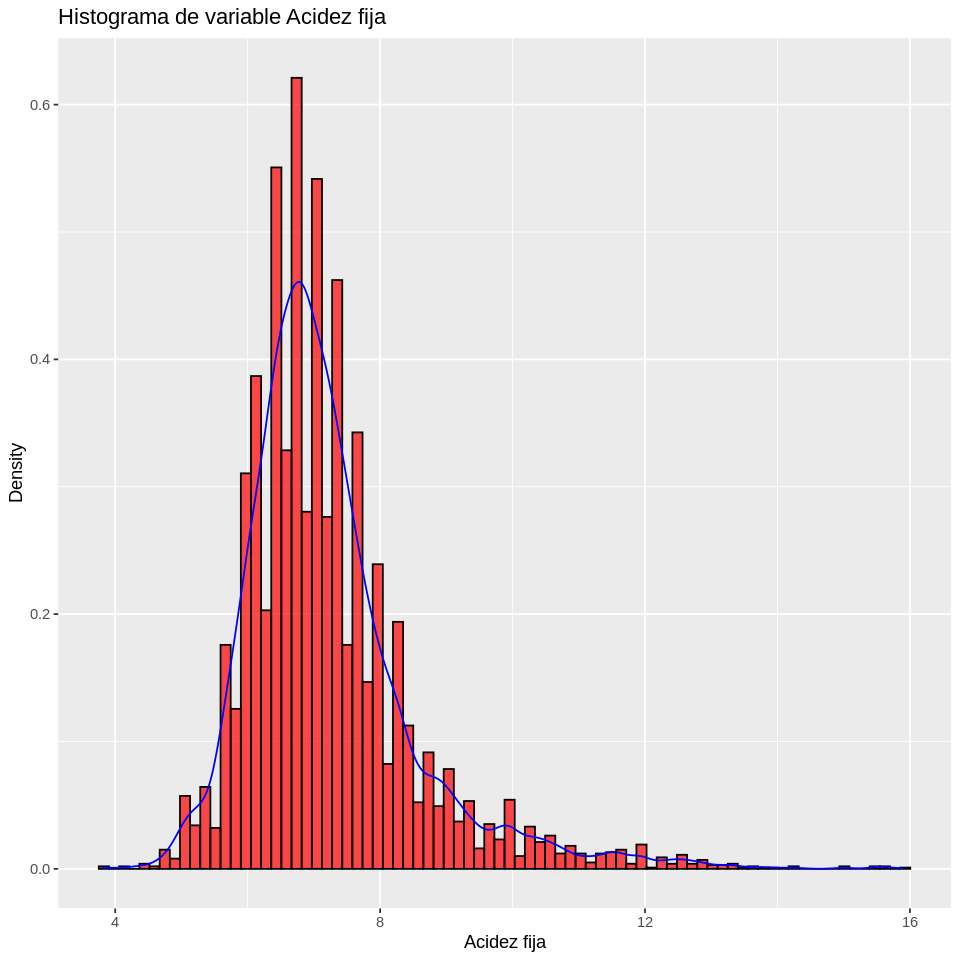

In [ ]:
options(repr.plot.width=8, repr.plot.height=8) #estos options serían para el colab nomás, para que lo imprima bien
g1_1 <- ggplot(data, aes(x = acidez_fija)) +
  geom_histogram(bins = 80, alpha = 0.7, fill = colors[1], color = "black", aes(y= after_stat(density))) +
  geom_density(color = "blue") +
  labs(title = "Histograma de variable Acidez fija", x = "Acidez fija", y = "Density")
g1_1

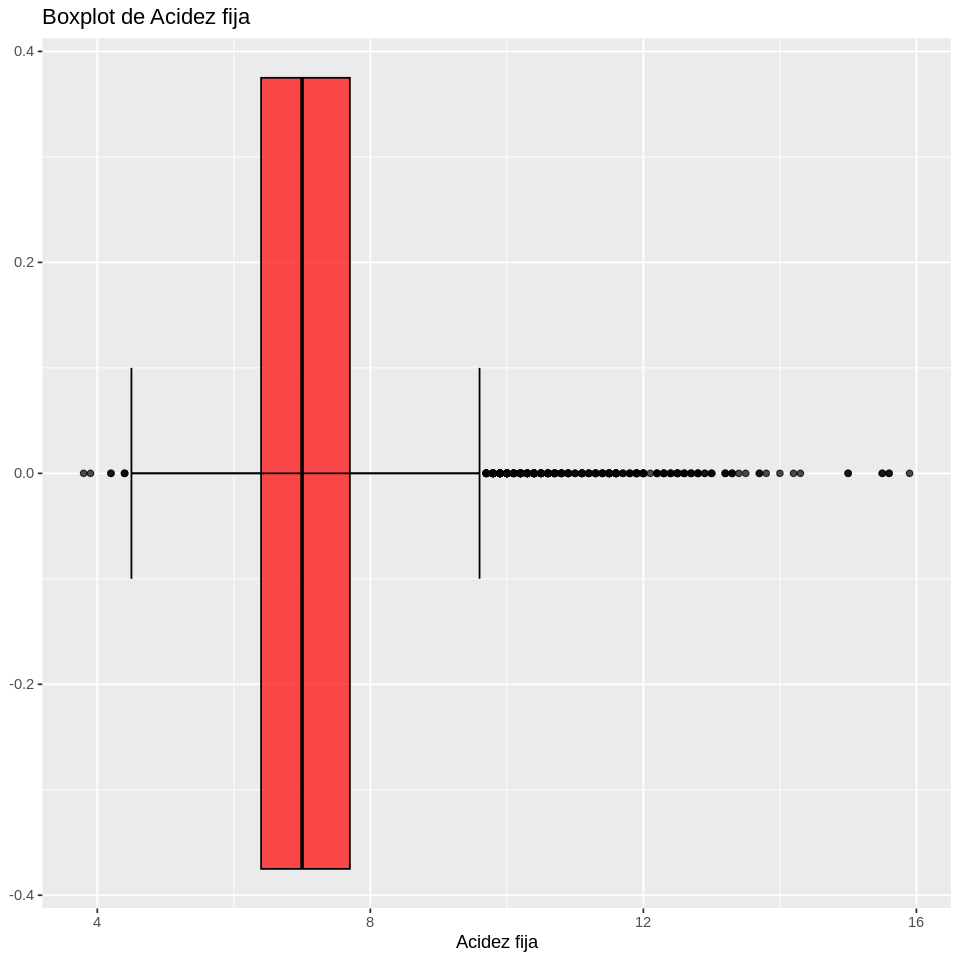

In [ ]:
options(repr.plot.width=8, repr.plot.height=8) #estos options serían para el colab nomás, para que lo imprima bien
g1_2 <- ggplot(data, aes(x = acidez_fija)) +
  geom_boxplot(alpha = 0.7, fill = colors[1], color = "black") +
  labs(title = "Boxplot de Acidez fija", x = "Acidez fija") +
  stat_boxplot(geom = "errorbar", width = 0.2)       # Bigotes
g1_2

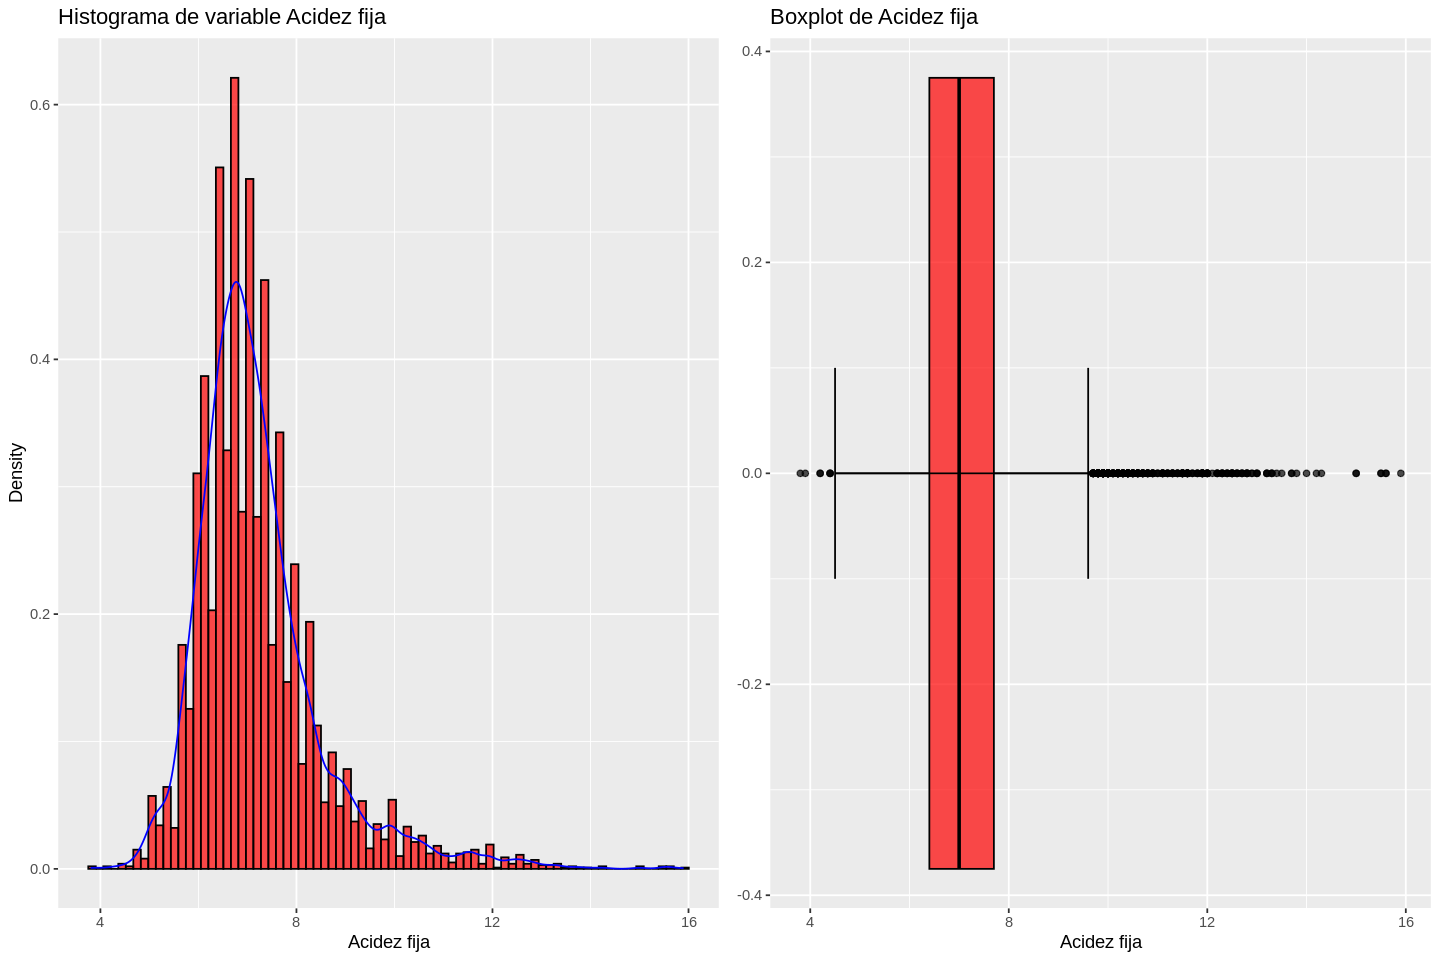

In [ ]:
options(repr.plot.width=12, repr.plot.height=8) #estos options serían para el colab nomás, para que lo imprima bien
ggarrange(g1_1, g1_2, ncol = 2)

In [ ]:
limiteIQR_SupAciF= quantile(data$acidez_fija,.75) + 1.5*IQR(data$acidez_fija)
nrow(filter(data, data$acidez_fija>limiteIQR_SupAciF))

[1] 350

In [ ]:
# de la grafica se observa que acidez fija tambien tiene outliers inferiores
limiteIQR_AciFInferior=quantile(data$acidez_fija, .25) - 1.5*IQR(data$acidez_fija)
nrow(filter(data, data$acidez_fija<limiteIQR_AciFInferior))

[1] 7

La variable "Acidez fija" es una del tipo numerica y continua que asemeja una distrubucion normal. La media y la mediana estan muy cercanas, con una distancia inter-quartil baja en relacion a su media (10%) y tiene un coeficiente de variabilidad del 17%

##Bivariado

In [ ]:

resumenBivariado<-function(dataf, columna, columnaResumen)
{
  resultado<-dataf %>%
     group_by({{columnaResumen}}) %>%
  summarise(
            media=mean({{columna}}),
            sd = sd({{columna}}),
            mediana=median({{columna}}),
            q1=quantile({{columna}}, .25),
            q3=quantile({{columna}}, .75),
            iqr= IQR({{columna}}),#agregamos estaba en los titulos del word, ver
            min=min({{columna}}),
            max=max({{columna}}),
            rango= max({{columna}}) - min({{columna}}),
            cv=(sd({{columna}})/mean({{columna}}))*100)
x<- dataf %>% select({{columna}})
 resultado["Variable"]<-colnames(x)
return(resultado)
}

In [ ]:
rbi<-resumenBivariado(data,acidez_fija,exportable)
rbi

exportable media    sd       mediana q1  q3  iqr min max  rango cv      
1 FALSE      7.247011 1.282968 7.0     6.4 7.7 1.3 3.8 15.9 12.1  17.70341
2  TRUE      7.085709 1.342832 6.9     6.3 7.4 1.1 3.9 15.6 11.7  18.95128
  Variable   
1 acidez_fija
2 acidez_fija

In [ ]:
data %>%
  group_by(exportable) %>%
  summarise(media = mean(acidez_fija),
            mediana= median(acidez_fija),
            min=min(acidez_fija),
            max=max(acidez_fija),
            rango=max(acidez_fija)-min(acidez_fija),
            iqr= IQR(acidez_fija),
            sd = sd(acidez_fija),
            cv=sd(acidez_fija)/mean(acidez_fija)*100
            )

exportable media    mediana min max  rango iqr sd       cv      
1 FALSE      7.247011 7.0     3.8 15.9 12.1  1.3 1.282968 17.70341
2  TRUE      7.085709 6.9     3.9 15.6 11.7  1.1 1.342832 18.95128

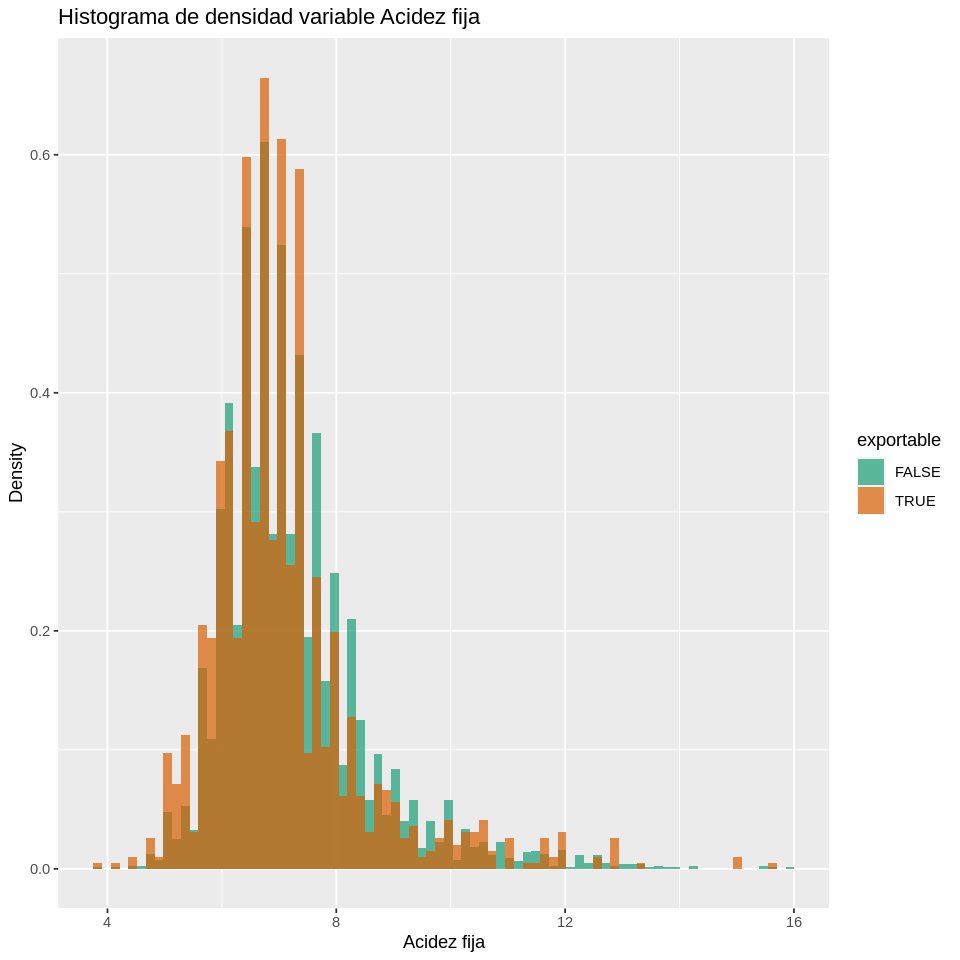

In [ ]:
options(repr.plot.width=8, repr.plot.height=8) #estos options serían para el colab nomás, para que lo imprima bien
g1_3 <- ggplot(data, aes(x = acidez_fija, fill = exportable)) +
  geom_histogram(bins = 80, alpha = 0.7, aes(y= after_stat(density)), position = "identity") +
  labs(title = "Histograma de densidad variable Acidez fija", x = "Acidez fija", y = "Density")+
  scale_fill_brewer(palette="Dark2")
g1_3

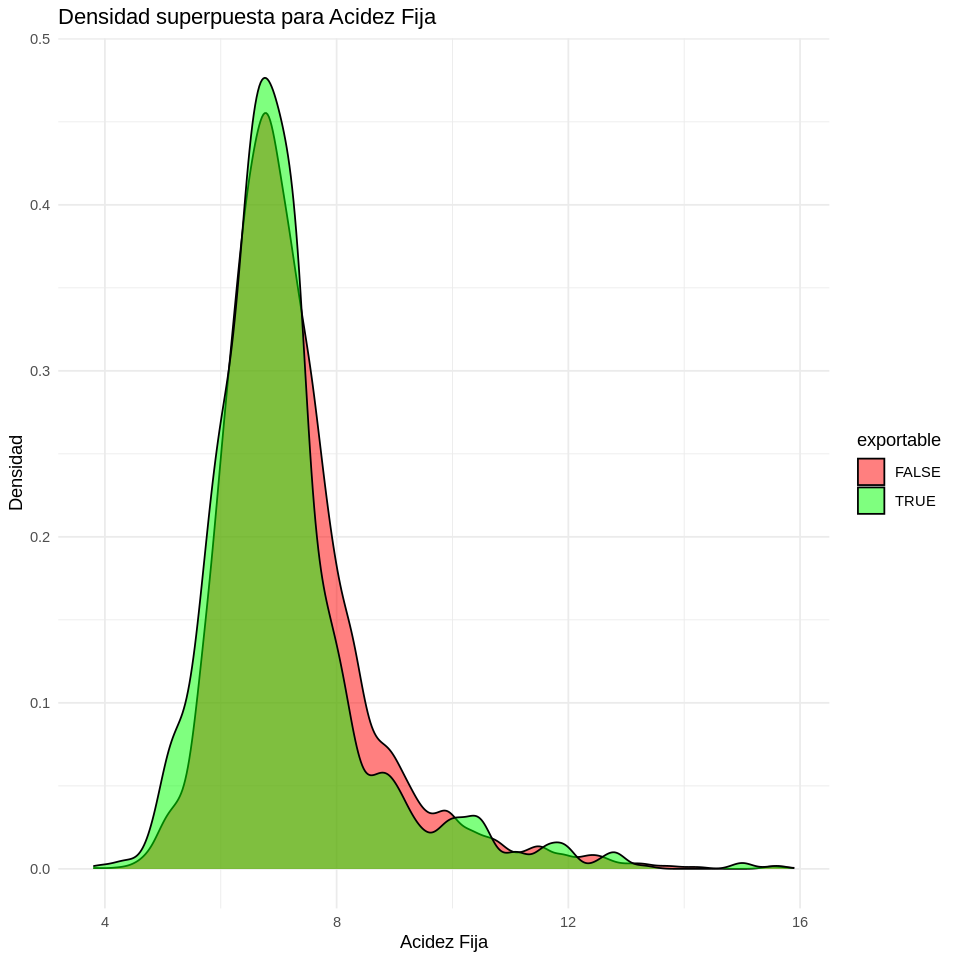

In [ ]:
options(repr.plot.width=8, repr.plot.height=8) #estos options serían para el colab nomás, para que lo imprima bien
g1_4 <- ggplot(data, aes(x = acidez_fija, fill = exportable)) +
  geom_density(alpha = 0.5, color = "black") +
  labs(title = "Densidad superpuesta para Acidez Fija", x = "Acidez Fija", y = "Densidad") +
  theme_minimal() +
  scale_fill_manual(values=c("FALSE"="red","TRUE"="green"))
g1_4

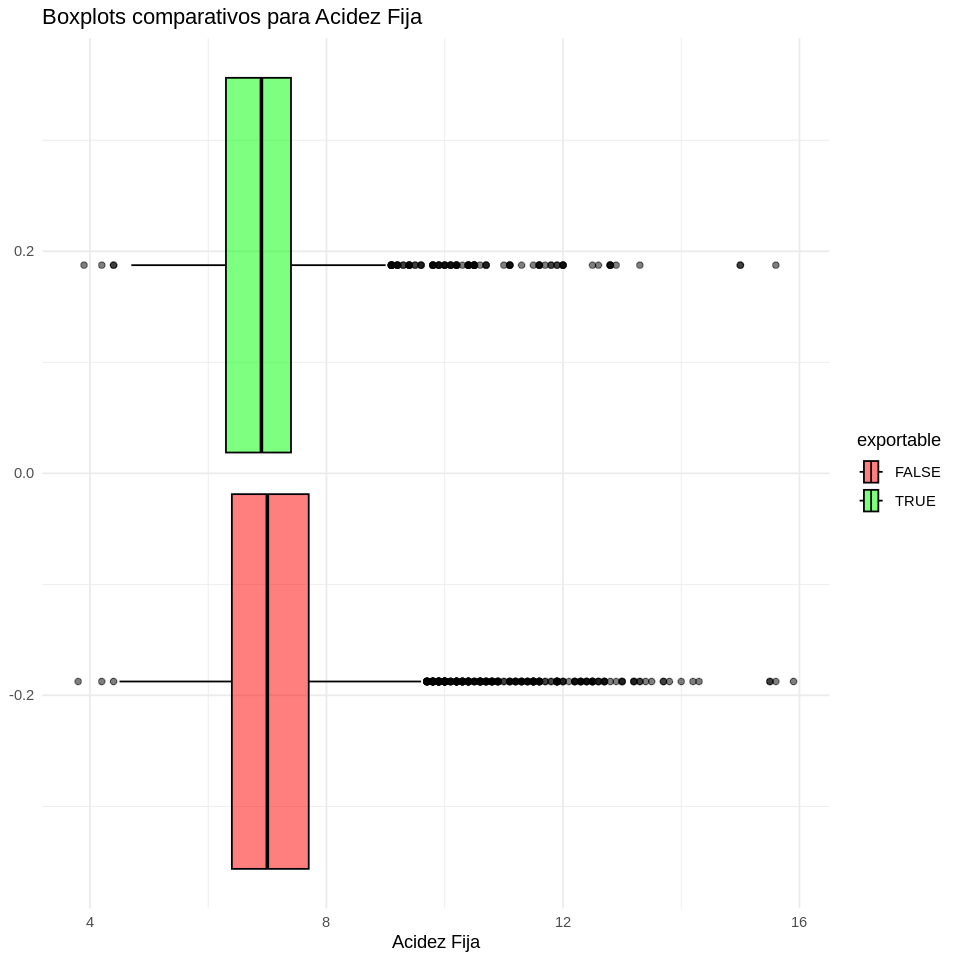

In [ ]:
options(repr.plot.width=8, repr.plot.height=8) #estos options serían para el colab nomás, para que lo imprima bien
g1_5 <- ggplot(data, aes(x = acidez_fija, fill = exportable)) +
  geom_boxplot(alpha = 0.5, color = "black") +
  labs(title = "Boxplots comparativos para Acidez Fija", x = "Acidez Fija") +
  theme_minimal() +
  scale_fill_manual(values=c("FALSE"="red","TRUE"="green"))
g1_5

No se aprecia una gran significancia de la variable acidez fija en determinar si un vino es exportable o no

# Analisis variable "Acido citrico"

Analizar si valores 0 de esta variable son correctos/factibles

In [ ]:
rac<-resumen(data,acido_citrico)
rac
r<-union_all(r,rac)
r

media     sd        mediana q1   q3   iqr  min max  rango cv      
1 0.3186332 0.1453179 0.31    0.25 0.39 0.14 0   1.66 1.66  45.60663
  Variable     
1 acido_citrico

media     sd        mediana q1   q3   iqr  min max   rango cv      
1 7.2153071 1.2964338 7.00    6.40 7.70 1.30 3.8 15.90 12.10 17.96783
2 0.3186332 0.1453179 0.31    0.25 0.39 0.14 0.0  1.66  1.66 45.60663
  Variable     
1 acidez_fija  
2 acido_citrico

In [ ]:
data %>%
  summarise(media=mean(acido_citrico),
            mediana=median(acido_citrico),
            min=min(acido_citrico),
            max=max(acido_citrico),
            rango= max(acido_citrico) - min(acido_citrico),
            iqr= IQR(acido_citrico),
            sd = sd(acido_citrico),
            cv=(sd(acido_citrico)/mean(acido_citrico))*100)

media     mediana min max  rango iqr  sd        cv      
1 0.3186332 0.31    0   1.66 1.66  0.14 0.1453179 45.60663

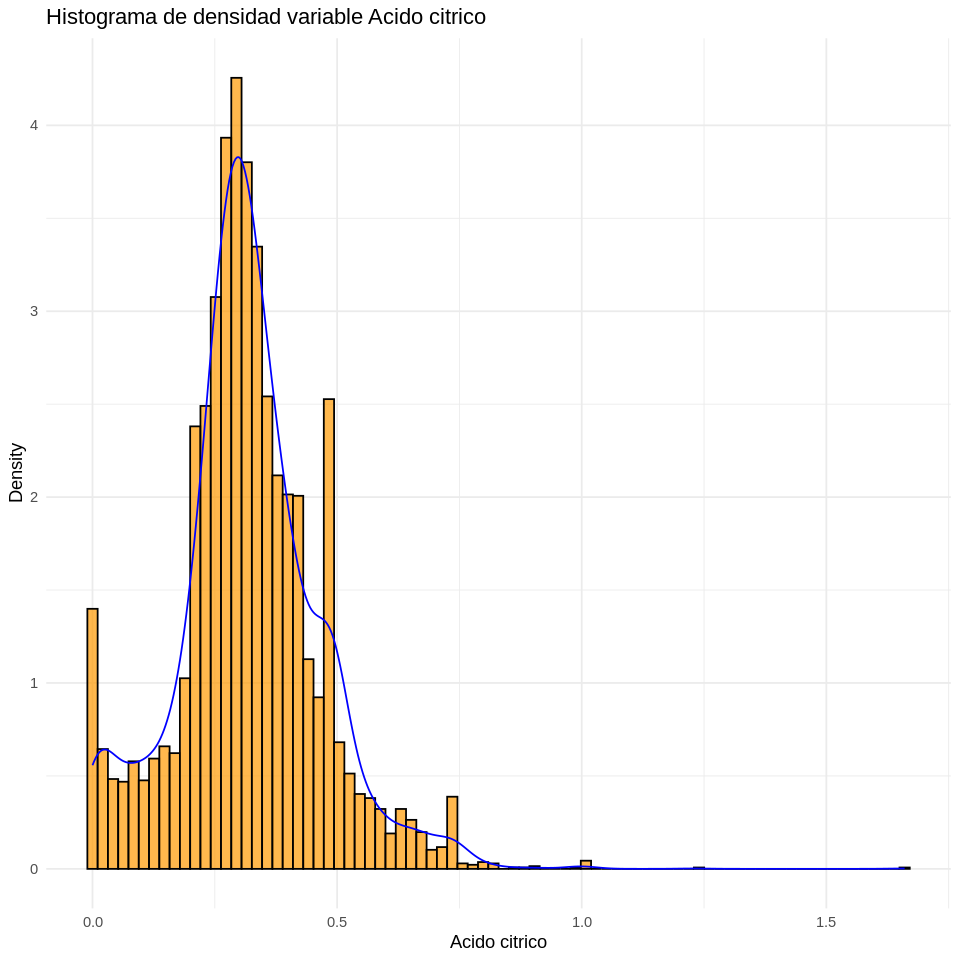

In [ ]:
options(repr.plot.width=8, repr.plot.height=8) #estos options serían para el colab nomás, para que lo imprima bien
g2_1 <- ggplot(data, aes(x = acido_citrico)) +
  geom_histogram(bins = 80, alpha = 0.7, fill = colors[2], color = "black", aes(y= after_stat(density))) +
  geom_density(color = "blue", adjust =2) +
  labs(title = "Histograma de densidad variable Acido citrico", x = "Acido citrico", y = "Density")+
  theme_minimal()
g2_1

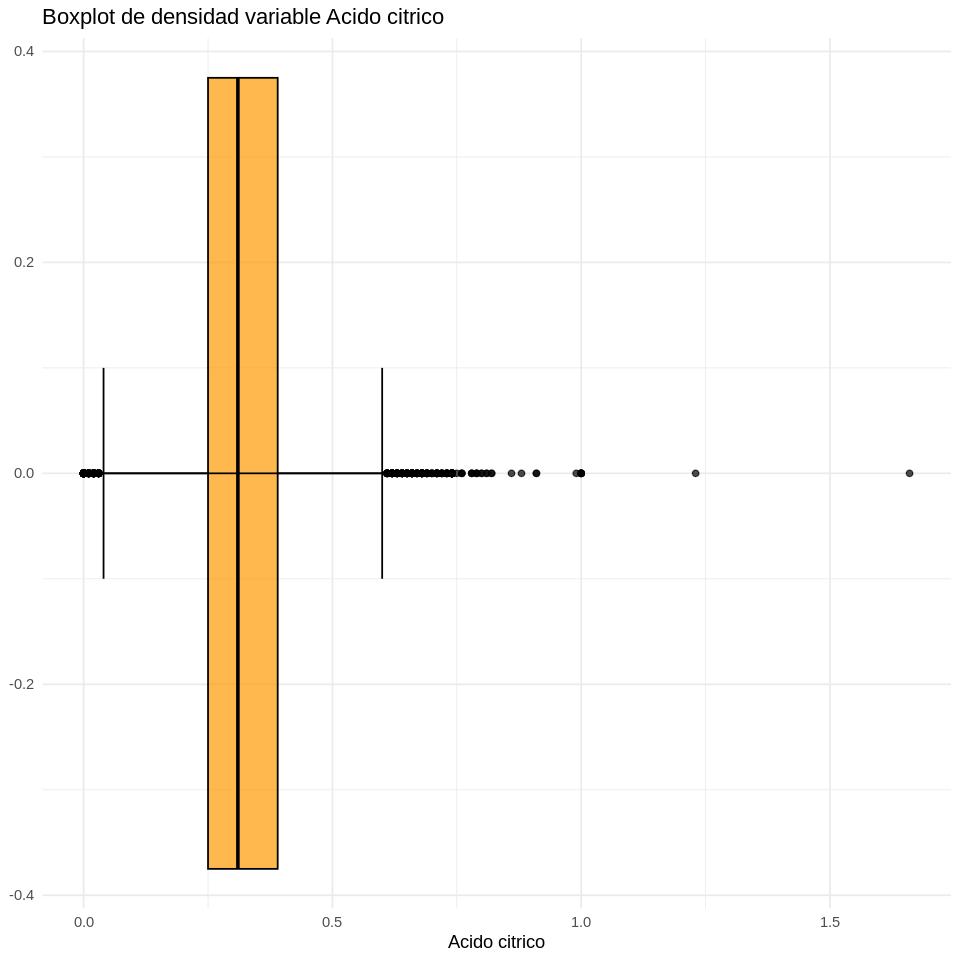

In [ ]:
options(repr.plot.width=8, repr.plot.height=8) #estos options serían para el colab nomás, para que lo imprima bien
g2_2 <- ggplot(data, aes(x = acido_citrico)) +
  geom_boxplot(alpha = 0.7, fill = colors[2], color = "black") +
  labs(title = "Boxplot de densidad variable Acido citrico", x = "Acido citrico") +
  stat_boxplot(geom = "errorbar", width = 0.2)+       # Bigotes
  theme_minimal()
g2_2

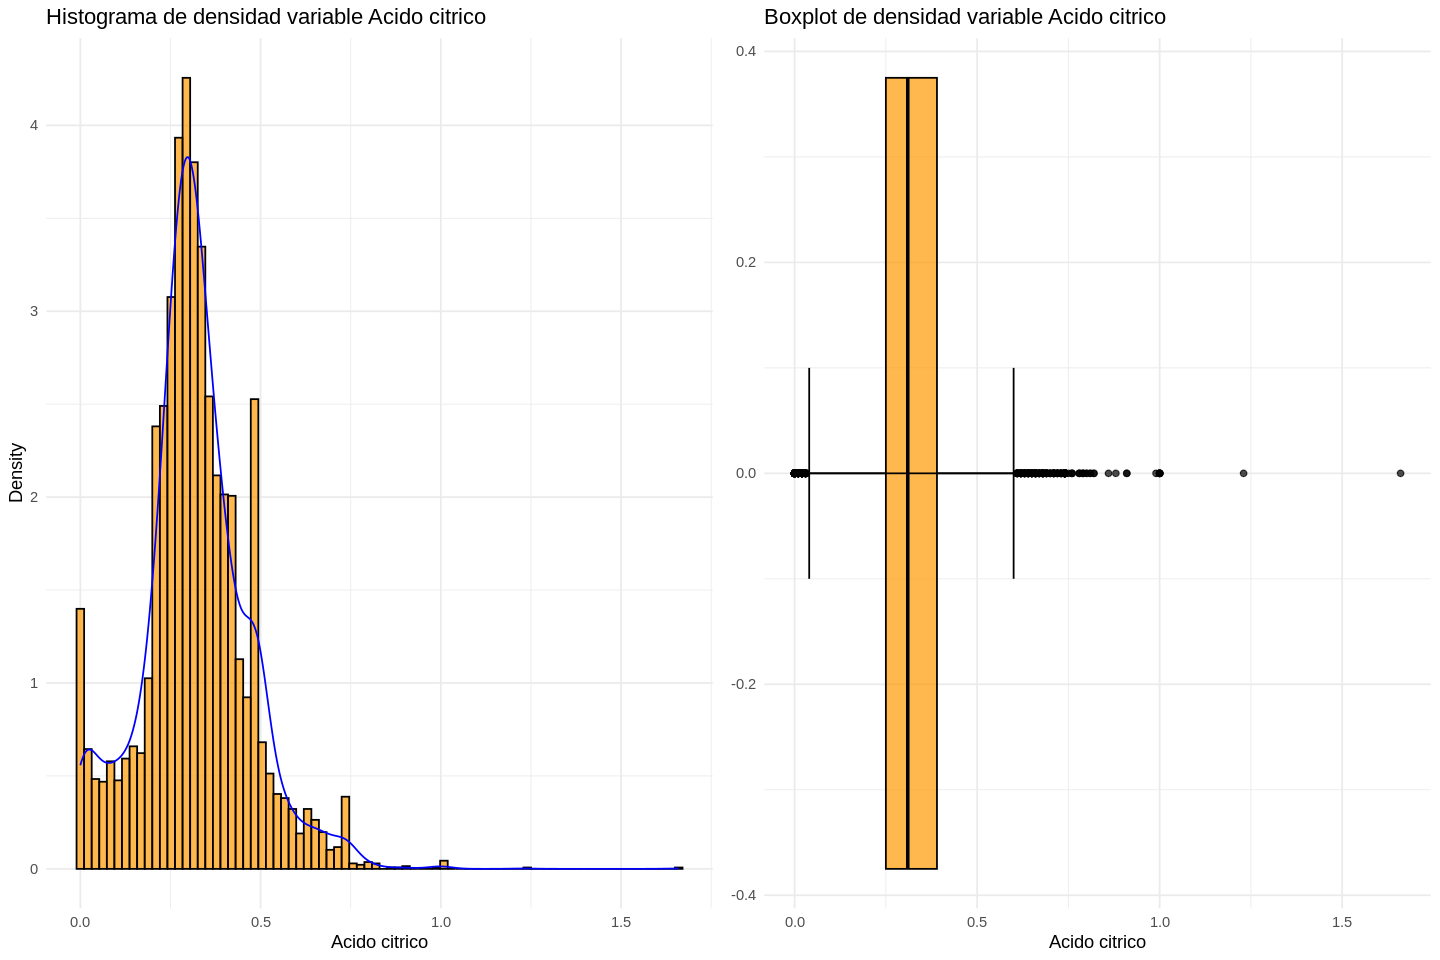

In [ ]:
options(repr.plot.width=12, repr.plot.height=8) #estos options serían para el colab nomás, para que lo imprima bien
ggarrange(g2_1, g2_2, ncol = 2)

In [ ]:
limiteIQR_AciC= quantile(data$acido_citrico,.75) + 1.5*IQR(data$acido_citrico)
limiteIQR_AciC= quantile(data$acido_citrico,.75) + 1.5*IQR(data$acido_citrico)
nrow(filter(data, data$acido_citrico>limiteIQR_AciC))

[1] 230

In [ ]:
limiteIQR_InfAciC= quantile(data$acido_citrico,.25) - 1.5*IQR(data$acido_citrico)
print(limiteIQR_InfAciC)
#limiteIQR_AciC= quantile(data$acido_citrico,.75) + 1.5*IQR(data$acido_citrico)
nrow(filter(data, data$acido_citrico<limiteIQR_InfAciC))

 25% 
0.04 


[1] 279

La variable "Acido citrico" es una del tipo numerica y continua que asemeja una distrubucion casi normal asimetrica hacia la derecha. La media y la mediana estan muy cercanas, con una distancia inter-quartil baja en relacion a su media(8%) y tiene un coeficiente de variabilidad del 45%

In [ ]:
#agrego esto por el texto anterior q dice q la asimetria es a la izquierda y me parecio q era a derecha..

media=mean(data$acido_citrico)
mediana=median(data$acido_citrico)

if (mediana< media ) {
  #moda<media<mediana positiva
  #mensaje <- "sesgo positivo o a la derecha dado que la media (" ,media , ")es mayor que la mediana",mediana,"." # esto asi en r funciona
  mensaje <- "sesgo positivo o a la derecha dado que la media es mayor que la mediana ." # esto asi en r funciona
} else if (media < mediana) {
  #media<mediana<moda negativa
  mensaje <- "sesgo negativo o a la izquierda dado que la media es menor que la mediana."
} else if (media == mediana ) {
  mensaje<-"simétrica dado que la media es igual a la mediana y a la moda."
}
mensaje

[1] "sesgo positivo o a la derecha dado que la media es mayor que la mediana ."

##Bivariado

In [ ]:
rbiac<-resumenBivariado(data,acido_citrico,exportable)
rbi<-union_all(rbi,rbiac)
rbiac
rbi


exportable media     sd        mediana q1   q3   iqr  min max  rango cv      
1 FALSE      0.3147203 0.1524660 0.30    0.24 0.40 0.16 0   1.66 1.66  48.44493
2  TRUE      0.3346280 0.1100404 0.32    0.28 0.38 0.10 0   0.76 0.76  32.88440
  Variable     
1 acido_citrico
2 acido_citrico

exportable media     sd        mediana q1   q3   iqr  min max   rango
1 FALSE      7.2470115 1.2829683 7.00    6.40 7.70 1.30 3.8 15.90 12.10
2  TRUE      7.0857087 1.3428324 6.90    6.30 7.40 1.10 3.9 15.60 11.70
3 FALSE      0.3147203 0.1524660 0.30    0.24 0.40 0.16 0.0  1.66  1.66
4  TRUE      0.3346280 0.1100404 0.32    0.28 0.38 0.10 0.0  0.76  0.76
  cv       Variable     
1 17.70341 acidez_fija  
2 18.95128 acidez_fija  
3 48.44493 acido_citrico
4 32.88440 acido_citrico

In [ ]:
data %>%
  group_by(exportable) %>%
  summarise(media = mean(acido_citrico),
            mediana= median(acido_citrico),
            min=min(acido_citrico),
            max=max(acido_citrico),
            rango=max(acido_citrico)-min(acido_citrico),
            iqr= IQR(acido_citrico),
            sd = sd(acido_citrico),
            cv=sd(acido_citrico)/mean(acido_citrico)*100
            )

exportable media     mediana min max  rango iqr  sd        cv      
1 FALSE      0.3147203 0.30    0   1.66 1.66  0.16 0.1524660 48.44493
2  TRUE      0.3346280 0.32    0   0.76 0.76  0.10 0.1100404 32.88440

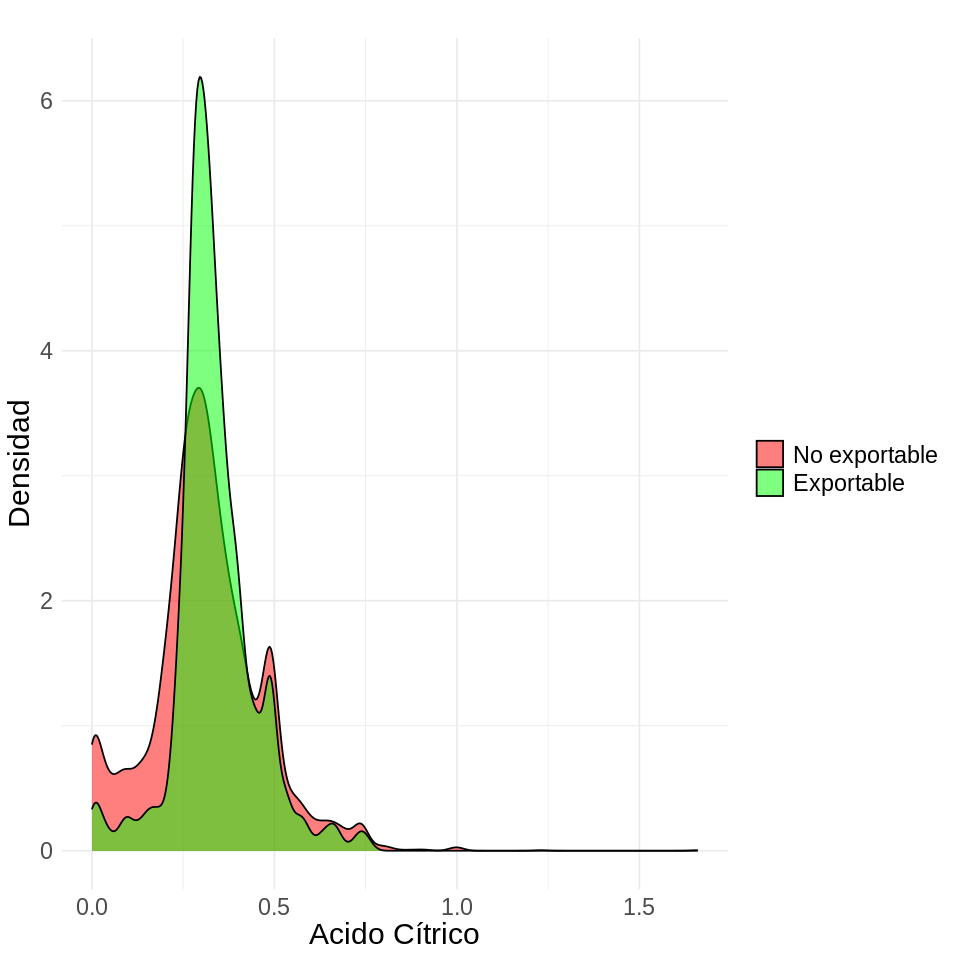

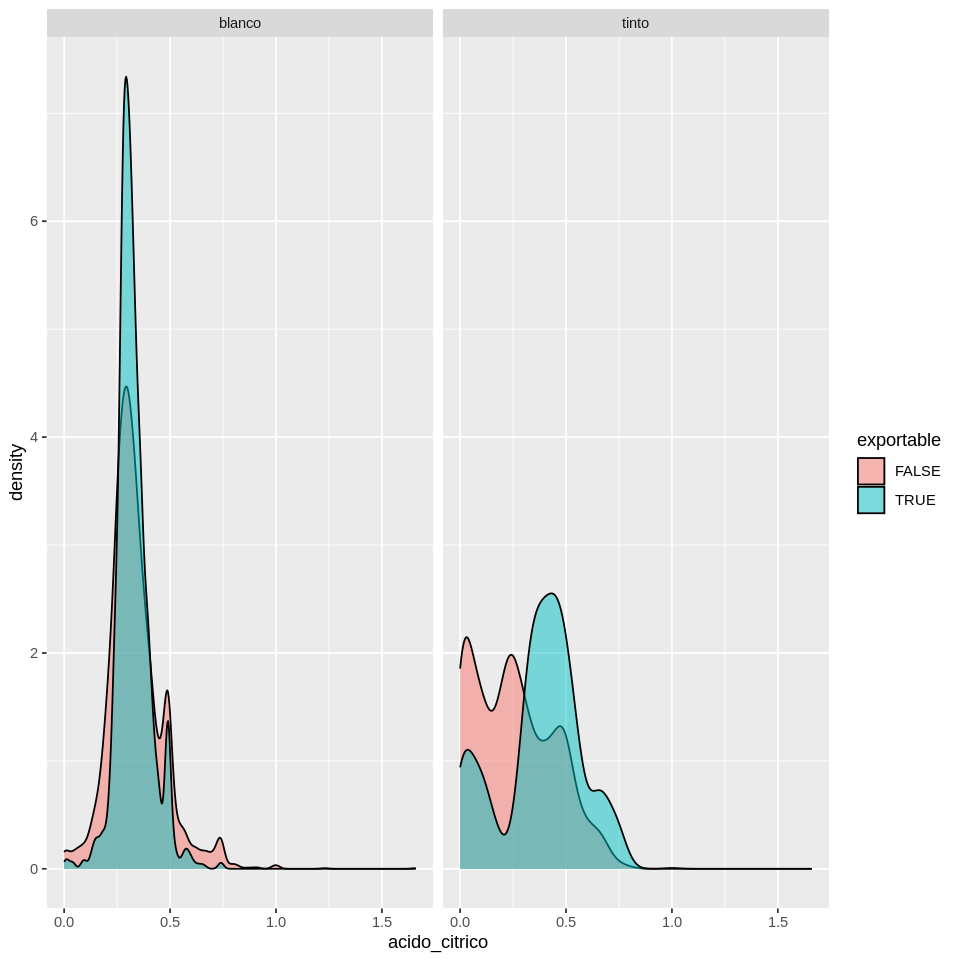

In [ ]:
options(repr.plot.width=8, repr.plot.height=8) #estos options serían para el colab nomás, para que lo imprima bien
g2_3 <- ggplot(data, aes(x = acido_citrico, fill = exportable)) +
  geom_density(alpha = 0.5, color = "black") +
  labs(title = "", x = "Acido Cítrico", y = "Densidad") +
  theme_minimal() +
  scale_fill_manual(values=c("FALSE"="red","TRUE"="green"), labels = c("No exportable", "Exportable")) +
  theme(axis.text = element_text(size = 14), axis.title = element_text(size = 18), legend.title = element_blank(), legend.text=element_text(size=14))
g2_3
ggplot(data, aes(x = acido_citrico, fill = tipo)) +
  geom_density(alpha = 0.5, color = "black")

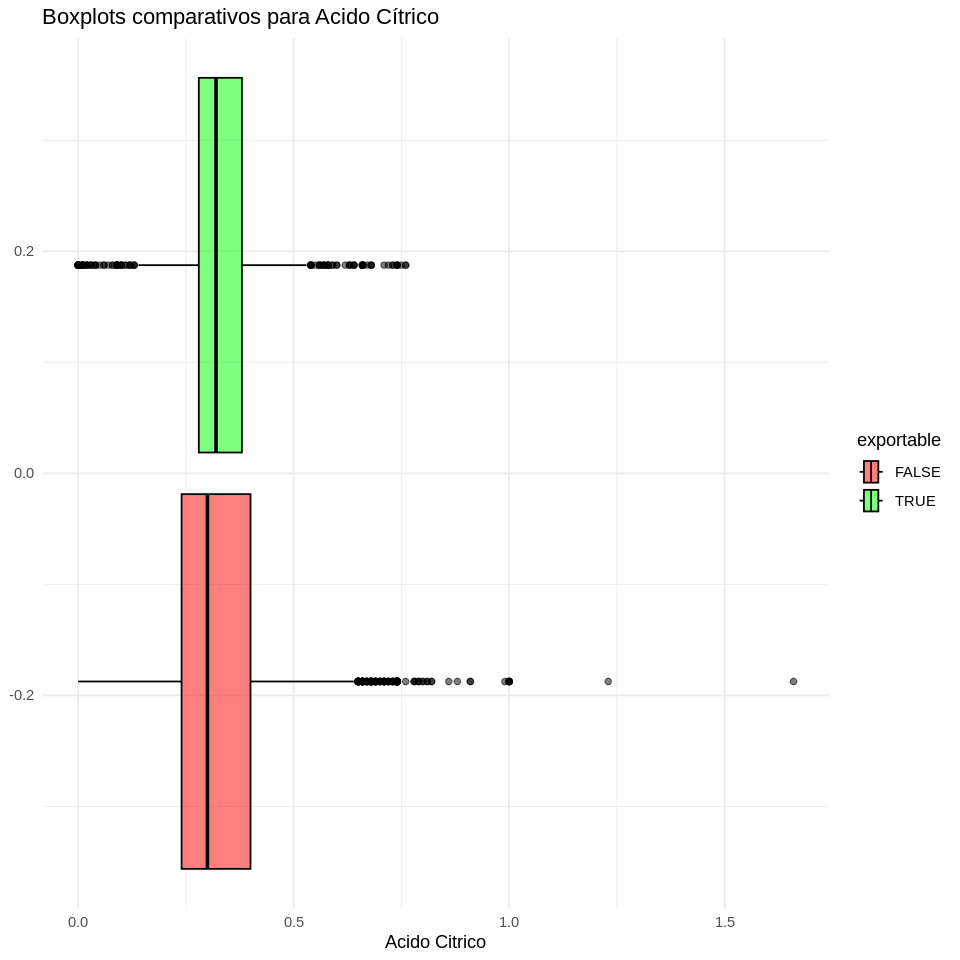

In [ ]:
options(repr.plot.width=8, repr.plot.height=8) #estos options serían para el colab nomás, para que lo imprima bien
g2_4 <- ggplot(data, aes(x = acido_citrico, fill = exportable)) +
  geom_boxplot(alpha = 0.5, color = "black") +
  labs(title = "Boxplots comparativos para Acido Cítrico", x = "Acido Citrico") +
  theme_minimal() +
  scale_fill_manual(values=c("FALSE"="red","TRUE"="green"))
g2_4

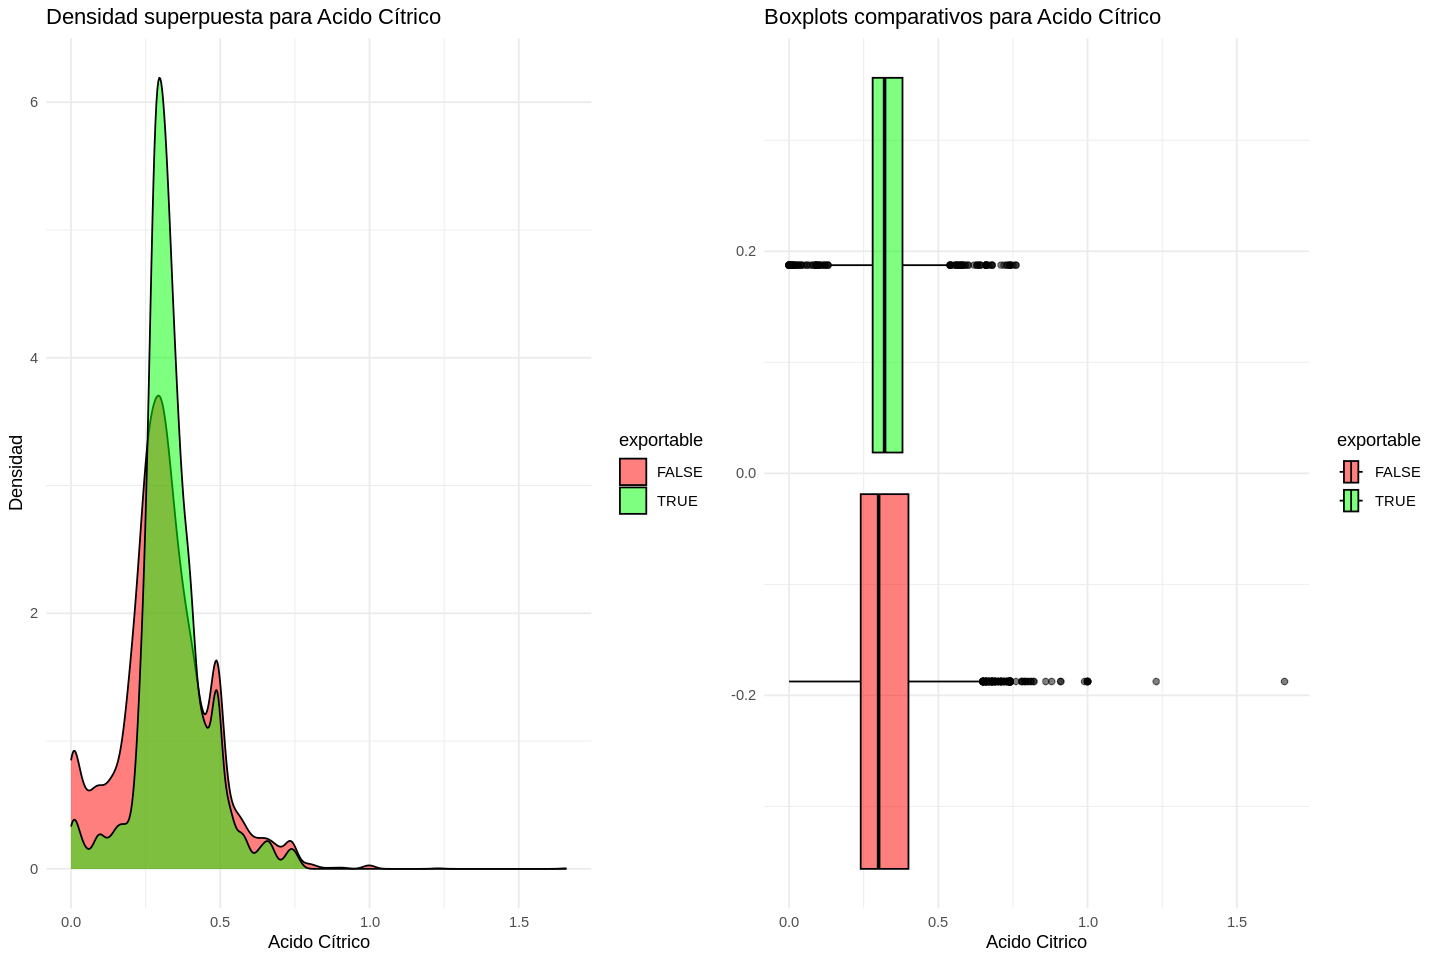

In [ ]:
options(repr.plot.width=12, repr.plot.height=8) #estos options serían para el colab nomás, para que lo imprima bien
ggarrange(g2_3, g2_4, ncol = 2)

Al observar los gráficos y tablas, no observamos diferencias relevantes para los valores medios, aunque sí puede observarse una mayor variabilidad en el ácido cítrico de aquellos vinos que no son exportables.

## 4) Variabilidad exportables

4) Se desea controlar la variabilidad de los vinos exportables, principalmente controlando
que el desvío estándar del ácido sea inferior a 0.10 ¿Se cumple con el objetivo?


In [ ]:
varTest(data[which(data$exportable==1),]$acido_citrico,
        alternative="less",
        sigma.squared=(0.10**2),
        conf.level=0.95)


Results of Hypothesis Test
--------------------------

Null Hypothesis:                 variance = 0.01

Alternative Hypothesis:          True variance is less than 0.01

Test Name:                       Chi-Squared Test on Variance

Estimated Parameter(s):          variance = 0.01210889

Data:                            data[which(data$exportable == 1), ]$acido_citrico

Test Statistic:                  Chi-Squared = 1545.095

Test Statistic Parameter:        df = 1276

P-value:                         0.9999997

95% Confidence Interval:         LCL = 0.00000000
                                 UCL = 0.01293985


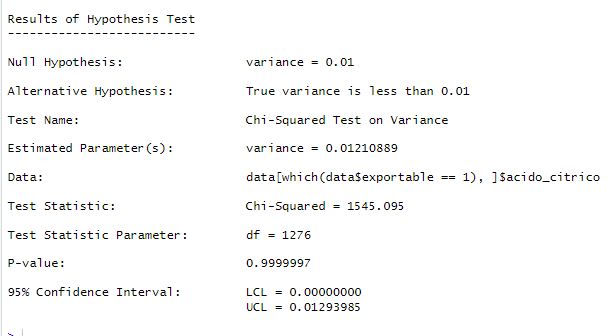

Al realizar una prueba de hipótesis para los vinos exportables, donde,:
Ho:σ2=(0.1^2)
H1:σ2<(0.1^2)
No rechazamos Ho, por lo que no podemos afirmar que el desvío estándar del ácido cítrico sea menor a 0.1, teniendo en cuenta una confianza del 95%.

#Analisis variable "Azucar residual"

In [ ]:
ra<-resumen(data, azucar_residual)
ra
r<-union_all(r,ra)
r

media    sd       mediana q1  q3  iqr min max  rango cv       Variable       
1 5.443235 4.757804 3       1.8 8.1 6.3 0.6 65.8 65.2  87.40764 azucar_residual

media     sd        mediana q1   q3   iqr  min max   rango cv      
1 7.2153071 1.2964338 7.00    6.40 7.70 1.30 3.8 15.90 12.10 17.96783
2 0.3186332 0.1453179 0.31    0.25 0.39 0.14 0.0  1.66  1.66 45.60663
3 5.4432353 4.7578037 3.00    1.80 8.10 6.30 0.6 65.80 65.20 87.40764
  Variable       
1 acidez_fija    
2 acido_citrico  
3 azucar_residual

In [ ]:
data %>%
  summarise(media=mean(azucar_residual),
            mediana=median(azucar_residual),
            min=min(azucar_residual),
            max=max(azucar_residual),
            rango= max(azucar_residual) - min(azucar_residual),
            iqr= IQR(azucar_residual),
            sd = sd(azucar_residual),
            cv=(sd(azucar_residual)/mean(azucar_residual))*100)

media    mediana min max  rango iqr sd       cv      
1 5.443235 3       0.6 65.8 65.2  6.3 4.757804 87.40764

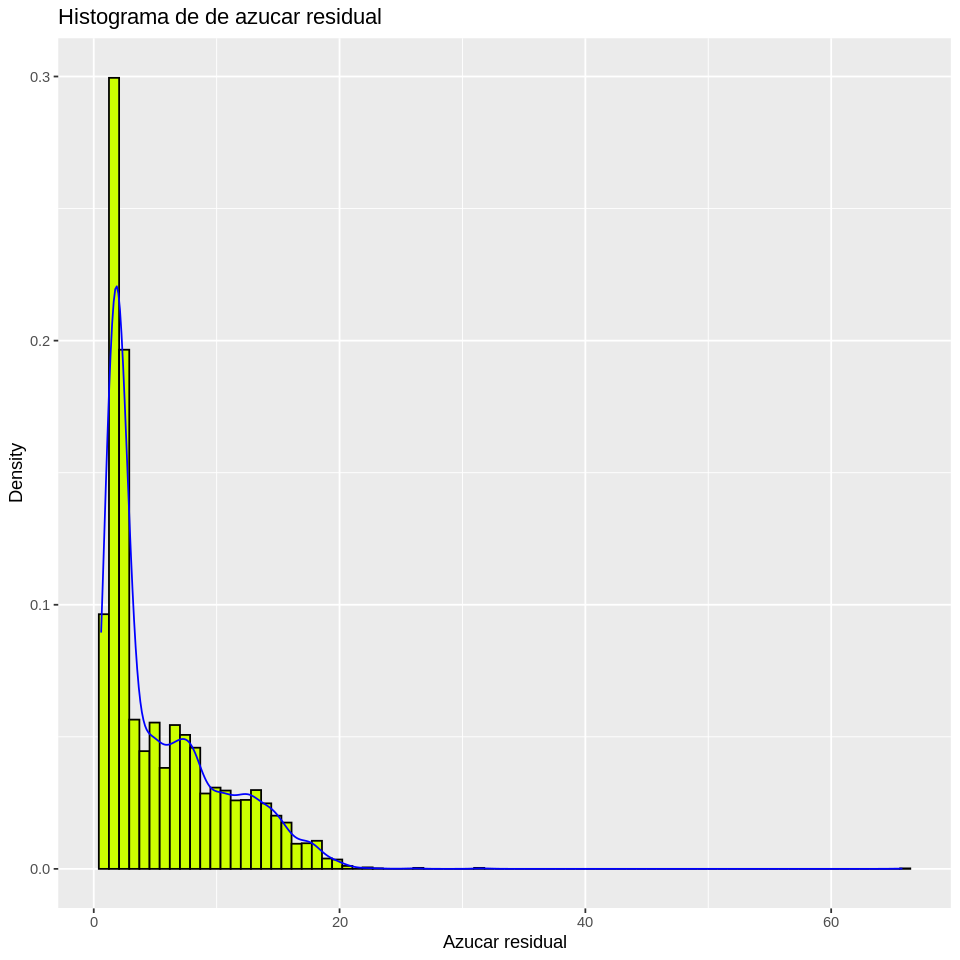

In [ ]:
options(repr.plot.width=8, repr.plot.height=8) #estos options serían para el colab nomás, para que lo imprima bien
g3_1 <- ggplot(data, aes(x = azucar_residual)) +
  geom_histogram(bins = 80, alpha = 1, fill = colors[3], color = "black", aes(y= after_stat(density))) +
  geom_density(color = "blue") +
  labs(title = "Histograma de de azucar residual", x = "Azucar residual", y = "Density")
g3_1

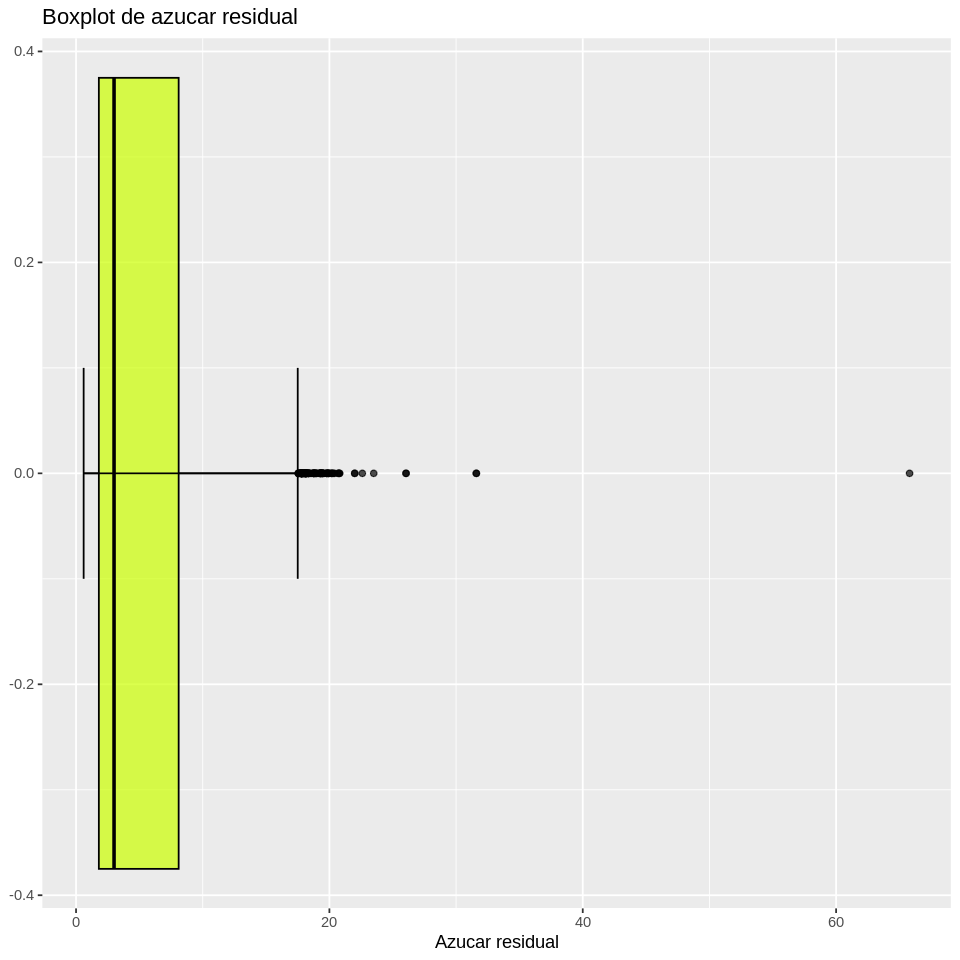

In [ ]:
options(repr.plot.width=8, repr.plot.height=8) #estos options serían para el colab nomás, para que lo imprima bien
g3_2 <- ggplot(data, aes(x = azucar_residual)) +
  geom_boxplot(alpha = 0.7, fill = colors[3], color = "black") +
  #xlim(c(0,35))+
  stat_boxplot(geom = "errorbar", width = 0.2)  +      # Bigotes
  labs(title = "Boxplot de azucar residual", x = "Azucar residual")
g3_2

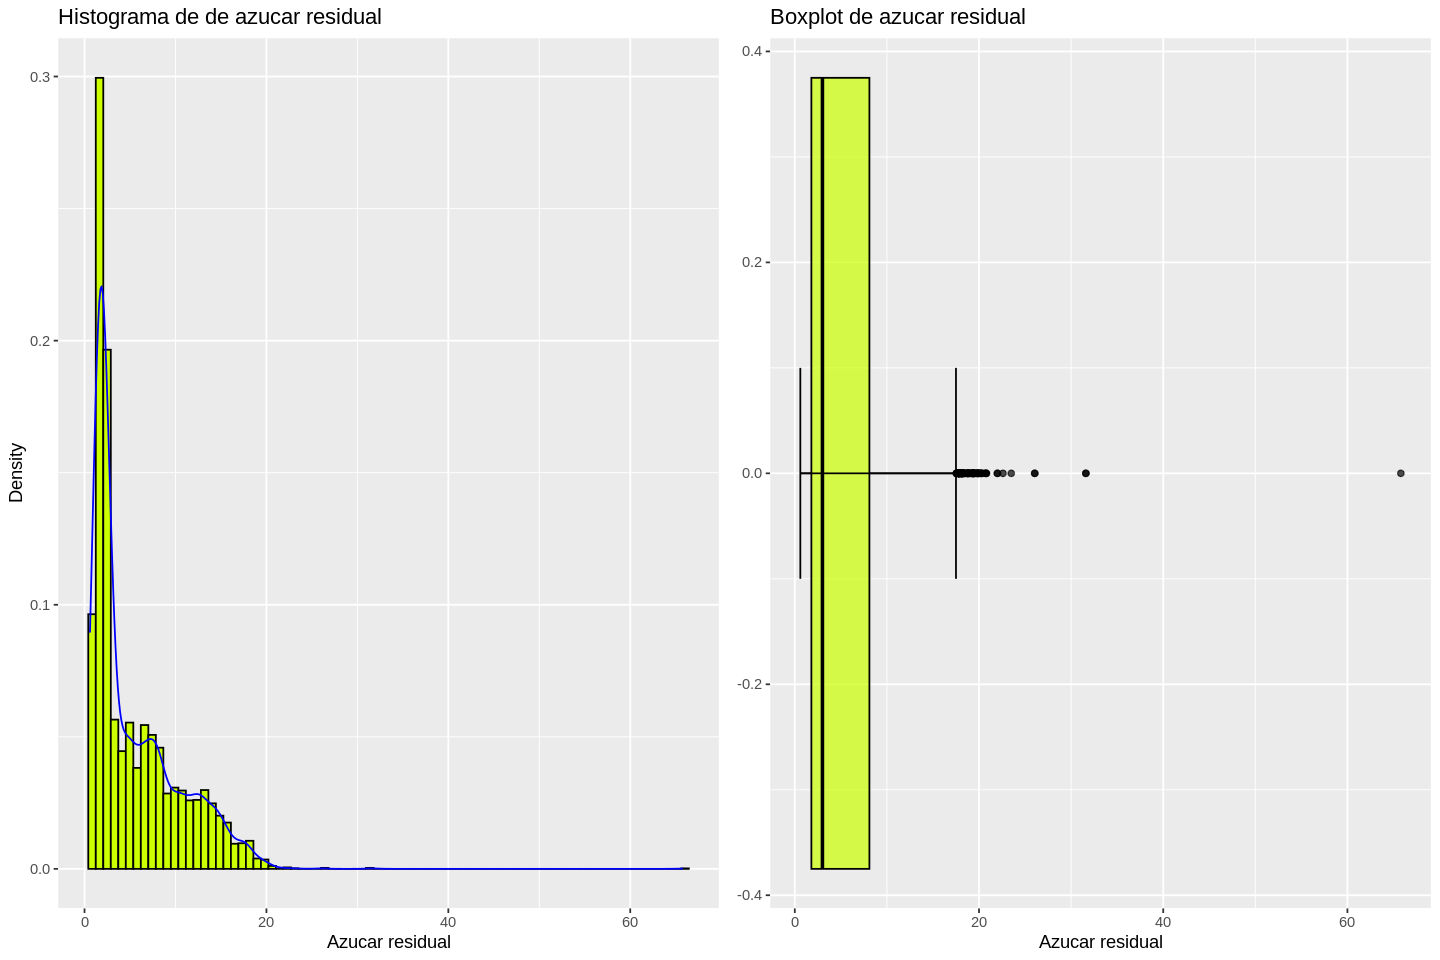

In [ ]:
options(repr.plot.width=12, repr.plot.height=8) #estos options serían para el colab nomás, para que lo imprima bien
ggarrange(g3_1, g3_2, ncol = 2)

In [ ]:
limiteIQR_AzuR= quantile(data$azucar_residual,.75) + 1.5*IQR(data$azucar_residual)
nrow(filter(data, data$azucar_residual>limiteIQR_AzuR))

[1] 118

In [ ]:
# Mencionar que por mas que un valores de azucar menor a 1 gr/dl, el 1,21% de la muestra esta en esta condicion
z<-filter(data,azucar_residual<1)
nrow(z)/nrow(data)
nrow(z)
#agrego esto para que observemos el valor atipico, ES UN vino blanco que aparentemente es muy dulce,
#deberiamos averiguar si es un valor posible o no

x<-filter(data,azucar_residual>=45)
x

[1] 0.01215946

[1] 79

acidez_fija acido_citrico azucar_residual cloruros dioxido_azufre_libre
1 7.8         0.6           65.8            0.074    8                   
  densidad pH   alcohol calidad tipo   exportable
1 1.03898  3.39 11.7    6       blanco FALSE

Es un vino blaco dulce

In [ ]:
azucar_tipo<-resumenBivariado(data,azucar_residual,tipo)
azucar_tipo

tipo   media    sd       mediana q1  q3  iqr min max  rango cv      
1 blanco 6.391415 5.072058 5.2     1.7 9.9 8.2 0.6 65.8 65.2  79.35736
2 tinto  2.538806 1.409928 2.2     1.9 2.6 0.7 0.9 15.5 14.6  55.53510
  Variable       
1 azucar_residual
2 azucar_residual

##Bivariado

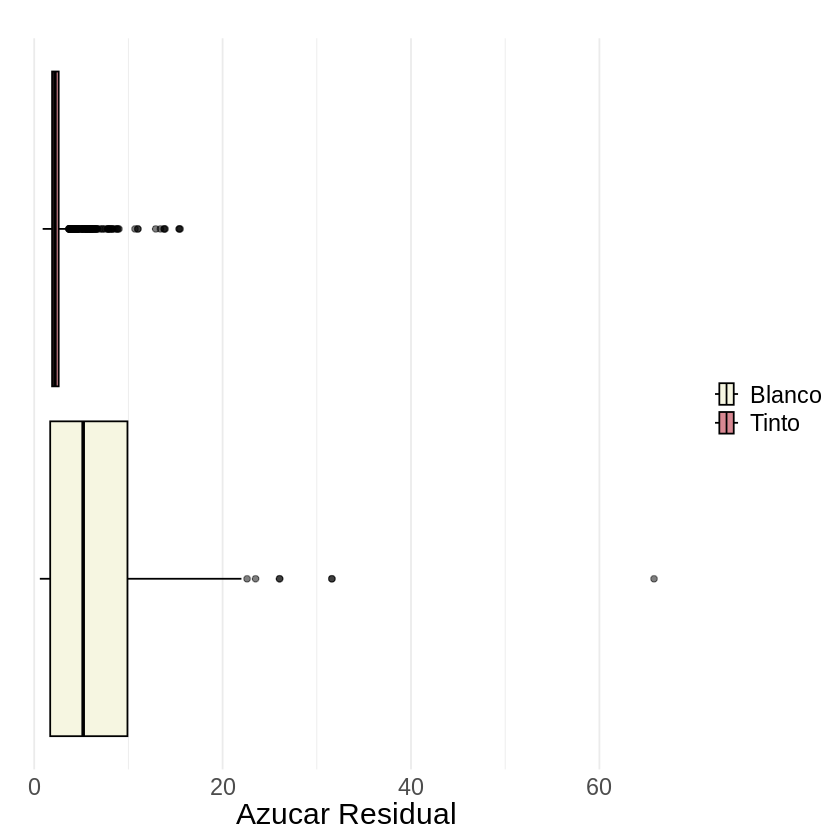

In [ ]:
ggplot(data, aes(x = azucar_residual, fill = tipo)) +
  geom_boxplot(alpha = 0.5, color = "black") +
  labs(title = "", x = "Azucar Residual") +
  scale_y_continuous(breaks = NULL) +
  theme_minimal() +
  scale_fill_manual(values=c("blanco"="#EEEDC4","tinto"="#b11226"), labels = c("Blanco", "Tinto")) +
  theme(axis.text = element_text(size = 14), axis.title = element_text(size = 18), legend.text = element_text(size = 14), legend.title = element_blank())


In [ ]:
rbix<-resumenBivariado(data,azucar_residual,exportable)
rbi<-union_all(rbi,rbix)
rbix
rbi

exportable media    sd       mediana q1  q3  iqr min max   rango cv      
1 FALSE      5.593812 4.901269 3.0     1.8 8.3 6.5 0.6 65.80 65.20 87.61948
2  TRUE      4.827721 4.063824 2.9     1.8 6.5 4.7 0.8 19.25 18.45 84.17686
  Variable       
1 azucar_residual
2 azucar_residual

exportable media     sd        mediana q1   q3   iqr  min max   rango
1 FALSE      7.2470115 1.2829683 7.00    6.40 7.70 1.30 3.8 15.90 12.10
2  TRUE      7.0857087 1.3428324 6.90    6.30 7.40 1.10 3.9 15.60 11.70
3 FALSE      0.3147203 0.1524660 0.30    0.24 0.40 0.16 0.0  1.66  1.66
4  TRUE      0.3346280 0.1100404 0.32    0.28 0.38 0.10 0.0  0.76  0.76
5 FALSE      5.5938123 4.9012691 3.00    1.80 8.30 6.50 0.6 65.80 65.20
6  TRUE      4.8277212 4.0638240 2.90    1.80 6.50 4.70 0.8 19.25 18.45
  cv       Variable       
1 17.70341 acidez_fija    
2 18.95128 acidez_fija    
3 48.44493 acido_citrico  
4 32.88440 acido_citrico  
5 87.61948 azucar_residual
6 84.17686 azucar_residual

In [ ]:
data %>%
  group_by(exportable) %>%
  summarise(media = mean(azucar_residual),
            mediana= median(azucar_residual),
            min=min(azucar_residual),
            max=max(acido_citrico),
            rango=max(azucar_residual)-min(azucar_residual),
            iqr= IQR(azucar_residual),
            sd = sd(azucar_residual),
            cv=sd(azucar_residual)/mean(azucar_residual)*100
            )

exportable media    mediana min max  rango iqr sd       cv      
1 FALSE      5.593812 3.0     0.6 1.66 65.20 6.5 4.901269 87.61948
2  TRUE      4.827721 2.9     0.8 0.76 18.45 4.7 4.063824 84.17686

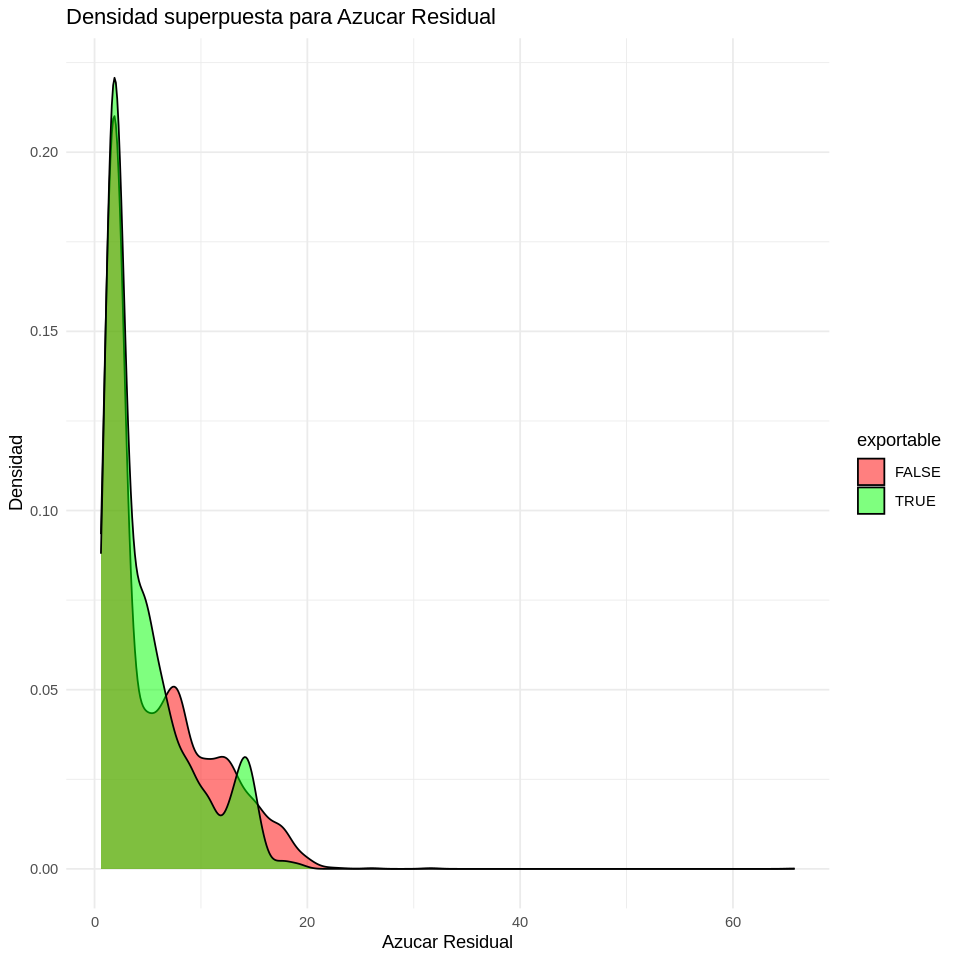

In [ ]:
options(repr.plot.width=8, repr.plot.height=8) #estos options serían para el colab nomás, para que lo imprima bien
g3_3 <- ggplot(data, aes(x = azucar_residual, fill = exportable)) +
  geom_density(alpha = 0.5, color = "black") +
  labs(title = "Densidad superpuesta para Azucar Residual", x = "Azucar Residual", y = "Densidad") +
  theme_minimal() +
  scale_fill_manual(values=c("FALSE"="red","TRUE"="green"))

g3_3

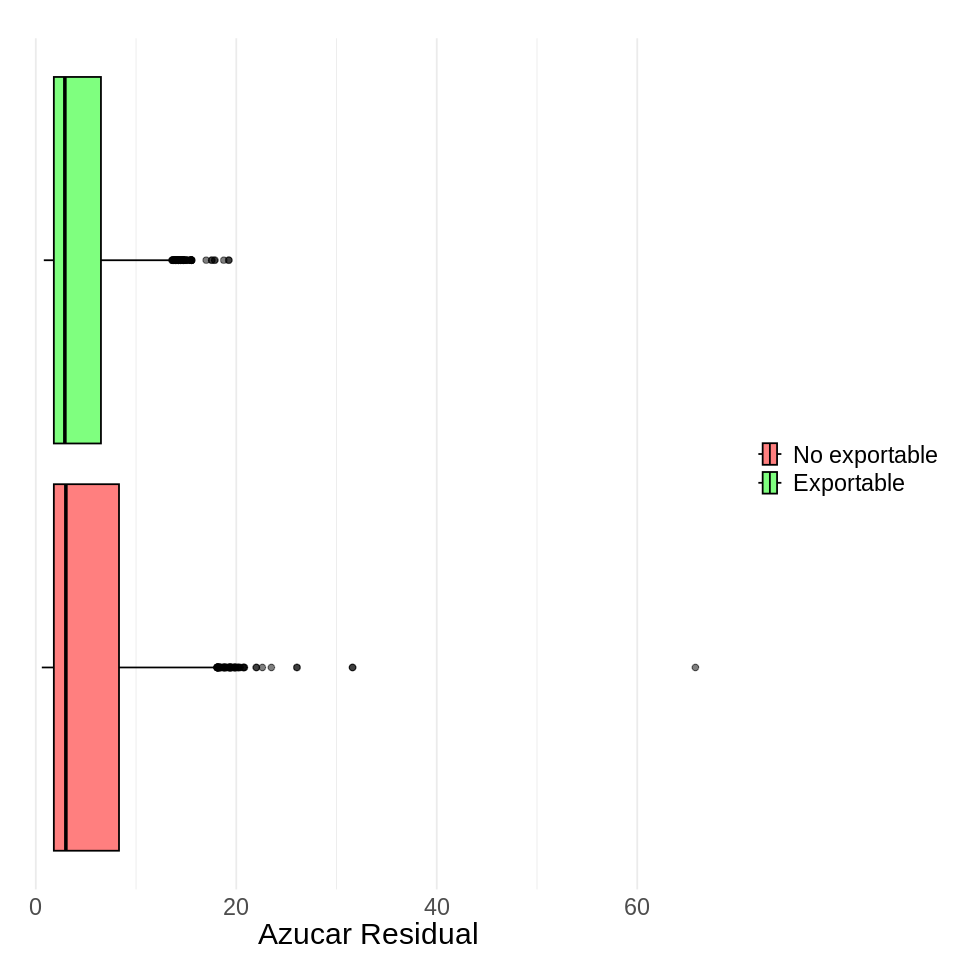

In [ ]:
options(repr.plot.width=8, repr.plot.height=8) #estos options serían para el colab nomás, para que lo imprima bien
g3_4 <- ggplot(data, aes(x = azucar_residual, fill = exportable)) +
  geom_boxplot(alpha = 0.5, color = "black") +
  labs(title = "", x = "Azucar Residual") +
  scale_y_continuous(breaks = NULL) +
  theme_minimal() +
  scale_fill_manual(values=c("FALSE"="red","TRUE"="green"), labels = c("No exportable", "Exportable")) +
  theme(axis.text = element_text(size = 14), axis.title = element_text(size = 18), legend.text = element_text(size = 14), legend.title = element_blank())

g3_4

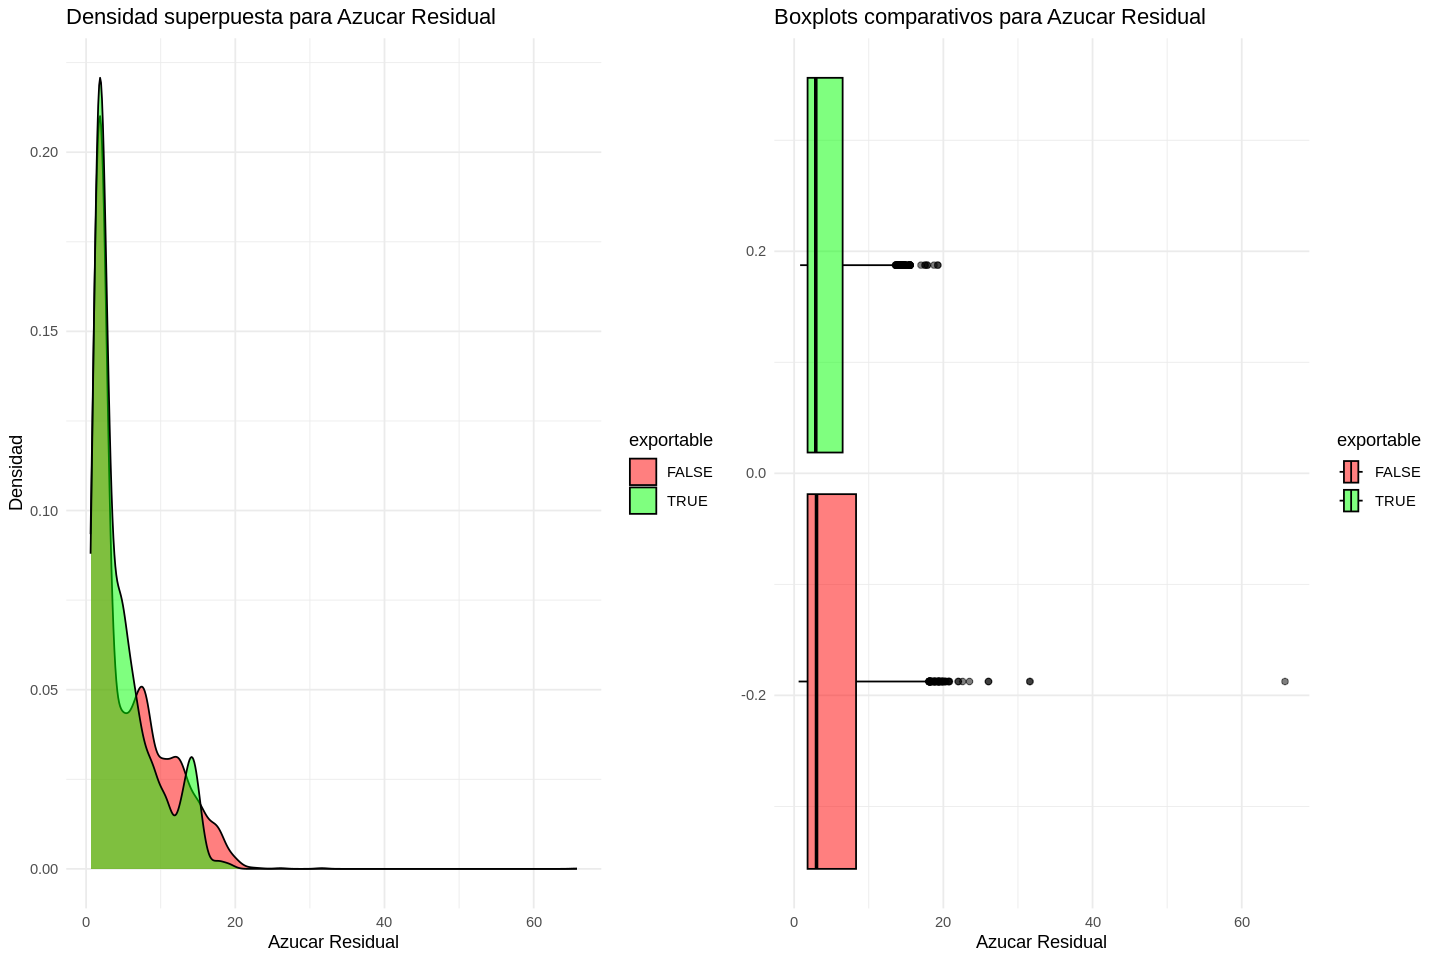

In [ ]:
options(repr.plot.width=12, repr.plot.height=8) #estos options serían para el colab nomás, para que lo imprima bien
ggarrange(g3_3, g3_4, ncol = 2)

No se aprecia una gran significancia de la variable azucar residual en determinar si un vino es exportable o no

#Analisis variable "Cloruros"

In [ ]:
cl<-resumen(data, cloruros)
cl
r<-union_all(r,cl)
r

media      sd        mediana q1    q3    iqr   min   max   rango cv     
1 0.05603386 0.0350336 0.047   0.038 0.065 0.027 0.009 0.611 0.602 62.5222
  Variable
1 cloruros

media      sd        mediana q1    q3    iqr   min   max    rango  cv      
1 7.21530706 1.2964338 7.000   6.400 7.700 1.300 3.800 15.900 12.100 17.96783
2 0.31863322 0.1453179 0.310   0.250 0.390 0.140 0.000  1.660  1.660 45.60663
3 5.44323534 4.7578037 3.000   1.800 8.100 6.300 0.600 65.800 65.200 87.40764
4 0.05603386 0.0350336 0.047   0.038 0.065 0.027 0.009  0.611  0.602 62.52220
  Variable       
1 acidez_fija    
2 acido_citrico  
3 azucar_residual
4 cloruros

In [ ]:
data %>%
  summarise(media=mean(cloruros),
            mediana=median(cloruros),
            min=min(cloruros),
            max=max(cloruros),
            rango= max(cloruros) - min(cloruros),
            iqr= IQR(cloruros),
            var=var(cloruros),
            sd = sd(cloruros),
            cv=(sd(cloruros)/mean(cloruros))*100)

media      mediana min   max   rango iqr   var         sd        cv     
1 0.05603386 0.047   0.009 0.611 0.602 0.027 0.001227353 0.0350336 62.5222

In [ ]:
summary(data$cloruros)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.00900 0.03800 0.04700 0.05603 0.06500 0.61100 

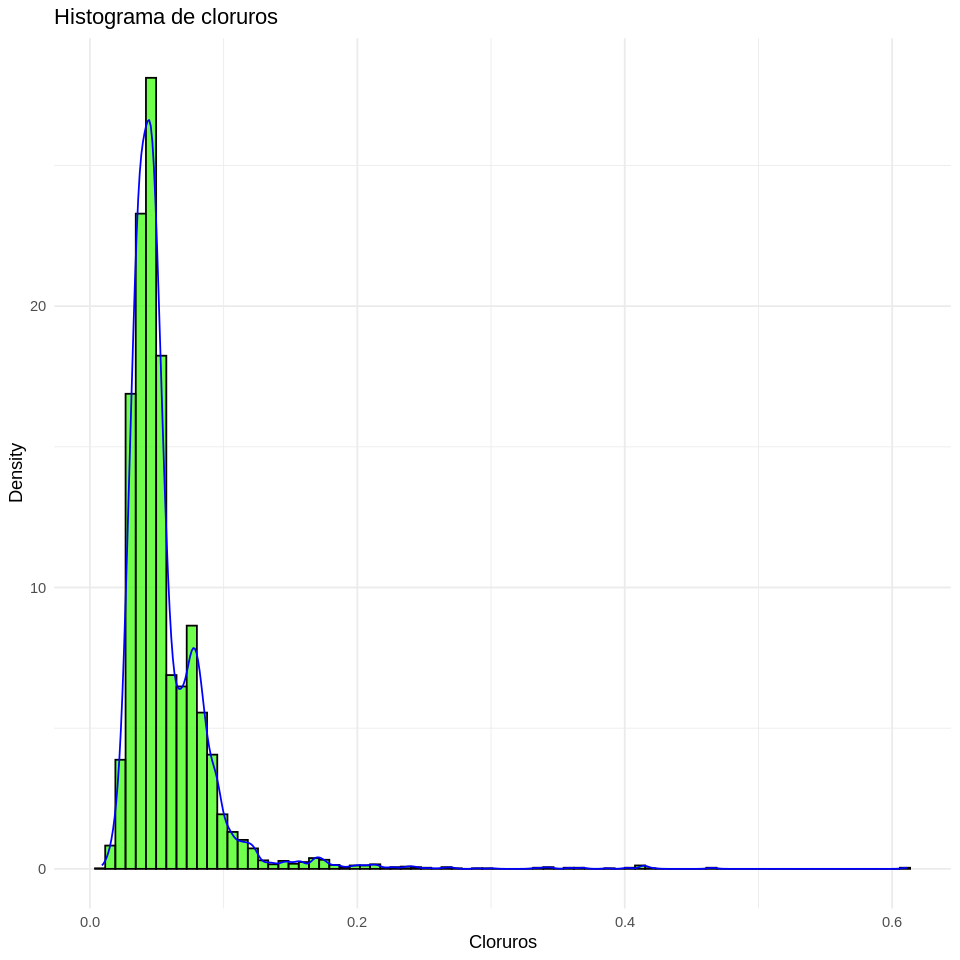

In [ ]:
options(repr.plot.width=8, repr.plot.height=8) #estos options serían para el colab nomás, para que lo imprima bien
g4_1 <- ggplot(data, aes(x = cloruros)) +
  geom_histogram(bins = 80,alpha = 0.7, fill = colors[4], color = "black", aes(y= after_stat(density))) +
  geom_density(color = "blue") +
  labs(title = "Histograma de cloruros", x = "Cloruros", y = "Density") +
  theme_minimal ()
g4_1

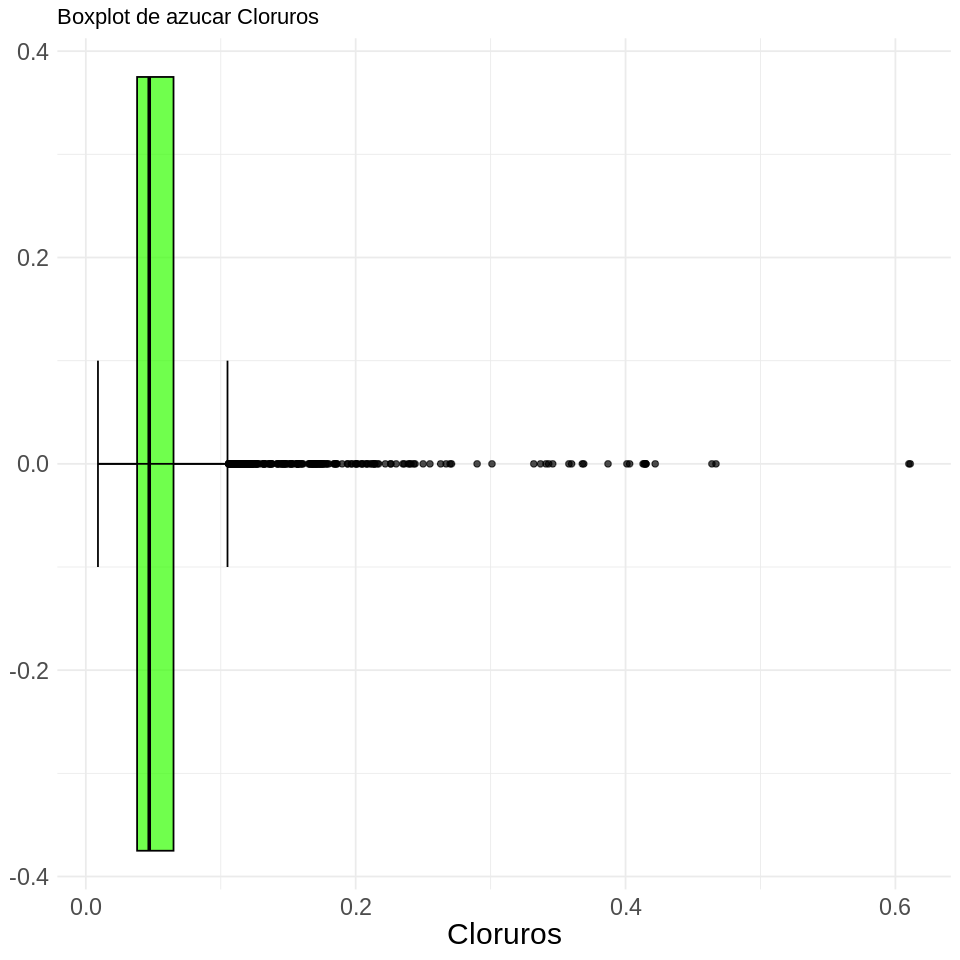

In [ ]:
options(repr.plot.width=8, repr.plot.height=8) #estos options serían para el colab nomás, para que lo imprima bien
g4_2 <- ggplot(data, aes(x = cloruros)) +
  geom_boxplot(alpha = 0.7, fill = colors[4], color = "black") +
  #xlim(c(0,35))+
  stat_boxplot(geom = "errorbar", width = 0.2)  +      # Bigotes
  labs(title = "Boxplot de azucar Cloruros", x = "Cloruros") +
  theme_minimal()+
  theme(axis.text = element_text(size = 14), axis.title = element_text(size = 18))
g4_2

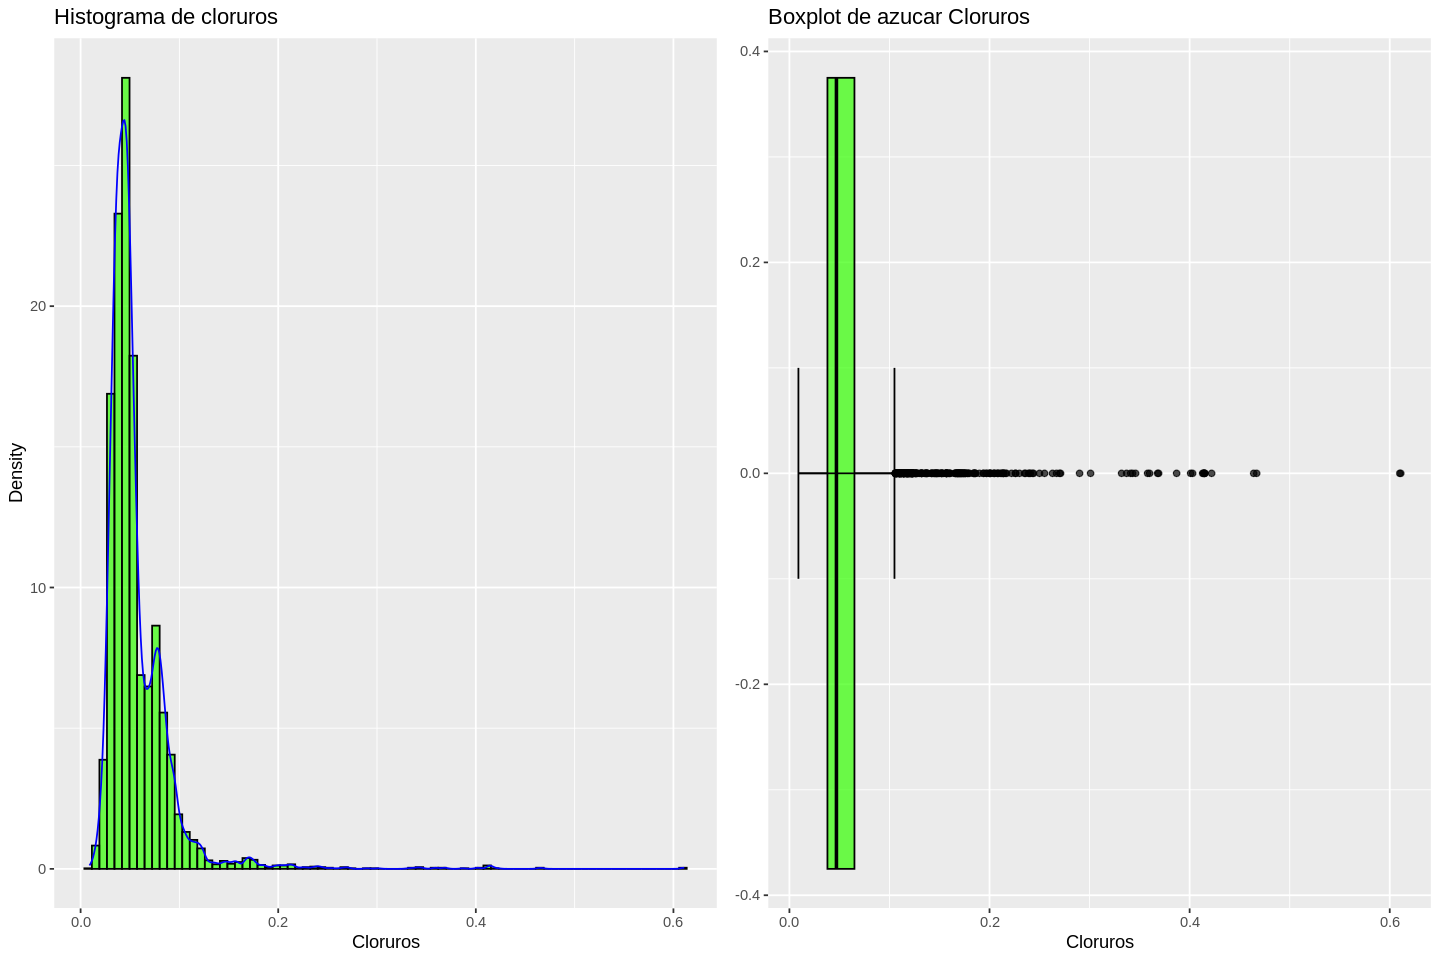

In [ ]:
options(repr.plot.width=12, repr.plot.height=8) #estos options serían para el colab nomás, para que lo imprima bien
ggarrange(g4_1, g4_2, ncol = 2)

In [ ]:
#agrego esto para que observemos los valores outliers de Cloruros
#deberiamos averiguar si es un valor posible o no
vDato <- data$cloruros
maxMuestra=max(vDato, na.rm = TRUE)
maxBigote=quantile(vDato,.75) + 1.5*IQR(vDato)
print(maxMuestra)
print( maxBigote)

outliersCloruros<- data %>%  filter(cloruros>=maxBigote)

head(outliersCloruros[order(outliersCloruros$cloruros,decreasing=TRUE),])




[1] 0.611
   75% 
0.1055 


acidez_fija acido_citrico azucar_residual cloruros dioxido_azufre_libre
36 7.7         0.76          1.8             0.611     8                  
30 9.2         1.00          3.4             0.610    32                  
21 7.8         0.68          1.7             0.467    18                  
15 7.8         0.70          1.9             0.464    22                  
95 8.6         0.51          2.0             0.422    16                  
99 7.8         0.68          1.7             0.415    14                  
   densidad pH   alcohol calidad tipo  exportable
36 0.99680  3.06 9.4     5       tinto FALSE     
30 0.99960  2.74 9.4     4       tinto FALSE     
21 0.99730  3.08 9.3     5       tinto FALSE     
15 0.99740  3.13 9.4     5       tinto FALSE     
95 0.99790  3.03 9.0     5       tinto FALSE     
99 0.99656  3.09 9.1     6       tinto FALSE

In [ ]:
cantOutliers<-nrow(outliersCloruros)
print(cantOutliers)

[1] 286


Los registros mas altos de cloruro son 0.611 y 0.610 son los outliers mas extremos, deberiamos analizar si es un valor aplicable en la muestra.

Aunque estos valores son outliers para la muestra, parecieran ser posibles, ya que de acuerdo a la resolución 275-E/2017 del instituto nacional de vitivinicultura, el límite máximo autorizado de cloruro es de 0.8 gramos por litro para aquellos vinos con certificado de análisis para la libre circulación y/o exportación.

###Bivariado

In [ ]:
rbix<-resumenBivariado(data,cloruros,exportable)
rbi<-union_all(rbi,rbix)
rbix
rbi

ERROR: ignored

In [ ]:
data %>%
  group_by(exportable) %>%
  summarise(media = mean(cloruros),
            mediana= median(cloruros),
            min=min(cloruros),
            max=max(cloruros),
            rango=max(cloruros)-min(cloruros),
            iqr= IQR(cloruros),
            sd = sd(cloruros),
            cv=sd(cloruros)/mean(cloruros)*100
            )

exportable media      mediana min   max   rango iqr   sd         cv      
1 FALSE      0.05883697 0.049   0.009 0.611 0.602 0.029 0.03714455 63.13130
2  TRUE      0.04457557 0.039   0.012 0.358 0.346 0.018 0.02101399 47.14239

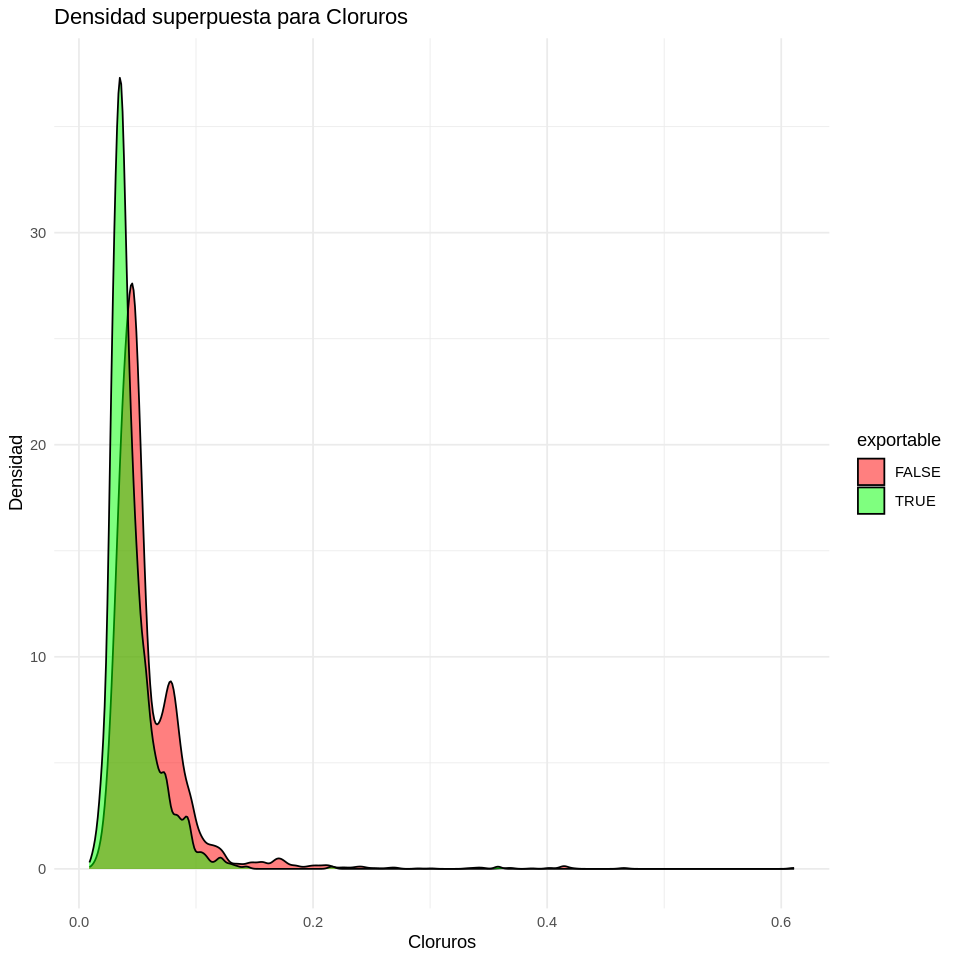

In [ ]:
options(repr.plot.width=8, repr.plot.height=8) #estos options serían para el colab nomás, para que lo imprima bien
g4_3 <- ggplot(data, aes(x = cloruros, fill = exportable)) +
  geom_density(alpha = 0.5, color = "black") +
  labs(title = "Densidad superpuesta para Cloruros", x = "Cloruros", y = "Densidad") +
  theme_minimal() +
  scale_fill_manual(values=c("FALSE"="red","TRUE"="green"))
g4_3

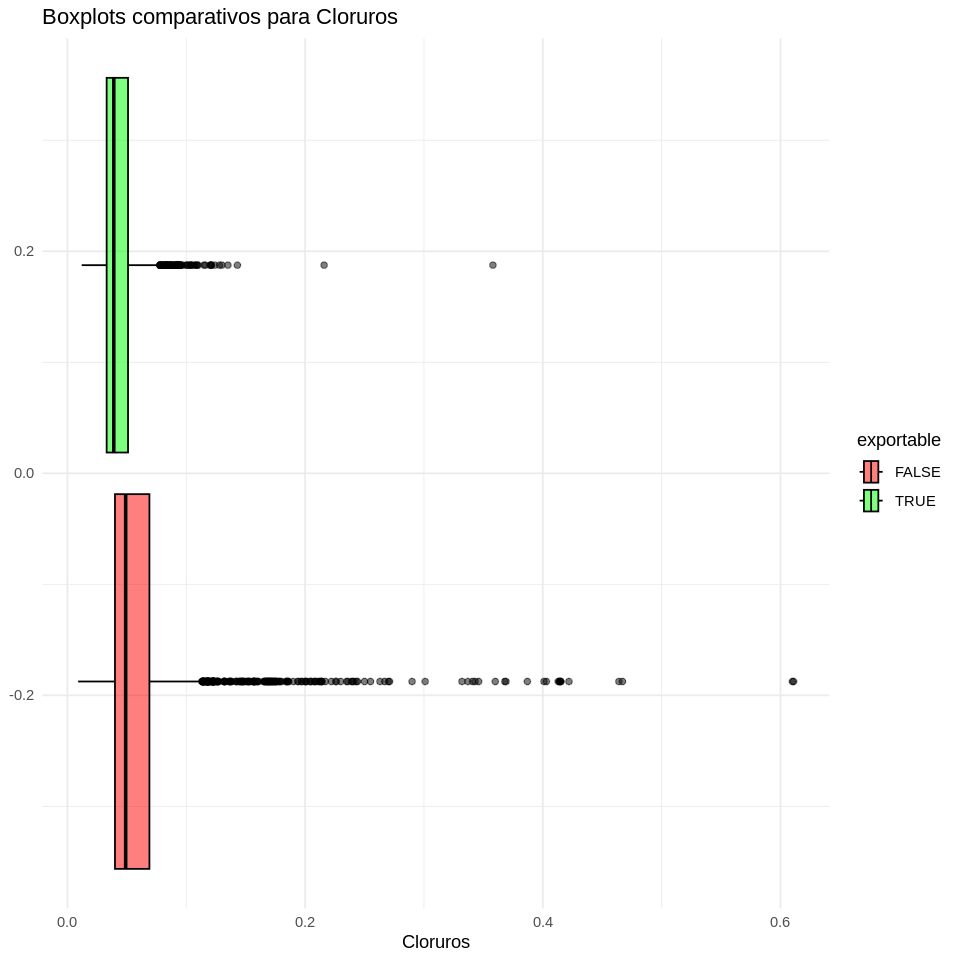

In [ ]:
options(repr.plot.width=8, repr.plot.height=8) #estos options serían para el colab nomás, para que lo imprima bien
g4_4 <- ggplot(data, aes(x = cloruros, fill = exportable)) +
  geom_boxplot(alpha = 0.5, color = "black") +
  labs(title = "Boxplots comparativos para Cloruros", x = "Cloruros") +
  theme_minimal() +
  scale_fill_manual(values=c("FALSE"="red","TRUE"="green"))
g4_4

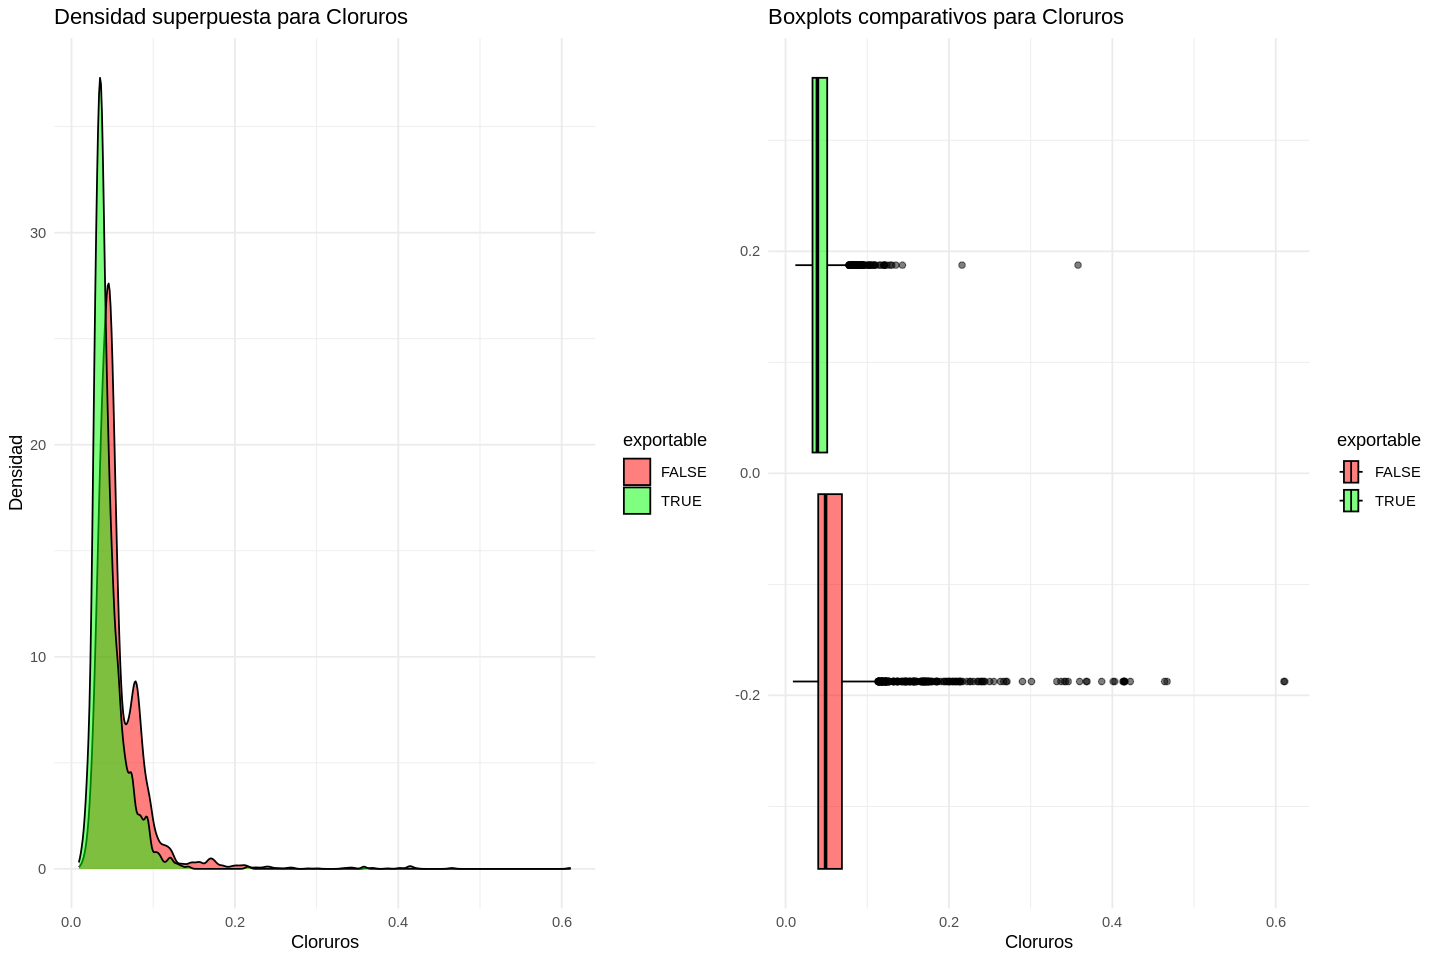

In [ ]:
options(repr.plot.width=12, repr.plot.height=8) #estos options serían para el colab nomás, para que lo imprima bien
ggarrange(g4_3, g4_4, ncol = 2)

Para los cloruros, podemos observar que en la muestra analizada, la media es inferior en aquellos vinos exportables, parece necesario continuar indagando para determinar si esta variable es realmente significativa. Otro elemento a destacar es que se obserca mayor cantidad de outliers superiores para lo no exportable.

In [ ]:
#para ver proporción de outliers en exportable
vDatoE <- data[which(data$exportable==1),]$cloruros
maxMuestra=max(vDatoE, na.rm = TRUE)
maxBigote=quantile(vDatoE,.75) + 1.5*IQR(vDatoE)


outliersClorurosE<- data[which(data$exportable==1),] %>%  filter(cloruros>=maxBigote)
nrow(outliersClorurosE)/nrow(data[which(data$exportable==1),])



[1] 0.06812843

In [ ]:
#para ver proporción de outliers en no exportable
vDatoNE <- data[which(data$exportable==0),]$cloruros
maxMuestra=max(vDatoNE, na.rm = TRUE)
maxBigote=quantile(vDatoNE,.75) + 1.5*IQR(vDatoNE)


outliersClorurosNE<- data[which(data$exportable==0),] %>%  filter(cloruros>=maxBigote)
nrow(outliersClorurosNE)/nrow(data[which(data$exportable==1),])

[1] 0.1761942

#Analisis variable "Dioxido azufre libre"

In [ ]:
cx<-resumen(data, dioxido_azufre_libre)
cx
r<-union_all(r,cx)
r

media    sd      mediana q1 q3 iqr min max rango cv      
1 30.52532 17.7494 29      17 41 24  1   289 288   58.14648
  Variable            
1 dioxido_azufre_libre

media       sd         mediana q1     q3     iqr    min   max     rango  
1  7.21530706  1.2964338  7.000   6.400  7.700  1.300 3.800  15.900  12.100
2  0.31863322  0.1453179  0.310   0.250  0.390  0.140 0.000   1.660   1.660
3  5.44323534  4.7578037  3.000   1.800  8.100  6.300 0.600  65.800  65.200
4  0.05603386  0.0350336  0.047   0.038  0.065  0.027 0.009   0.611   0.602
5 30.52531938 17.7493998 29.000  17.000 41.000 24.000 1.000 289.000 288.000
  cv       Variable            
1 17.96783 acidez_fija         
2 45.60663 acido_citrico       
3 87.40764 azucar_residual     
4 62.52220 cloruros            
5 58.14648 dioxido_azufre_libre

In [ ]:
data %>%
  summarise(media=mean(dioxido_azufre_libre),
            mediana=median(dioxido_azufre_libre),
            min=min(dioxido_azufre_libre),
            max=max(dioxido_azufre_libre),
            rango= max(dioxido_azufre_libre) - min(dioxido_azufre_libre),
            iqr= IQR(dioxido_azufre_libre),
            sd = sd(dioxido_azufre_libre),
            cv=(sd(dioxido_azufre_libre)/mean(dioxido_azufre_libre))*100)

media    mediana min max rango iqr sd      cv      
1 30.52532 29      1   289 288   24  17.7494 58.14648

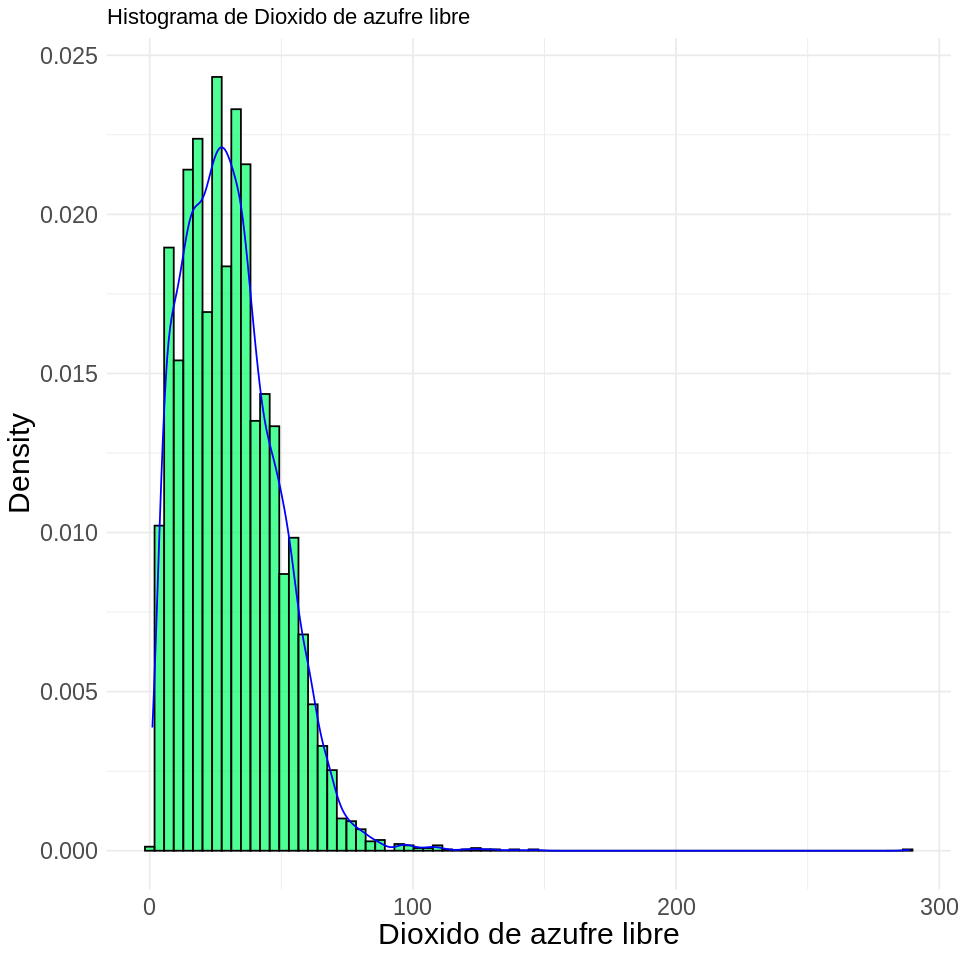

In [ ]:
options(repr.plot.width=8, repr.plot.height=8) #estos options serían para el colab nomás, para que lo imprima bien
g5_1 <- ggplot(data, aes(x = dioxido_azufre_libre)) +
  geom_histogram(bins = 80,alpha = 0.7, fill = colors[5], color = "black", aes(y= after_stat(density))) +
  geom_density(color = "blue") +
  labs(title = "Histograma de Dioxido de azufre libre", x = "Dioxido de azufre libre", y = "Density")+
  theme_minimal()
g5_1

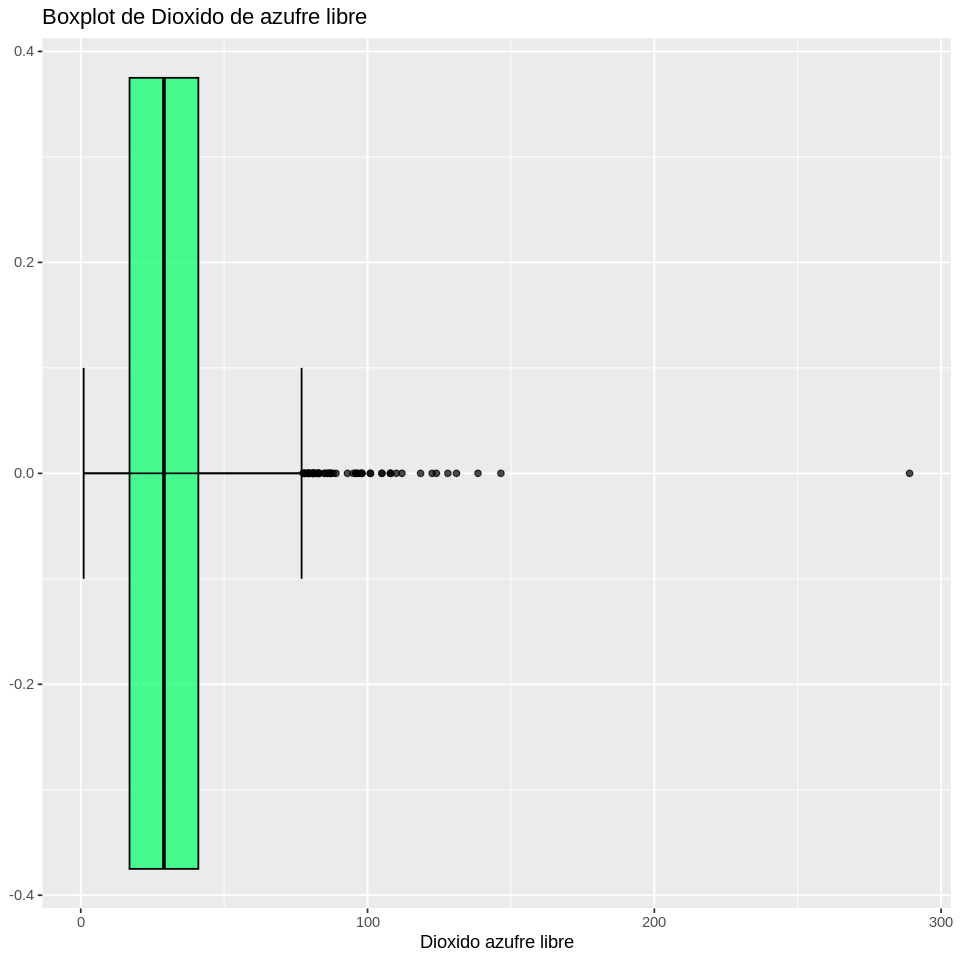

In [ ]:
options(repr.plot.width=8, repr.plot.height=8) #estos options serían para el colab nomás, para que lo imprima bien
g5_2 <- ggplot(data, aes(x = dioxido_azufre_libre)) +
  geom_boxplot(alpha = 0.7, fill = colors[5], color = "black") +
  #xlim(c(0,35))+
  stat_boxplot(geom = "errorbar", width = 0.2)  +      # Bigotes
  labs(title = "Boxplot de Dioxido de azufre libre", x = "Dioxido azufre libre")
g5_2

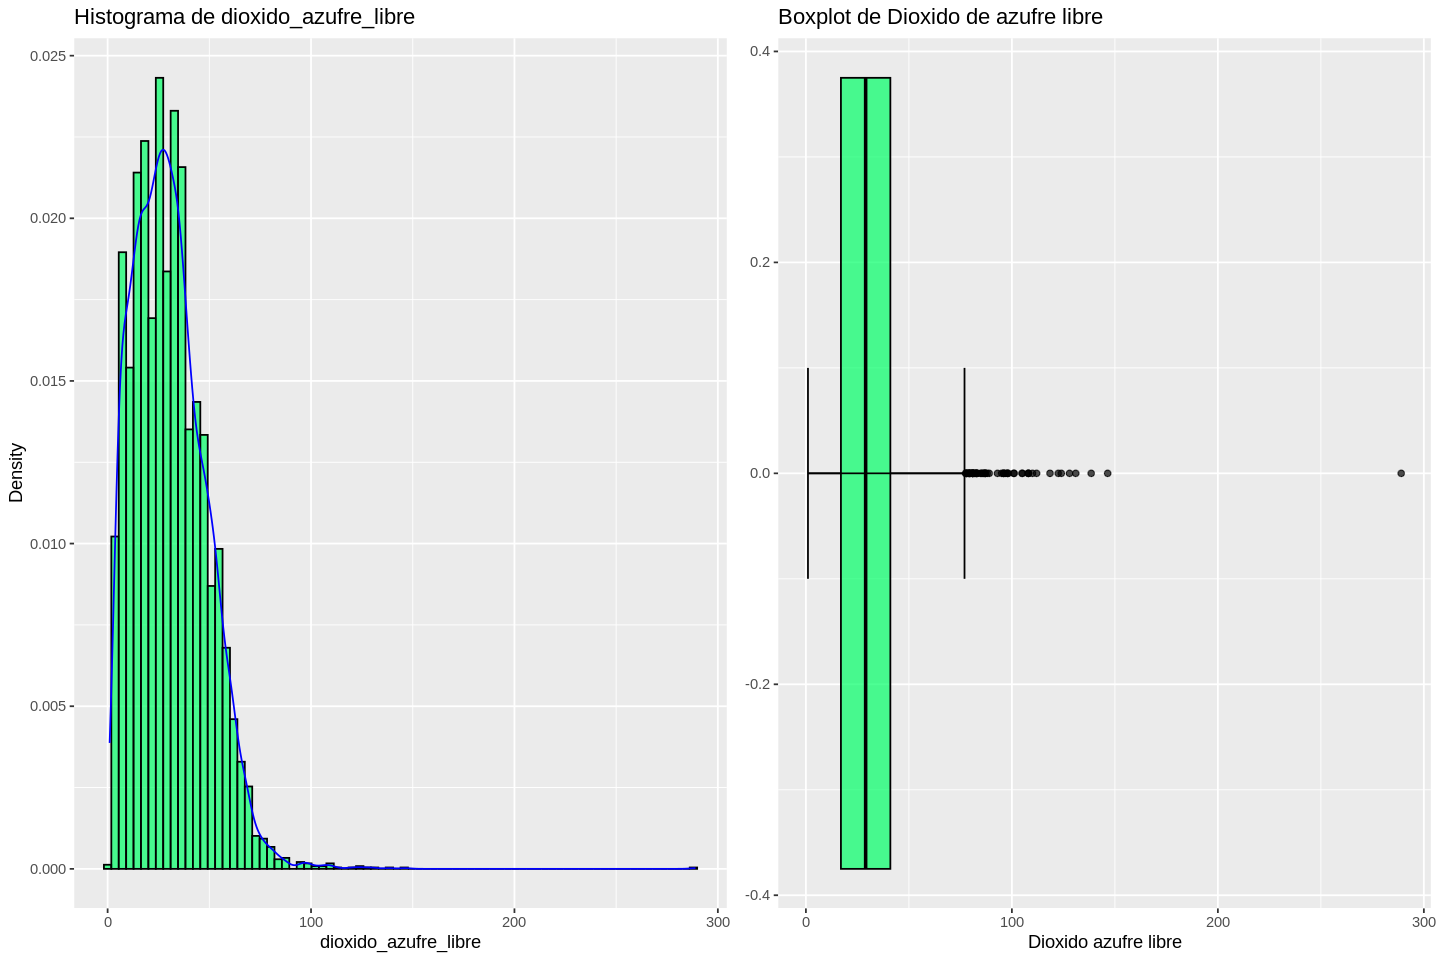

In [ ]:
options(repr.plot.width=12, repr.plot.height=8) #estos options serían para el colab nomás, para que lo imprima bien
ggarrange(g5_1, g5_2, ncol = 2)

In [ ]:
limiteIQR_DAL= quantile(data$dioxido_azufre_libre,.75) + 1.5*IQR(data$dioxido_azufre_libre)
nrow(filter(data, data$dioxido_azufre_libre>limiteIQR_DAL))

[1] 62

In [ ]:
# Valores superiores a 50 son detectable en la nariz y sabor
y<-filter(data, dioxido_azufre_libre>=50)
nrow(y)
nrow(y)/nrow(data)

[1] 950

[1] 0.1462213

Mismo caso que en la variable cloruros, tenemos 62 (menos del 1% del total) registros con valores inusual segun el criterio de IQR

##Bivariado

In [ ]:
rbix<-resumenBivariado(data,dioxido_azufre_libre,exportable)
rbi<-union_all(rbi,rbix)
rbix
rbi

exportable media    sd       mediana q1 q3 iqr min max rango cv      
1 FALSE      30.39569 18.28871 28      16 42 26  1   289 288   60.16878
2  TRUE      31.05521 15.34415 31      20 40 20  3   108 105   49.40928
  Variable            
1 dioxido_azufre_libre
2 dioxido_azufre_libre

exportable media       sd          mediana q1     q3     iqr    min  
1  FALSE       7.24701149  1.28296826  7.000   6.400  7.700  1.300 3.800
2   TRUE       7.08570869  1.34283238  6.900   6.300  7.400  1.100 3.900
3  FALSE       0.31472031  0.15246602  0.300   0.240  0.400  0.160 0.000
4   TRUE       0.33462803  0.11004042  0.320   0.280  0.380  0.100 0.000
5  FALSE       5.59381226  4.90126914  3.000   1.800  8.300  6.500 0.600
6   TRUE       4.82772122  4.06382405  2.900   1.800  6.500  4.700 0.800
7  FALSE       0.05883697  0.03714455  0.049   0.040  0.069  0.029 0.009
8   TRUE       0.04457557  0.02101399  0.039   0.033  0.051  0.018 0.012
9  FALSE      30.39568966 18.28871493 28.000  16.000 42.000 26.000 1.000
10  TRUE      31.05520752 15.34415428 31.000  20.000 40.000 20.000 3.000
   max     rango   cv       Variable            
1   15.900  12.100 17.70341 acidez_fija         
2   15.600  11.700 18.95128 acidez_fija         
3    1.660   1.660 48.44493 acido_citrico       
4    0.760   0.760 32.88440 acido_citrico       
5   65.800  65.200 87.61948 azucar_residual     
6   19.250  18.450 84.17686 azucar_residual     
7    0.611   0.602 63.13130 cloruros            
8    0.358   0.346 47.14239 cloruros            
9  289.000 288.000 60.16878 dioxido_azufre_libre
10 108.000 105.000 49.40928 dioxido_azufre_libre

In [ ]:
data %>%
  group_by(exportable) %>%
  summarise(media = mean(dioxido_azufre_libre),
            mediana= median(dioxido_azufre_libre),
            min=min(dioxido_azufre_libre),
            max=max(dioxido_azufre_libre),
            rango=max(dioxido_azufre_libre)-min(dioxido_azufre_libre),
            iqr= IQR(dioxido_azufre_libre),
            sd = sd(dioxido_azufre_libre),
            cv=sd(dioxido_azufre_libre)/mean(dioxido_azufre_libre)*100
            )

exportable media    mediana min max rango iqr sd       cv      
1 FALSE      30.39569 28      1   289 288   26  18.28871 60.16878
2  TRUE      31.05521 31      3   108 105   20  15.34415 49.40928

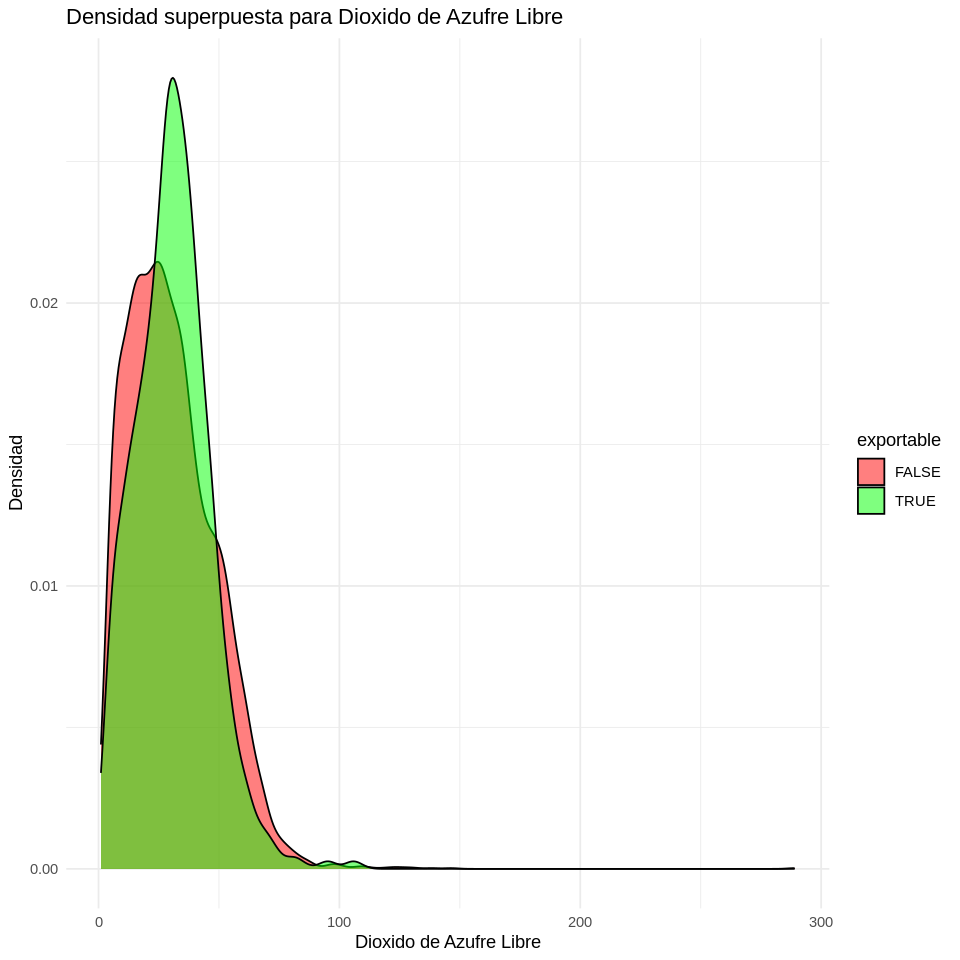

In [ ]:
options(repr.plot.width=8, repr.plot.height=8) #estos options serían para el colab nomás, para que lo imprima bien
g5_3 <- ggplot(data, aes(x = dioxido_azufre_libre, fill = exportable)) +
  geom_density(alpha = 0.5, color = "black") +
  labs(title = "Densidad superpuesta para Dioxido de Azufre Libre", x = "Dioxido de Azufre Libre", y = "Densidad") +
  theme_minimal() +
  scale_fill_manual(values=c("FALSE"="red","TRUE"="green"))
g5_3

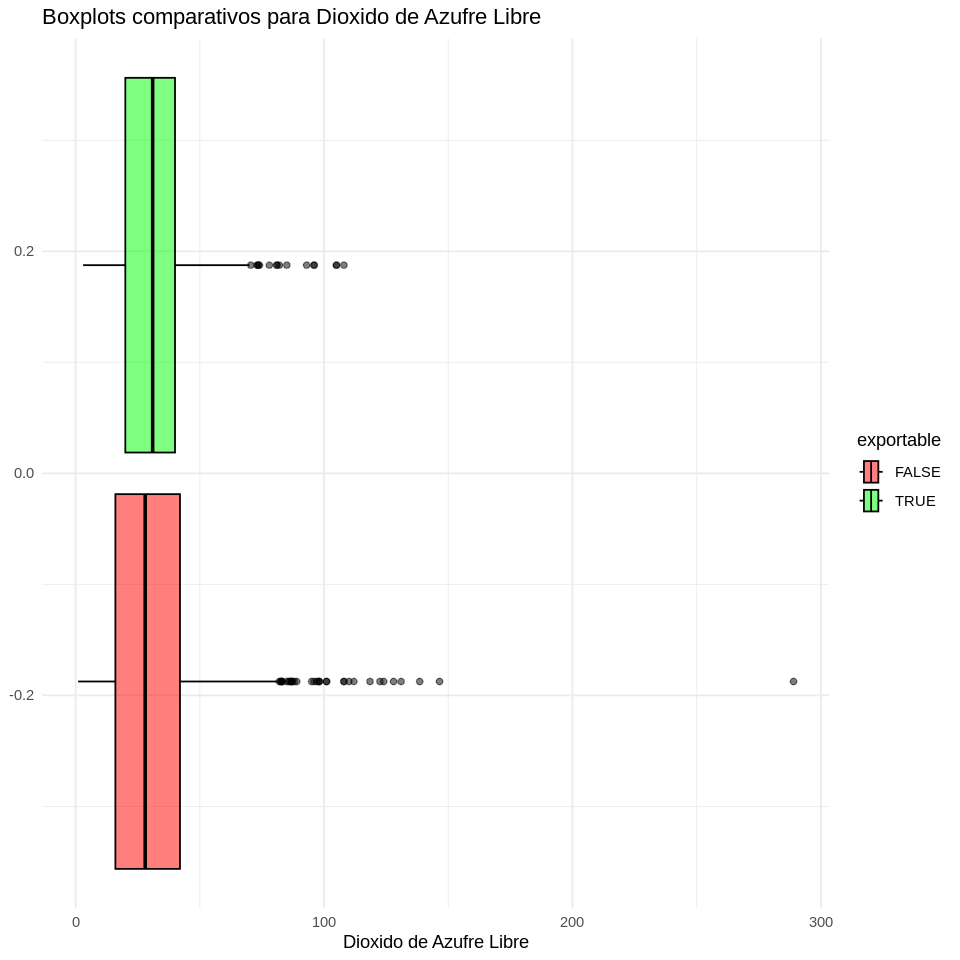

In [ ]:
options(repr.plot.width=8, repr.plot.height=8) #estos options serían para el colab nomás, para que lo imprima bien
g5_4 <- ggplot(data, aes(x = dioxido_azufre_libre, fill = exportable)) +
  geom_boxplot(alpha = 0.5, color = "black") +
  labs(title = "Boxplots comparativos para Dioxido de Azufre Libre", x = "Dioxido de Azufre Libre") +
  theme_minimal() +
  scale_fill_manual(values=c("FALSE"="red","TRUE"="green"))
g5_4

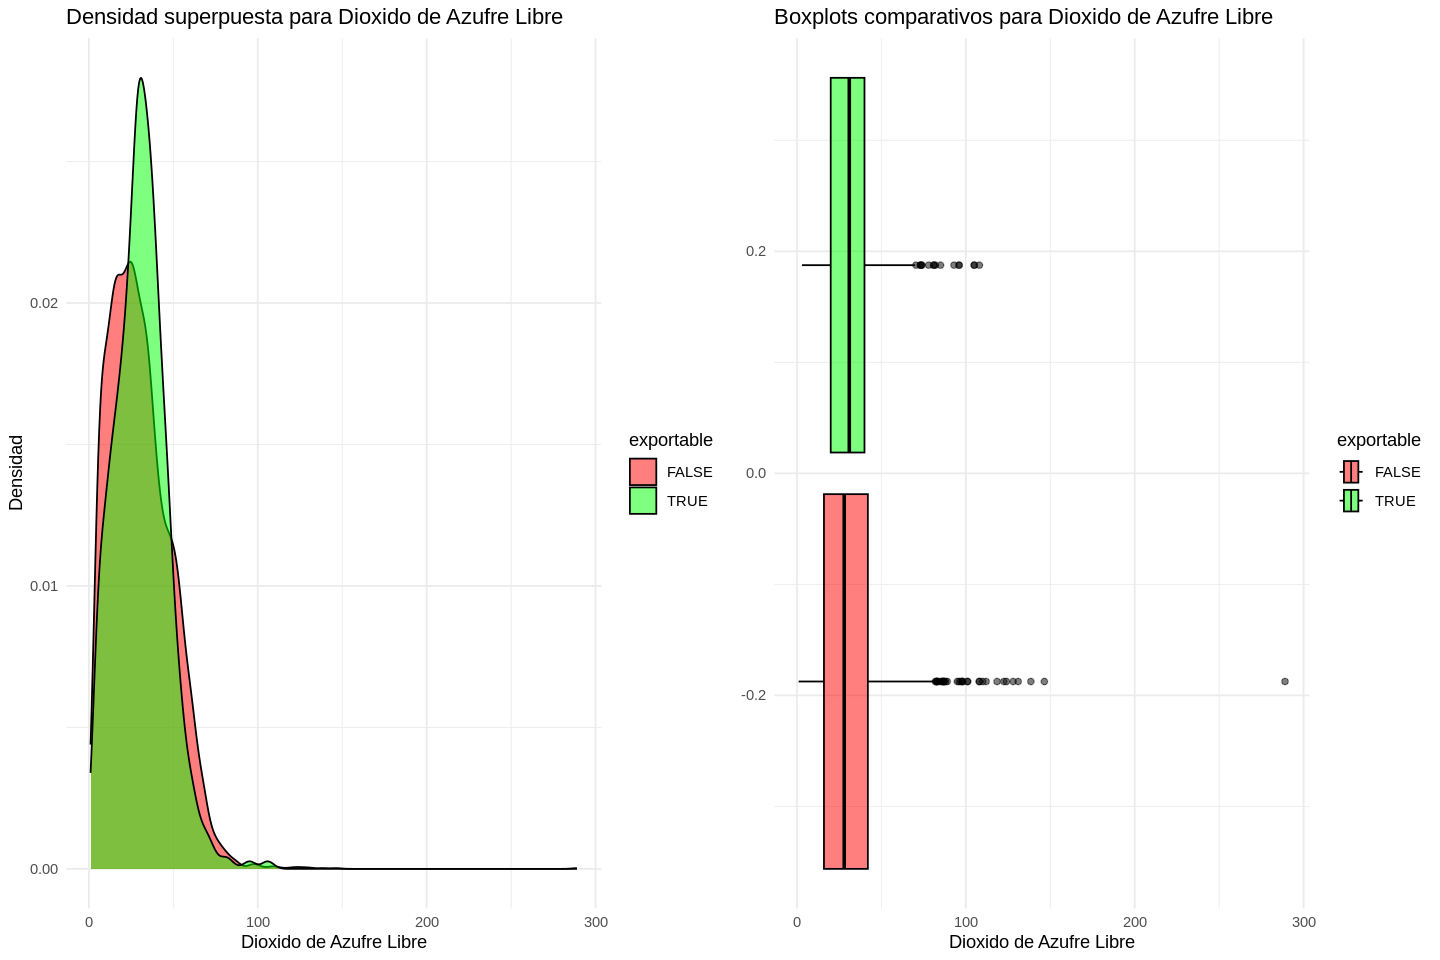

In [ ]:
options(repr.plot.width=12, repr.plot.height=8) #estos options serían para el colab nomás, para que lo imprima bien
ggarrange(g5_3, g5_4, ncol = 2)

No se aprecia una gran significancia de la variable dioxido de azufre libre en determinar si un vino es exportable o no, ya que en ambos casos la mayoría de las observaciones corresponden a valores de 50, donde no es perceptible a la nariz o sabor.

#Analisis variable "Densidad"

In [ ]:
cx<-resumen(data, densidad)
cx
r<-union_all(r,cx)
r

media     sd          mediana q1      q3      iqr     min     max     rango  
1 0.9946966 0.002998673 0.99489 0.99234 0.99699 0.00465 0.98711 1.03898 0.05187
  cv        Variable
1 0.3014661 densidad

media       sd           mediana  q1       q3       iqr      min    
1  7.21530706  1.296433758  7.00000  6.40000  7.70000  1.30000 3.80000
2  0.31863322  0.145317865  0.31000  0.25000  0.39000  0.14000 0.00000
3  5.44323534  4.757803743  3.00000  1.80000  8.10000  6.30000 0.60000
4  0.05603386  0.035033601  0.04700  0.03800  0.06500  0.02700 0.00900
5 30.52531938 17.749399772 29.00000 17.00000 41.00000 24.00000 1.00000
6  0.99469663  0.002998673  0.99489  0.99234  0.99699  0.00465 0.98711
  max       rango     cv         Variable            
1  15.90000  12.10000 17.9678252 acidez_fija         
2   1.66000   1.66000 45.6066279 acido_citrico       
3  65.80000  65.20000 87.4076436 azucar_residual     
4   0.61100   0.60200 62.5221969 cloruros            
5 289.00000 288.00000 58.1464834 dioxido_azufre_libre
6   1.03898   0.05187  0.3014661 densidad

In [ ]:
data %>%
  summarise(media=mean(densidad),
            mediana=median(densidad),
            min=min(densidad),
            max=max(densidad),
            rango= max(densidad) - min(densidad),
            iqr= IQR(densidad),
            sd = sd(densidad),
            cv=(sd(densidad)/mean(densidad))*100)

media     mediana min     max     rango   iqr     sd          cv       
1 0.9946966 0.99489 0.98711 1.03898 0.05187 0.00465 0.002998673 0.3014661

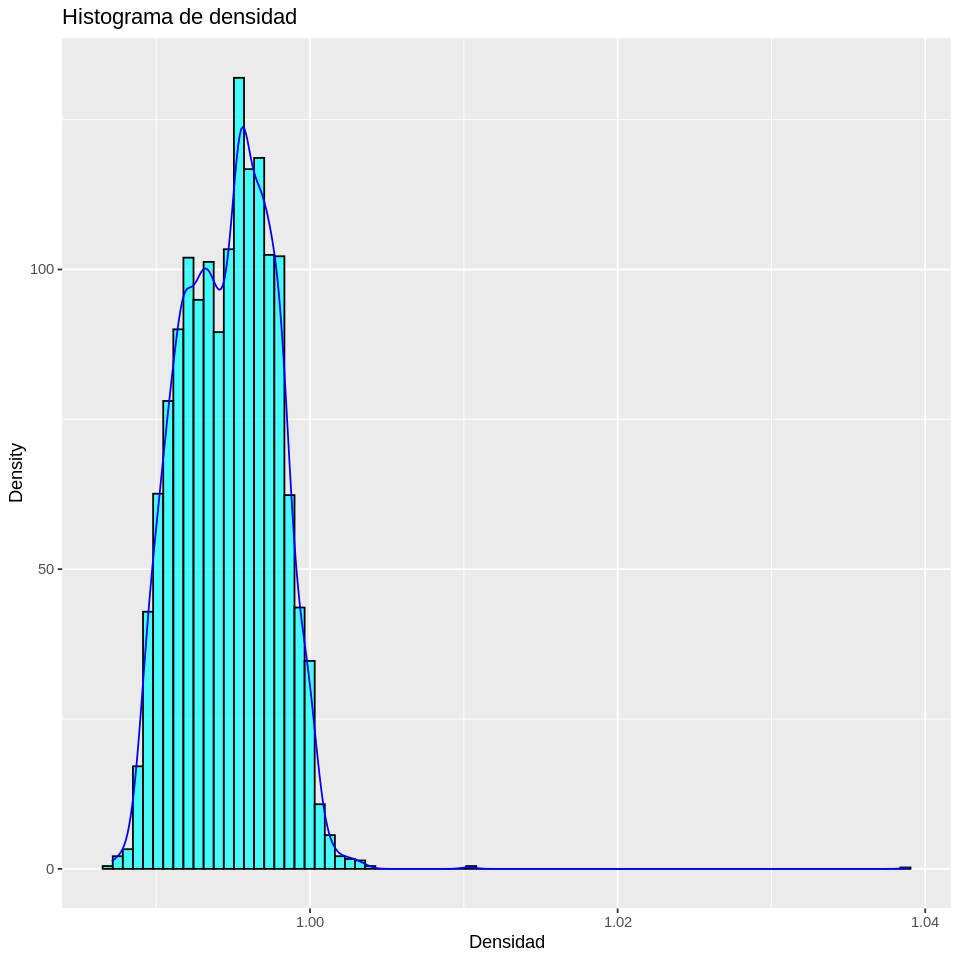

In [ ]:
options(repr.plot.width=8, repr.plot.height=8) #estos options serían para el colab nomás, para que lo imprima bien
g6_1 <- ggplot(data, aes(x = densidad)) +
  geom_histogram(bins = 80,alpha = 0.7, fill = colors[6], color = "black", aes(y= after_stat(density))) +
  #xlim(c(0.98,1.012))+
  geom_density(color = "blue") +
  labs(title = "Histograma de densidad", x = "Densidad", y = "Density")
g6_1

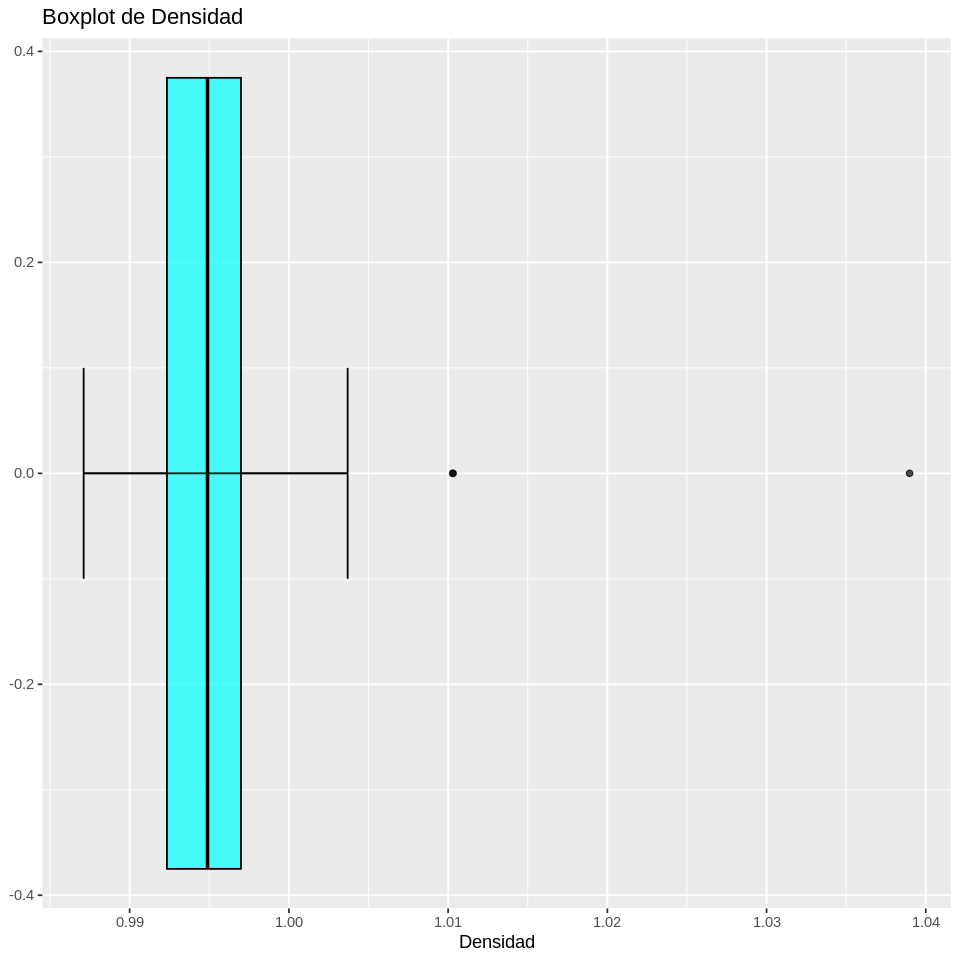

In [ ]:
options(repr.plot.width=8, repr.plot.height=8) #estos options serían para el colab nomás, para que lo imprima bien
g6_2 <- ggplot(data, aes(x = densidad)) +
  geom_boxplot(alpha = 0.7, fill = colors[6], color = "black") +
  #xlim(c(0.98,1.012))+
  stat_boxplot(geom = "errorbar", width = 0.2)  +      # Bigotes
  labs(title = "Boxplot de Densidad", x = "Densidad")
g6_2

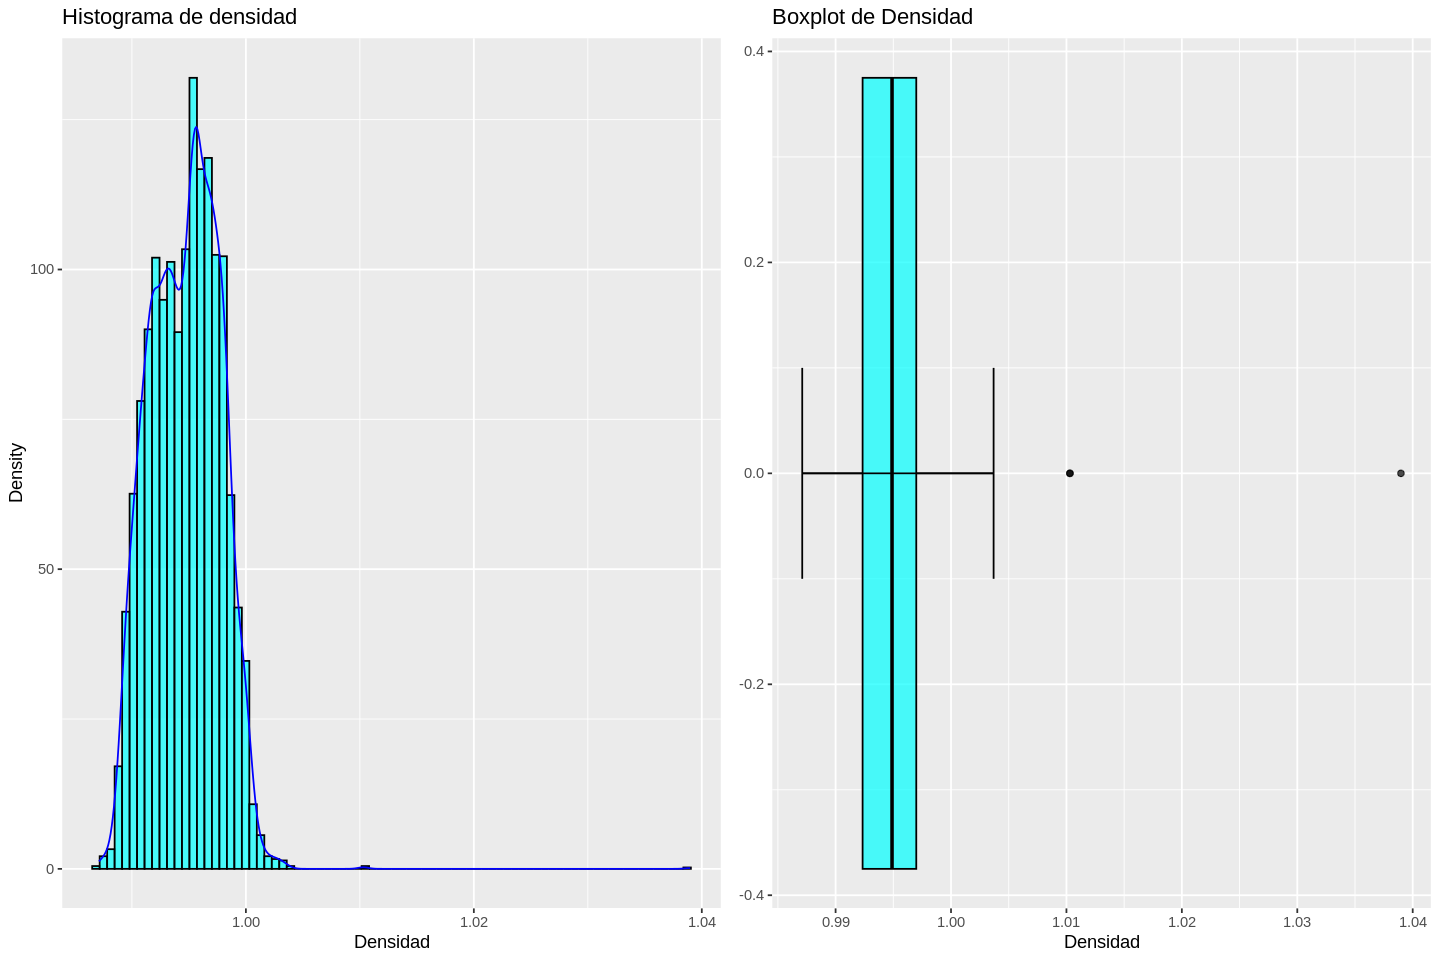

In [ ]:
options(repr.plot.width=12, repr.plot.height=8) #estos options serían para el colab nomás, para que lo imprima bien
ggarrange(g6_1, g6_2, ncol = 2)

In [ ]:
ls<-quantile(data$densidad,.75) + 1.5*IQR(data$densidad)
ls

75% 
1.003965

In [ ]:
nrow(filter(data, data$densidad>ls))

[1] 3

In [ ]:
nrow(filter(data, data$densidad>ls))/nrow(data)

[1] 0.0004617516

Mismo caso que en la variable cloruros, tenemos 3 (menos del muy poco % del total) registros con valores inusual segun el criterio de IQR

##Bivariado

In [ ]:
rbix<-resumenBivariado(data,densidad,exportable)
rbi<-union_all(rbi,rbix)
rbix
rbi

exportable media     sd          mediana q1      q3     iqr     min    
1 FALSE      0.9951051 0.002851643 0.99540 0.99300 0.9972 0.00420 0.98722
2  TRUE      0.9930268 0.003007365 0.99228 0.99072 0.9950 0.00428 0.98711
  max     rango   cv        Variable
1 1.03898 0.05176 0.2865671 densidad
2 1.00320 0.01609 0.3028483 densidad

exportable media       sd           mediana  q1       q3      iqr     
1  FALSE       7.24701149  1.282968256  7.00000  6.40000  7.7000  1.30000
2   TRUE       7.08570869  1.342832384  6.90000  6.30000  7.4000  1.10000
3  FALSE       0.31472031  0.152466024  0.30000  0.24000  0.4000  0.16000
4   TRUE       0.33462803  0.110040418  0.32000  0.28000  0.3800  0.10000
5  FALSE       5.59381226  4.901269141  3.00000  1.80000  8.3000  6.50000
6   TRUE       4.82772122  4.063824047  2.90000  1.80000  6.5000  4.70000
7  FALSE       0.05883697  0.037144545  0.04900  0.04000  0.0690  0.02900
8   TRUE       0.04457557  0.021013989  0.03900  0.03300  0.0510  0.01800
9  FALSE      30.39568966 18.288714933 28.00000 16.00000 42.0000 26.00000
10  TRUE      31.05520752 15.344154276 31.00000 20.00000 40.0000 20.00000
11 FALSE       0.99510513  0.002851643  0.99540  0.99300  0.9972  0.00420
12  TRUE       0.99302684  0.003007365  0.99228  0.99072  0.9950  0.00428
   min     max       rango     cv         Variable            
1  3.80000  15.90000  12.10000 17.7034114 acidez_fija         
2  3.90000  15.60000  11.70000 18.9512784 acidez_fija         
3  0.00000   1.66000   1.66000 48.4449273 acido_citrico       
4  0.00000   0.76000   0.76000 32.8843991 acido_citrico       
5  0.60000  65.80000  65.20000 87.6194787 azucar_residual     
6  0.80000  19.25000  18.45000 84.1768582 azucar_residual     
7  0.00900   0.61100   0.60200 63.1312985 cloruros            
8  0.01200   0.35800   0.34600 47.1423927 cloruros            
9  1.00000 289.00000 288.00000 60.1687777 dioxido_azufre_libre
10 3.00000 108.00000 105.00000 49.4092795 dioxido_azufre_libre
11 0.98722   1.03898   0.05176  0.2865671 densidad            
12 0.98711   1.00320   0.01609  0.3028483 densidad

In [ ]:
data %>%
  group_by(exportable) %>%
  summarise(media = mean(densidad),
            mediana= median(densidad),
            min=min(densidad),
            max=max(densidad),
            rango=max(densidad)-min(densidad),
            iqr= IQR(densidad),
            sd = sd(densidad),
            cv=sd(densidad)/mean(densidad)*100
            )

exportable media     mediana min     max     rango   iqr     sd         
1 FALSE      0.9951051 0.99540 0.98722 1.03898 0.05176 0.00420 0.002851643
2  TRUE      0.9930268 0.99228 0.98711 1.00320 0.01609 0.00428 0.003007365
  cv       
1 0.2865671
2 0.3028483

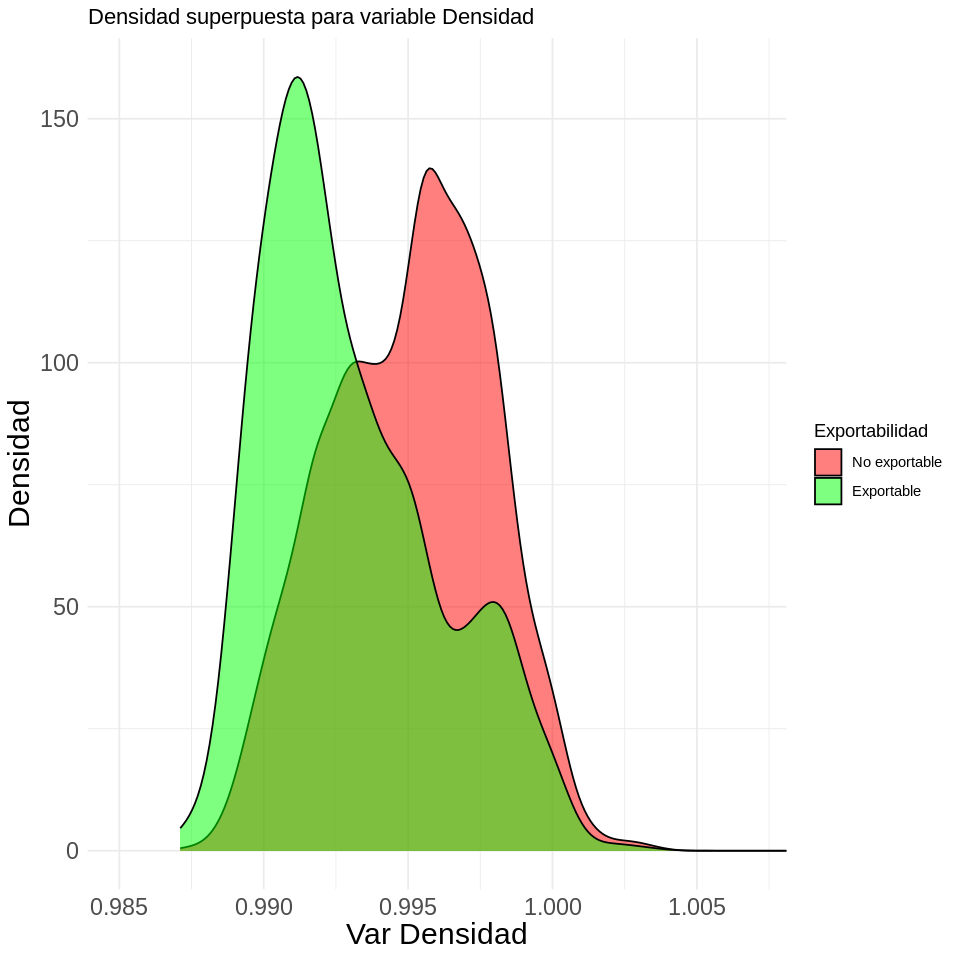

In [ ]:
options(repr.plot.width=8, repr.plot.height=8) #estos options serían para el colab nomás, para que lo imprima bien
g6_3 <- ggplot(data, aes(x = densidad, fill = exportable)) +
  geom_density(alpha = 0.5, color = "black") +
  labs(title = "Densidad superpuesta para variable Densidad", x = "Var Densidad", y = "Densidad") +
  theme_minimal() +
  #scale_fill_manual(values=c("FALSE"="red","TRUE"="green"))+

  scale_fill_manual(name = "Exportabilidad", labels = c("No exportable", "Exportable"),values=c("FALSE"="red","TRUE"="green"))+
  #scale_x_discrete("Exportabilidad") +
  theme(axis.text = element_text(size = 14), axis.title = element_text(size = 18))+

  coord_cartesian(xlim = c(0.985, 1.007))
g6_3

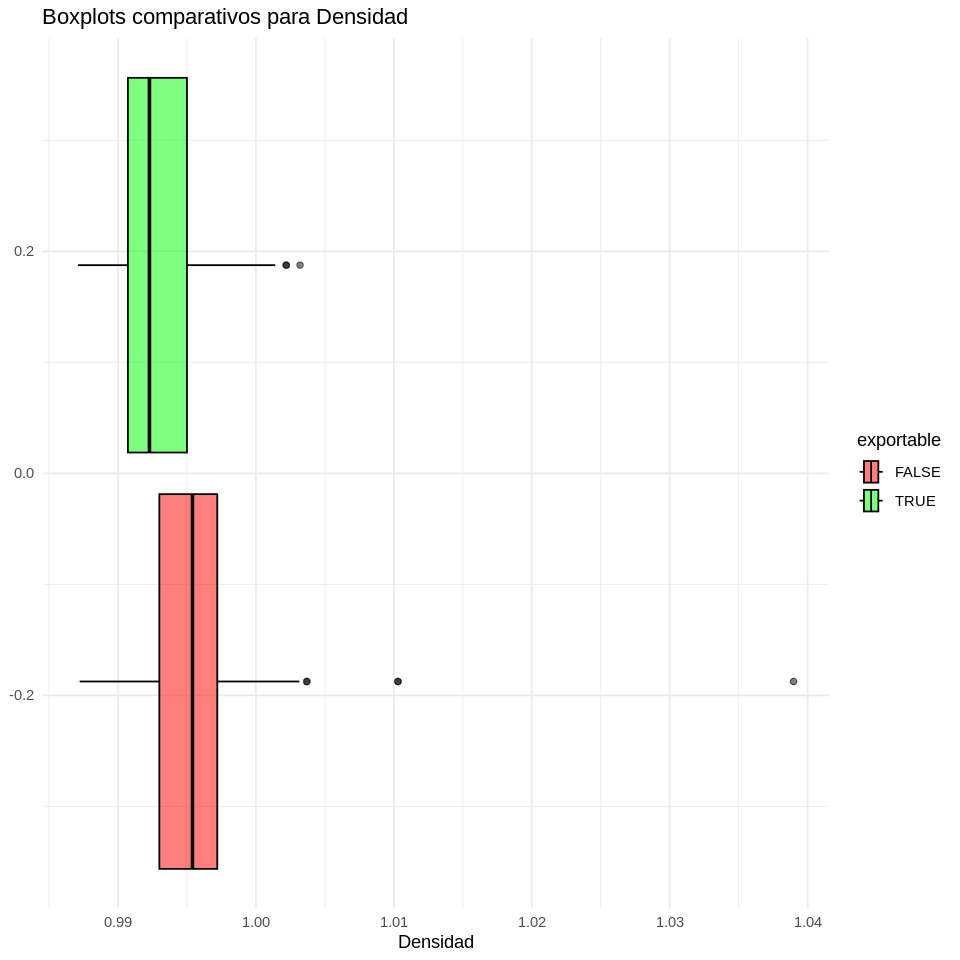

In [ ]:
options(repr.plot.width=8, repr.plot.height=8) #estos options serían para el colab nomás, para que lo imprima bien
g6_4 <- ggplot(data, aes(x = densidad, fill = exportable)) +
  geom_boxplot(alpha = 0.5, color = "black") +
  labs(title = "Boxplots comparativos para Densidad", x = "Densidad") +
  theme_minimal() +
  scale_fill_manual(values=c("FALSE"="red","TRUE"="green"))
g6_4

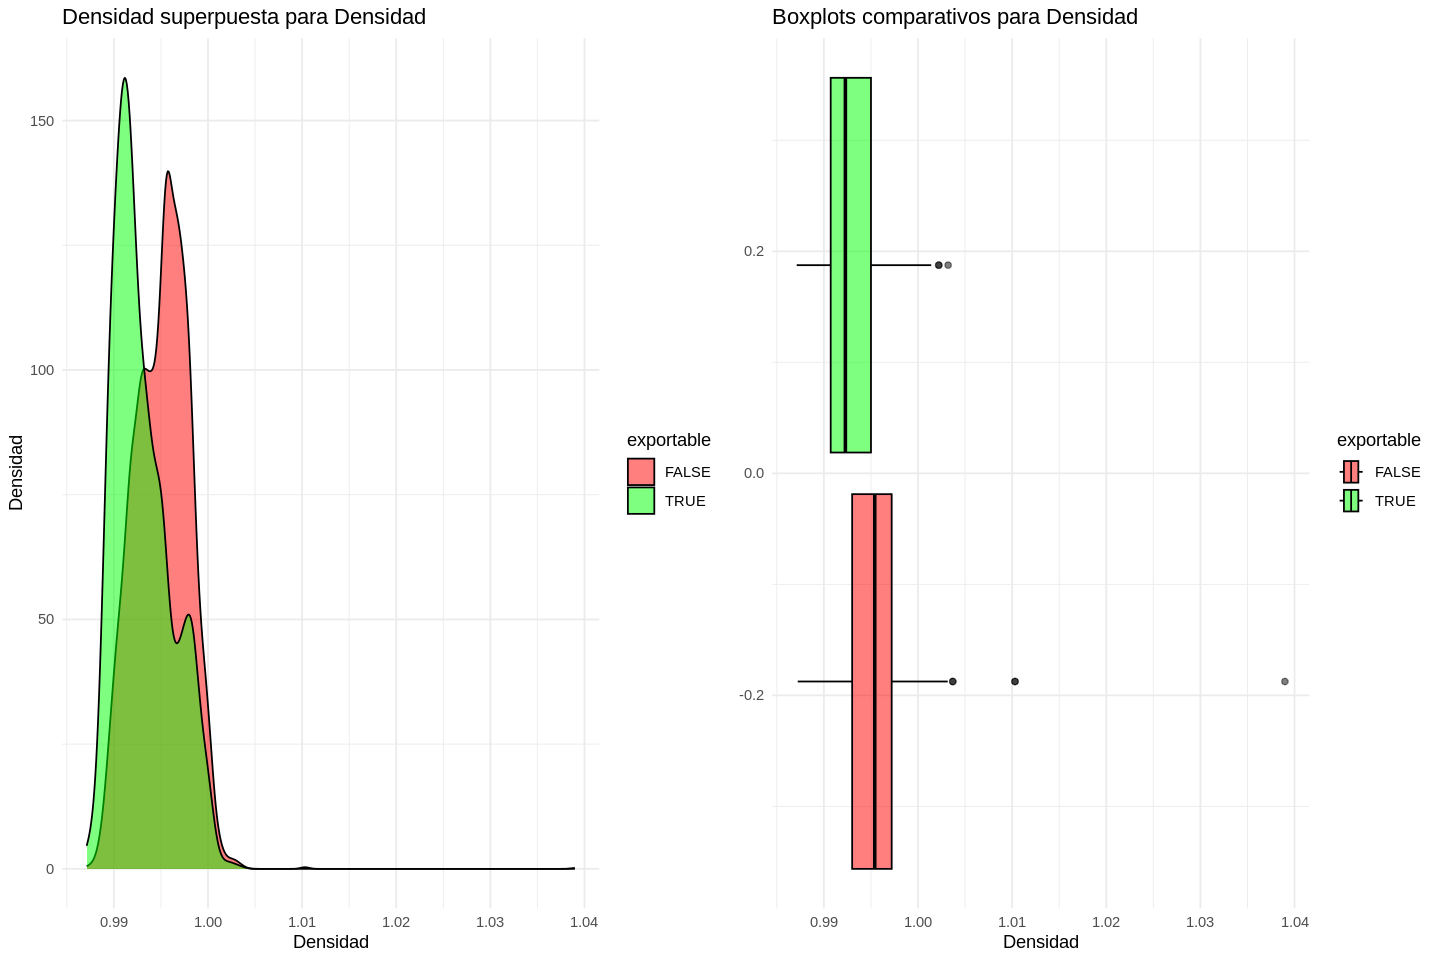

In [ ]:
options(repr.plot.width=12, repr.plot.height=8) #estos options serían para el colab nomás, para que lo imprima bien
ggarrange(g6_3, g6_4, ncol = 2)

#Analisis variable "pH"

In [ ]:
cx<-resumen(data, pH)
cx
r<-union_all(r,cx)
r

media    sd        mediana q1   q3   iqr  min  max  rango cv       Variable
1 3.218501 0.1607872 3.21    3.11 3.32 0.21 2.72 4.01 1.29  4.995717 pH

media       sd           mediana  q1       q3       iqr      min    
1  7.21530706  1.296433758  7.00000  6.40000  7.70000  1.30000 3.80000
2  0.31863322  0.145317865  0.31000  0.25000  0.39000  0.14000 0.00000
3  5.44323534  4.757803743  3.00000  1.80000  8.10000  6.30000 0.60000
4  0.05603386  0.035033601  0.04700  0.03800  0.06500  0.02700 0.00900
5 30.52531938 17.749399772 29.00000 17.00000 41.00000 24.00000 1.00000
6  0.99469663  0.002998673  0.99489  0.99234  0.99699  0.00465 0.98711
7  3.21850085  0.160787202  3.21000  3.11000  3.32000  0.21000 2.72000
  max       rango     cv         Variable            
1  15.90000  12.10000 17.9678252 acidez_fija         
2   1.66000   1.66000 45.6066279 acido_citrico       
3  65.80000  65.20000 87.4076436 azucar_residual     
4   0.61100   0.60200 62.5221969 cloruros            
5 289.00000 288.00000 58.1464834 dioxido_azufre_libre
6   1.03898   0.05187  0.3014661 densidad            
7   4.01000   1.29000  4.9957173 pH

In [ ]:
data %>%
  summarise(media=mean(pH),
            mediana=median(pH),
            min=min(pH),
            max=max(pH),
            rango= max(pH) - min(pH),
            iqr= IQR(pH),
            sd = sd(pH),
            cv=(sd(pH)/mean(pH))*100)

media    mediana min  max  rango iqr  sd        cv      
1 3.218501 3.21    2.72 4.01 1.29  0.21 0.1607872 4.995717

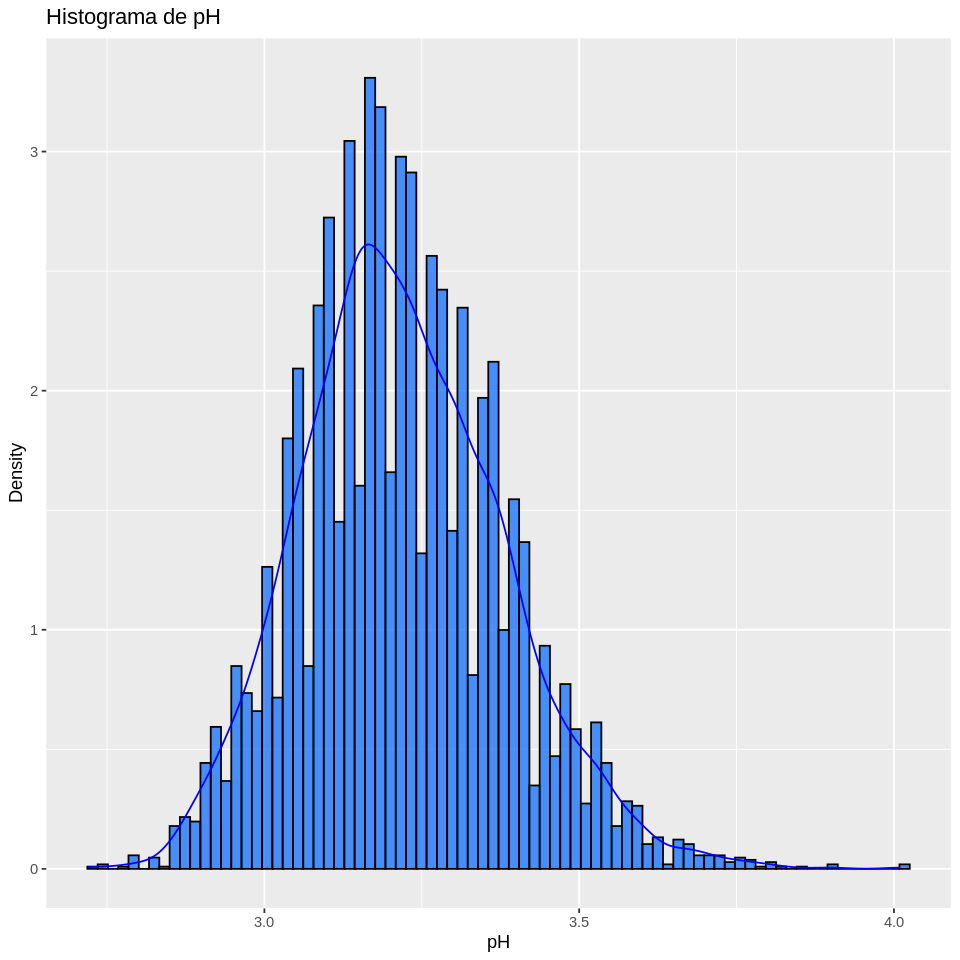

In [ ]:
options(repr.plot.width=8, repr.plot.height=8) #estos options serían para el colab nomás, para que lo imprima bien
g7_1 <- ggplot(data, aes(x = pH)) +
  geom_histogram(bins = 80,alpha = 0.7, fill = colors[7], color = "black", aes(y= after_stat(density))) +
  #xlim(c(0.98,1.012))+
  geom_density(color = "blue") +
  labs(title = "Histograma de pH", x = "pH", y = "Density")
g7_1

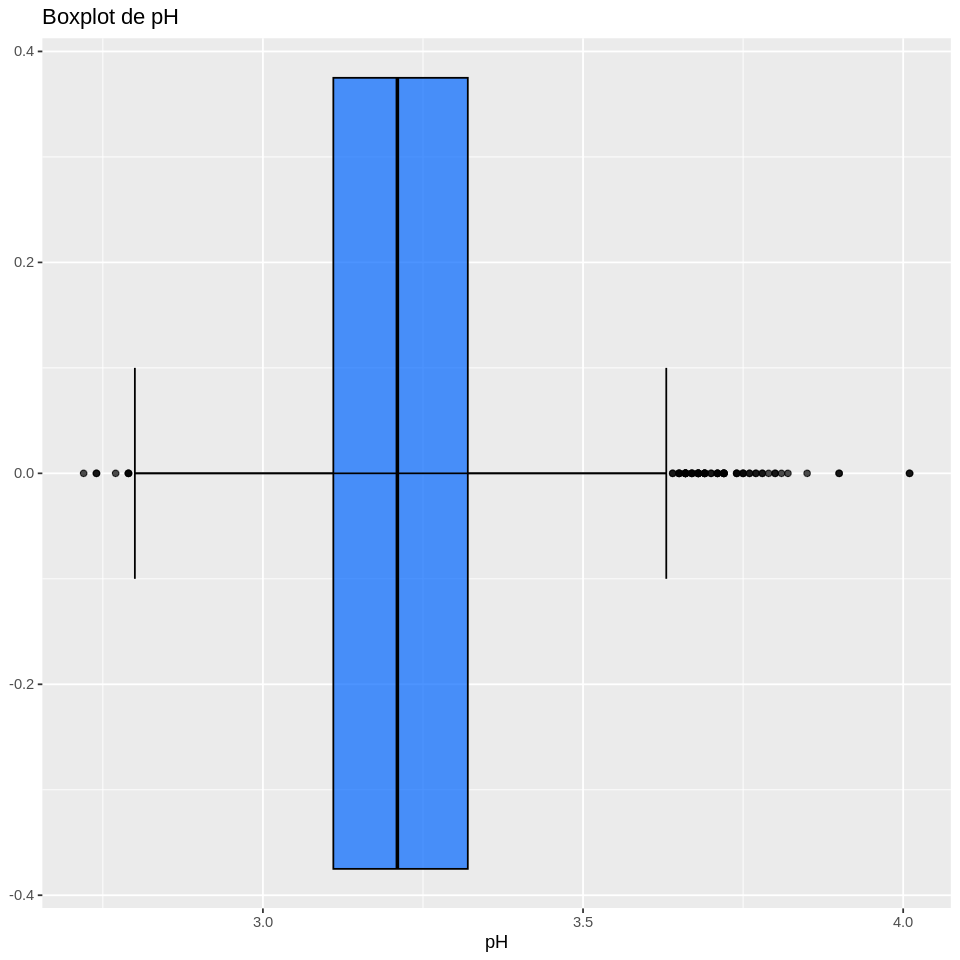

In [ ]:
options(repr.plot.width=8, repr.plot.height=8) #estos options serían para el colab nomás, para que lo imprima bien
g7_2 <- ggplot(data, aes(x = pH)) +
  geom_boxplot(alpha = 0.7, fill = colors[7], color = "black") +
  #xlim(c(0.98,1.012))+
  stat_boxplot(geom = "errorbar", width = 0.2)  +      # Bigotes
  labs(title = "Boxplot de pH", x = "pH")
g7_2

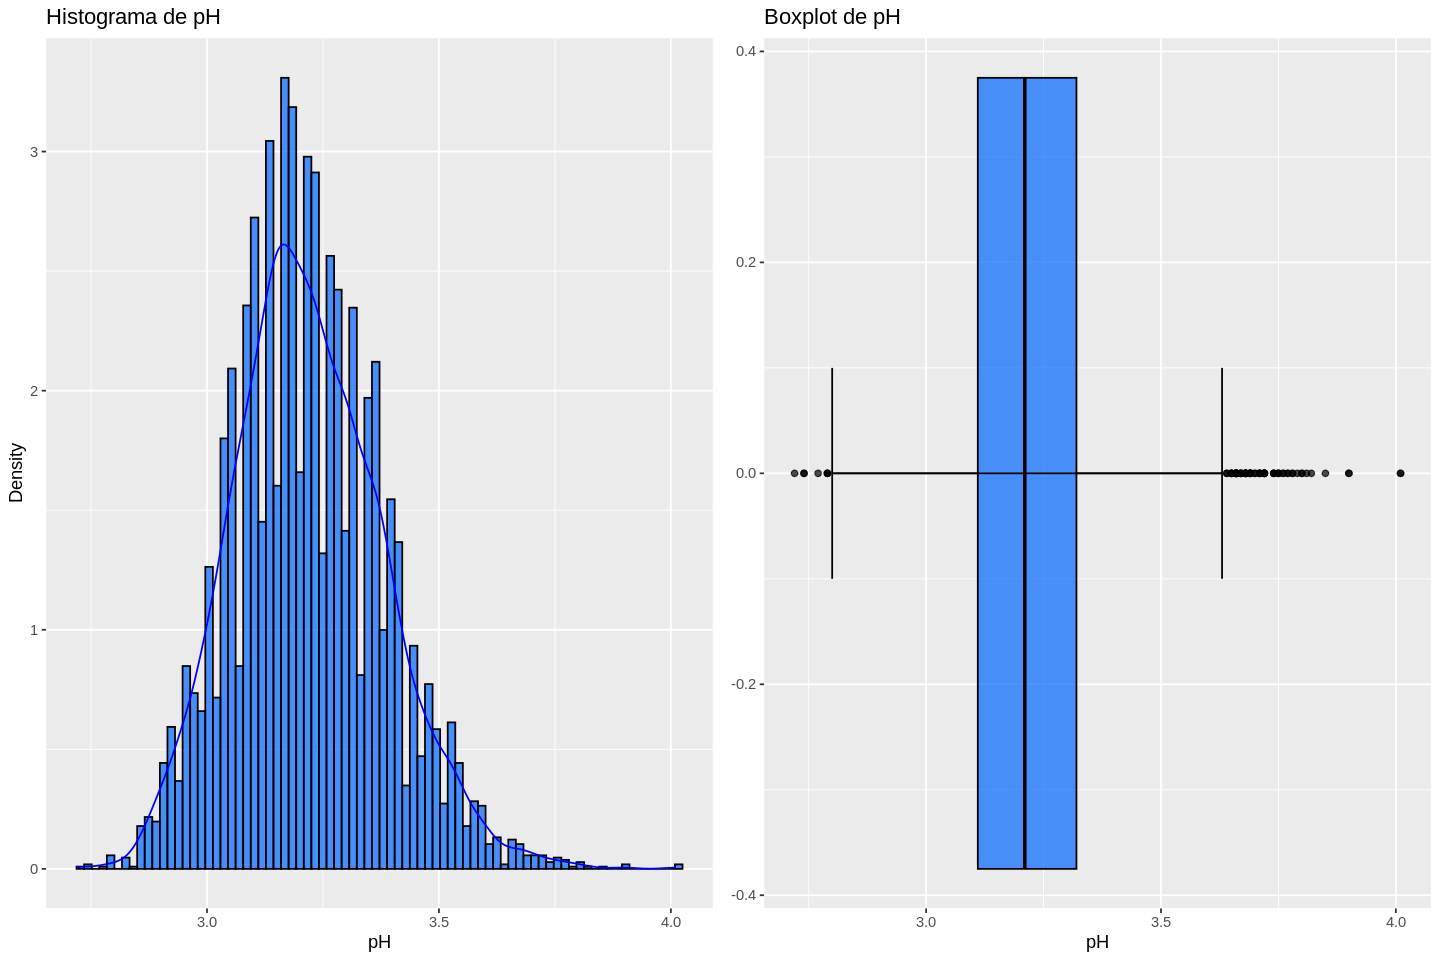

In [ ]:
options(repr.plot.width=12, repr.plot.height=8) #estos options serían para el colab nomás, para que lo imprima bien
ggarrange(g7_1, g7_2, ncol = 2)

La variable "pH" es una del tipo numerica y continua que asemeja una distrubucion normal. La media y la mediana estan muy cercanas, con una distancia inter-quartil baja en relacion a su media (menor a 10%) y tiene un coeficiente de variabilidad del 5%


##Bivariado

In [ ]:
rbix<-resumenBivariado(data,pH,exportable)
rbi<-union_all(rbi,rbix)
rbix
rbi

exportable media    sd        mediana q1   q3   iqr  min  max  rango cv      
1 FALSE      3.216262 0.1611347 3.20    3.11 3.32 0.21 2.72 4.01 1.29  5.009999
2  TRUE      3.227651 0.1590941 3.22    3.12 3.34 0.22 2.84 3.82 0.98  4.929099
  Variable
1 pH      
2 pH

exportable media       sd           mediana  q1       q3      iqr     
1  FALSE       7.24701149  1.282968256  7.00000  6.40000  7.7000  1.30000
2   TRUE       7.08570869  1.342832384  6.90000  6.30000  7.4000  1.10000
3  FALSE       0.31472031  0.152466024  0.30000  0.24000  0.4000  0.16000
4   TRUE       0.33462803  0.110040418  0.32000  0.28000  0.3800  0.10000
5  FALSE       5.59381226  4.901269141  3.00000  1.80000  8.3000  6.50000
6   TRUE       4.82772122  4.063824047  2.90000  1.80000  6.5000  4.70000
7  FALSE       0.05883697  0.037144545  0.04900  0.04000  0.0690  0.02900
8   TRUE       0.04457557  0.021013989  0.03900  0.03300  0.0510  0.01800
9  FALSE      30.39568966 18.288714933 28.00000 16.00000 42.0000 26.00000
10  TRUE      31.05520752 15.344154276 31.00000 20.00000 40.0000 20.00000
11 FALSE       0.99510513  0.002851643  0.99540  0.99300  0.9972  0.00420
12  TRUE       0.99302684  0.003007365  0.99228  0.99072  0.9950  0.00428
13 FALSE       0.99510513  0.002851643  0.99540  0.99300  0.9972  0.00420
14  TRUE       0.99302684  0.003007365  0.99228  0.99072  0.9950  0.00428
15 FALSE       3.21626245  0.161134712  3.20000  3.11000  3.3200  0.21000
16  TRUE       3.22765074  0.159094105  3.22000  3.12000  3.3400  0.22000
   min     max       rango     cv         Variable            
1  3.80000  15.90000  12.10000 17.7034114 acidez_fija         
2  3.90000  15.60000  11.70000 18.9512784 acidez_fija         
3  0.00000   1.66000   1.66000 48.4449273 acido_citrico       
4  0.00000   0.76000   0.76000 32.8843991 acido_citrico       
5  0.60000  65.80000  65.20000 87.6194787 azucar_residual     
6  0.80000  19.25000  18.45000 84.1768582 azucar_residual     
7  0.00900   0.61100   0.60200 63.1312985 cloruros            
8  0.01200   0.35800   0.34600 47.1423927 cloruros            
9  1.00000 289.00000 288.00000 60.1687777 dioxido_azufre_libre
10 3.00000 108.00000 105.00000 49.4092795 dioxido_azufre_libre
11 0.98722   1.03898   0.05176  0.2865671 densidad            
12 0.98711   1.00320   0.01609  0.3028483 densidad            
13 0.98722   1.03898   0.05176  0.2865671 densidad            
14 0.98711   1.00320   0.01609  0.3028483 densidad            
15 2.72000   4.01000   1.29000  5.0099989 pH                  
16 2.84000   3.82000   0.98000  4.9290991 pH

In [ ]:
data %>%
  group_by(exportable) %>%
  summarise(media = mean(pH),
            mediana= median(pH),
            min=min(pH),
            max=max(pH),
            rango=max(pH)-min(pH),
            iqr= IQR(pH),
            sd = sd(pH),
            cv=sd(pH)/mean(pH)*100
            )

exportable media    mediana min  max  rango iqr  sd        cv      
1 FALSE      3.216262 3.20    2.72 4.01 1.29  0.21 0.1611347 5.009999
2  TRUE      3.227651 3.22    2.84 3.82 0.98  0.22 0.1590941 4.929099

## 2) promedio

2)El promedio del ph debe encontrarse en torno a 3.20, ¿se cumple con este requerimiento? ¿Hay diferencias entre los vinos exportables y los que no lo son?

In [ ]:
install.packages('DescTools')
library("DescTools")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘proxy’, ‘rootSolve’, ‘e1071’, ‘lmom’, ‘mvtnorm’, ‘expm’, ‘Rcpp’, ‘Exact’, ‘gld’, ‘BH’




In [ ]:
MeanCI(data$pH,sd=NULL,method="classic",conf.level=0.95)

mean   lwr.ci   upr.ci 
3.218501 3.214590 3.222411

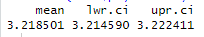

Con una confianza del 95%, la media del pH se encuentra entre 3.21 y 3.22, levemente mayor a 3.20 aunque muy cercano a dicho número.

Podemos también plantearlo como una prueba de hipótesis donde:
Ho: µ = 3.20
H1: µ ≠ 3.20

In [ ]:
#t.test(data$pH,
#       alternative = "two.sided",
#       mu = 3.20,
#       conf.level=0.95)


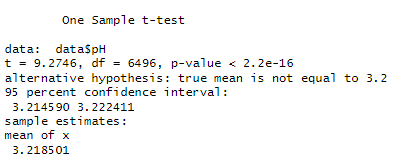

Donde rechazamos Ho, por lo que con un 95% de confianza afirmamos que la media de pH para todos los vinos es mayor a 3.20, aunque cercanos (entre 3.21 y 3.22).

In [ ]:
#MeanCI(data[which(data$exportable==0),]$pH,sd=NULL,method="classic",conf.level=0.95)
#MeanCI(data[which(data$exportable==1),]$pH,sd=NULL,method="classic",conf.level=0.95)

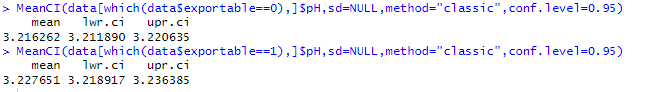

Al observar los IC de las medias de los pH de no exportables como de aquellos que sí lo son, vemos que en ambos casos son similares y, en ambos casos, levemente mayores a 3.20.

Nuevamente, también podemos plantear la misma prueba de hipótesis para cada exportables como para los que no lo son.

In [ ]:
#t.test(data[which(data$exportable==0),]$pH,
#       alternative = "two.sided",
#       mu = 3.20,
#       conf.level=0.95)


#t.test(data[which(data$exportable==1),]$pH,
#       alternative = "two.sided",
#       mu = 3.20,
#       conf.level=0.95)

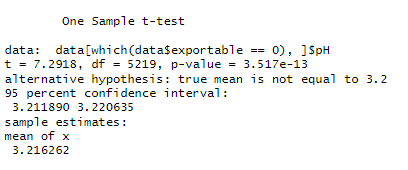

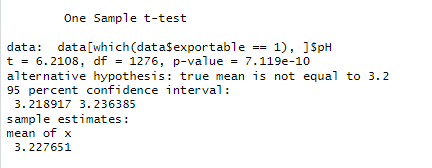


Siendo en ambos casos que con un 95% de confianza, rechazamos Ho, llegando a la misma conclusión que anteriormente.

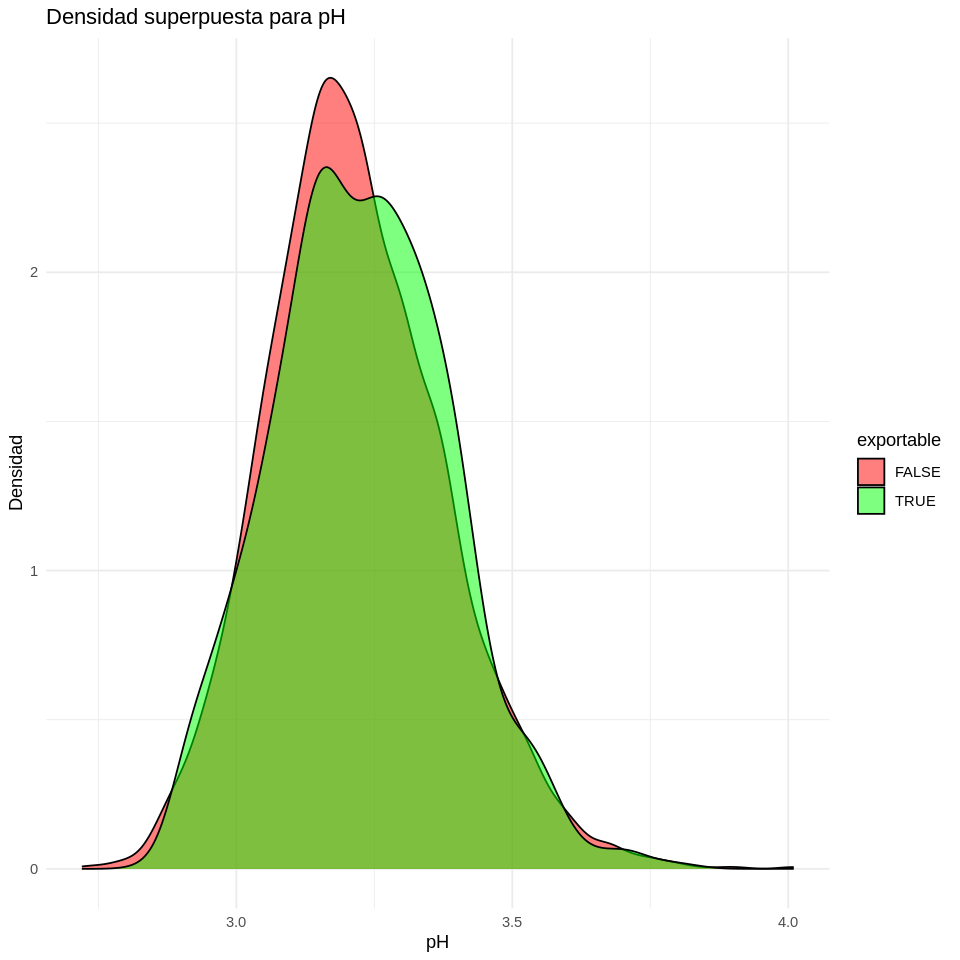

In [ ]:
options(repr.plot.width=8, repr.plot.height=8) #estos options serían para el colab nomás, para que lo imprima bien

g7_3 <- ggplot(data, aes(x = pH, fill = exportable)) +
  geom_density(alpha = 0.5, color = "black") +
  labs(title = "Densidad superpuesta para pH", x = "pH", y = "Densidad") +
  theme_minimal() +
  scale_fill_manual(values=c("FALSE"="red","TRUE"="green"))

g7_3

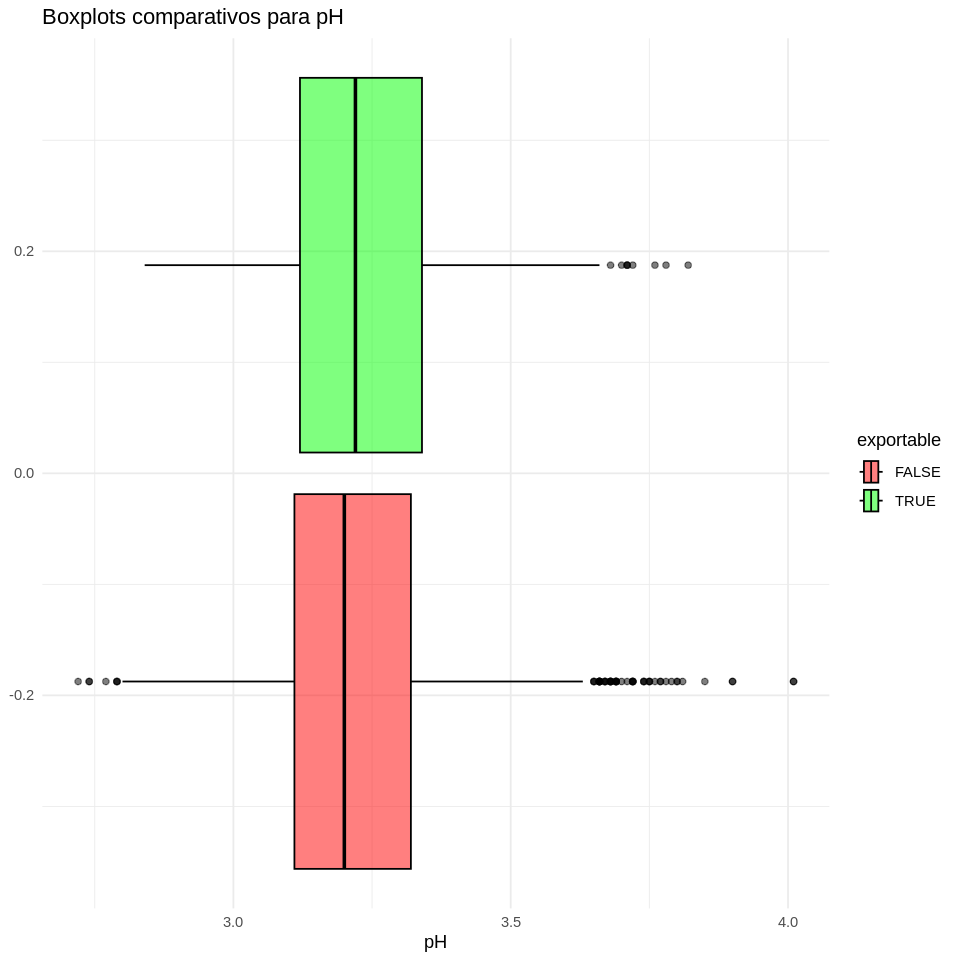

In [ ]:
options(repr.plot.width=8, repr.plot.height=8) #estos options serían para el colab nomás, para que lo imprima bien
g7_4 <- ggplot(data, aes(x = pH, fill = exportable)) +
  geom_boxplot(alpha = 0.5, color = "black") +
  labs(title = "Boxplots comparativos para pH", x = "pH") +
  theme_minimal() +
  scale_fill_manual(values=c("FALSE"="red","TRUE"="green"))
g7_4

#Analisis variable "Alcohol"

In [ ]:
cx<-resumen(data, alcohol)
cx
r<-union_all(r,cx)
r

media   sd       mediana q1  q3   iqr min max  rango cv       Variable
1 10.4918 1.192712 10.3    9.5 11.3 1.8 8   14.9 6.9   11.36804 alcohol

media       sd           mediana  q1       q3       iqr      min    
1  7.21530706  1.296433758  7.00000  6.40000  7.70000  1.30000 3.80000
2  0.31863322  0.145317865  0.31000  0.25000  0.39000  0.14000 0.00000
3  5.44323534  4.757803743  3.00000  1.80000  8.10000  6.30000 0.60000
4  0.05603386  0.035033601  0.04700  0.03800  0.06500  0.02700 0.00900
5 30.52531938 17.749399772 29.00000 17.00000 41.00000 24.00000 1.00000
6  0.99469663  0.002998673  0.99489  0.99234  0.99699  0.00465 0.98711
7  3.21850085  0.160787202  3.21000  3.11000  3.32000  0.21000 2.72000
8 10.49180083  1.192711749 10.30000  9.50000 11.30000  1.80000 8.00000
  max       rango     cv         Variable            
1  15.90000  12.10000 17.9678252 acidez_fija         
2   1.66000   1.66000 45.6066279 acido_citrico       
3  65.80000  65.20000 87.4076436 azucar_residual     
4   0.61100   0.60200 62.5221969 cloruros            
5 289.00000 288.00000 58.1464834 dioxido_azufre_libre
6   1.03898   0.05187  0.3014661 densidad            
7   4.01000   1.29000  4.9957173 pH                  
8  14.90000   6.90000 11.3680365 alcohol

In [ ]:
data %>%
  summarise(media=mean(alcohol),
            mediana=median(alcohol),
            min=min(alcohol),
            max=max(alcohol),
            rango= max(alcohol) - min(alcohol),
            iqr= IQR(alcohol),
            sd = sd(alcohol),
            cv=(sd(alcohol)/mean(alcohol))*100)

media   mediana min max  rango iqr sd       cv      
1 10.4918 10.3    8   14.9 6.9   1.8 1.192712 11.36804

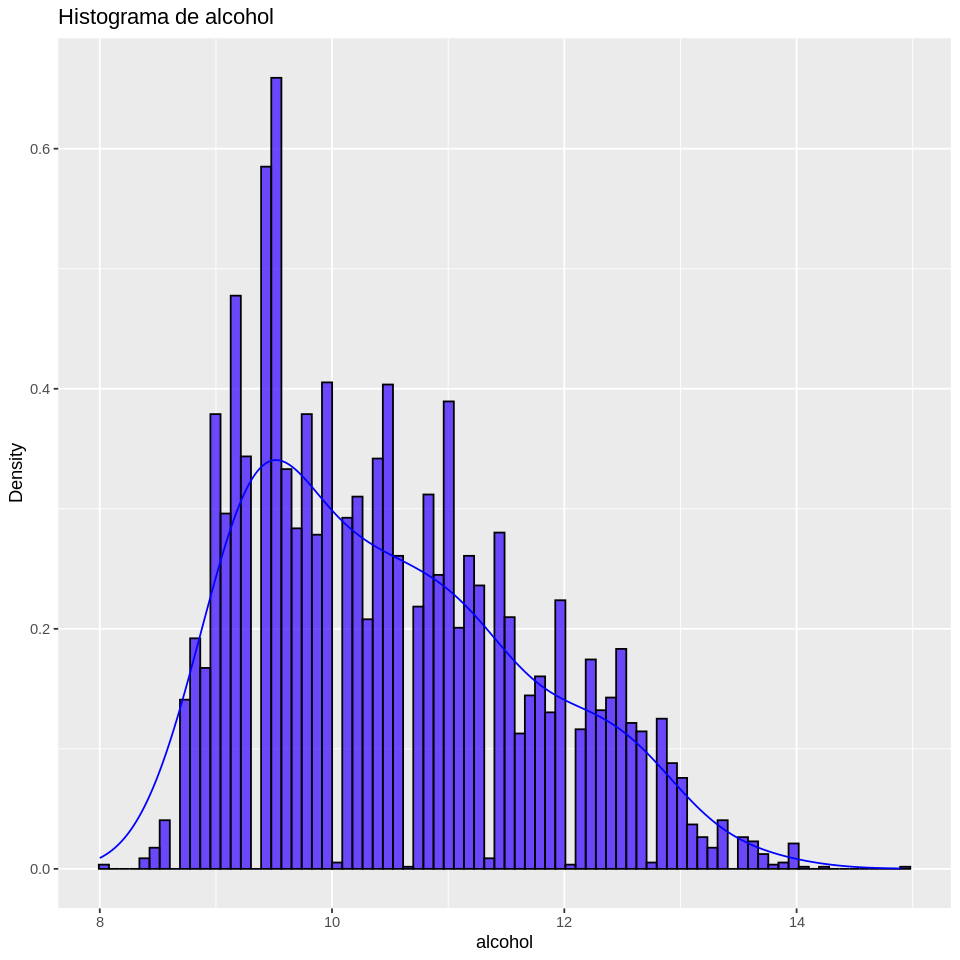

In [ ]:
options(repr.plot.width=8, repr.plot.height=8) #estos options serían para el colab nomás, para que lo imprima bien
g8_1 <-ggplot(data, aes(x = alcohol)) +
  geom_histogram(bins = 80,alpha = 0.7, fill = colors[8], color = "black", aes(y= after_stat(density))) +
  #xlim(c(0.98,1.012))+
  geom_density(color = "blue", adjust =2) +
  labs(title = "Histograma de alcohol", x = "alcohol", y = "Density")
g8_1

# Sección nueva

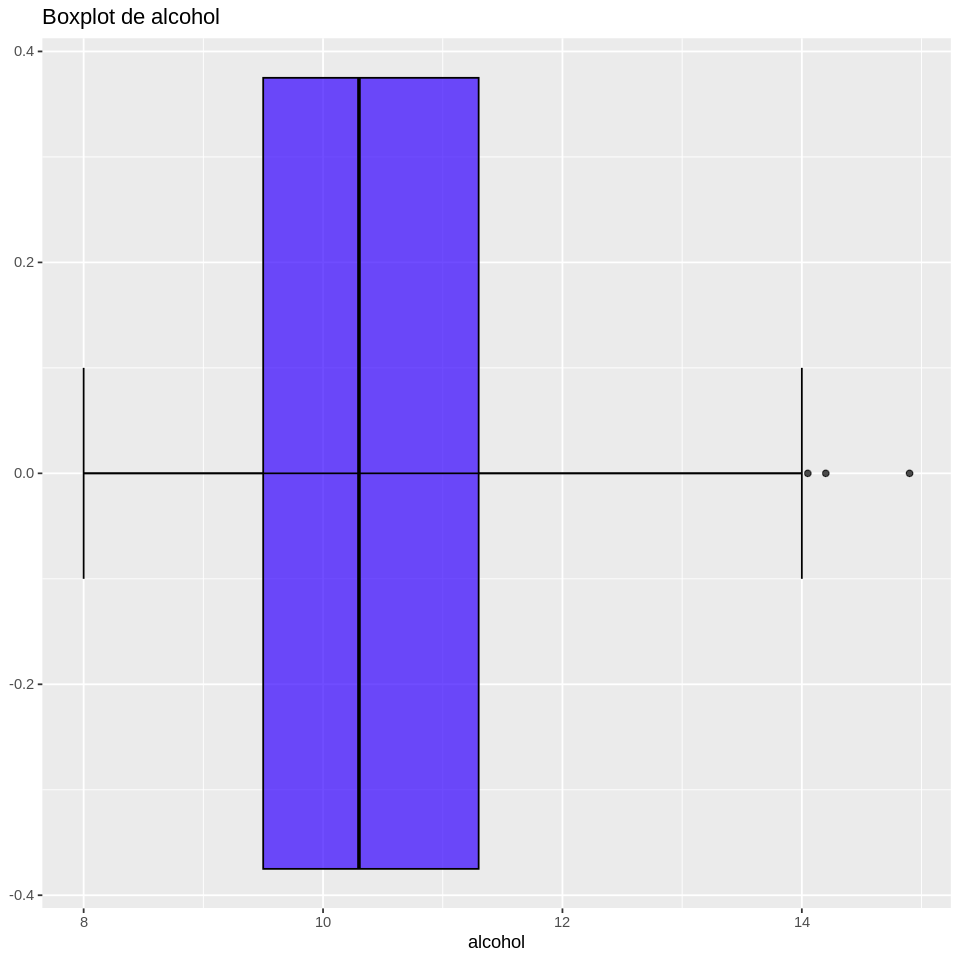

In [ ]:
options(repr.plot.width=8, repr.plot.height=8) #estos options serían para el colab nomás, para que lo imprima bien
g8_2 <-ggplot(data, aes(x = alcohol)) +
  geom_boxplot(alpha = 0.7, fill = colors[8], color = "black") +
  #xlim(c(0.98,1.012))+
  stat_boxplot(geom = "errorbar", width = 0.2)  +      # Bigotes
  labs(title = "Boxplot de alcohol", x = "alcohol")
g8_2

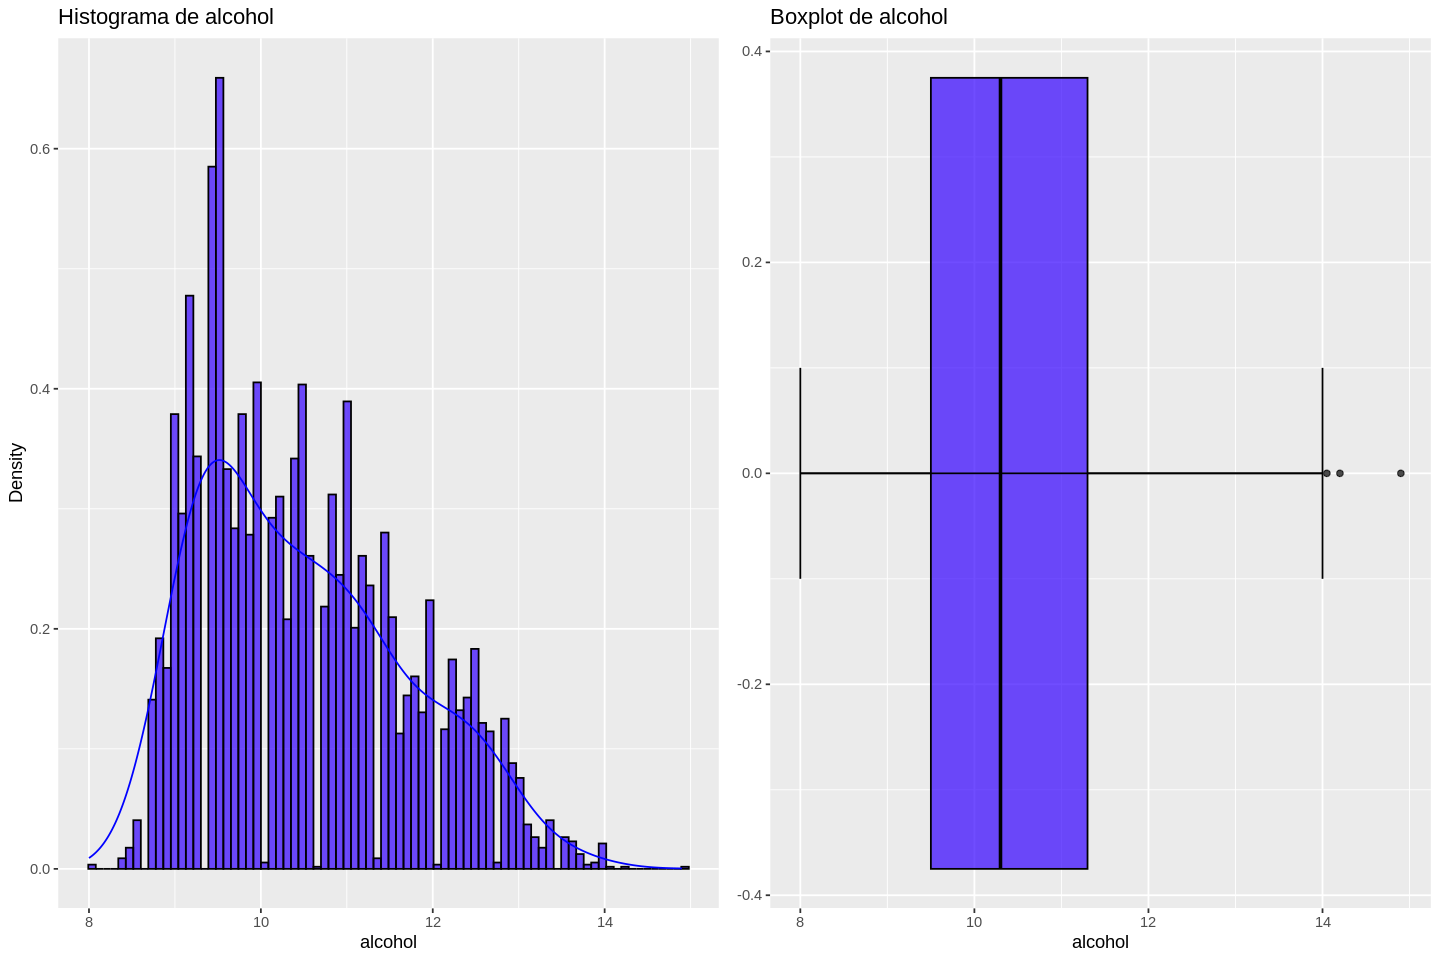

In [ ]:
options(repr.plot.width=12, repr.plot.height=8) #estos options serían para el colab nomás, para que lo imprima bien
ggarrange(g8_1, g8_2, ncol = 2)



La variable "Alcohol" es una del tipo numerica y continua que asemeja una distrubucion normal. La media y la mediana estan muy cercanas, con una distancia inter-quartil baja en relacion a su media (10%) y tiene un coeficiente de variabilidad del 11%


##Bivariado

In [ ]:
rbix<-resumenBivariado(data,alcohol,exportable)
rbi<-union_all(rbi,rbix)
rbix
rbi

exportable media    sd       mediana q1   q3   iqr min max  rango cv      
1 FALSE      10.26146 1.067408 10.0     9.4 11.0 1.6 8.0 14.9 6.9   10.40210
2  TRUE      11.43336 1.215620 11.5    10.7 12.4 1.7 8.5 14.2 5.7   10.63222
  Variable
1 alcohol 
2 alcohol

exportable media       sd           mediana  q1       q3      iqr     
1  FALSE       7.24701149  1.282968256  7.00000  6.40000  7.7000  1.30000
2   TRUE       7.08570869  1.342832384  6.90000  6.30000  7.4000  1.10000
3  FALSE       0.31472031  0.152466024  0.30000  0.24000  0.4000  0.16000
4   TRUE       0.33462803  0.110040418  0.32000  0.28000  0.3800  0.10000
5  FALSE       5.59381226  4.901269141  3.00000  1.80000  8.3000  6.50000
6   TRUE       4.82772122  4.063824047  2.90000  1.80000  6.5000  4.70000
7  FALSE       0.05883697  0.037144545  0.04900  0.04000  0.0690  0.02900
8   TRUE       0.04457557  0.021013989  0.03900  0.03300  0.0510  0.01800
9  FALSE      30.39568966 18.288714933 28.00000 16.00000 42.0000 26.00000
10  TRUE      31.05520752 15.344154276 31.00000 20.00000 40.0000 20.00000
11 FALSE       0.99510513  0.002851643  0.99540  0.99300  0.9972  0.00420
12  TRUE       0.99302684  0.003007365  0.99228  0.99072  0.9950  0.00428
13 FALSE       0.99510513  0.002851643  0.99540  0.99300  0.9972  0.00420
14  TRUE       0.99302684  0.003007365  0.99228  0.99072  0.9950  0.00428
15 FALSE       3.21626245  0.161134712  3.20000  3.11000  3.3200  0.21000
16  TRUE       3.22765074  0.159094105  3.22000  3.12000  3.3400  0.22000
17 FALSE      10.26146169  1.067407834 10.00000  9.40000 11.0000  1.60000
18  TRUE      11.43335944  1.215620017 11.50000 10.70000 12.4000  1.70000
   min     max       rango     cv         Variable            
1  3.80000  15.90000  12.10000 17.7034114 acidez_fija         
2  3.90000  15.60000  11.70000 18.9512784 acidez_fija         
3  0.00000   1.66000   1.66000 48.4449273 acido_citrico       
4  0.00000   0.76000   0.76000 32.8843991 acido_citrico       
5  0.60000  65.80000  65.20000 87.6194787 azucar_residual     
6  0.80000  19.25000  18.45000 84.1768582 azucar_residual     
7  0.00900   0.61100   0.60200 63.1312985 cloruros            
8  0.01200   0.35800   0.34600 47.1423927 cloruros            
9  1.00000 289.00000 288.00000 60.1687777 dioxido_azufre_libre
10 3.00000 108.00000 105.00000 49.4092795 dioxido_azufre_libre
11 0.98722   1.03898   0.05176  0.2865671 densidad            
12 0.98711   1.00320   0.01609  0.3028483 densidad            
13 0.98722   1.03898   0.05176  0.2865671 densidad            
14 0.98711   1.00320   0.01609  0.3028483 densidad            
15 2.72000   4.01000   1.29000  5.0099989 pH                  
16 2.84000   3.82000   0.98000  4.9290991 pH                  
17 8.00000  14.90000   6.90000 10.4021032 alcohol             
18 8.50000  14.20000   5.70000 10.6322208 alcohol

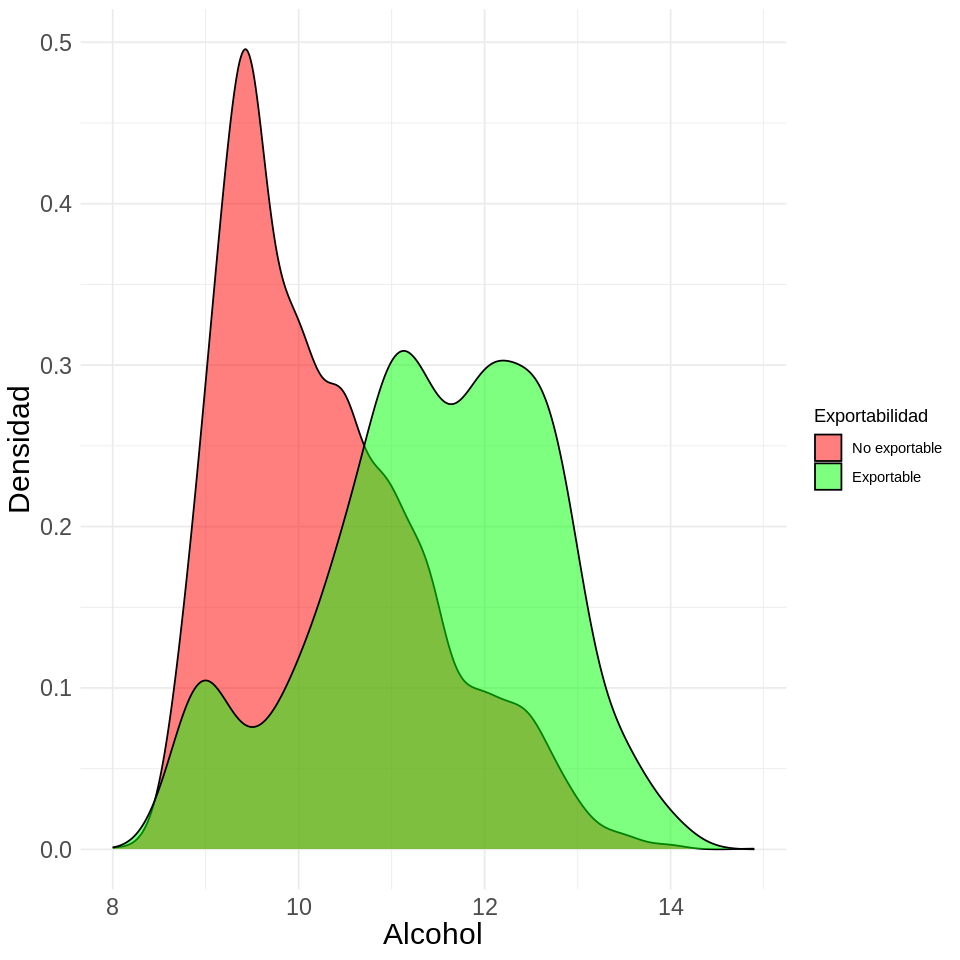

In [ ]:
options(repr.plot.width=8, repr.plot.height=8) #estos options serían para el colab nomás, para que lo imprima bien

g8_3 <-ggplot(data, aes(x = alcohol, fill = exportable)) +
  geom_density(alpha = 0.5, color = "black") +
  labs( x = "Alcohol", y = "Densidad") +
  theme_minimal() +
  scale_fill_manual(name = "Exportabilidad", labels = c("No exportable", "Exportable"),values=c("FALSE"="red","TRUE"="green"))+
  theme(axis.text = element_text(size = 14), axis.title = element_text(size = 18))
g8_3

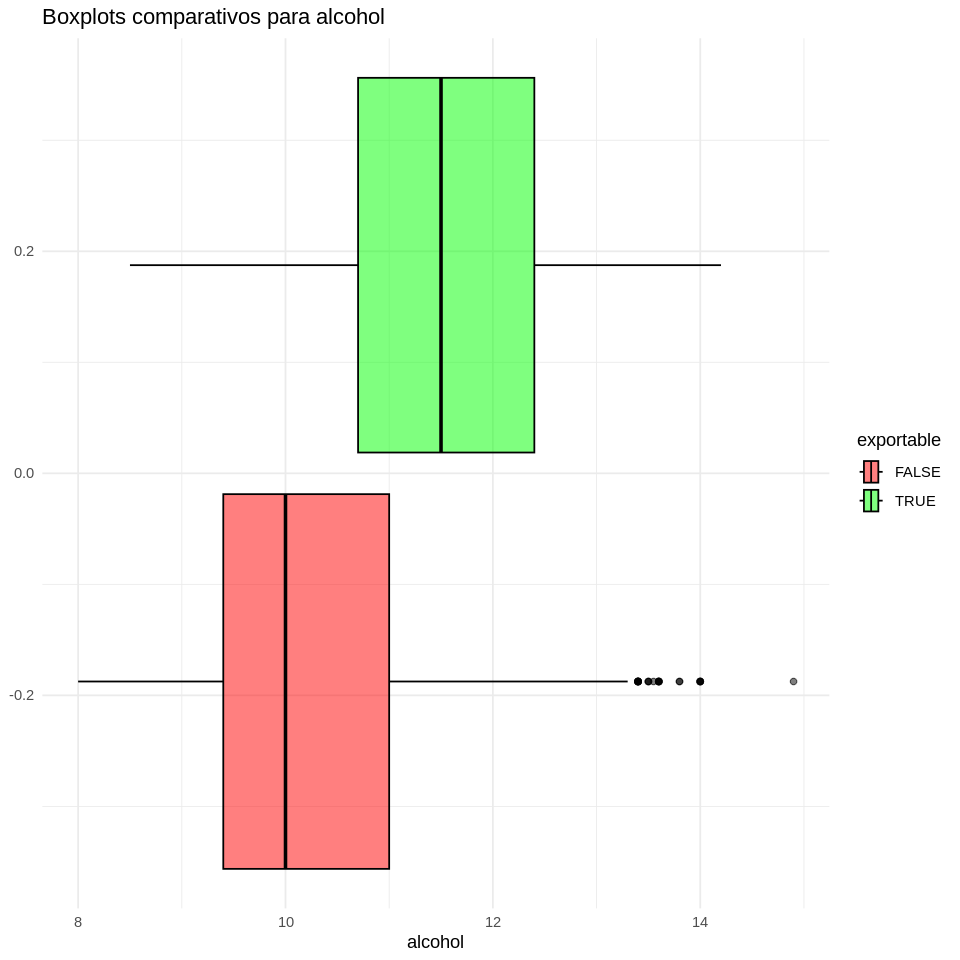

In [ ]:
options(repr.plot.width=8, repr.plot.height=8) #estos options serían para el colab nomás, para que lo imprima bien
g8_4 <- ggplot(data, aes(x = alcohol, fill = exportable)) +
  geom_boxplot(alpha = 0.5, color = "black") +
  labs(title = "Boxplots comparativos para alcohol", x = "alcohol") +
  theme_minimal() +
  scale_fill_manual(values=c("FALSE"="red","TRUE"="green"))
g8_4

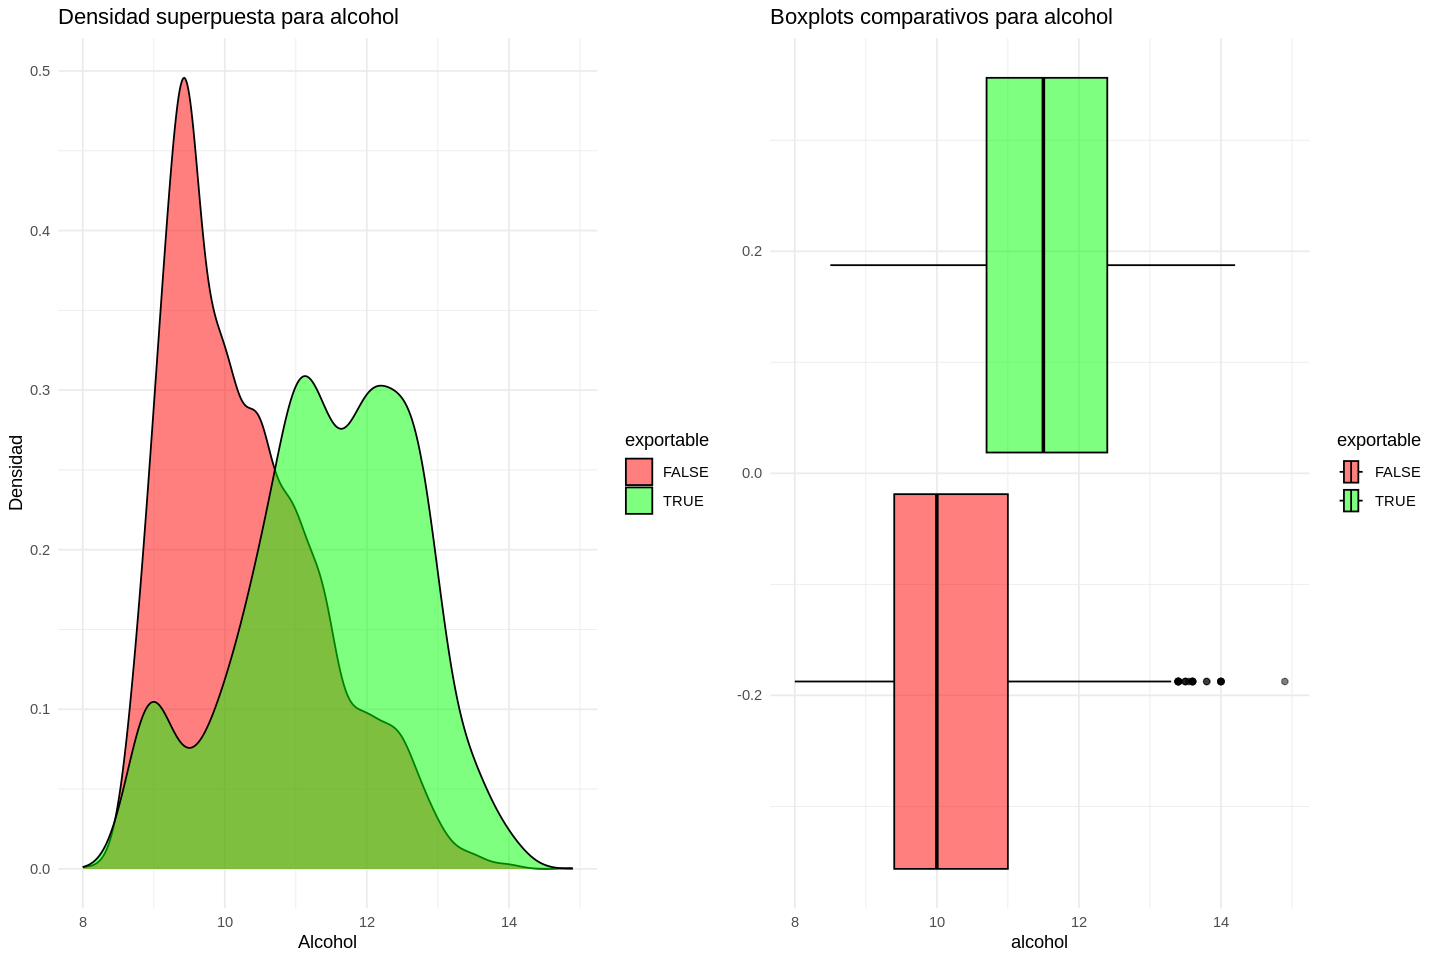

In [ ]:
options(repr.plot.width=12, repr.plot.height=8) #estos options serían para el colab nomás, para que lo imprima bien
ggarrange(g8_3, g8_4, ncol = 2)

#Analisis variable "Tipo"

In [ ]:
install.packages('janitor')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘snakecase’




In [ ]:
library(janitor)


Attaching package: ‘janitor’


The following objects are masked from ‘package:stats’:

    chisq.test, fisher.test




In [ ]:
data %>%
  tabyl(tipo) %>%
  adorn_totals %>%
  adorn_pct_formatting(digits = 1)

tipo   n    percent
1 blanco 4898 75.4%  
2 tinto  1599 24.6%  
3 Total  6497 100.0%

In [ ]:
# Al no contar con el paquete janitor, lo gener asi, pero podriamos pasarlo a tabyl en la entrega
contarTipo = count(data,tipo)
porcentajesTipo = contarTipo[2] / sum(contarTipo[2])*100
result = data.frame(Tipo = as.vector(contarTipo[1]),Valores = as.vector(contarTipo[2]), Porcentajes = as.vector(porcentajesTipo))
print(result)

#data %>%
  #tabyl(tipo) %>%
  #adorn_totals %>%
  #adorn_pct_formatting(digits = 1)

    tipo    n      n.1
1 blanco 4898 75.38864
2  tinto 1599 24.61136


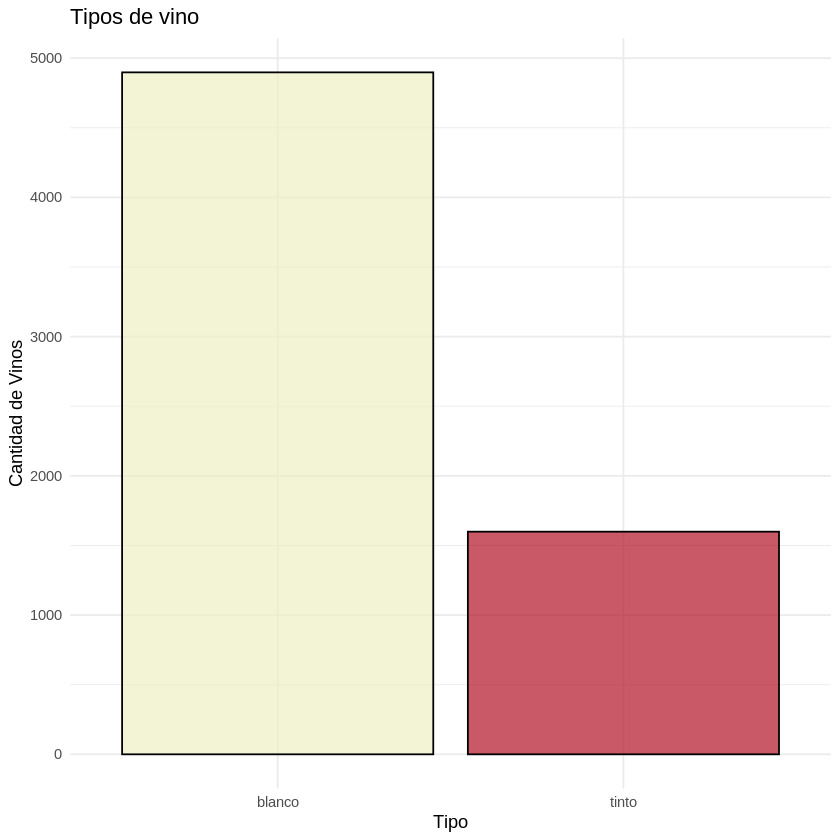

In [ ]:
# Segun google, estos son coleres de vino blanco y tinto
ggplot(data, aes(x= tipo)) +
  geom_bar(alpha = 0.7, fill = c("#EEEDC4", "#b11226"), color = "black") +
  labs(title = "Tipos de vino", x = "Tipo", y="Cantidad de Vinos")+
  theme_minimal()

Aproximadamente el 75% de los vinos de los que se registraron datos son blancos y el 25% restante son tintos

## Bivariado

###Conjunto

In [ ]:
data %>%
  tabyl(tipo,exportable) %>%
  adorn_totals(c("row", "col")) %>%
  adorn_percentages("all") %>%
  adorn_pct_formatting(digits = 2)

tipo   FALSE  TRUE   Total  
1 blanco 59.07% 16.32% 75.39% 
2 tinto  21.27% 3.34%  24.61% 
3 Total  80.34% 19.66% 100.00%

In [ ]:
tabla=table(data$tipo, data$exportable)
tabla

        
         FALSE TRUE
  blanco  3838 1060
  tinto   1382  217

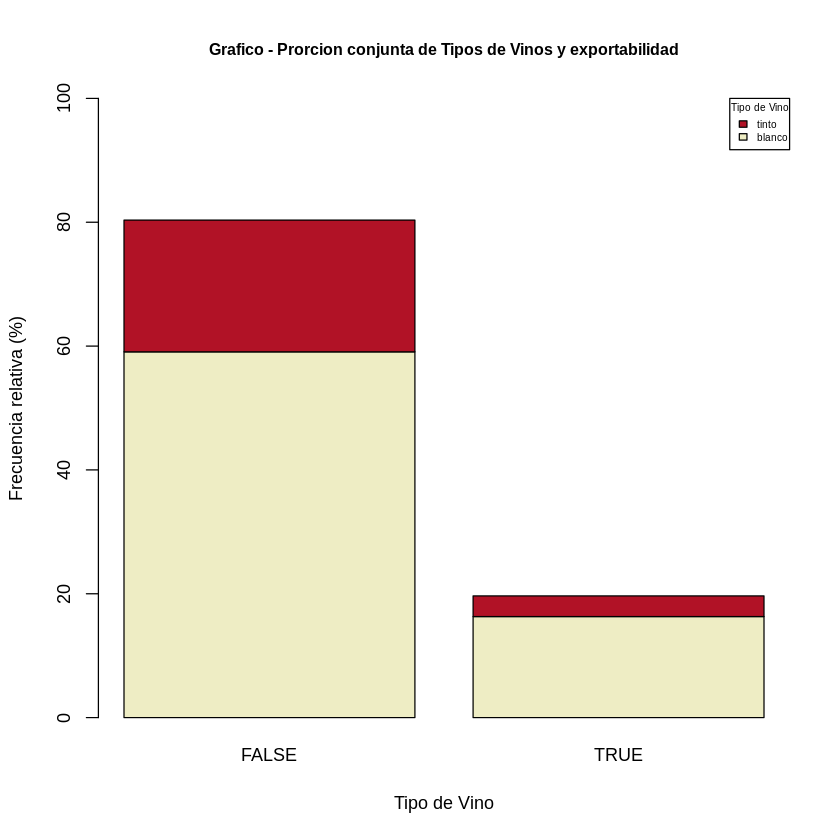

In [ ]:
##Barras apiladas - Frec Relativa
barplot(prop.table(tabla)*100,
        xlab = "Tipo de Vino", ylab = "Frecuencia relativa (%)",
        col =c("#EEEDC4", "#b11226"),
        cex.axis = 0.9, cex.lab=0.9,cex.names =0.9,cex.main=0.8,
        ylim=c(0,100),
        legend.text = rownames(tabla),
        args.legend = list(x = "topright", cex=0.5,inset = c(0,0), title="Tipo de Vino"),
        main = ("Grafico - Prorcion conjunta de Tipos de Vinos y exportabilidad"),
        beside=FALSE)

In [ ]:
chisq.test(data$tipo,data$exportable)


	Pearson's Chi-squared test with Yates' continuity correction

data:  data$tipo and data$exportable
X-squared = 49.209, df = 1, p-value = 2.301e-12


###Exportable dado el tipo de vino

In [ ]:
#proporcion de exportable, dada el tipo de vino
data %>%
  tabyl(tipo,exportable) %>%
  adorn_totals(c("row","col")) %>%
  adorn_percentages("row")%>%
  adorn_pct_formatting(digits = 2)

tipo   FALSE  TRUE   Total  
1 blanco 78.36% 21.64% 100.00%
2 tinto  86.43% 13.57% 100.00%
3 Total  80.34% 19.66% 100.00%

In [ ]:
tabla2=table(data$exportable,data$tipo)
tabla2

       
        blanco tinto
  FALSE   3838  1382
  TRUE    1060   217

In [ ]:
df<-prop.table(tabla2, margin=2)
df

       
           blanco     tinto
  FALSE 0.7835851 0.8642902
  TRUE  0.2164149 0.1357098

In [ ]:
ggplot(df,aes(x="",y=porcentaje, fill=categorias))+
  geom_bar(stat = "identity",
           color="white")+
    geom_text(aes(label=porcentaje),
              position=position_stack(vjust=0.5))

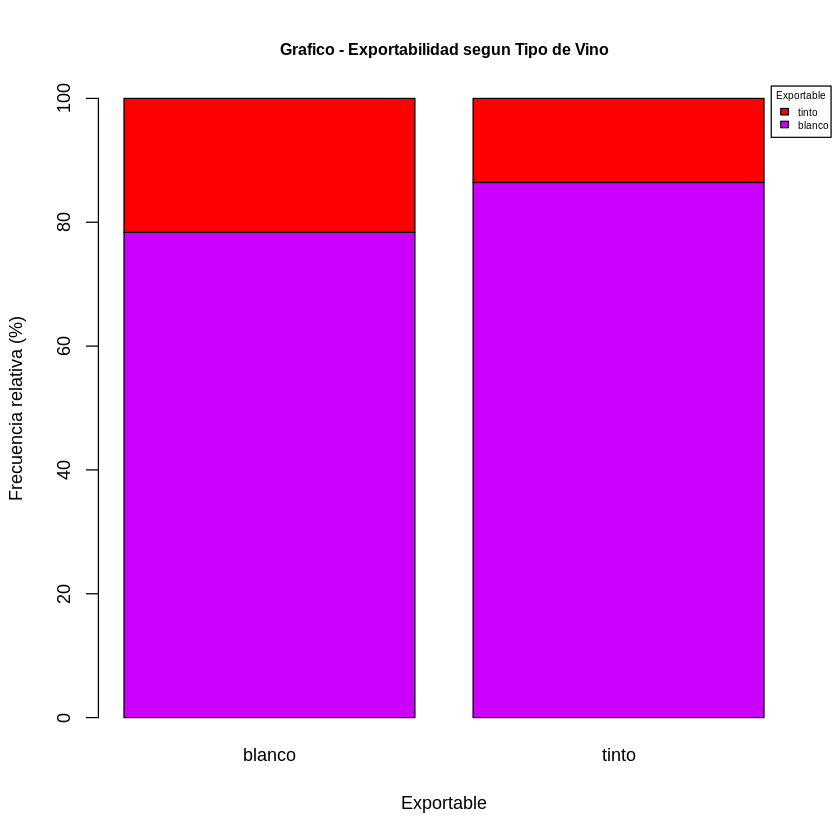

In [ ]:
#Barras agrupadas- - frec relativa
barplot(prop.table(tabla2, margin=2)*100,
        xlab = "Exportable", ylab = "Frecuencia relativa (%)",
        col = c(colors[9], colors[1]),
        cex.axis = 0.9, cex.lab=0.9,cex.names =0.9,cex.main=0.8,
        ylim=c(0,100),
        legend.text = rownames(tabla),
        args.legend = list(x = "topright", cex=0.5,inset = c(-0.06,-0.02), title="Exportable"),
        main = ("Grafico - Exportabilidad segun Tipo de Vino"),
        beside=FALSE)

###Tipo de vino dado su exportabilidad

In [ ]:
#Tabla de contingencia para variables tipo y exportable
data %>%
  tabyl(tipo, exportable) %>%
  adorn_totals(c("row", "col")) %>%
  adorn_percentages("col") %>%
  adorn_pct_formatting(digits = 2)
  #adorn_ns()

tipo   FALSE   TRUE    Total  
1 blanco 73.52%  83.01%  75.39% 
2 tinto  26.48%  16.99%  24.61% 
3 Total  100.00% 100.00% 100.00%

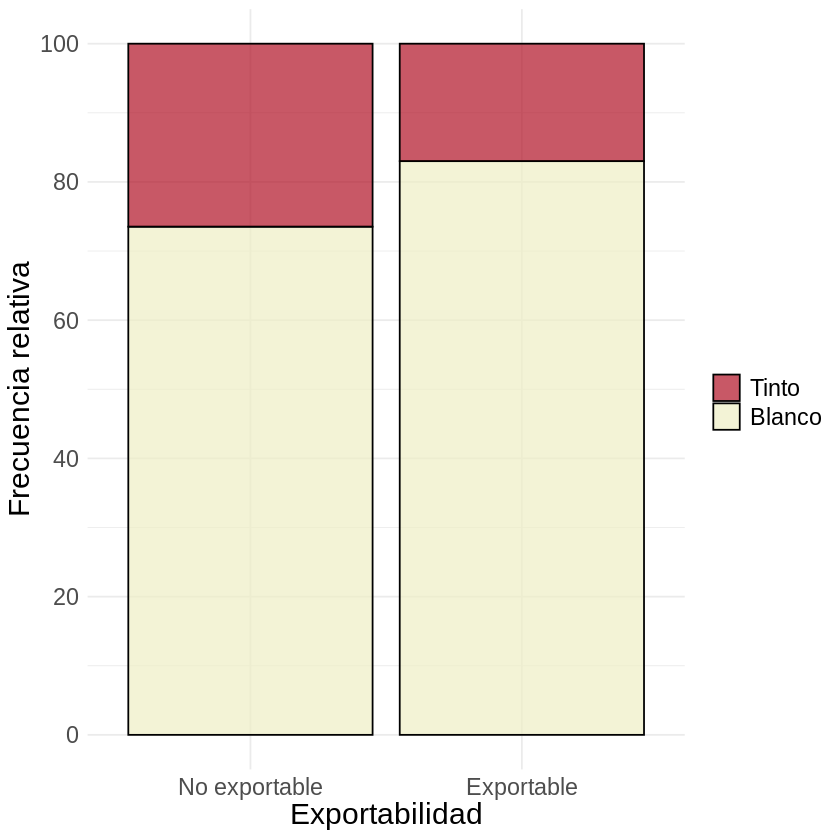

In [ ]:
#data$exportable_aux <- factor(data$exportable, levels = c("FALSE", "TRUE"), labels = c("No exportable", "Exportable"))
tablatipo=table(data$tipo,data$exportable)
data_tipo_aux = as.data.frame(tablatipo)
data_tipo_aux$Var2 <-factor(data_tipo_aux$Var2, levels = c("FALSE", "TRUE"), labels = c("No exportable", "Exportable"))
data_tipo_aux$Var1 <-factor(data_tipo_aux$Var1, levels = c("tinto", "blanco"), labels = c("Tinto", "Blanco"))
#data_tipo_aux

valores_y <- seq(0,1,0.2)

ggplot(data_tipo_aux) +
  geom_bar(aes(x = Var2, y = Freq, fill = Var1), stat="identity", position = "fill", color = "black") +
  scale_x_discrete("Exportabilidad") +
  scale_y_continuous("Frecuencia relativa", breaks = valores_y, labels = 100*valores_y) +
  scale_fill_manual("", values = c(rgb(177/255, 18/255, 38/255, alpha = 0.7), rgb(238/255, 238/255, 196/255, alpha = 0.7))) +
  theme_minimal() +
  theme(axis.text = element_text(size = 14),
        axis.title = element_text(size = 18),
        legend.text = element_text(size = 14))


In [ ]:
#barplot(prop.table(tablatipo,margin=2)*100,
#        xlab = "Exportabilidad", ylab = "Frecuencia relativa (%)",
#        col = c(rgb(238/255, 238/255, 196/255, alpha = 0.7), rgb(177/255, 18/255, 38/255, alpha = 0.7)),
#        legend.text = rownames(tablatipo),
#        args.legend = list(x = "topright", cex=1,inset = c(-0.05,-0.12)),
#        beside=FALSE)

#Analisis variable "Calidad"

In [ ]:
contarCalidad = count(data,calidad)
porcentajesCalidad = contarCalidad[2] / sum(contarCalidad[2])*100
result = data.frame(Tipo = as.vector(contarCalidad[1]),Valores = as.vector(contarCalidad[2]), Porcentajes = as.vector(porcentajesCalidad))
print(result)

  calidad    n        n.1
1       3   30  0.4617516
2       4  216  3.3246114
3       5 2138 32.9074958
4       6 2836 43.6509158
5       7 1079 16.6076651
6       8  193  2.9706018
7       9    5  0.0769586


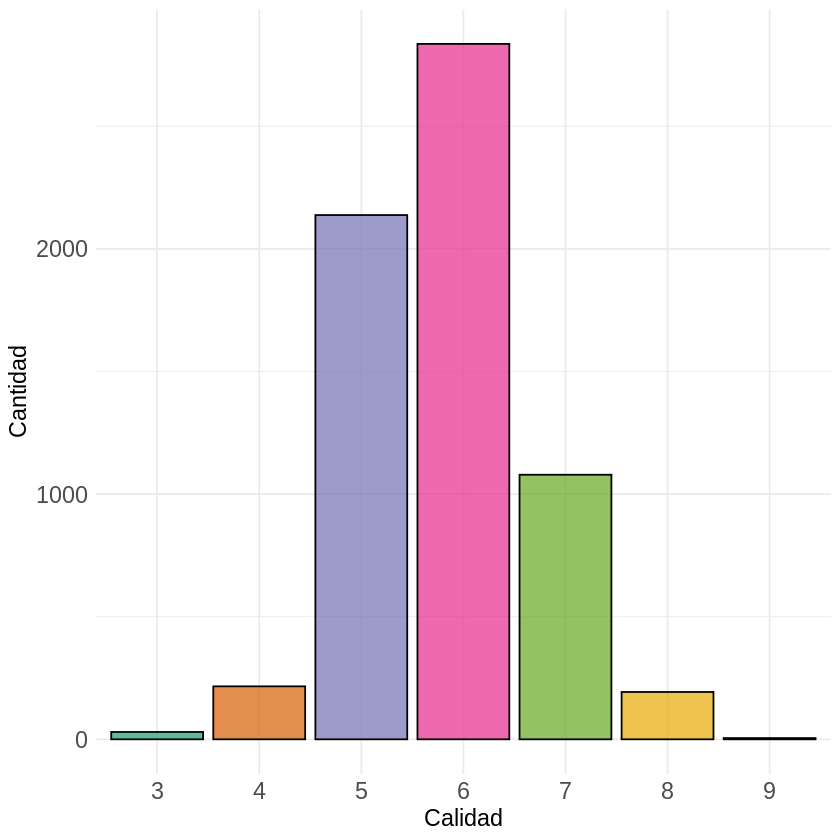

In [ ]:
ggplot(data, aes(x= calidad, fill = calidad)) +
  geom_bar(alpha = 0.7, color = "black") +
  labs(x = "Calidad", y = "Cantidad")+
  scale_fill_brewer(palette = "Dark2")+
  theme_minimal() +
  theme(legend.position = "none", axis.text = element_text(size = 14), axis.title = element_text(size = 14))

Aproximadamente un 93% de los vinos entran en la calidad una calidad media entre 5-7 segun la escala de puntuacion. Ningun vino es de calidad 10 y la calidad mas baja es 3

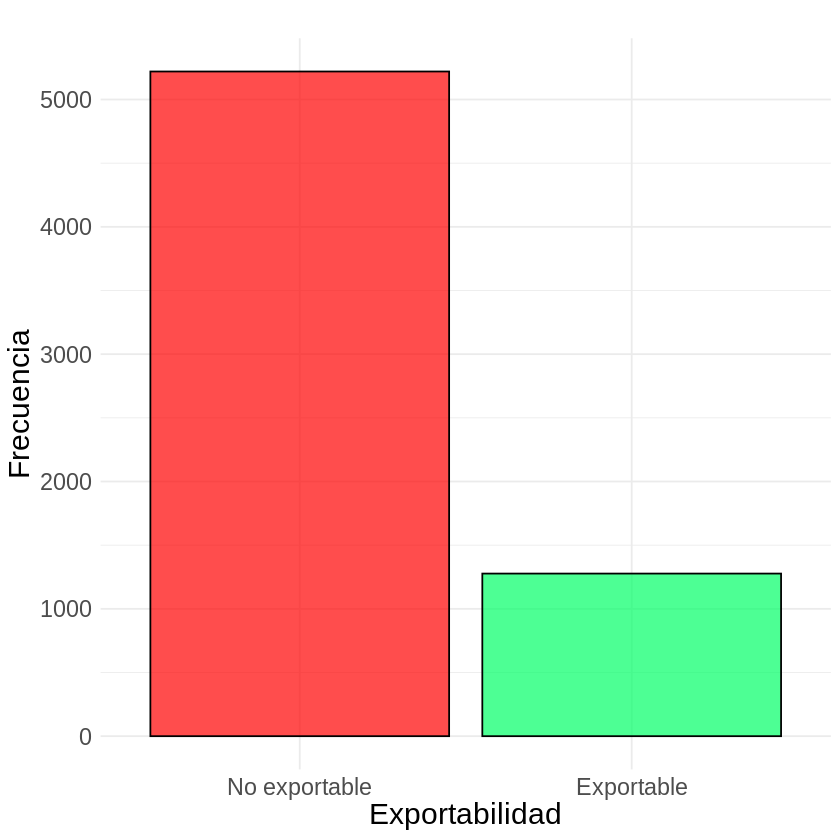

In [ ]:
ggplot(data, aes(x= exportable)) +
  geom_bar(alpha = 0.7, fill = c(colors[1], colors[5]), color = "black") +
  labs(title = "", y="Frecuencia") +
  scale_x_discrete("Exportabilidad", breaks = c("FALSE","TRUE"), labels=c("No exportable","Exportable")) +
  theme_minimal() +
  theme(axis.text = element_text(size = 14), axis.title = element_text(size = 18))

# Análisis exploratorio bivariado

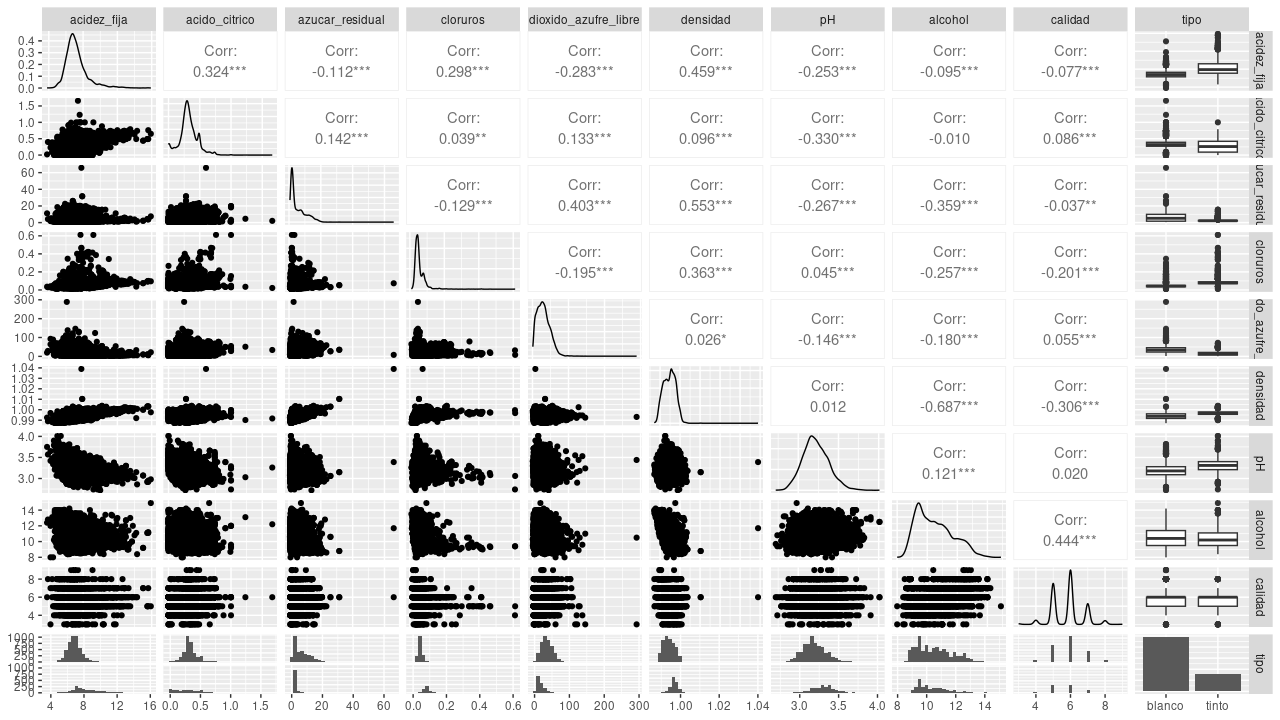

Esto está hecho con la función ggpairs del paquete GGally.

*(Joaco)*

En cuanto a la comparación con la variable "calidad", habíamos discutido la posibilidad de usar la variable auxiliar "exportable" (qué tiene sólo 2 valores distintos) en lugar de la variable original, que tiene 7 valores distintos.

Crucé todas las variables numéricas con la variable "exportable" mediante histogramas. A mi parecer, las diferencias más importantes entre los vinos exportables y los no exportables se ven en las variables "densidad y alcohol". Específicamente:

* Los vinos exportables tienden a tener una **menor densidad** que los vinos no exportables.
* Los vinos exportables tienden a tener un **mayor porcentaje de alcohol** que los vinos no exportables.

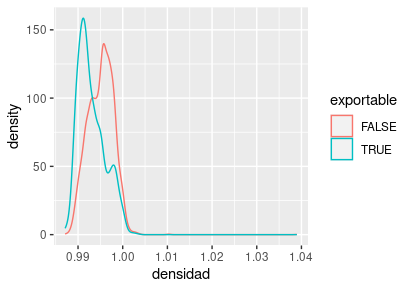

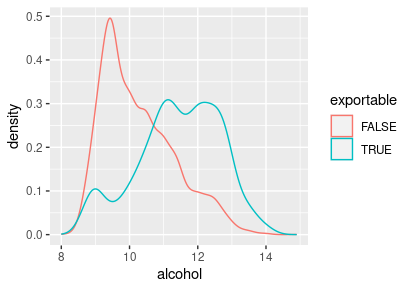

## 3) Proporción vinos exportables

3)Estime la proporción de vinos exportablesen general y tanto para los tintos como para los blancos.


In [ ]:
#BinomCI(1277,6497,conf.level=0.95,method="clopper-pearson")
#BinomCI(217,1599,conf.level=0.95,method="clopper-pearson")
#BinomCI(1060,4898,conf.level=0.95,method="clopper-pearson")

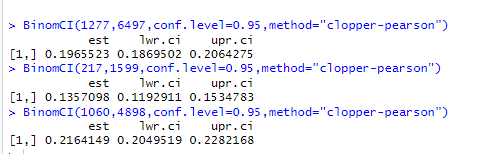

La proporción de vinos exportables es de entre 0.1870 y 0.2064 con una confianza de 95%. Con la misma confianza, la proporción es de entre 0.1193 y 0.1535 para los tintos y de entre 0.2050 y 0.2282 para los blancos.

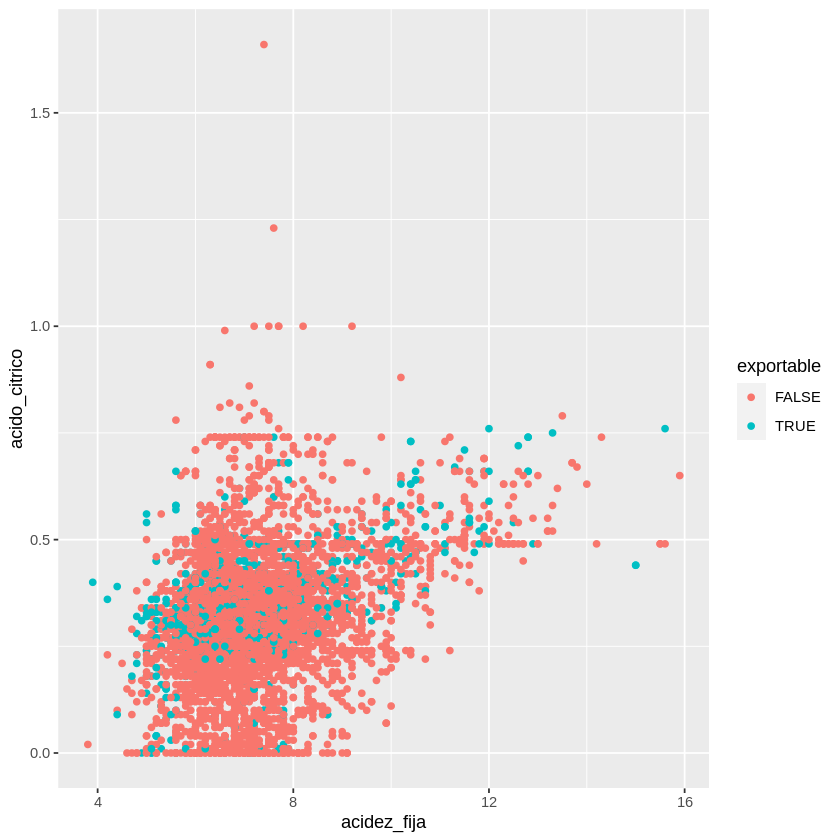

In [ ]:
ggplot(data, aes(x=acidez_fija,y=acido_citrico)) +
  geom_point(aes(color = exportable))

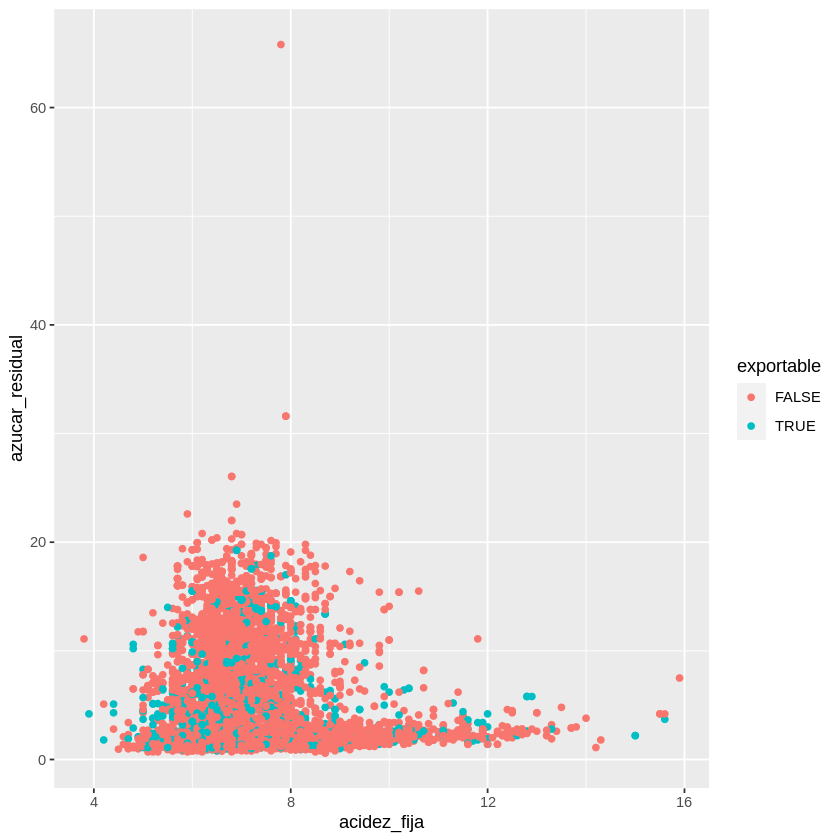

In [ ]:
ggplot(data, aes(x=acidez_fija,y=azucar_residual)) +
  geom_point(aes(color = exportable))

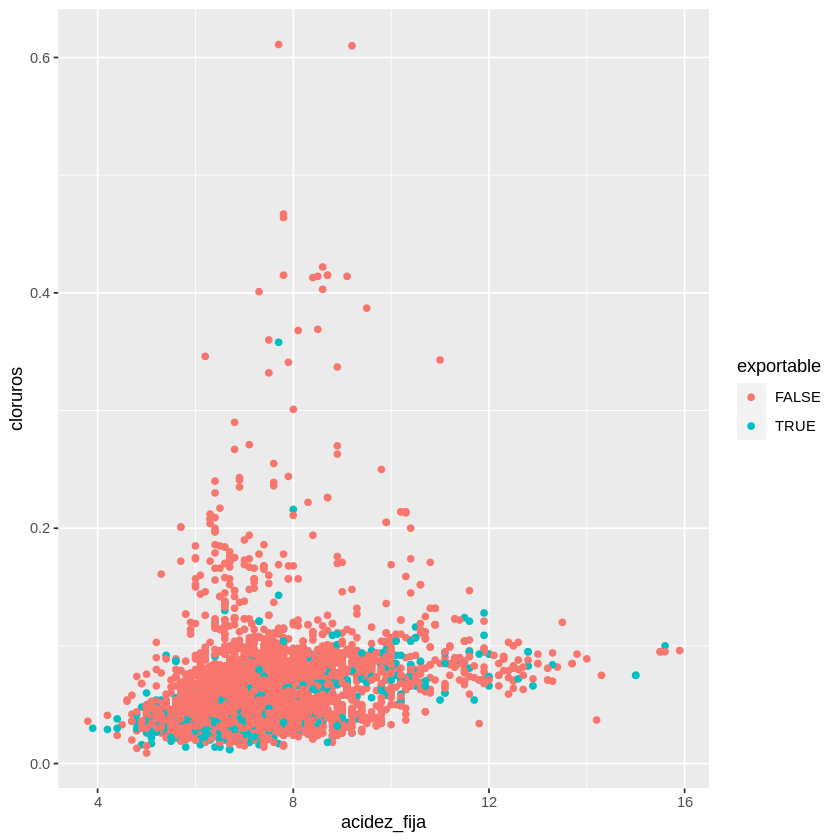

In [ ]:
ggplot(data, aes(x=acidez_fija,y=cloruros)) +
  geom_point(aes(color = exportable))

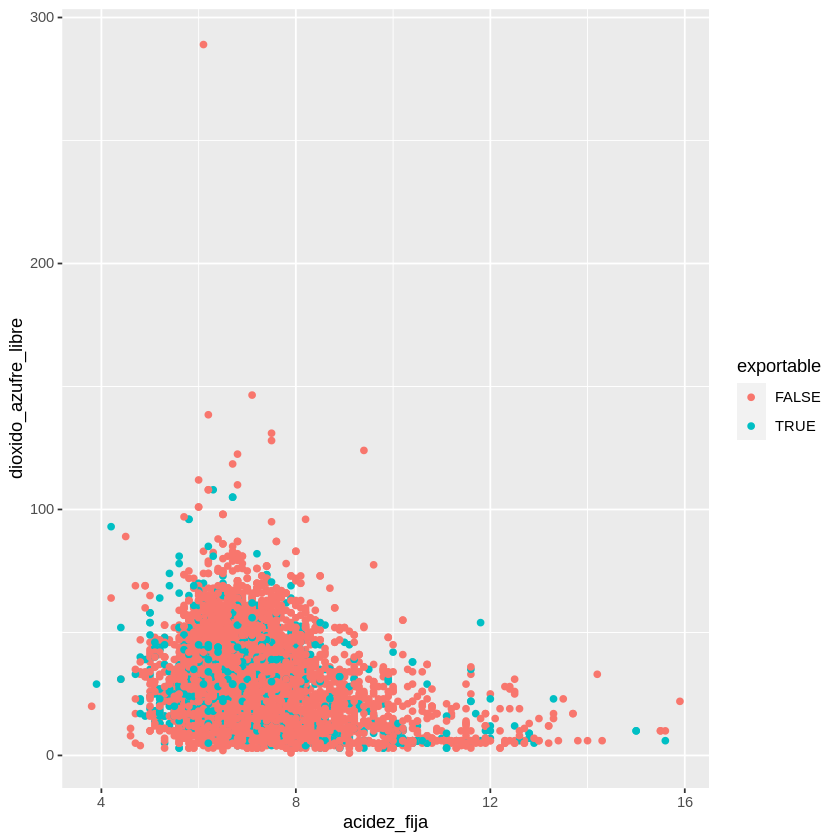

In [ ]:
ggplot(data, aes(x=acidez_fija,y=dioxido_azufre_libre)) +
  geom_point(aes(color = exportable))

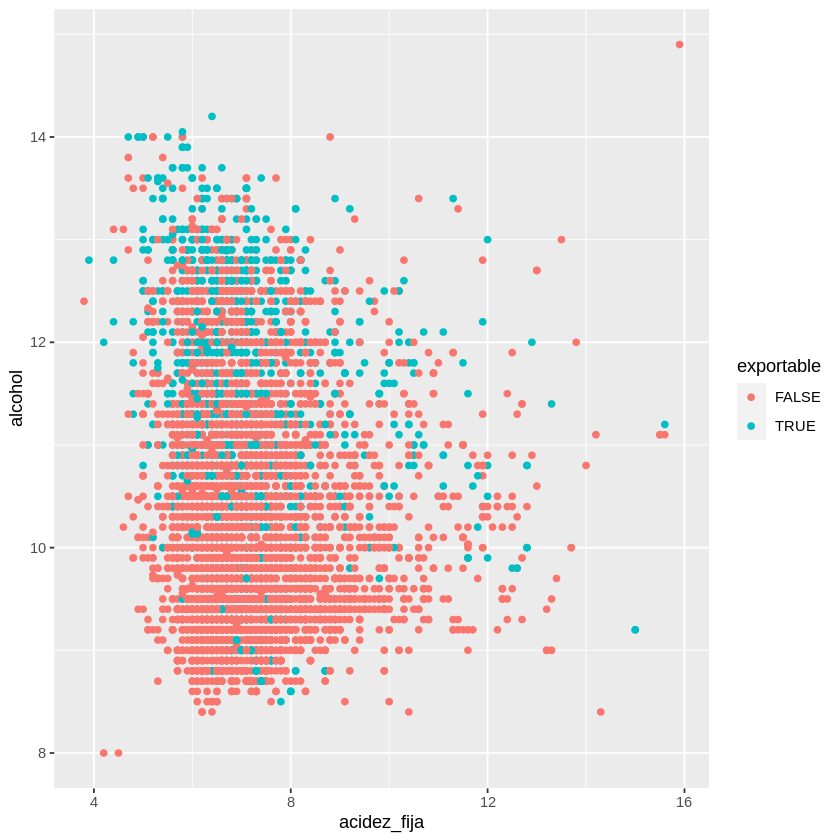

In [ ]:
ggplot(data, aes(x=acidez_fija,y=alcohol)) +
  geom_point(aes(color = exportable))

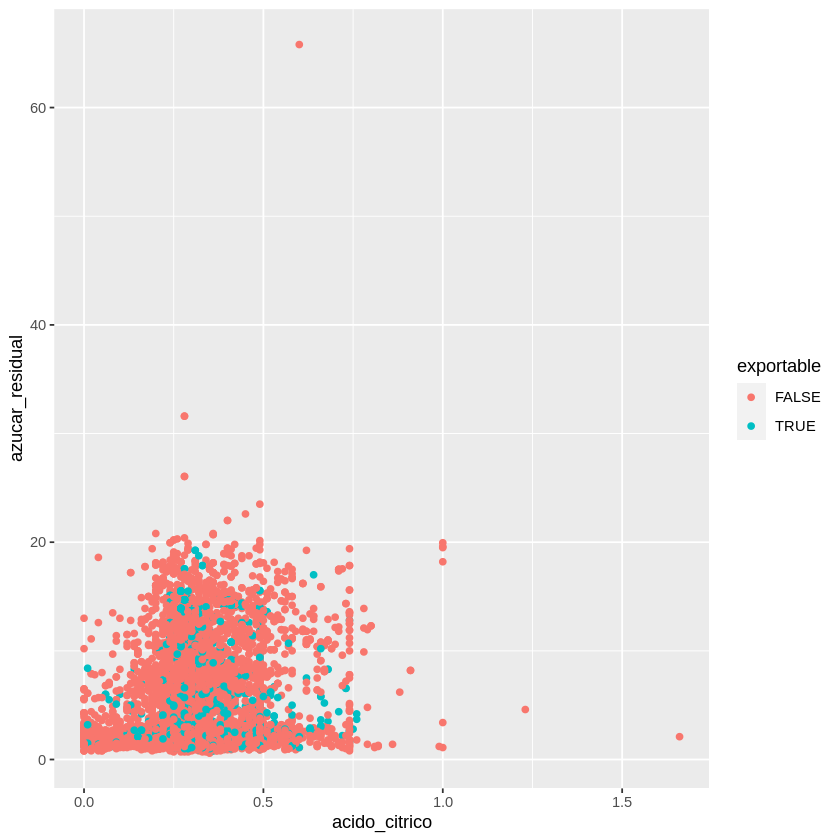

In [ ]:
ggplot(data, aes(x=acido_citrico,y=azucar_residual)) +
  geom_point(aes(color = exportable))

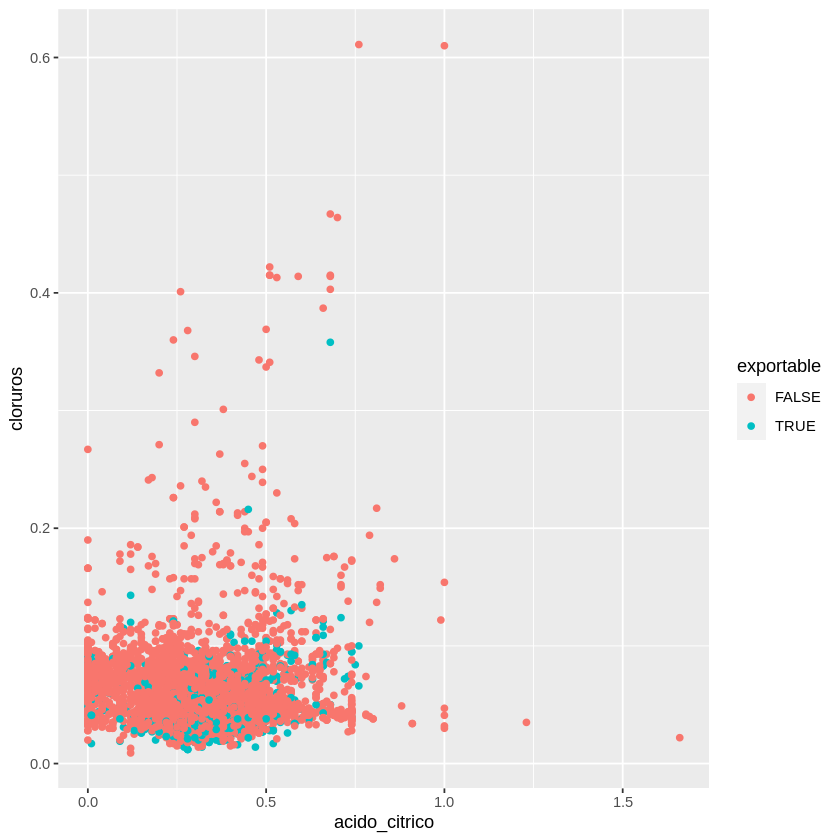

In [ ]:
ggplot(data, aes(x=acido_citrico,y=cloruros)) +
  geom_point(aes(color = exportable))

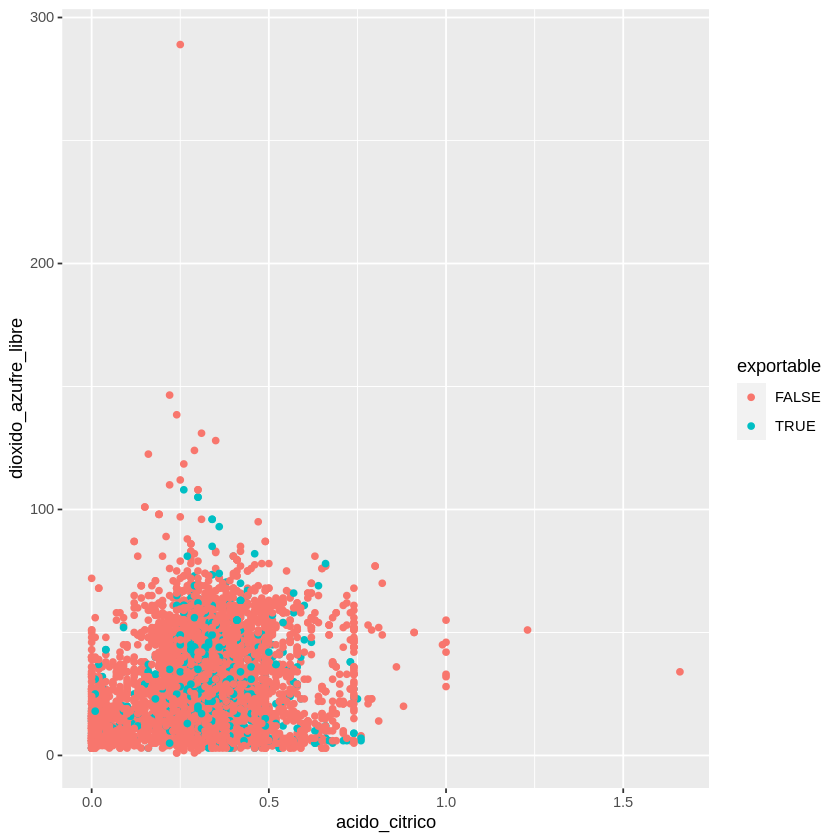

In [ ]:
ggplot(data, aes(x=acido_citrico,y=dioxido_azufre_libre)) +
  geom_point(aes(color = exportable))

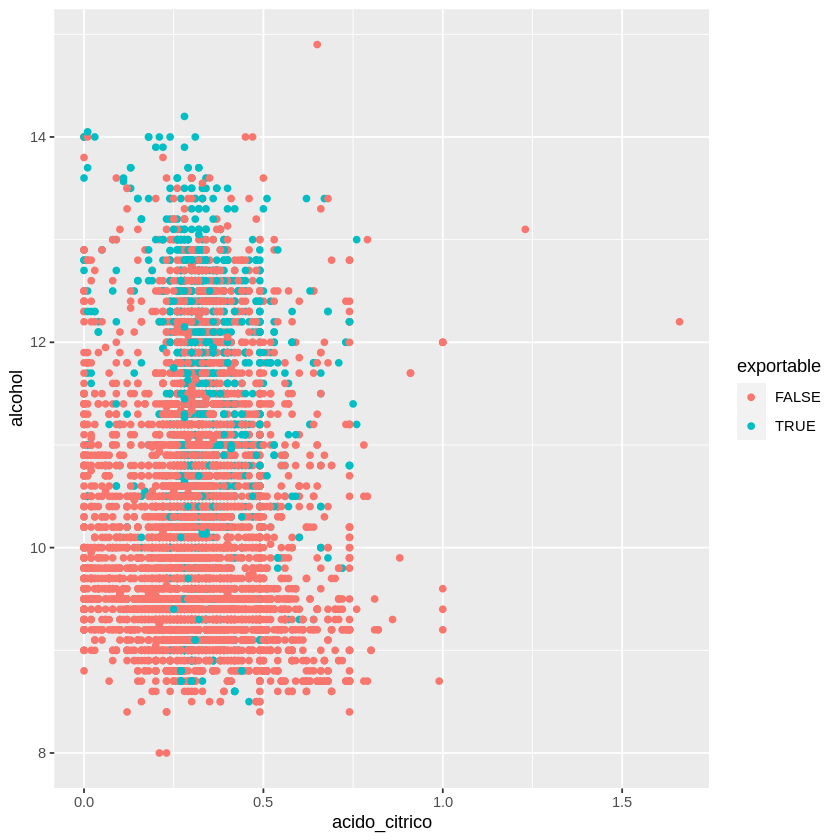

In [ ]:
ggplot(data, aes(x=acido_citrico,y=alcohol)) +
  geom_point(aes(color = exportable))

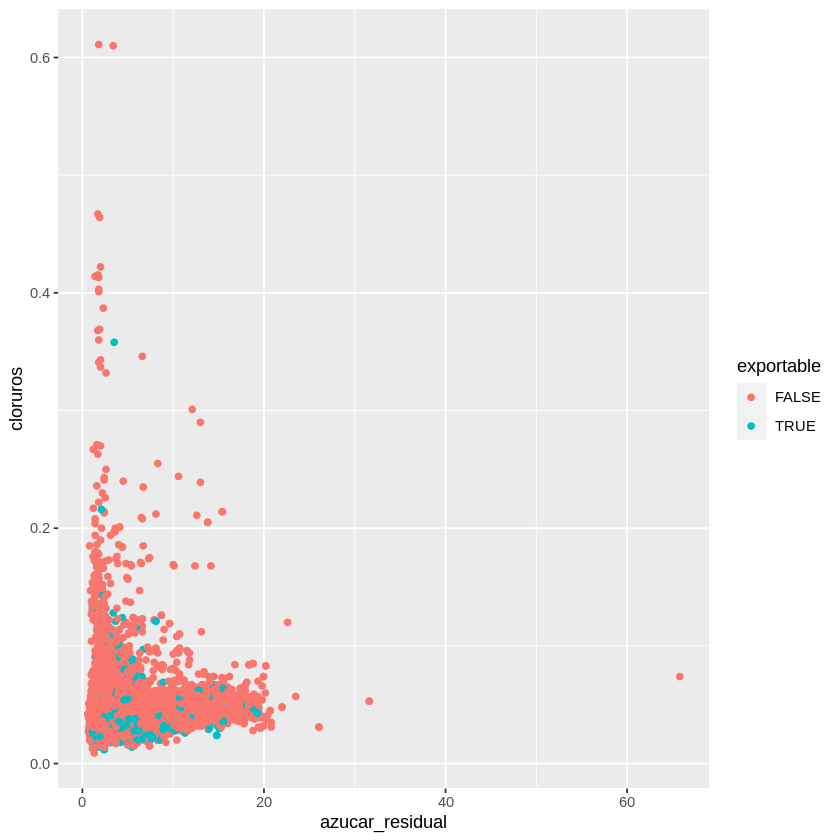

In [ ]:
ggplot(data, aes(x=azucar_residual,y=cloruros)) +
  geom_point(aes(color = exportable))

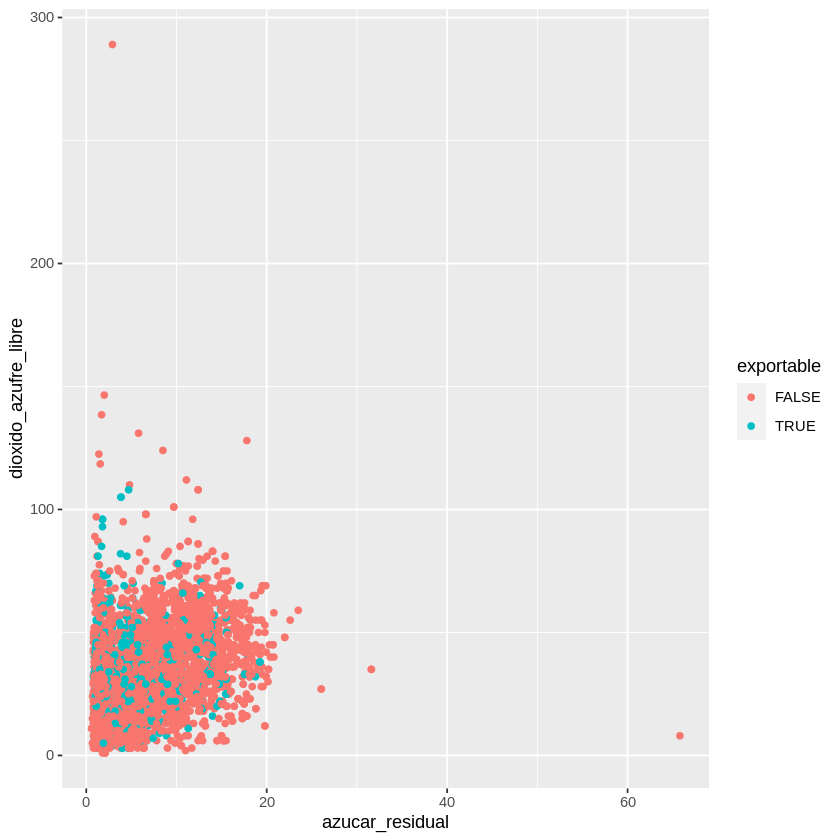

In [ ]:
ggplot(data, aes(x=azucar_residual,y=dioxido_azufre_libre)) +
  geom_point(aes(color = exportable))

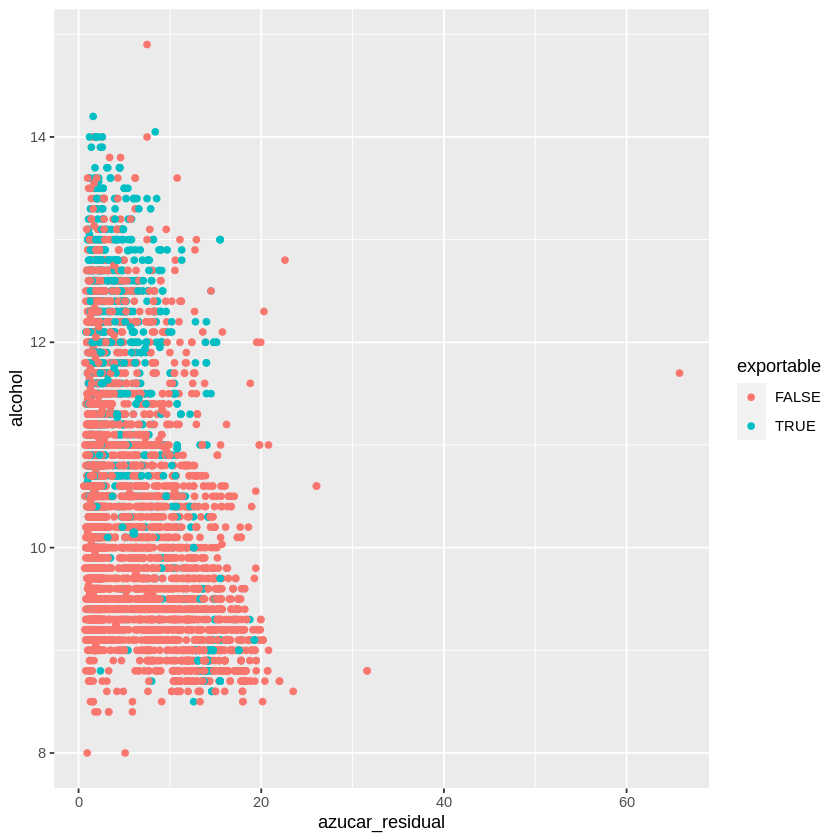

In [ ]:
ggplot(data, aes(x=azucar_residual,y=alcohol)) +
  geom_point(aes(color = exportable))

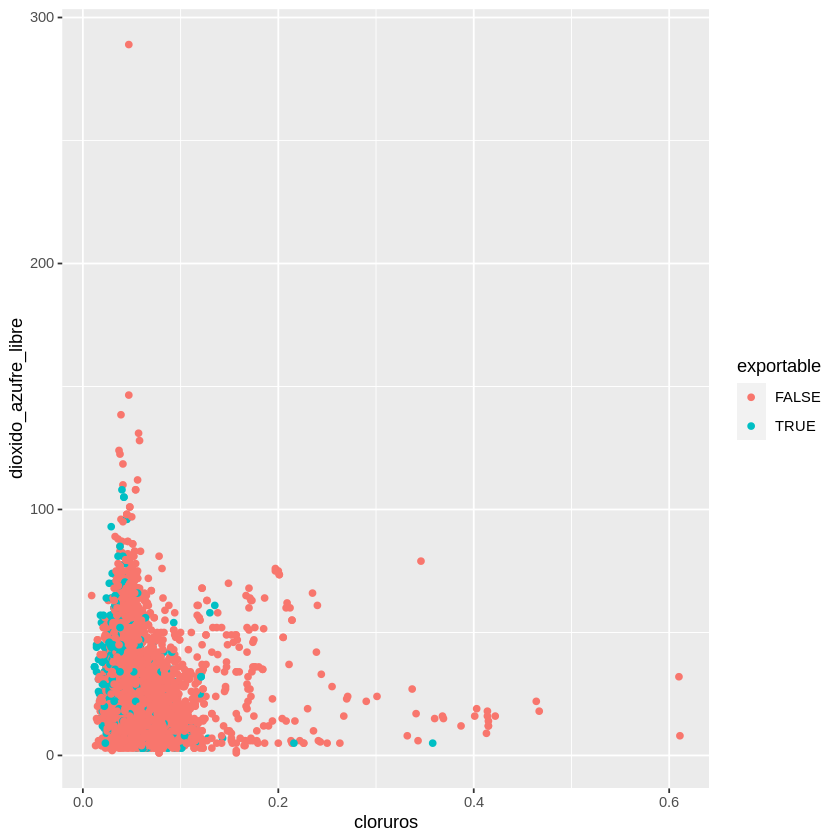

In [ ]:
ggplot(data, aes(x=cloruros,y=dioxido_azufre_libre)) +
  geom_point(aes(color = exportable))

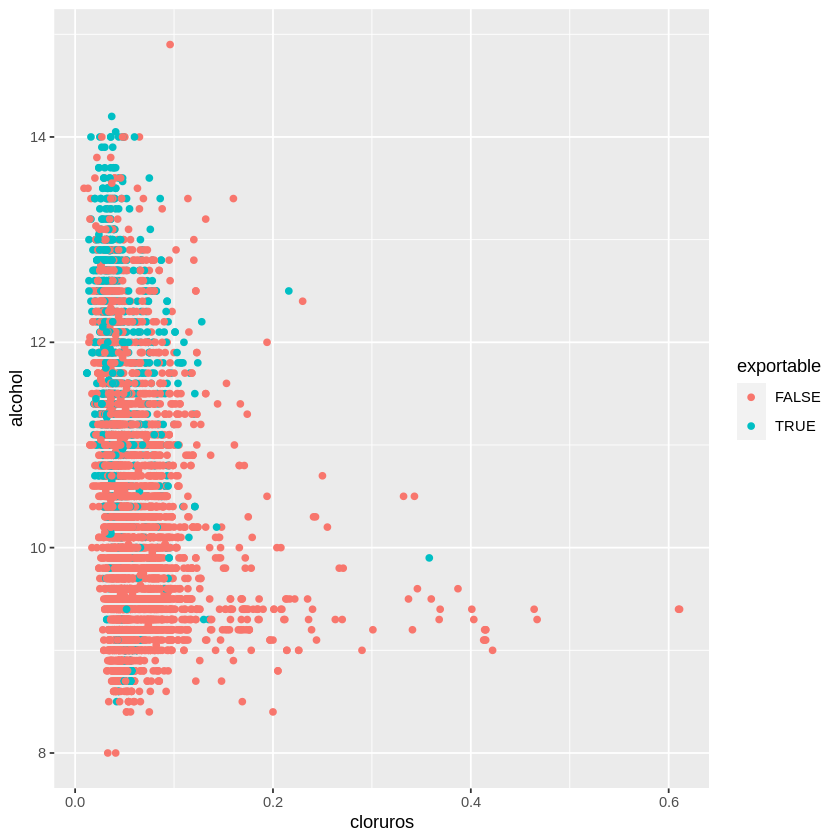

In [ ]:
ggplot(data, aes(x=cloruros,y=alcohol)) +
  geom_point(aes(color = exportable))

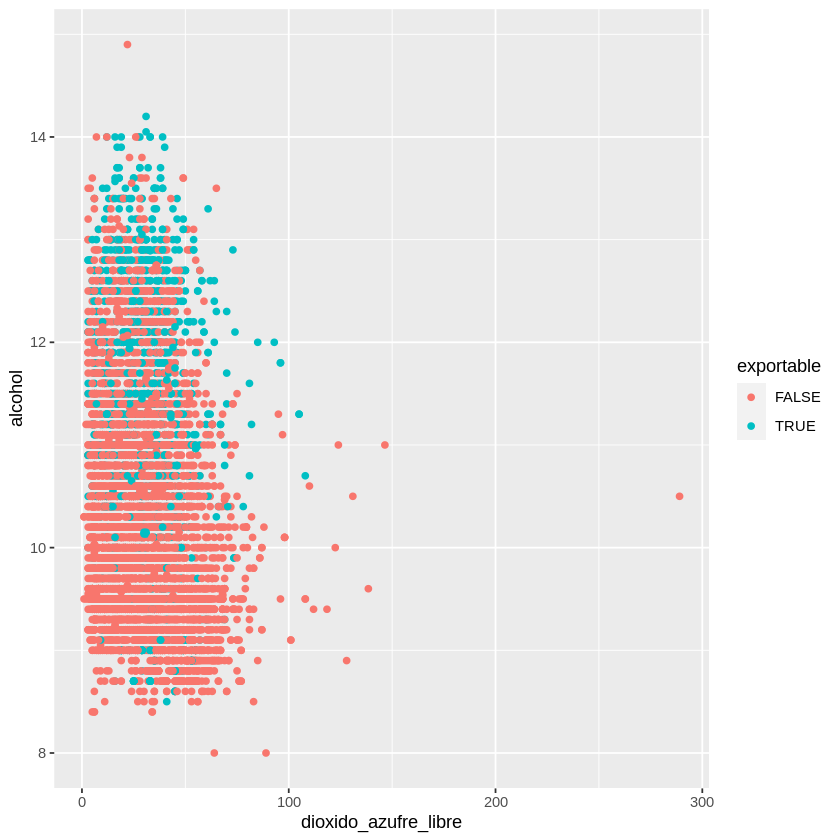

In [ ]:
ggplot(data, aes(x=dioxido_azufre_libre,y=alcohol)) +
  geom_point(aes(color = exportable))

In [ ]:
#data = read.csv(url, sep = ";")
#data=filter(data,tipo=="tinto")
#data=filter(data,tipo=="blanco")
#data$exportable <- data$calidad >=7
#nrow(data)

[1] 6497

In [ ]:
#acidez_fija
#ad.test(data$acidez_fija)

v_acidezFija=var.test(data$acidez_fija~data$exportable,
         null.value=1,
         alternative="two.sided" ,
         conf.level=0.95)

t_acidezFija = t.test(data$acidez_fija~data$exportable,
       mu=0,
       alternative="two.sided",
       paired=FALSE,
       var.equal=TRUE,
       conf.level=0.95)


#acido_citrico
#ad.test(data$acido_citrico)


v_acido_citrico=var.test(data$acido_citrico~data$exportable,
         null.value=1,
         alternative="two.sided" ,
         conf.level=0.95)

t_acido_citrico=t.test(data$acido_citrico~data$exportable,
       mu=0,
       alternative="two.sided",
       paired=FALSE,
       var.equal=TRUE,
       conf.level=0.95)

#azucar_residual
#ad.test(data$azucar_residual)

v_azucar_residual=var.test(data$azucar_residual~data$exportable,
         null.value=1,
         alternative="two.sided" ,
         conf.level=0.95)


t_azucar_residual=t.test(data$azucar_residual~data$exportable,
       mu=0,
       alternative="two.sided",
       paired=FALSE,
       var.equal=TRUE,
       conf.level=0.95)
#cloruros
#ad.test(data$cloruros)


v_cloruros=var.test(data$cloruros~data$exportable,
         null.value=1,
         alternative="two.sided" ,
         conf.level=0.95)


t_cloruros=t.test(data$cloruros~data$exportable,
       mu=0,
       alternative="two.sided",
       paired=FALSE,
       var.equal=TRUE,
       conf.level=0.95)

#dioxido_azufre_libre
#ad.test(data$dioxido_azufre_libre)


v_dioxido_azufre_libre=var.test(data$dioxido_azufre_libre~data$exportable,
         null.value=1,
         alternative="two.sided" ,
         conf.level=0.95)

t_dioxido_azufre_libre=t.test(data$dioxido_azufre_libre~data$exportable,
       mu=0,
       alternative="two.sided",
       paired=FALSE,
       var.equal=FALSE,
       conf.level=0.95)

#densidad
#ad.test(data$densidad)


v_densidad=var.test(data$densidad~data$exportable,
         null.value=1,
         alternative="two.sided" ,
         conf.level=0.95)


t_densidad=t.test(data$densidad~data$exportable,
       mu=0,
       alternative="two.sided",
       paired=FALSE,
       var.equal=TRUE,
       conf.level=0.95)
#pH
#ad.test(data$pH)

v_pH=var.test(data$pH~data$exportable,
         null.value=1,
         alternative="two.sided" ,
         conf.level=0.95)



t_pH=t.test(data$pH~data$exportable,
       mu=0,
       alternative="two.sided",
       paired=FALSE,
       var.equal=TRUE,
       conf.level=0.95)

#alcohol
#ad.test(data$alcohol)


v_alcohol=var.test(data$alcohol~data$exportable,
         null.value=1,
         alternative="two.sided" ,
         conf.level=0.95)


t_alcohol=t.test(data$alcohol~data$exportable,
       mu=0,
       alternative="two.sided",
       paired=FALSE,
       var.equal=TRUE,
       conf.level=0.95)

data2 = data.frame(
  Var = colnames(data[1:8]),
  P_Test_de_med = c(t_acidezFija$p.value,
                    t_acido_citrico$p.value,
                    t_azucar_residual$p.value,
                    t_cloruros$p.value,
                    t_dioxido_azufre_libre$p.value,
                    t_densidad$p.value,
                    t_pH$p.value,
                    t_alcohol$p.value),
  P_Test_de_var = c(v_acidezFija$p.value,
                    v_acido_citrico$p.value,
                    v_azucar_residual$p.value,
                    v_cloruros$p.value,
                    v_dioxido_azufre_libre$p.value,
                    v_densidad$p.value,
                    v_pH$p.value,
                    v_alcohol$p.value)
)

data2$P_Test_de_var <- sprintf("%.2f",data2$P_Test_de_var)
data2$P_Test_de_med <- sprintf("%.2f",data2$P_Test_de_med)
print(data2)

                   Var P_Test_de_med P_Test_de_var
1          acidez_fija          0.00          0.04
2        acido_citrico          0.00          0.00
3      azucar_residual          0.00          0.00
4             cloruros          0.00          0.00
5 dioxido_azufre_libre          0.19          0.00
6             densidad          0.00          0.01
7                   pH          0.02          0.57
8              alcohol          0.00          0.00


In [ ]:
chisq.test(data$exportable, data$acidez_fija)

Warning message in chisq.test(data$exportable, data$acidez_fija):
“Chi-squared approximation may be incorrect”



	Pearson's Chi-squared test

data:  data$exportable and data$acidez_fija
X-squared = 224.07, df = 105, p-value = 1.258e-10


In [ ]:
chisq.test(data$exportable, data$acidez_fija)

Warning message in chisq.test(data$exportable, data$acidez_fija):
“Chi-squared approximation may be incorrect”



	Pearson's Chi-squared test

data:  data$exportable and data$acidez_fija
X-squared = 224.07, df = 105, p-value = 1.258e-10


In [ ]:
chisq.test(data$exportable, data$acido_citrico)

Warning message in chisq.test(data$exportable, data$acido_citrico):
“Chi-squared approximation may be incorrect”



	Pearson's Chi-squared test

data:  data$exportable and data$acido_citrico
X-squared = 366.95, df = 88, p-value < 2.2e-16


In [ ]:
chisq.test(data$exportable, data$azucar_residual)

Warning message in chisq.test(data$exportable, data$azucar_residual):
“Chi-squared approximation may be incorrect”



	Pearson's Chi-squared test

data:  data$exportable and data$azucar_residual
X-squared = 709.9, df = 315, p-value < 2.2e-16


In [ ]:
chisq.test(data$exportable, data$cloruros)

Warning message in chisq.test(data$exportable, data$cloruros):
“Chi-squared approximation may be incorrect”



	Pearson's Chi-squared test

data:  data$exportable and data$cloruros
X-squared = 670.71, df = 213, p-value < 2.2e-16


In [ ]:
chisq.test(data$exportable, data$dioxido_azufre_libre)

Warning message in chisq.test(data$exportable, data$dioxido_azufre_libre):
“Chi-squared approximation may be incorrect”



	Pearson's Chi-squared test

data:  data$exportable and data$dioxido_azufre_libre
X-squared = 297.13, df = 134, p-value = 2.194e-14


In [ ]:
chisq.test(data$exportable, data$alcohol)

Warning message in chisq.test(data$exportable, data$alcohol):
“Chi-squared approximation may be incorrect”



	Pearson's Chi-squared test

data:  data$exportable and data$alcohol
X-squared = 1284, df = 111, p-value < 2.2e-16


In [ ]:
chisq.test(data$exportable, data$pH)

Warning message in chisq.test(data$exportable, data$pH):
“Chi-squared approximation may be incorrect”



	Pearson's Chi-squared test

data:  data$exportable and data$pH
X-squared = 178.1, df = 107, p-value = 1.931e-05


In [ ]:
chisq.test(data$exportable, data$densidad)

Warning message in chisq.test(data$exportable, data$densidad):
“Chi-squared approximation may be incorrect”



	Pearson's Chi-squared test

data:  data$exportable and data$densidad
X-squared = 2063.6, df = 997, p-value < 2.2e-16


#Relaciones con Densidad del Vino

Calcule una medida de la relación entre las variables cuantitativas y la densidad del  vino. ¿Qué características del vino están más relacionadas con su densidad

In [ ]:
summary(data)


  acidez_fija     acido_citrico    azucar_residual     cloruros      
 Min.   : 3.800   Min.   :0.0000   Min.   : 0.600   Min.   :0.00900  
 1st Qu.: 6.400   1st Qu.:0.2500   1st Qu.: 1.800   1st Qu.:0.03800  
 Median : 7.000   Median :0.3100   Median : 3.000   Median :0.04700  
 Mean   : 7.215   Mean   :0.3186   Mean   : 5.443   Mean   :0.05603  
 3rd Qu.: 7.700   3rd Qu.:0.3900   3rd Qu.: 8.100   3rd Qu.:0.06500  
 Max.   :15.900   Max.   :1.6600   Max.   :65.800   Max.   :0.61100  
 dioxido_azufre_libre    densidad            pH           alcohol     
 Min.   :  1.00       Min.   :0.9871   Min.   :2.720   Min.   : 8.00  
 1st Qu.: 17.00       1st Qu.:0.9923   1st Qu.:3.110   1st Qu.: 9.50  
 Median : 29.00       Median :0.9949   Median :3.210   Median :10.30  
 Mean   : 30.53       Mean   :0.9947   Mean   :3.219   Mean   :10.49  
 3rd Qu.: 41.00       3rd Qu.:0.9970   3rd Qu.:3.320   3rd Qu.:11.30  
 Max.   :289.00       Max.   :1.0390   Max.   :4.010   Max.   :14.90  
    calidad  

###Prueba de normalidad para densidad

h0 Densidad tiene distribucion normal
h1 No tiene distribucion normal.

In [ ]:
install.packages('nortest')
library(nortest)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



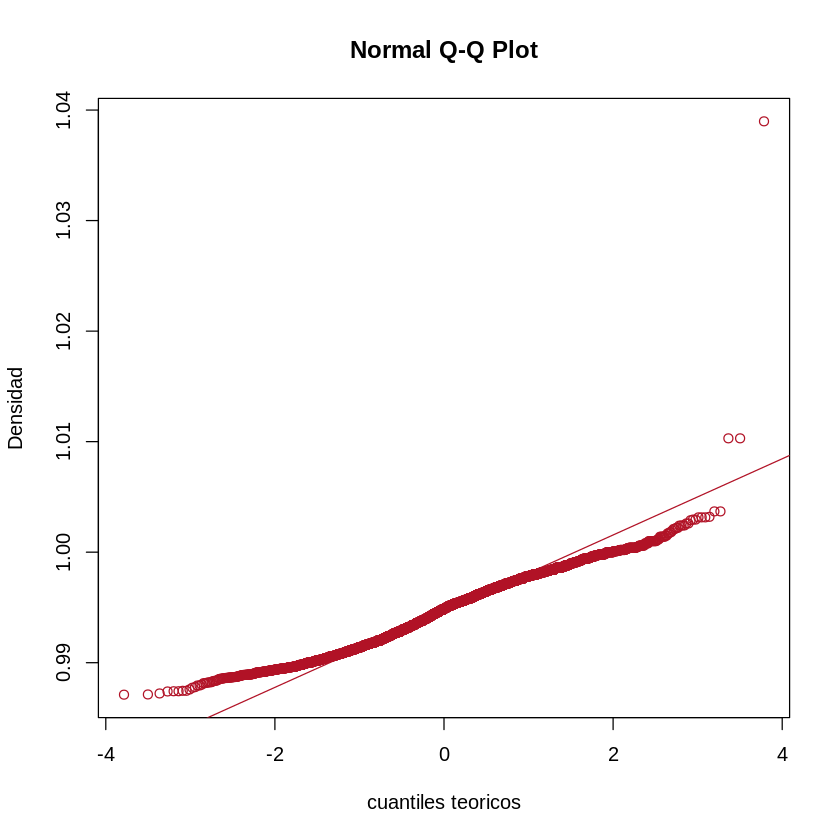

In [ ]:
qqnorm(data$densidad, col="#b11226", ylab = "Densidad", xlab="cuantiles teoricos" )
qqline(data$densidad, col="#b11226")

In [ ]:
ad.test(data$densidad)



	Anderson-Darling normality test

data:  data$densidad
A = 22.366, p-value < 2.2e-16


rechazamos h0 p_value<0.05

In [ ]:

ad.test(subset(data,exportable==FALSE)$densidad)


	Anderson-Darling normality test

data:  subset(data, exportable == FALSE)$densidad
A = 13.459, p-value < 2.2e-16


In [ ]:

ad.test(subset(data,exportable==TRUE)$densidad)


	Anderson-Darling normality test

data:  subset(data, exportable == TRUE)$densidad
A = 23.082, p-value < 2.2e-16


### Covarianza respecto de otras numericas

In [ ]:
install.packages('GGally')
library(GGally)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘Rcpp’, ‘plyr’, ‘reshape’


Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2



Warning message in cor.test.default(x, y, method = method, use = use):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(x, y, method = method, use = use):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(x, y, method = method, use = use):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(x, y, method = method, use = use):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(x, y, method = method, use = use):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(x, y, method = method, use = use):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(x, y, method = method, use = use):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(x, y, method = method, use = use):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(x, y, method = method, use = use):
“Cannot compute exact p-value wit

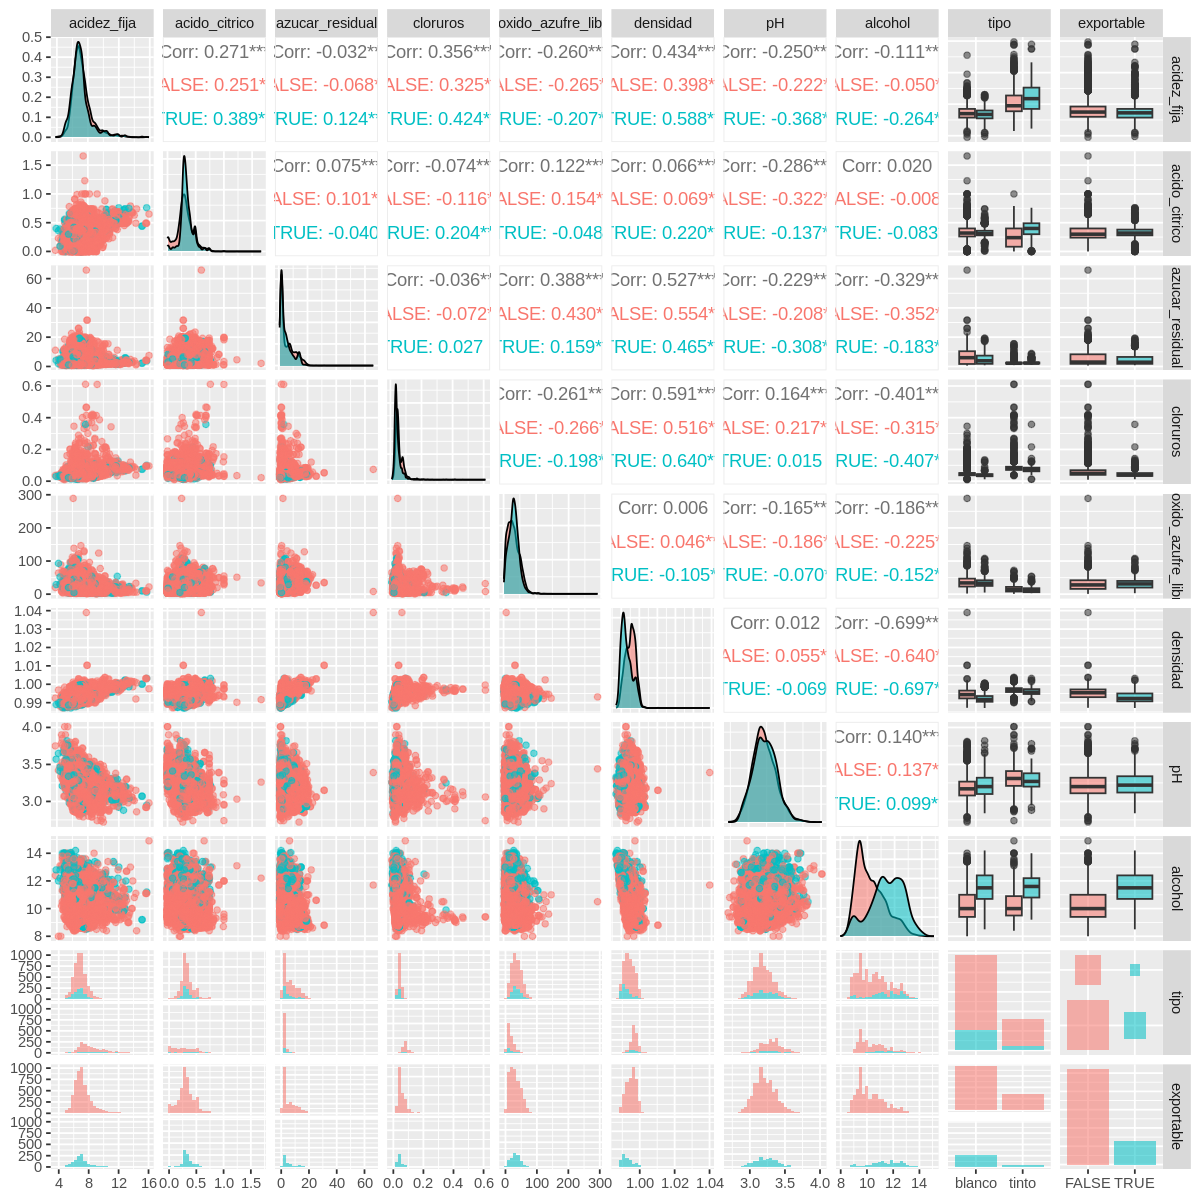

In [ ]:
datax<-select(data,-calidad)
ggpairs(datax, aes(color = exportable,    alpha = 0.05), upper = list(continuous = wrap("cor", method = "spearman")) )

Warning message in cor.test.default(x, y, method = method, use = use):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(x, y, method = method, use = use):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(x, y, method = method, use = use):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(x, y, method = method, use = use):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(x, y, method = method, use = use):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(x, y, method = method, use = use):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(x, y, method = method, use = use):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(x, y, method = method, use = use):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(x, y, method = method, use = use):
“Cannot compute exact p-value wit

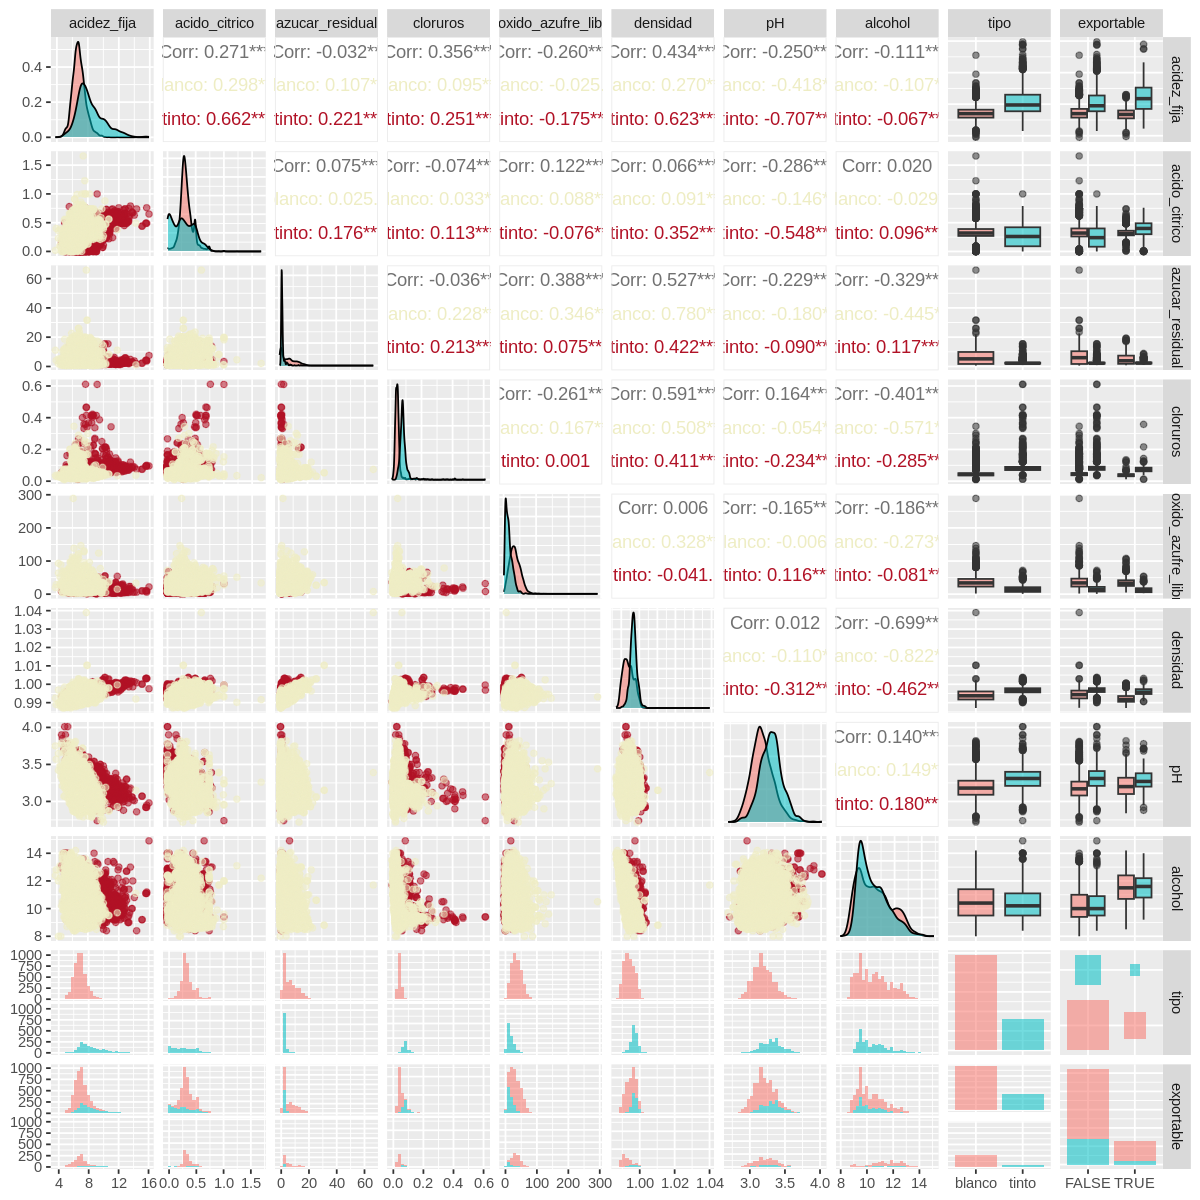

In [ ]:

ggpairs(datax, aes(color = tipo,    alpha = 0.05), upper = list(continuous = wrap("cor", method = "spearman")))+
  scale_color_manual(values=c("#EEEDC4", "#b11226"))

In [ ]:
cor(data[ , c(0:8)])

acidez_fija acido_citrico azucar_residual cloruros   
acidez_fija           1.00000000  0.32443573   -0.1119813       0.29819477
acido_citrico         0.32443573  1.00000000    0.1424512       0.03899801
azucar_residual      -0.11198128  0.14245123    1.0000000      -0.12894050
cloruros              0.29819477  0.03899801   -0.1289405       1.00000000
dioxido_azufre_libre -0.28273543  0.13312581    0.4028706      -0.19504479
densidad              0.45890998  0.09615393    0.5525170       0.36261466
pH                   -0.25270047 -0.32980819   -0.2673198       0.04470798
alcohol              -0.09545152 -0.01049349   -0.3594148      -0.25691558
                     dioxido_azufre_libre densidad    pH          alcohol    
acidez_fija          -0.28273543           0.45890998 -0.25270047 -0.09545152
acido_citrico         0.13312581           0.09615393 -0.32980819 -0.01049349
azucar_residual       0.40287064           0.55251695 -0.26731984 -0.35941477
cloruros             -0.19504479           0.36261466  0.04470798 -0.25691558
dioxido_azufre_libre  1.00000000           0.02571684 -0.14585390 -0.17983843
densidad              0.02571684           1.00000000  0.01168608 -0.68674542
pH                   -0.14585390           0.01168608  1.00000000  0.12124847
alcohol              -0.17983843          -0.68674542  0.12124847  1.00000000

In [ ]:
cor(data[ , c(0:8)], method="spearman")

acidez_fija acido_citrico azucar_residual cloruros   
acidez_fija           1.0000000   0.27056792   -0.03225370      0.35600103
acido_citrico         0.2705679   1.00000000    0.07491959     -0.07409626
azucar_residual      -0.0322537   0.07491959    1.00000000     -0.03588694
cloruros              0.3560010  -0.07409626   -0.03588694      1.00000000
dioxido_azufre_libre -0.2599142   0.12205750    0.38774959     -0.26053492
densidad              0.4340578   0.06569206    0.52665553      0.59073152
pH                   -0.2500440  -0.28590510   -0.22934417      0.16361888
alcohol              -0.1106502   0.01965302   -0.32921786     -0.40114958
                     dioxido_azufre_libre densidad    pH          alcohol    
acidez_fija          -0.2599142            0.43405781 -0.25004403 -0.11065022
acido_citrico         0.1220575            0.06569206 -0.28590510  0.01965302
azucar_residual       0.3877496            0.52665553 -0.22934417 -0.32921786
cloruros             -0.2605349            0.59073152  0.16361888 -0.40114958
dioxido_azufre_libre  1.0000000            0.00583390 -0.16469915 -0.18604649
densidad              0.0058339            1.00000000  0.01178159 -0.69943884
pH                   -0.1646992            0.01178159  1.00000000  0.14022487
alcohol              -0.1860465           -0.69943884  0.14022487  1.00000000

In [ ]:
cor(data[!data$exportable , c(0:8)] , method="spearman")

acidez_fija acido_citrico azucar_residual cloruros   
acidez_fija           1.00000000  0.251155359  -0.06823622      0.32512345
acido_citrico         0.25115536  1.000000000   0.10095454     -0.11624691
azucar_residual      -0.06823622  0.100954536   1.00000000     -0.07160638
cloruros              0.32512345 -0.116246905  -0.07160638      1.00000000
dioxido_azufre_libre -0.26496583  0.153647228   0.43030555     -0.26618805
densidad              0.39769367  0.068623923   0.55362780      0.51636602
pH                   -0.22185070 -0.321542119  -0.20829918      0.21688990
alcohol              -0.05043824 -0.008419657  -0.35246728     -0.31495545
                     dioxido_azufre_libre densidad    pH          alcohol     
acidez_fija          -0.26496583           0.39769367 -0.22185070 -0.050438238
acido_citrico         0.15364723           0.06862392 -0.32154212 -0.008419657
azucar_residual       0.43030555           0.55362780 -0.20829918 -0.352467283
cloruros             -0.26618805           0.51636602  0.21688990 -0.314955450
dioxido_azufre_libre  1.00000000           0.04567501 -0.18552053 -0.224888004
densidad              0.04567501           1.00000000  0.05539571 -0.640076766
pH                   -0.18552053           0.05539571  1.00000000  0.136896614
alcohol              -0.22488800          -0.64007677  0.13689661  1.000000000

In [ ]:
cor(data[data$exportable , c(0:8)] , method="spearman")

acidez_fija acido_citrico azucar_residual cloruros   
acidez_fija           1.0000000   0.38859526    0.12408013      0.42444213
acido_citrico         0.3885953   1.00000000   -0.04047772      0.20431677
azucar_residual       0.1240801  -0.04047772    1.00000000      0.02730590
cloruros              0.4244421   0.20431677    0.02730590      1.00000000
dioxido_azufre_libre -0.2073657  -0.04830252    0.15896706     -0.19782764
densidad              0.5875491   0.21974446    0.46530983      0.63963351
pH                   -0.3683446  -0.13716938   -0.30798331      0.01490001
alcohol              -0.2643163  -0.08308539   -0.18272878     -0.40707040
                     dioxido_azufre_libre densidad    pH          alcohol    
acidez_fija          -0.20736566           0.58754911 -0.36834460 -0.26431634
acido_citrico        -0.04830252           0.21974446 -0.13716938 -0.08308539
azucar_residual       0.15896706           0.46530983 -0.30798331 -0.18272878
cloruros             -0.19782764           0.63963351  0.01490001 -0.40707040
dioxido_azufre_libre  1.00000000          -0.10451683 -0.07030246 -0.15155787
densidad             -0.10451683           1.00000000 -0.06948951 -0.69716922
pH                   -0.07030246          -0.06948951  1.00000000  0.09927918
alcohol              -0.15155787          -0.69716922  0.09927918  1.00000000

In [ ]:
cor(data[data$tipo=='blanco' , c(0:8)] , method="spearman")

acidez_fija acido_citrico azucar_residual cloruros   
acidez_fija           1.00000000  0.29787793    0.10672494      0.09469118
acido_citrico         0.29787793  1.00000000    0.02462098      0.03265950
azucar_residual       0.10672494  0.02462098    1.00000000      0.22784390
cloruros              0.09469118  0.03265950    0.22784390      1.00000000
dioxido_azufre_libre -0.02454223  0.08831406    0.34610674      0.16704550
densidad              0.27003091  0.09142519    0.78036485      0.50830177
pH                   -0.41834116 -0.14619267   -0.18002822     -0.05400647
alcohol              -0.10682740 -0.02916996   -0.44525743     -0.57080641
                     dioxido_azufre_libre densidad    pH           alcohol    
acidez_fija          -0.024542230          0.27003091 -0.418341158 -0.10682740
acido_citrico         0.088314056          0.09142519 -0.146192675 -0.02916996
azucar_residual       0.346106737          0.78036485 -0.180028223 -0.44525743
cloruros              0.167045505          0.50830177 -0.054006467 -0.57080641
dioxido_azufre_libre  1.000000000          0.32782180 -0.006273578 -0.27256934
densidad              0.327821798          1.00000000 -0.110060852 -0.82185508
pH                   -0.006273578         -0.11006085  1.000000000  0.14885725
alcohol              -0.272569338         -0.82185508  0.148857249  1.00000000

In [ ]:
cor(data[data$tipo=='tinto' , c(0:8)] , method="spearman")


acidez_fija acido_citrico azucar_residual cloruros     
acidez_fija           1.00000000  0.66170842    0.22070086      0.2509041064
acido_citrico         0.66170842  1.00000000    0.17641731      0.1125765077
azucar_residual       0.22070086  0.17641731    1.00000000      0.2129592419
cloruros              0.25090411  0.11257651    0.21295924      1.0000000000
dioxido_azufre_libre -0.17513656 -0.07645158    0.07461786      0.0008051686
densidad              0.62307076  0.35228526    0.42226586      0.4113896972
pH                   -0.70667359 -0.54802628   -0.08997095     -0.2343612736
alcohol              -0.06657566  0.09645554    0.11654813     -0.2845039422
                     dioxido_azufre_libre densidad    pH          alcohol    
acidez_fija          -0.1751365613         0.62307076 -0.70667359 -0.06657566
acido_citrico        -0.0764515753         0.35228526 -0.54802628  0.09645554
azucar_residual       0.0746178640         0.42226586 -0.08997095  0.11654813
cloruros              0.0008051686         0.41138970 -0.23436127 -0.28450394
dioxido_azufre_libre  1.0000000000        -0.04117768  0.11567918 -0.08136731
densidad             -0.0411776800         1.00000000 -0.31205508 -0.46244458
pH                    0.1156791779        -0.31205508  1.00000000  0.17993243
alcohol              -0.0813673063        -0.46244458  0.17993243  1.00000000

hay mayor correlacion entre densidad y acidez_fija en vinos exportables tintos

### Densidad y acidez fija

Warning message:
“Removed 6497 rows containing missing values (`geom_point()`).”


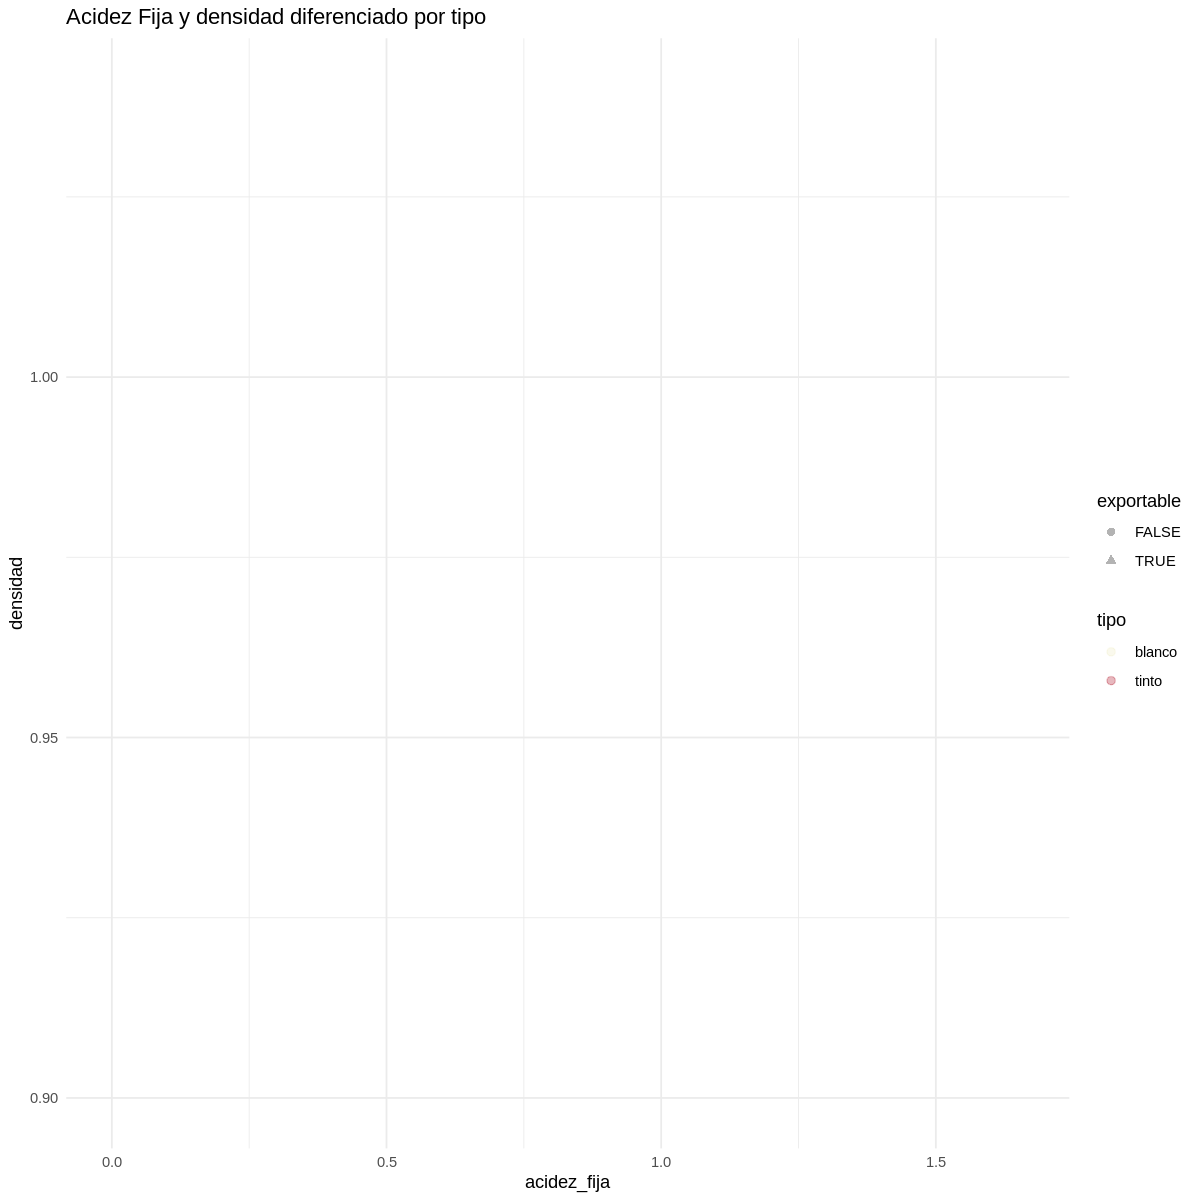

In [ ]:
options(repr.plot.width=10, repr.plot.height=10)
gd_11<-ggplot(data, aes(x=acidez_fija,y=densidad) ) +
  geom_point(aes(color = tipo, shape=exportable), size=2, alpha = 0.3) +
  scale_color_manual(values=c("#EEEDC4", "#b11226"))+
  labs(title="Acidez Fija y densidad diferenciado por tipo")+
  xlim(3.8, 15.9)+
  ylim(0.9, 1.04)+
  theme_minimal()

gd_11

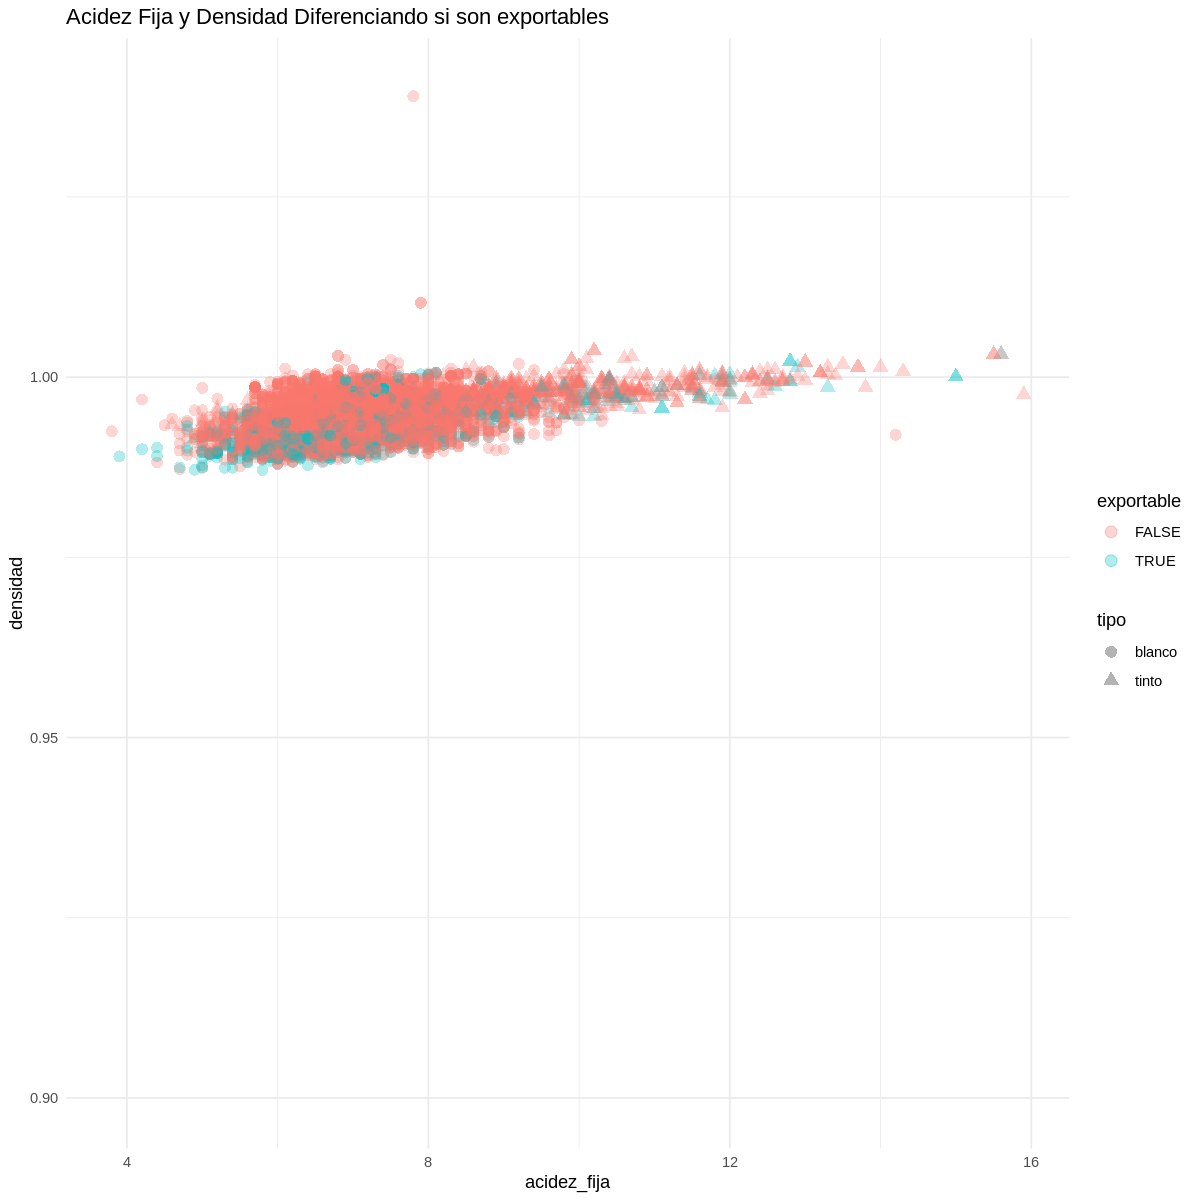

In [ ]:
options(repr.plot.width=10, repr.plot.height=10)
gd_12 <- ggplot(data, aes(x=acidez_fija,y=densidad) ) +
  geom_point(aes(color = exportable, shape=tipo), size=3, alpha = 0.3) +
  #escale_color_manual(values=c("#EEEDC4", "#b11226"))+
  labs(title="Acidez Fija y Densidad Diferenciando si son exportables")+
  xlim(3.8, 15.9)+
  ylim(0.9, 1.04)+
  theme_minimal()
gd_12

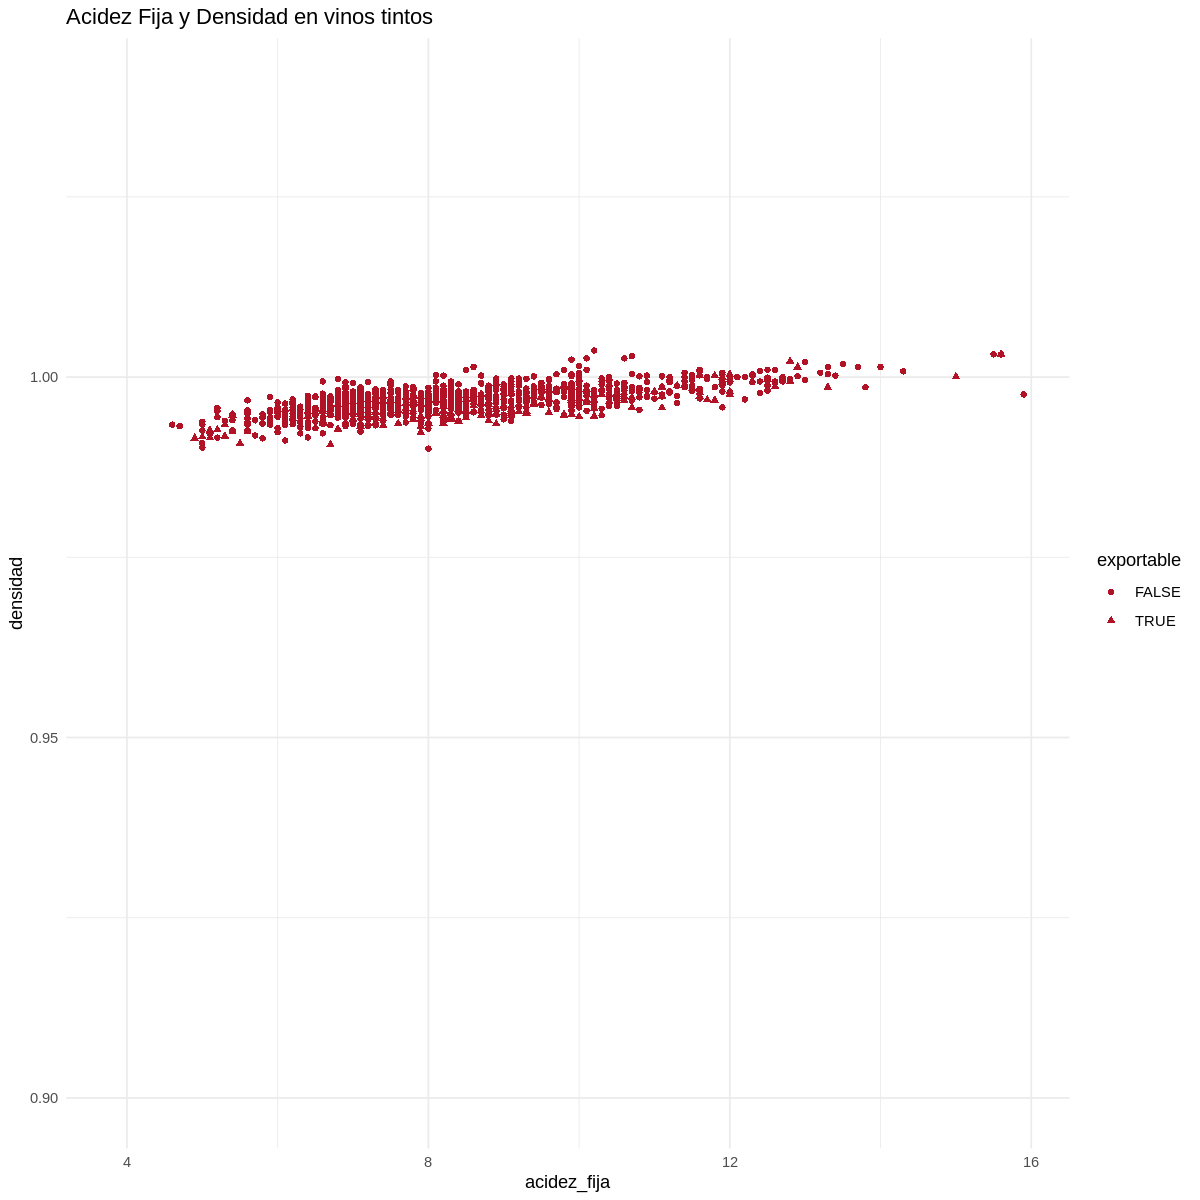

In [ ]:
options(repr.plot.width=10, repr.plot.height=10)
gd_13<- ggplot(subset(data, tipo=='tinto'), aes(x=acidez_fija,y=densidad, shape=exportable) ) +
   geom_point(color="#b11226" )+
   labs(title="Acidez Fija y Densidad en vinos tintos")+
   xlim(3.8, 15.9)+
  ylim(0.9, 1.04)+
  theme_minimal()
gd_13

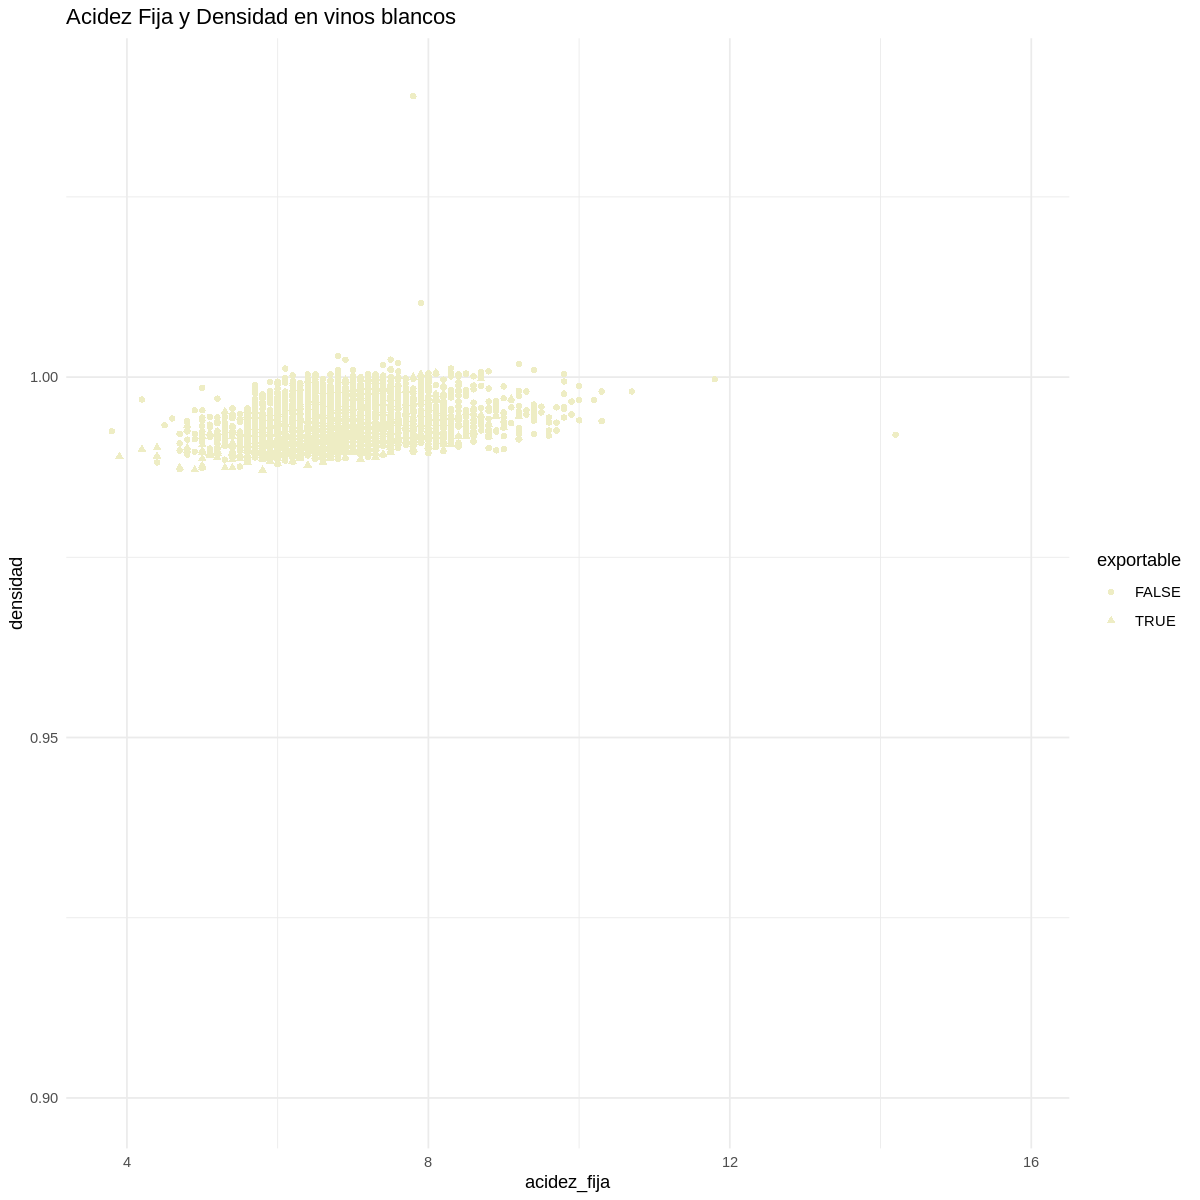

In [ ]:
options(repr.plot.width=10, repr.plot.height=10)
gd_14 <- ggplot(subset(data, tipo=='blanco'), aes(x=acidez_fija,y=densidad, shape=exportable) ) +
  geom_point(color = "#EEEDC4")+
  labs(title="Acidez Fija y Densidad en vinos blancos")+
  xlim(3.8, 15.9)+
  ylim(0.9, 1.04)+
  theme_minimal()
gd_14

Se puede llevar a cabo una prueba de hipótesis para el coeficiente de
correlación, y obtener un intervalo de confianza para el mismo.

Ho)ρ=0

Ha)ρ≠0

La sentencia es la siguiente:
cor.test(x, y, method = “pearson” o "spearman")

In [ ]:
library(dplyr)

In [ ]:
cor.test(data$acidez_fija, data$densidad,method="spearman", )


Warning message in cor.test.default(data$acidez_fija, data$densidad, method = "spearman", :
“Cannot compute exact p-value with ties”



	Spearman's rank correlation rho

data:  data$acidez_fija and data$densidad
S = 2.5868e+10, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.4340578 


In [ ]:
exportables <- subset(data,exportable==TRUE )
cor.test(exportables$acidez_fija, exportables$densidad,method="spearman")

Warning message in cor.test.default(exportables$acidez_fija, exportables$densidad, :
“Cannot compute exact p-value with ties”



	Spearman's rank correlation rho

data:  exportables$acidez_fija and exportables$densidad
S = 143150682, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.5875491 


In [ ]:
noExportables <- subset(data,!exportable)
cor.test(noExportables$acidez_fija, noExportables$densidad,method="spearman")

Warning message in cor.test.default(noExportables$acidez_fija, noExportables$densidad, :
“Cannot compute exact p-value with ties”



	Spearman's rank correlation rho

data:  noExportables$acidez_fija and noExportables$densidad
S = 1.4278e+10, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.3976937 


In [ ]:
blancos <- subset(data, tipo=='blanco')
cor.test(blancos$acidez_fija, blancos$densidad,method="spearman")

Warning message in cor.test.default(blancos$acidez_fija, blancos$densidad, method = "spearman"):
“Cannot compute exact p-value with ties”



	Spearman's rank correlation rho

data:  blancos$acidez_fija and blancos$densidad
S = 1.4296e+10, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.2700309 


In [ ]:
tinto <- subset(data, tipo=='tinto')
cor.test(tinto$acidez_fija, tinto$densidad,method="spearman")

Warning message in cor.test.default(tinto$acidez_fija, tinto$densidad, method = "spearman"):
“Cannot compute exact p-value with ties”



	Spearman's rank correlation rho

data:  tinto$acidez_fija and tinto$densidad
S = 256834761, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.6230708 


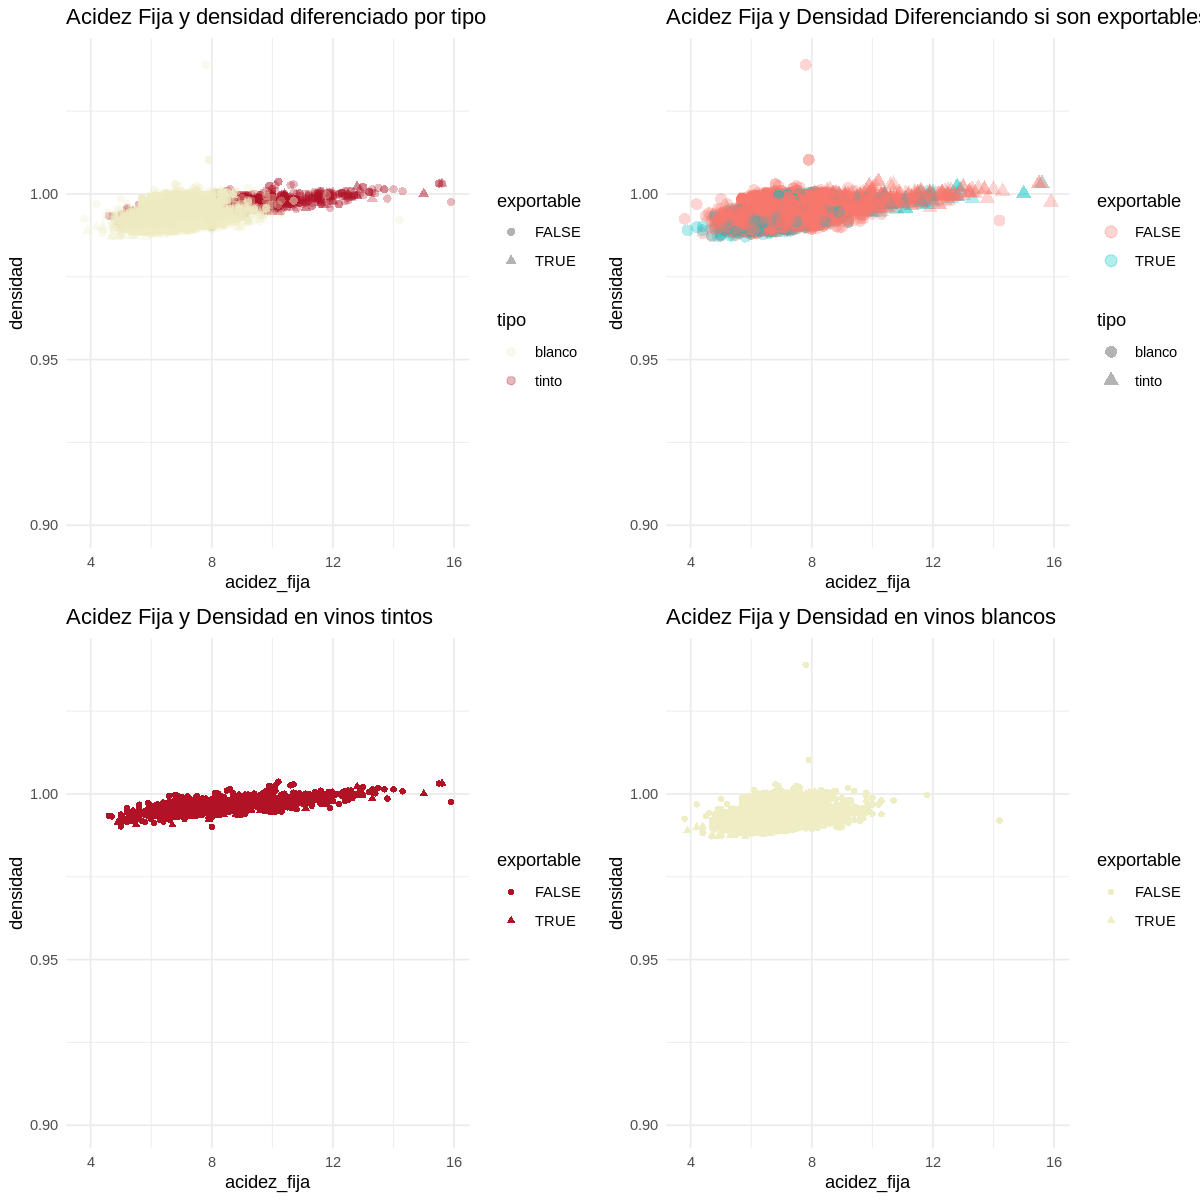

In [ ]:
ggarrange(gd_11,gd_12,gd_13,gd_14,ncol = 2)

### Densidad y acido cítrico

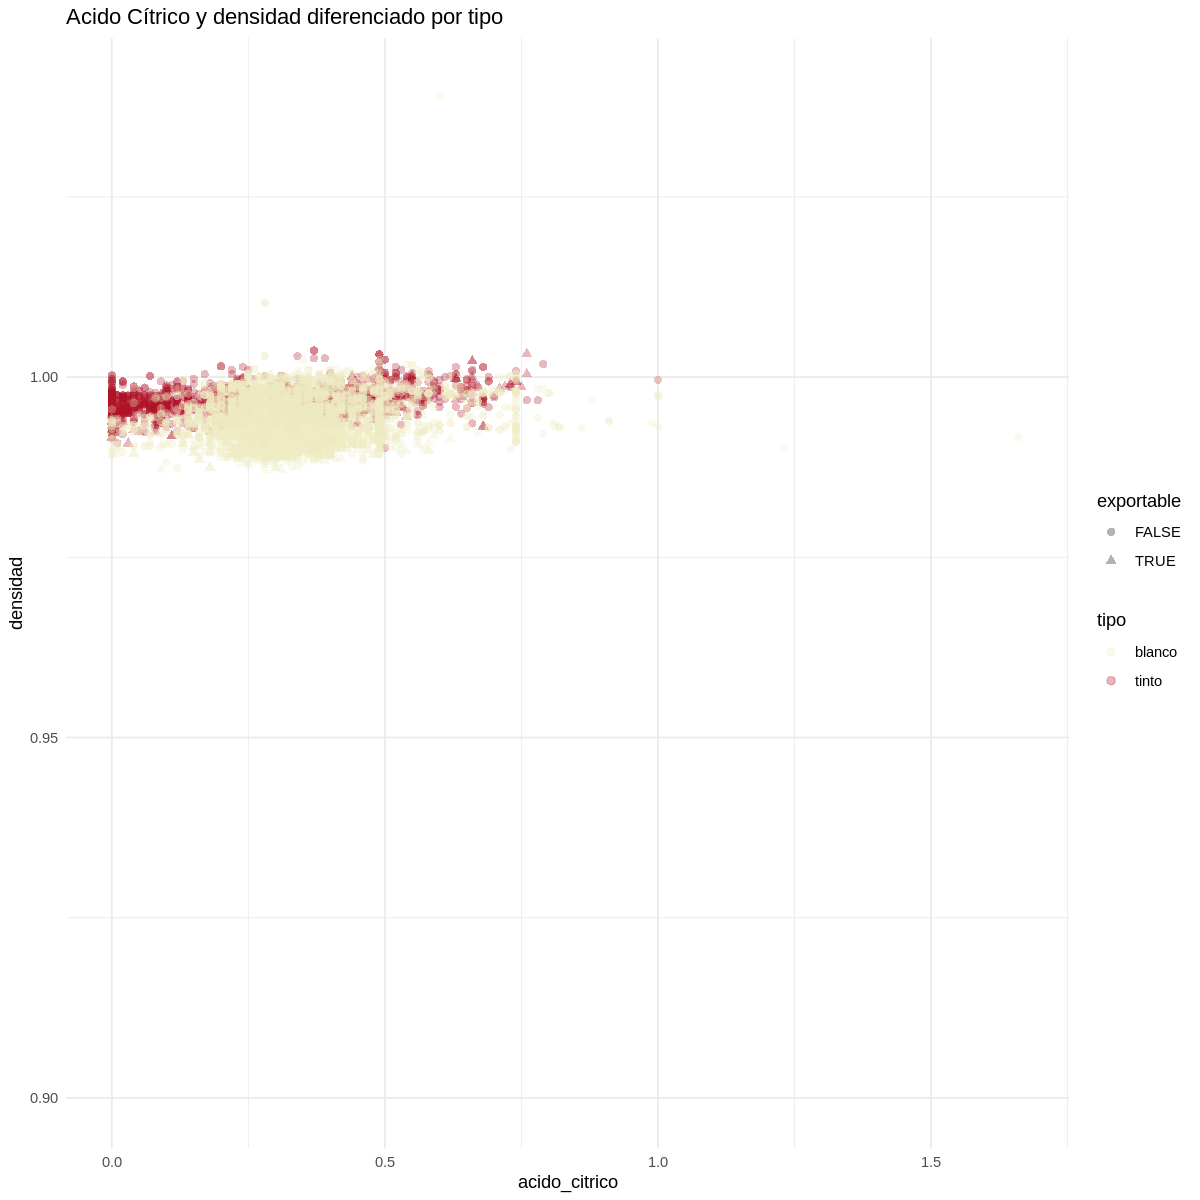

In [ ]:
options(repr.plot.width=10, repr.plot.height=10)
gd_21<-ggplot(data, aes(x=acido_citrico,y=densidad) ) +
  geom_point(aes(color = tipo, shape=exportable), size=2, alpha = 0.3) +
  scale_color_manual(values=c("#EEEDC4", "#b11226"))+
  labs(title="Acido Cítrico y densidad diferenciado por tipo")+
  xlim(0, 1.67)+ #0	1.66
  ylim(0.9, 1.04)+ #	0.98711	1.03898
  theme_minimal()
gd_21



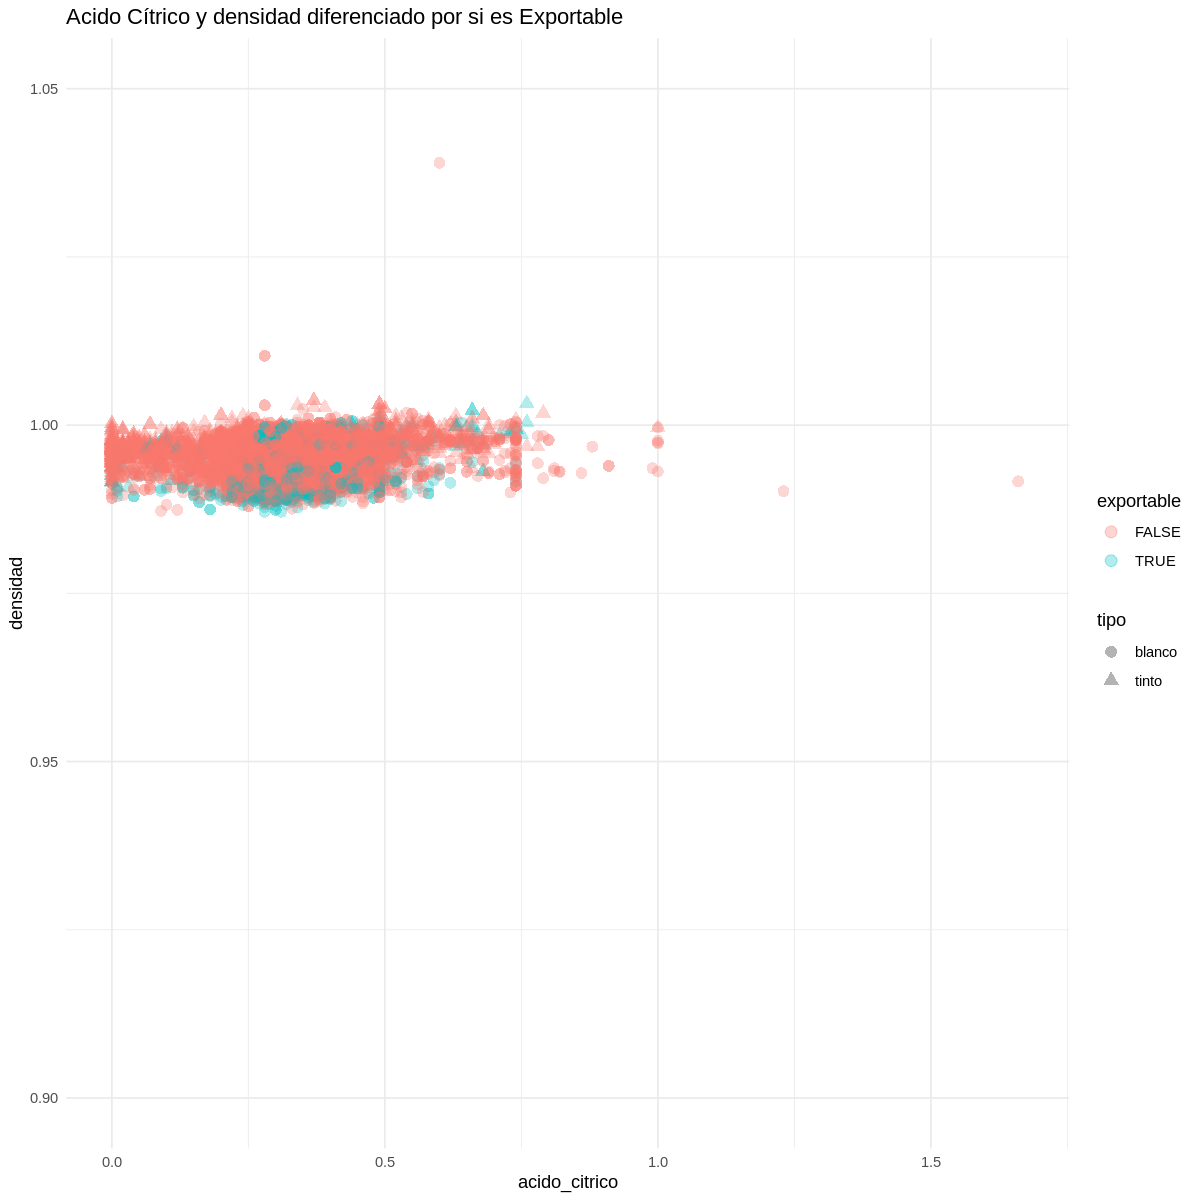

In [ ]:
options(repr.plot.width=10, repr.plot.height=10)
gd_22<-ggplot(data, aes(x=acido_citrico,y=densidad) ) +
  geom_point(aes(color = exportable, shape=tipo), size=3, alpha = 0.3) +
  #scale_color_manual(values=c("#EEEDC4", "#b11226"))+
  labs(title="Acido Cítrico y densidad diferenciado por si es Exportable")+
  xlim(0, 1.67)+
  ylim(0.9, 1.05)+
  theme_minimal()
gd_22

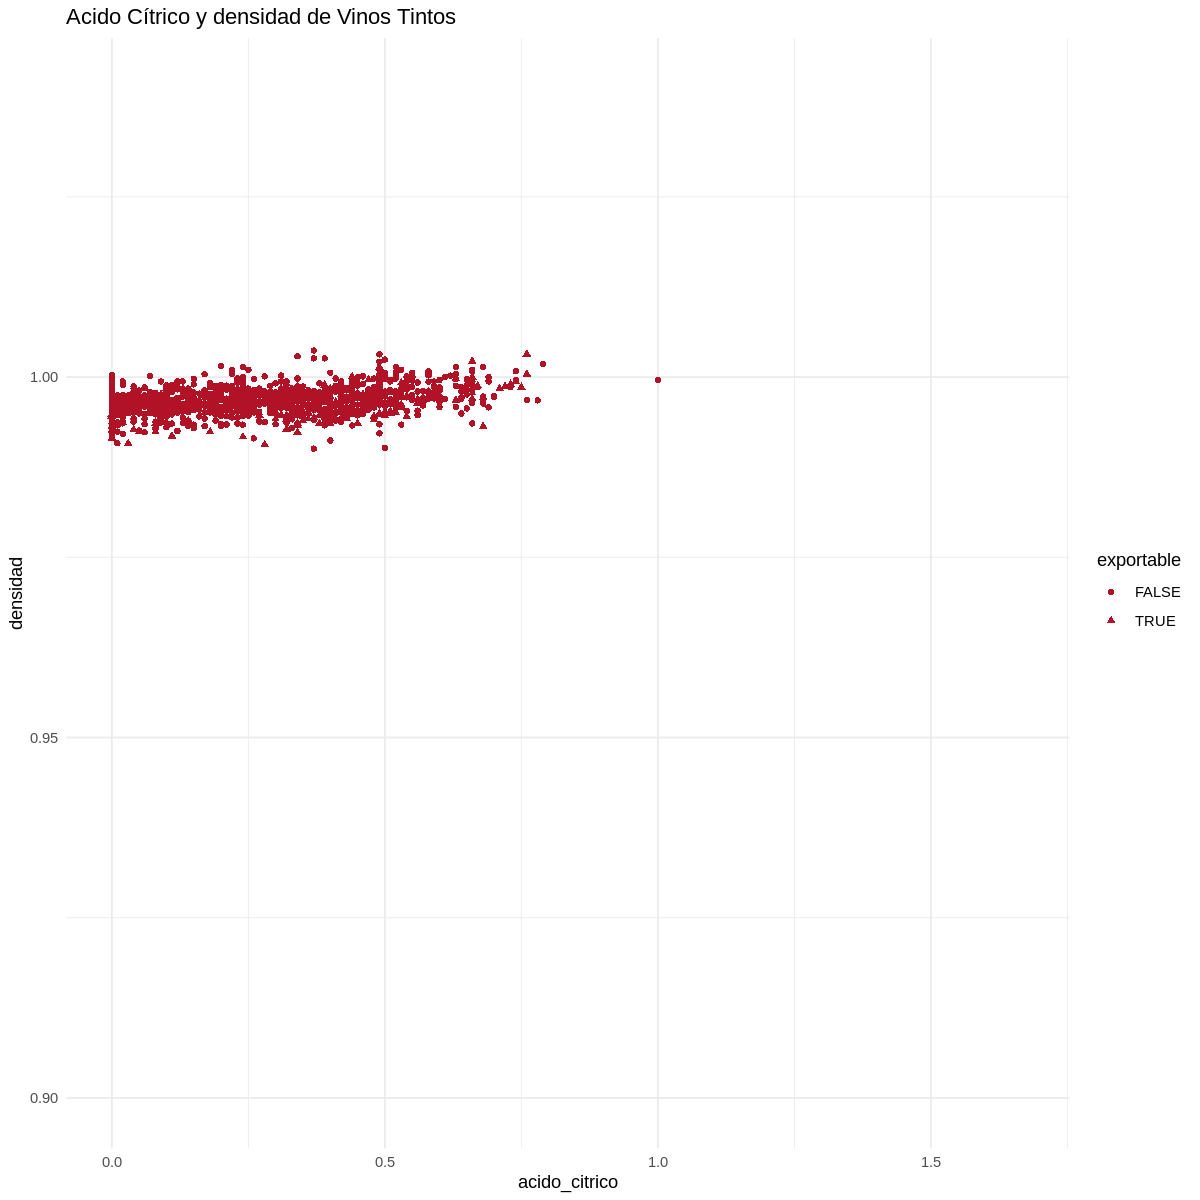

In [ ]:
options(repr.plot.width=10, repr.plot.height=10)
gd_23<- ggplot(data[data$tipo=='tinto',], aes(x=acido_citrico,y=densidad, shape=exportable) ) +
   geom_point(color="#b11226" )+
 labs(title="Acido Cítrico y densidad de Vinos Tintos")+
  xlim(0, 1.67)+
  ylim(0.9, 1.04)+
  theme_minimal()
gd_23

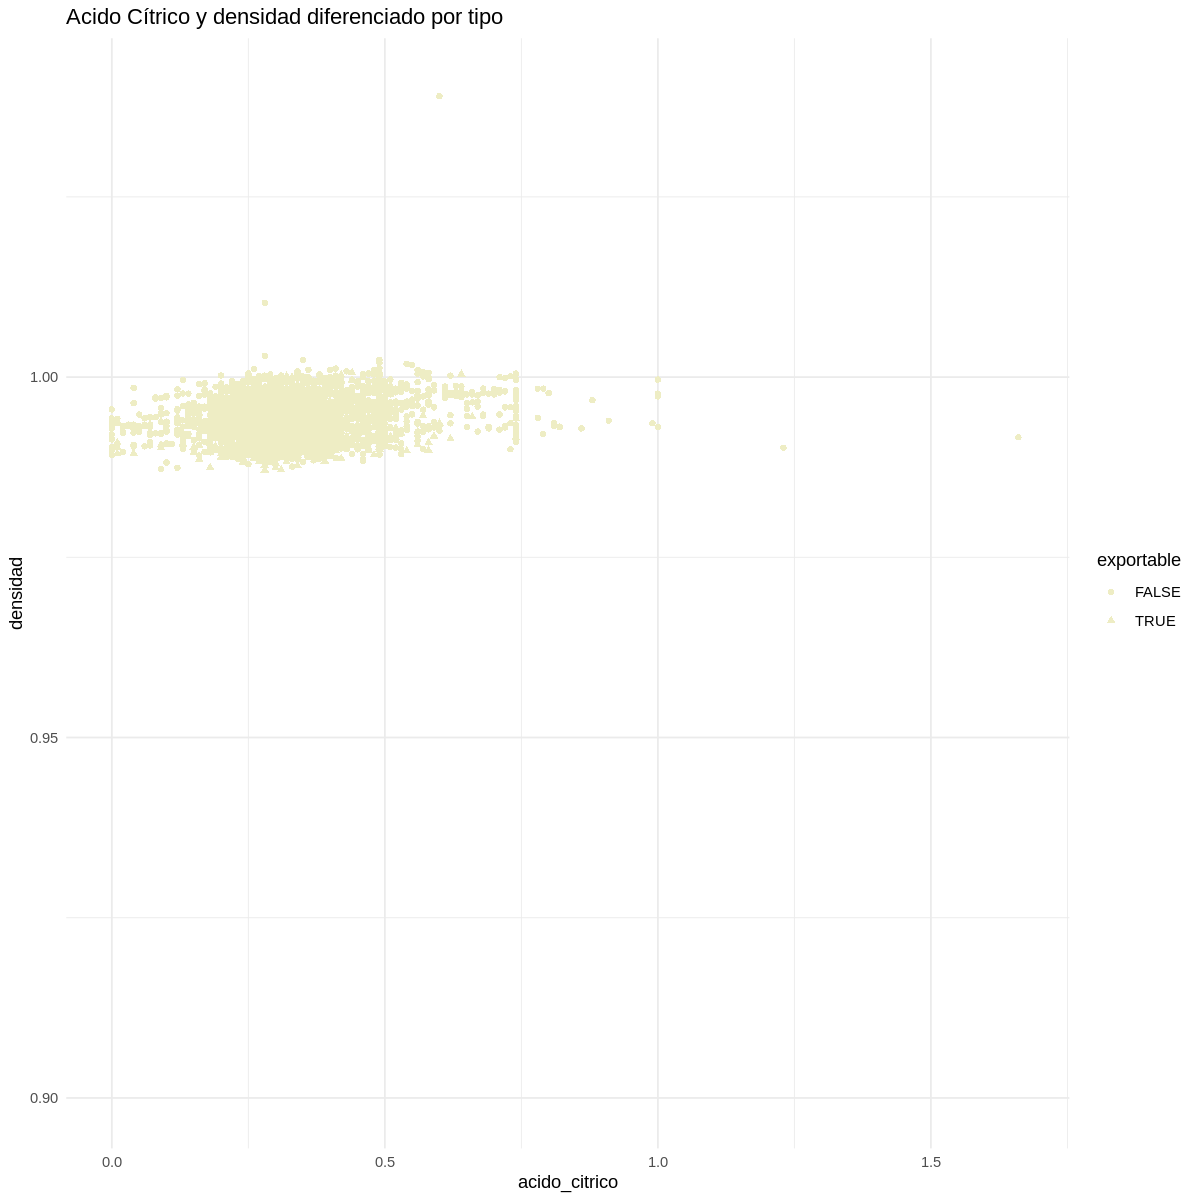

In [ ]:
gd_24<-
  ggplot(subset(data, tipo=='blanco'), aes(x=acido_citrico,y=densidad, shape=exportable) ) +
  geom_point(color = "#EEEDC4")+
  labs(title="Acido Cítrico y densidad diferenciado por tipo")+
  xlim(0, 1.67)+
  ylim(0.9, 1.04)+
  theme_minimal()
gd_24

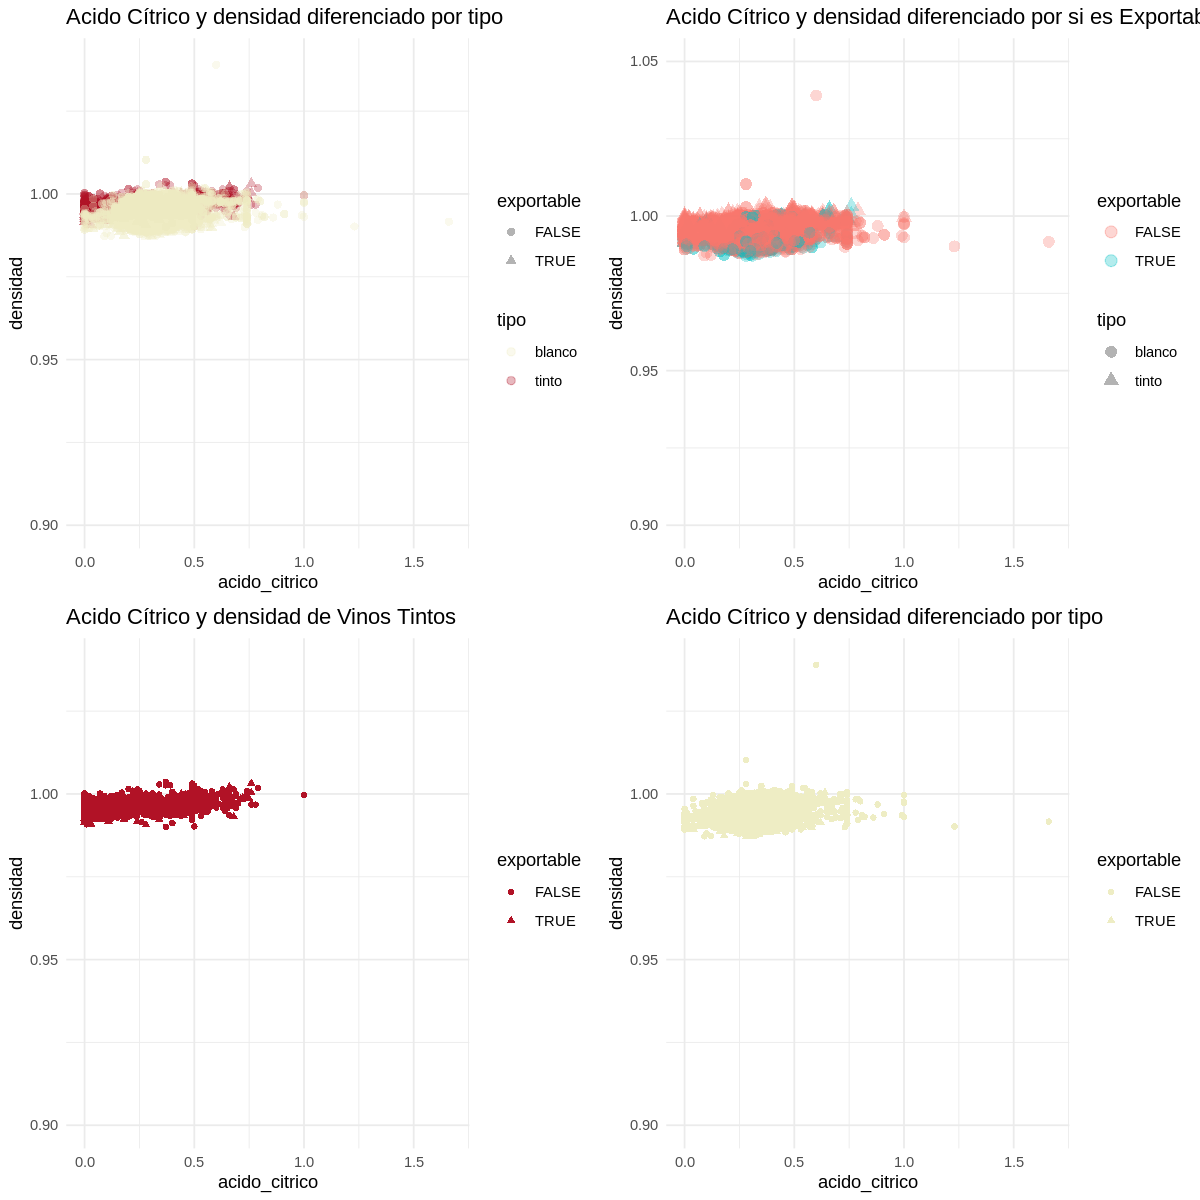

In [ ]:
ggarrange(gd_21,gd_22,gd_23,gd_24,ncol = 2)

Se puede llevar a cabo una prueba de hipótesis para el coeficiente de
correlación, y obtener un intervalo de confianza para el mismo.

Ho)ρ=0

Ha)ρ≠0

La sentencia es la siguiente:
cor.test(x, y, method = “pearson” o "spearman")

In [ ]:
cor.test(data$acido_citrico, data$densidad,method="spearman", )


Warning message in cor.test.default(data$acido_citrico, data$densidad, method = "spearman", :
“Cannot compute exact p-value with ties”



	Spearman's rank correlation rho

data:  data$acido_citrico and data$densidad
S = 4.2705e+10, p-value = 1.16e-07
alternative hypothesis: true rho is not equal to 0
sample estimates:
       rho 
0.06569206 


In [ ]:
exportables <- subset(data,exportable==TRUE )
cor.test(exportables$acido_citrico, exportables$densidad,method="spearman")

Warning message in cor.test.default(exportables$acido_citrico, exportables$densidad, :
“Cannot compute exact p-value with ties”



	Spearman's rank correlation rho

data:  exportables$acido_citrico and exportables$densidad
S = 270805847, p-value = 1.987e-15
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.2197445 


In [ ]:
noExportables <- subset(data,!exportable)
cor.test(noExportables$acido_citrico, noExportables$densidad,method="spearman")

Warning message in cor.test.default(noExportables$acido_citrico, noExportables$densidad, :
“Cannot compute exact p-value with ties”



	Spearman's rank correlation rho

data:  noExportables$acido_citrico and noExportables$densidad
S = 2.2079e+10, p-value = 6.952e-07
alternative hypothesis: true rho is not equal to 0
sample estimates:
       rho 
0.06862392 


In [ ]:
blancos <- subset(data, tipo=='blanco')
cor.test(blancos$acido_citrico, blancos$densidad,method="spearman")

Warning message in cor.test.default(blancos$acido_citrico, blancos$densidad, method = "spearman"):
“Cannot compute exact p-value with ties”



	Spearman's rank correlation rho

data:  blancos$acido_citrico and blancos$densidad
S = 1.7794e+10, p-value = 1.453e-10
alternative hypothesis: true rho is not equal to 0
sample estimates:
       rho 
0.09142519 


In [ ]:
tinto <- subset(data, tipo=='tinto')
cor.test(tinto$acido_citrico, tinto$densidad,method="spearman")

Warning message in cor.test.default(tinto$acido_citrico, tinto$densidad, method = "spearman"):
“Cannot compute exact p-value with ties”



	Spearman's rank correlation rho

data:  tinto$acido_citrico and tinto$densidad
S = 441344532, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.3522853 


### Densidad y azúcar residual

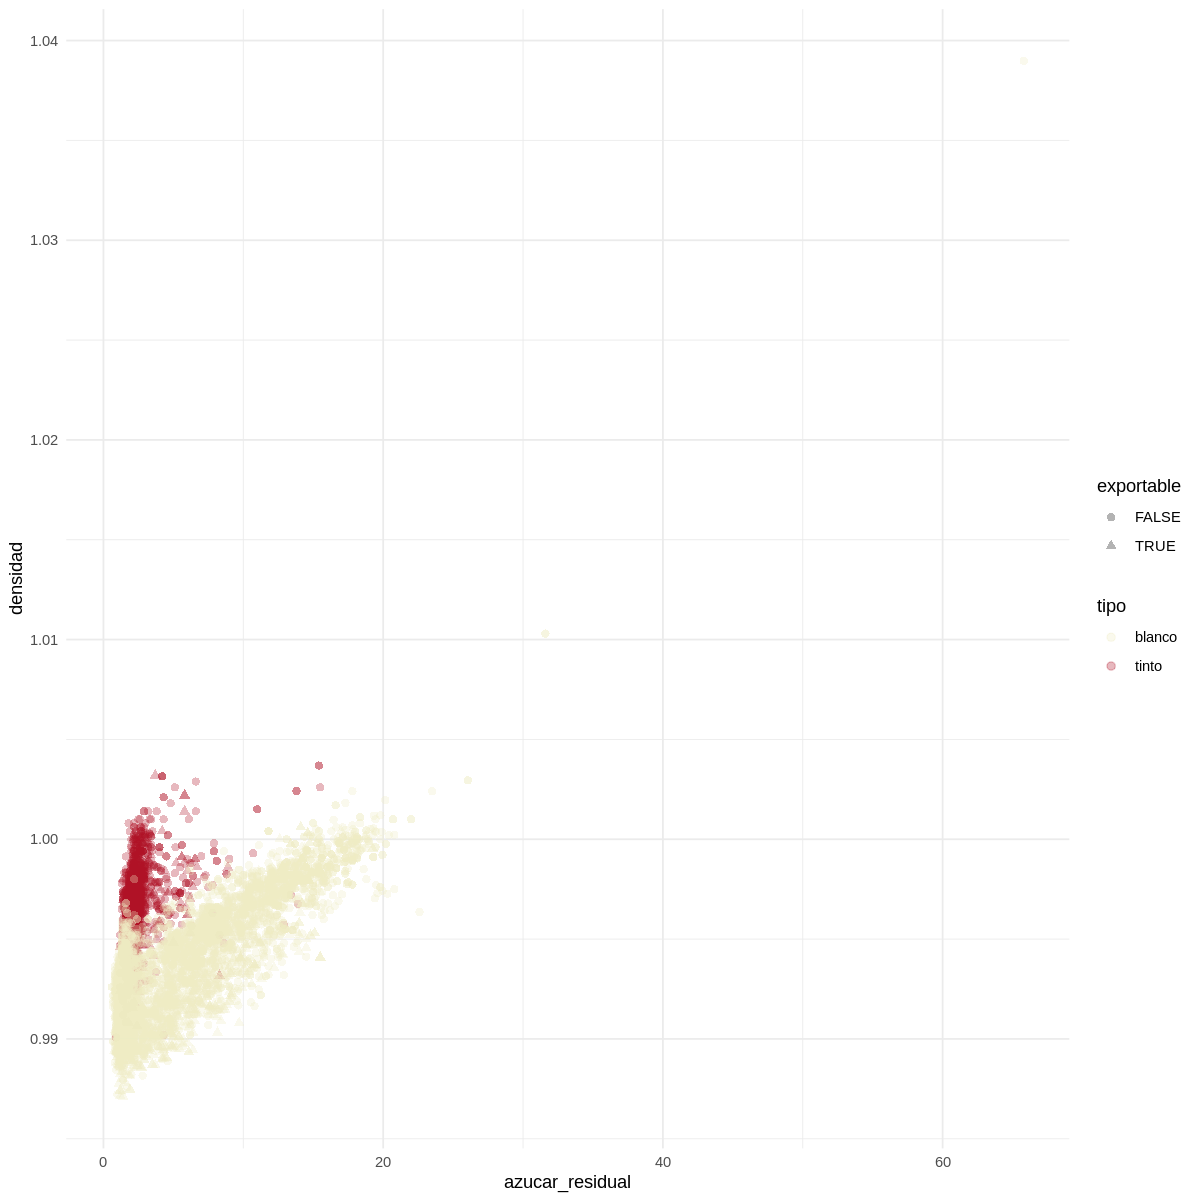

In [ ]:
options(repr.plot.width=10, repr.plot.height=10)
ggplot(data, aes(x=azucar_residual,y=densidad, color = tipo) ) +
  geom_point(aes( shape=exportable), size=2, alpha = 0.3) +
  scale_color_manual(values=c("#EEEDC4", "#b11226"))+
  theme_minimal()



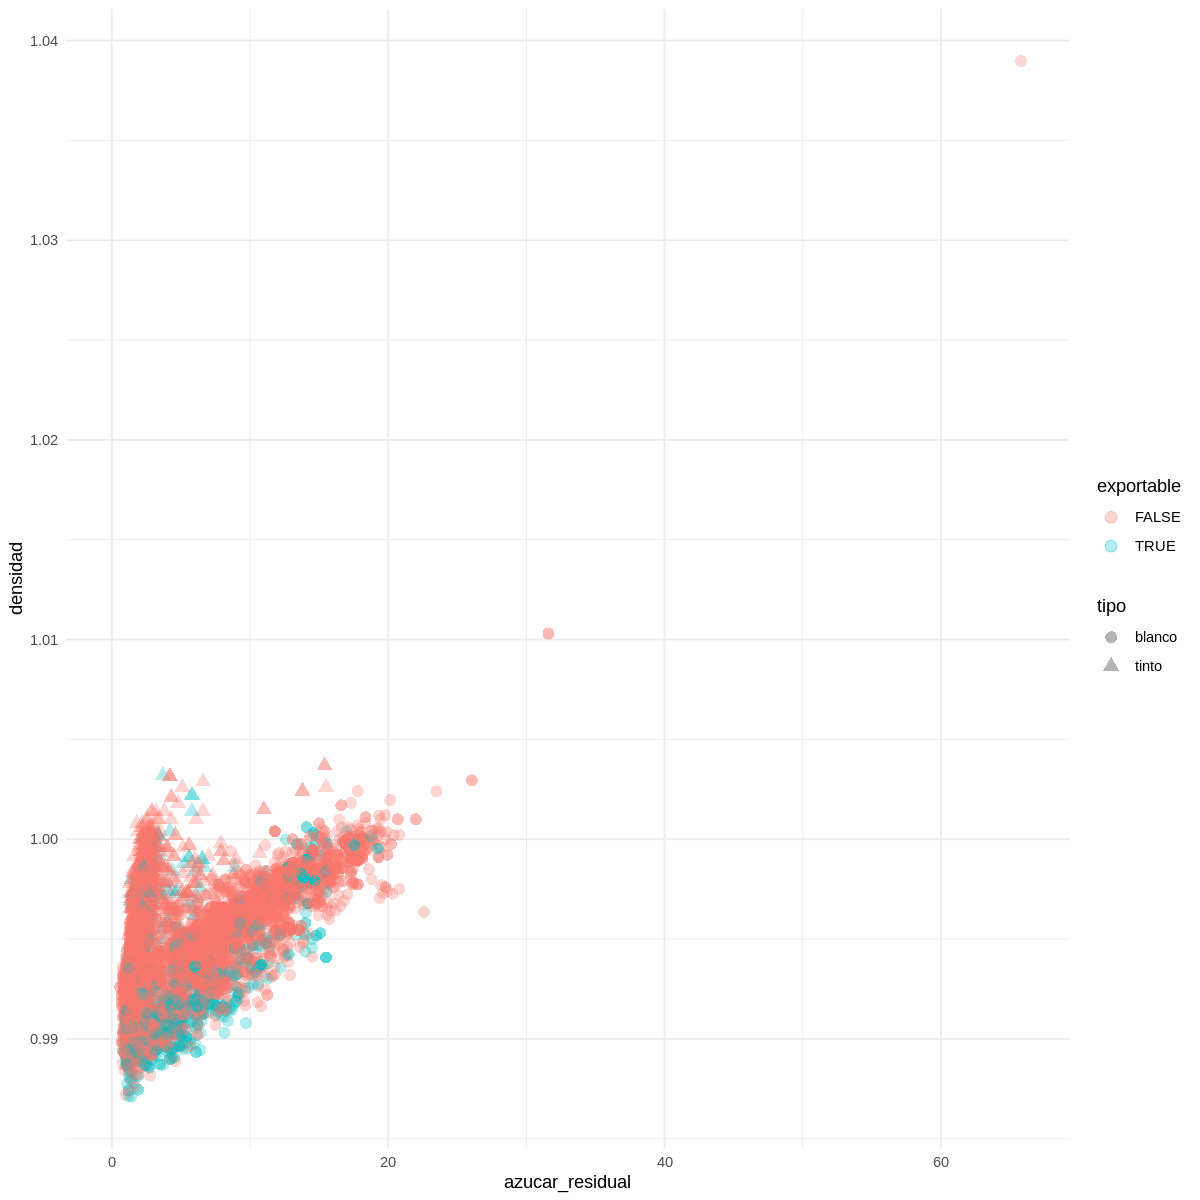

In [ ]:
options(repr.plot.width=10, repr.plot.height=10)
ggplot(data, aes(x=azucar_residual,y=densidad) ) +
  geom_point(aes(color = exportable, shape=tipo), size=3, alpha = 0.3) +
  #scale_color_manual(values=c("#EEEDC4", "#b11226"))+
  xlim(0,66)+
  theme_minimal()

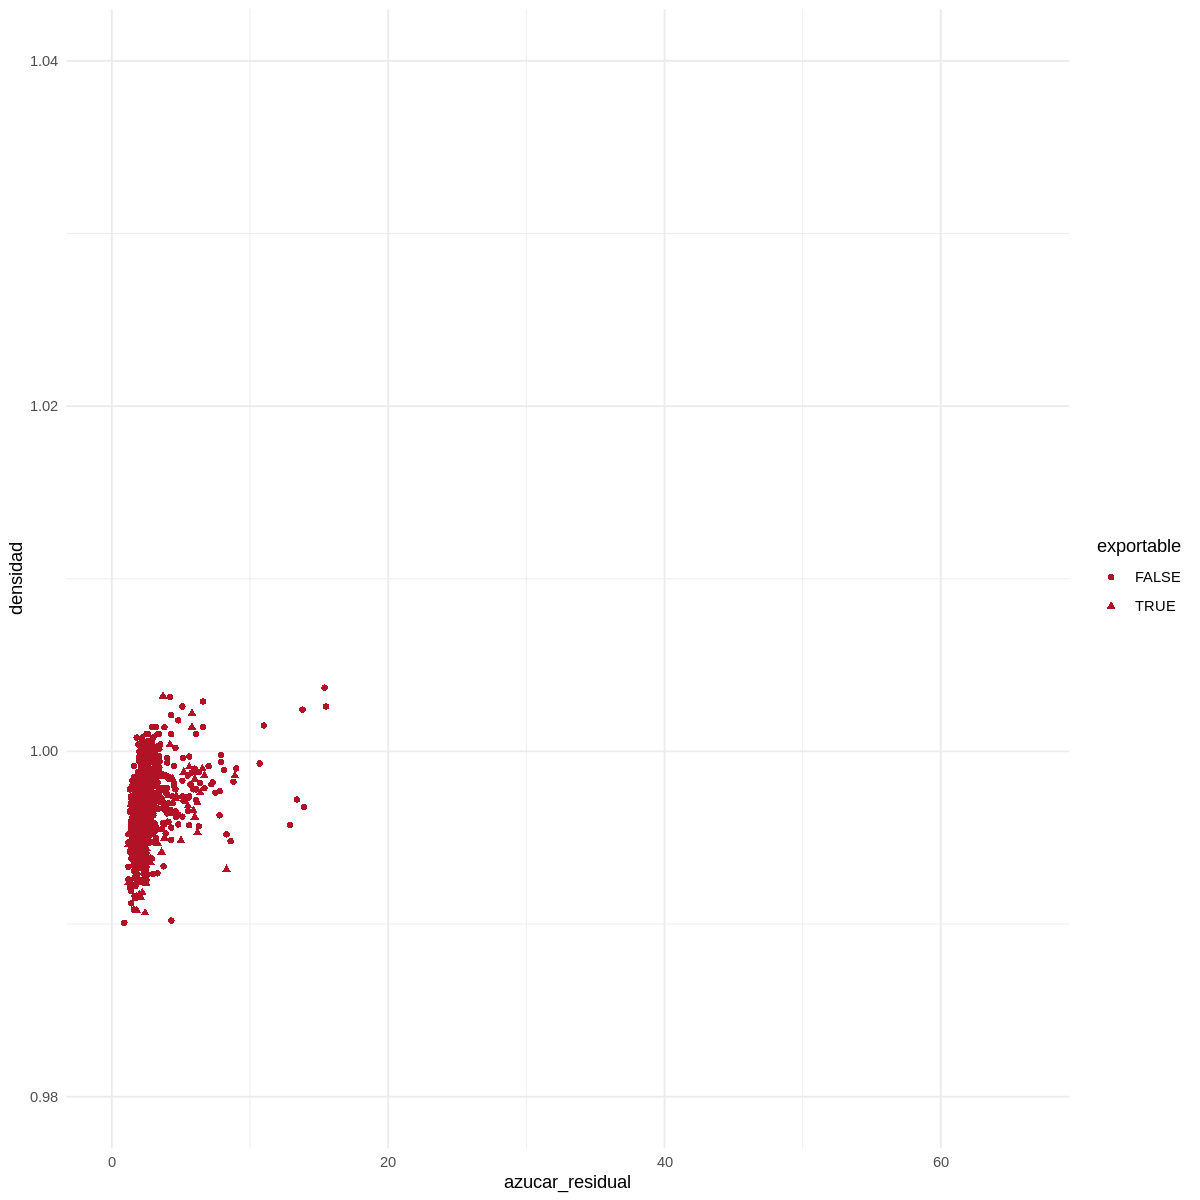

In [ ]:
options(repr.plot.width=10, repr.plot.height=10)
ggplot(data[data$tipo=='tinto',], aes(x=azucar_residual,y=densidad, shape=exportable) ) +
   geom_point(color="#b11226" )+
  xlim(0,66)+
  ylim(0.98,1.04)+
  theme_minimal()

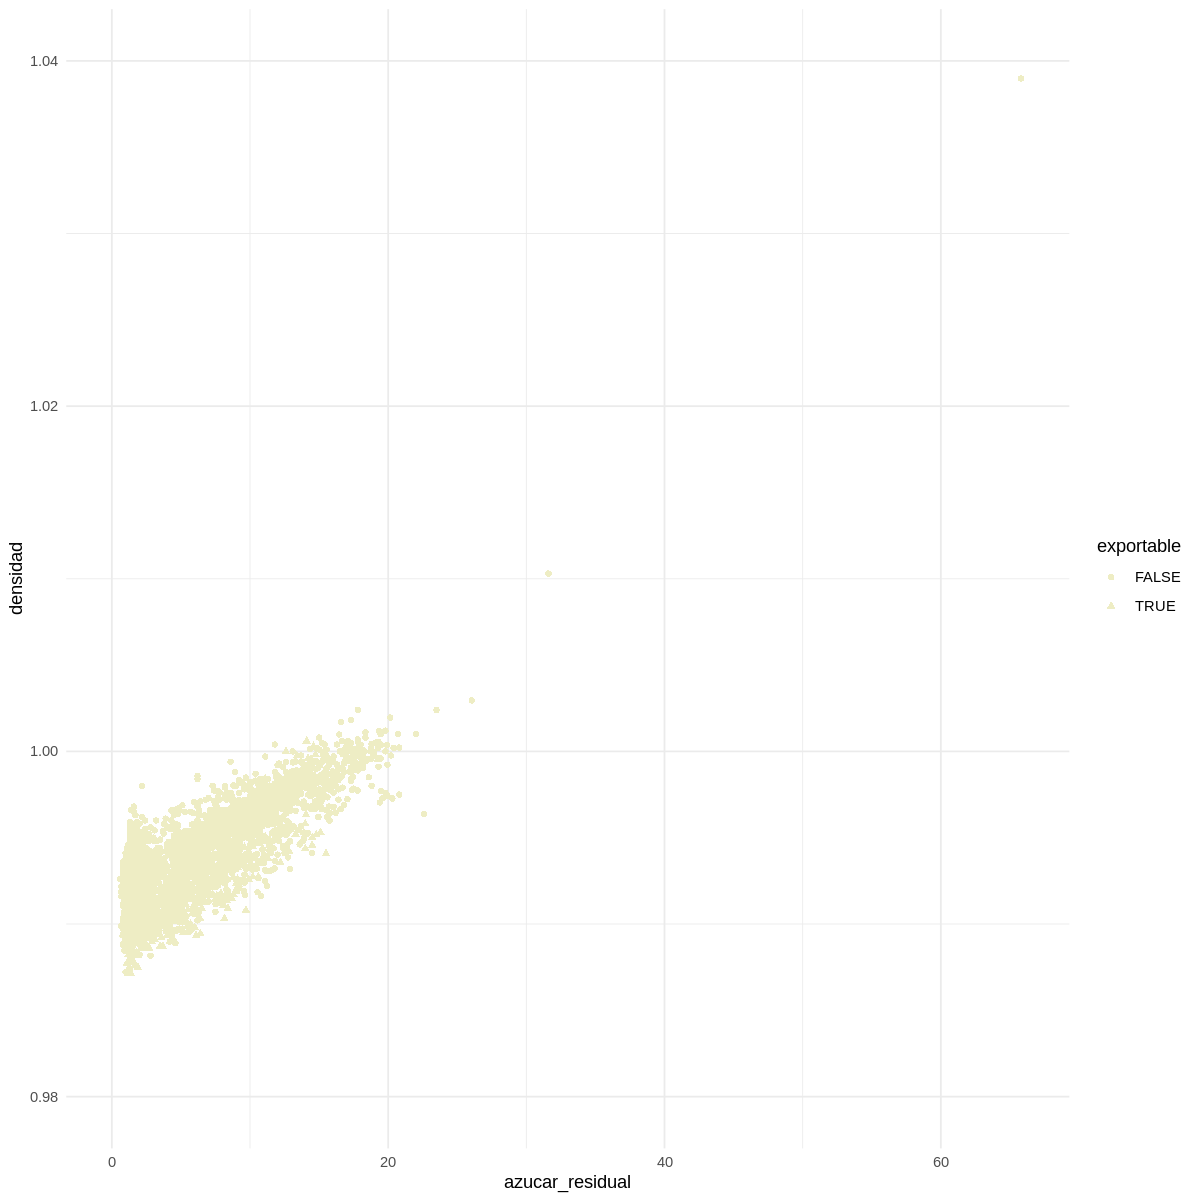

In [ ]:
ggplot(subset(data, tipo=='blanco'), aes(x=azucar_residual,y=densidad, shape=exportable) ) +
  geom_point(color = "#EEEDC4")+
  xlim(0,66)+
  ylim(0.98,1.04)+
  theme_minimal()

Se puede llevar a cabo una prueba de hipótesis para el coeficiente de
correlación, y obtener un intervalo de confianza para el mismo.

Ho)ρ=0

Ha)ρ≠0

La sentencia es la siguiente:
cor.test(x, y, method = “pearson” o "spearman")

In [ ]:
cor.test(data$azucar_residual, data$densidad,method="spearman", )


Warning message in cor.test.default(data$azucar_residual, data$densidad, method = "spearman", :
“Cannot compute exact p-value with ties”



	Spearman's rank correlation rho

data:  data$azucar_residual and data$densidad
S = 2.1635e+10, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.5266555 


In [ ]:
exportables <- subset(data,exportable==TRUE )
cor.test(exportables$azucar_residual, exportables$densidad,method="spearman")

Warning message in cor.test.default(exportables$azucar_residual, exportables$densidad, :
“Cannot compute exact p-value with ties”



	Spearman's rank correlation rho

data:  exportables$azucar_residual and exportables$densidad
S = 185576671, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.4653098 


In [ ]:
noExportables <- subset(data,!exportable)
cor.test(noExportables$azucar_residual, noExportables$densidad,method="spearman")

Warning message in cor.test.default(noExportables$azucar_residual, noExportables$densidad, :
“Cannot compute exact p-value with ties”



	Spearman's rank correlation rho

data:  noExportables$azucar_residual and noExportables$densidad
S = 1.0582e+10, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.5536278 


In [ ]:
blancos <- subset(data, tipo=='blanco')
cor.test(blancos$azucar_residual, blancos$densidad,method="spearman")

Warning message in cor.test.default(blancos$azucar_residual, blancos$densidad, method = "spearman"):
“Cannot compute exact p-value with ties”



	Spearman's rank correlation rho

data:  blancos$azucar_residual and blancos$densidad
S = 4301371249, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.7803648 


In [ ]:
tinto <- subset(data, tipo=='tinto')
cor.test(tinto$azucar_residual, tinto$densidad,method="spearman")

Warning message in cor.test.default(tinto$azucar_residual, tinto$densidad, method = "spearman"):
“Cannot compute exact p-value with ties”



	Spearman's rank correlation rho

data:  tinto$azucar_residual and tinto$densidad
S = 393660646, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.4222659 


### Densidad y Cloruros

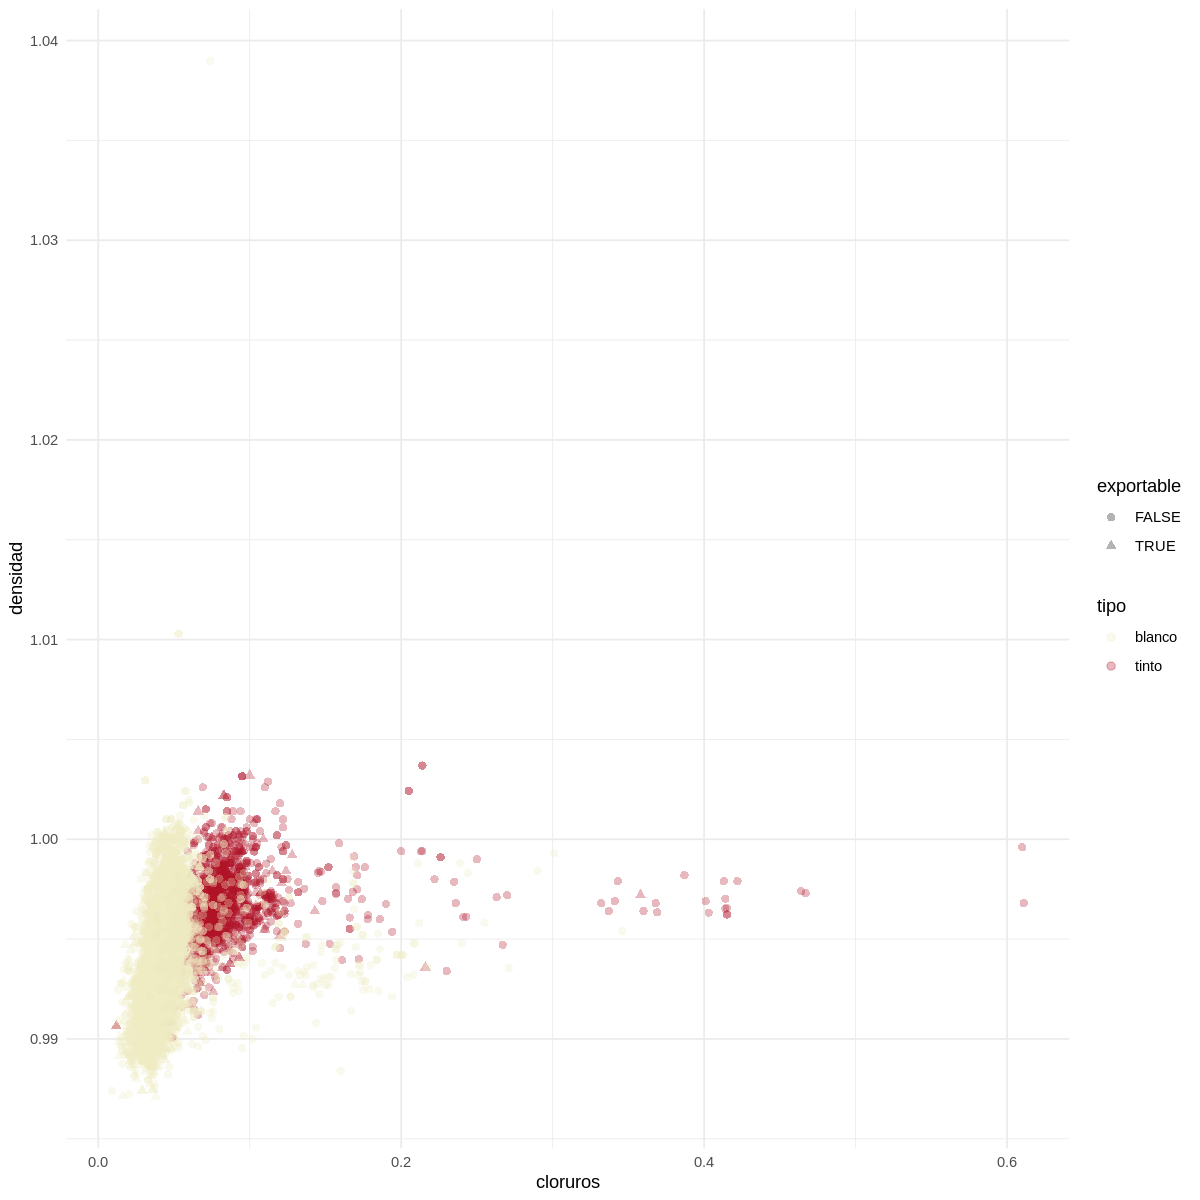

In [ ]:
options(repr.plot.width=10, repr.plot.height=10)
ggplot(data, aes(x=cloruros,y=densidad, color = tipo) ) +
  geom_point(aes( shape=exportable), size=2, alpha = 0.3) +
  scale_color_manual(values=c("#EEEDC4", "#b11226"))+

  theme_minimal()



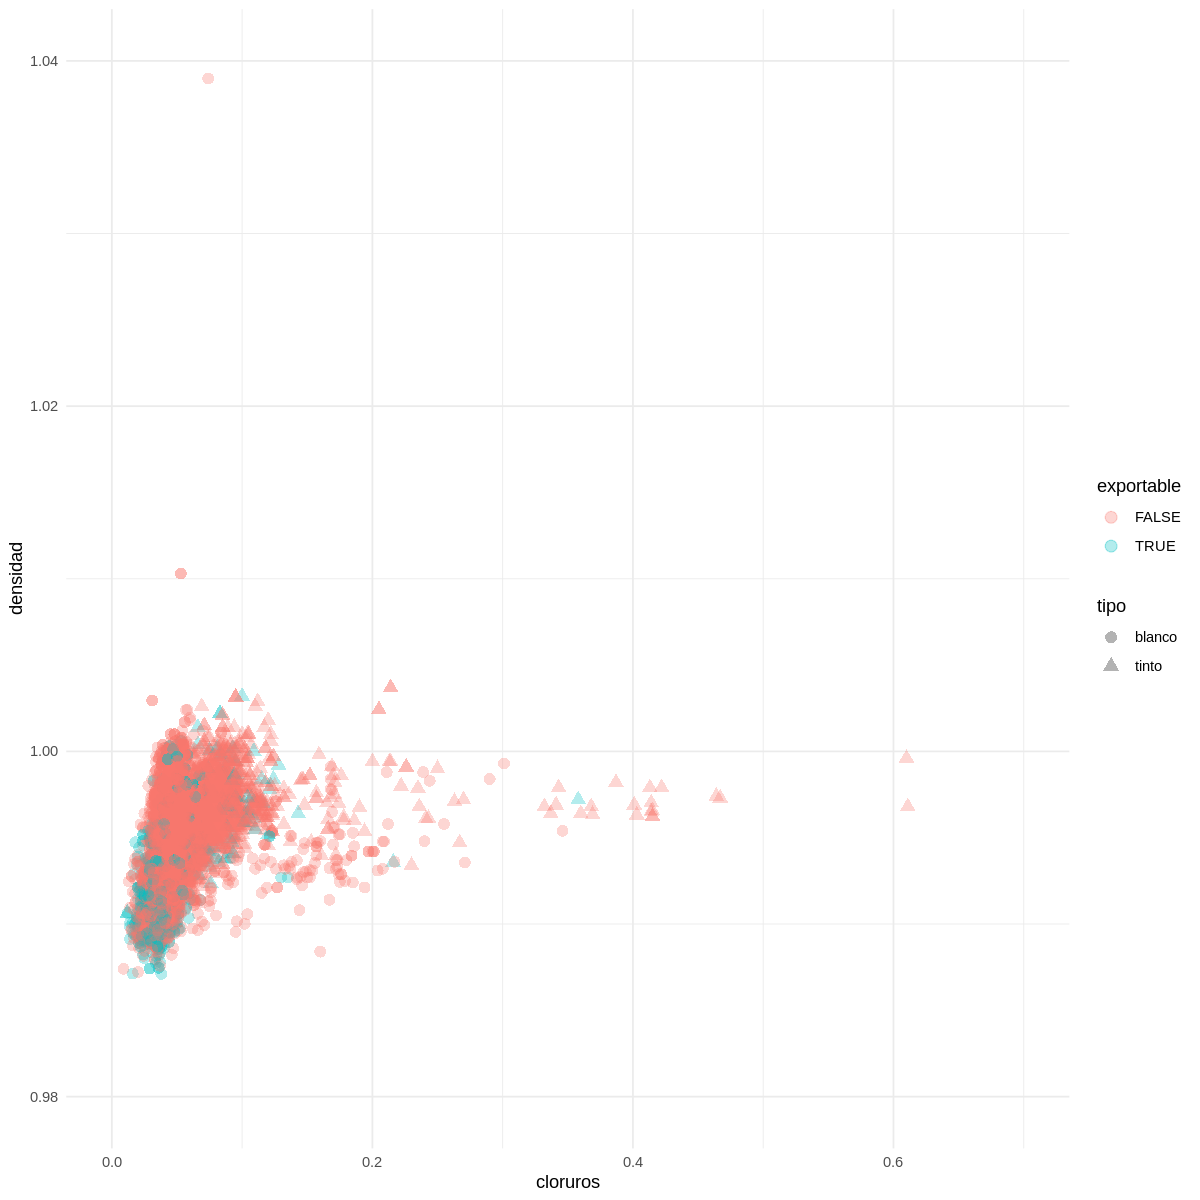

In [ ]:
options(repr.plot.width=10, repr.plot.height=10)
ggplot(data, aes(x=cloruros,y=densidad) ) +
  geom_point(aes(color = exportable, shape=tipo), size=3, alpha = 0.3) +
  #scale_color_manual(values=c("#EEEDC4", "#b11226"))+
  xlim(0,0.7)+
   ylim(0.98,1.04)+
  theme_minimal()

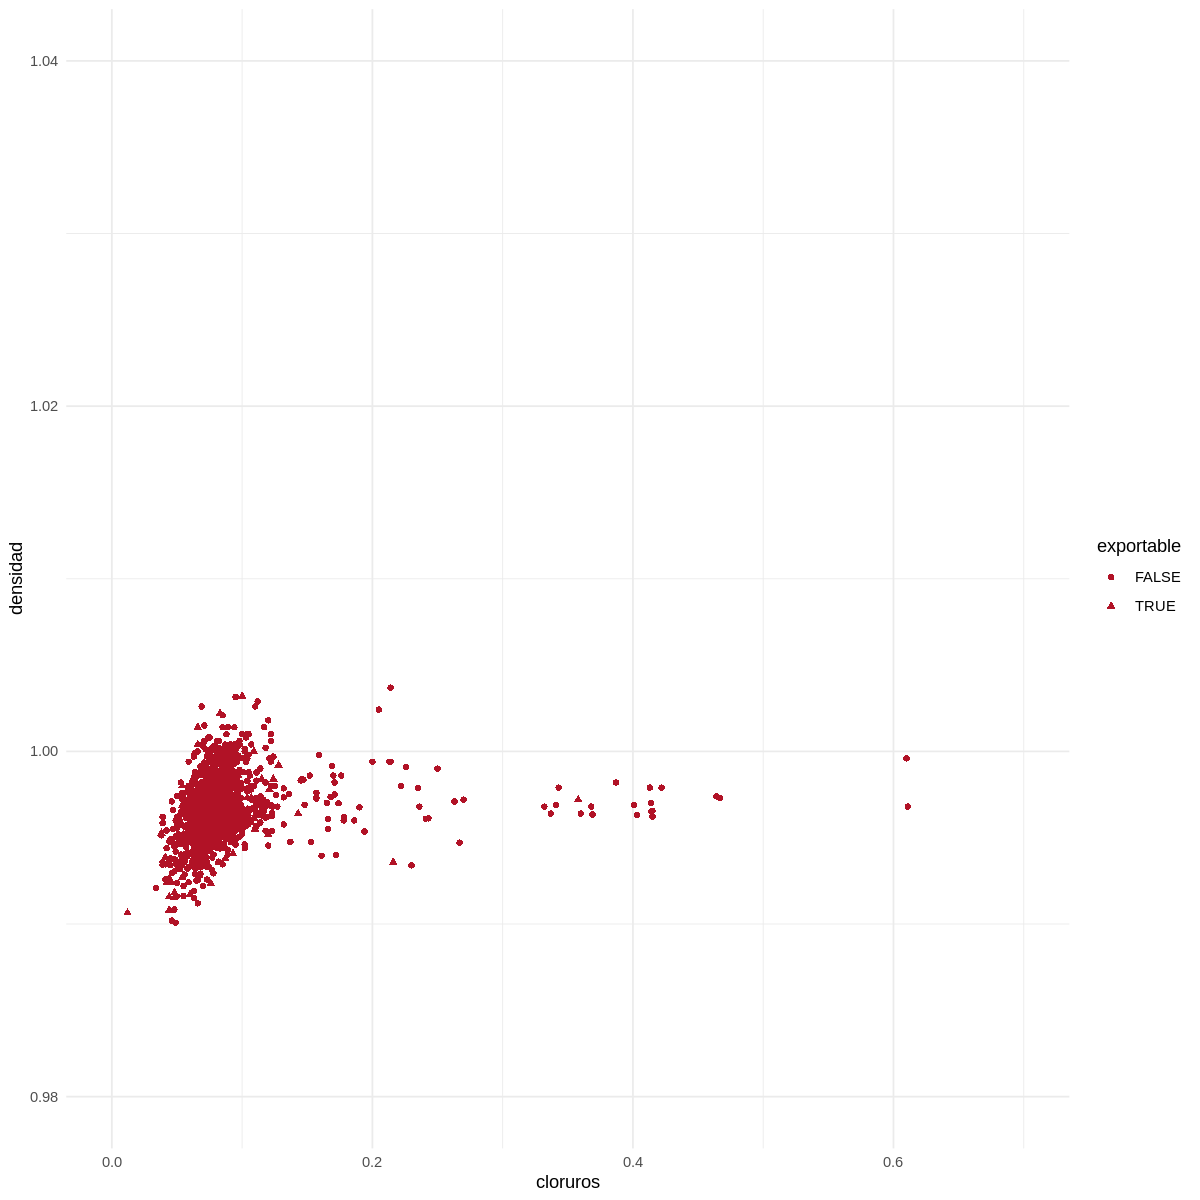

In [ ]:
options(repr.plot.width=10, repr.plot.height=10)
ggplot(data[data$tipo=='tinto',], aes(x=cloruros,y=densidad, shape=exportable) ) +
   geom_point(color="#b11226" )+
   xlim(0,0.7)+
  ylim(0.98,1.04)+
  theme_minimal()

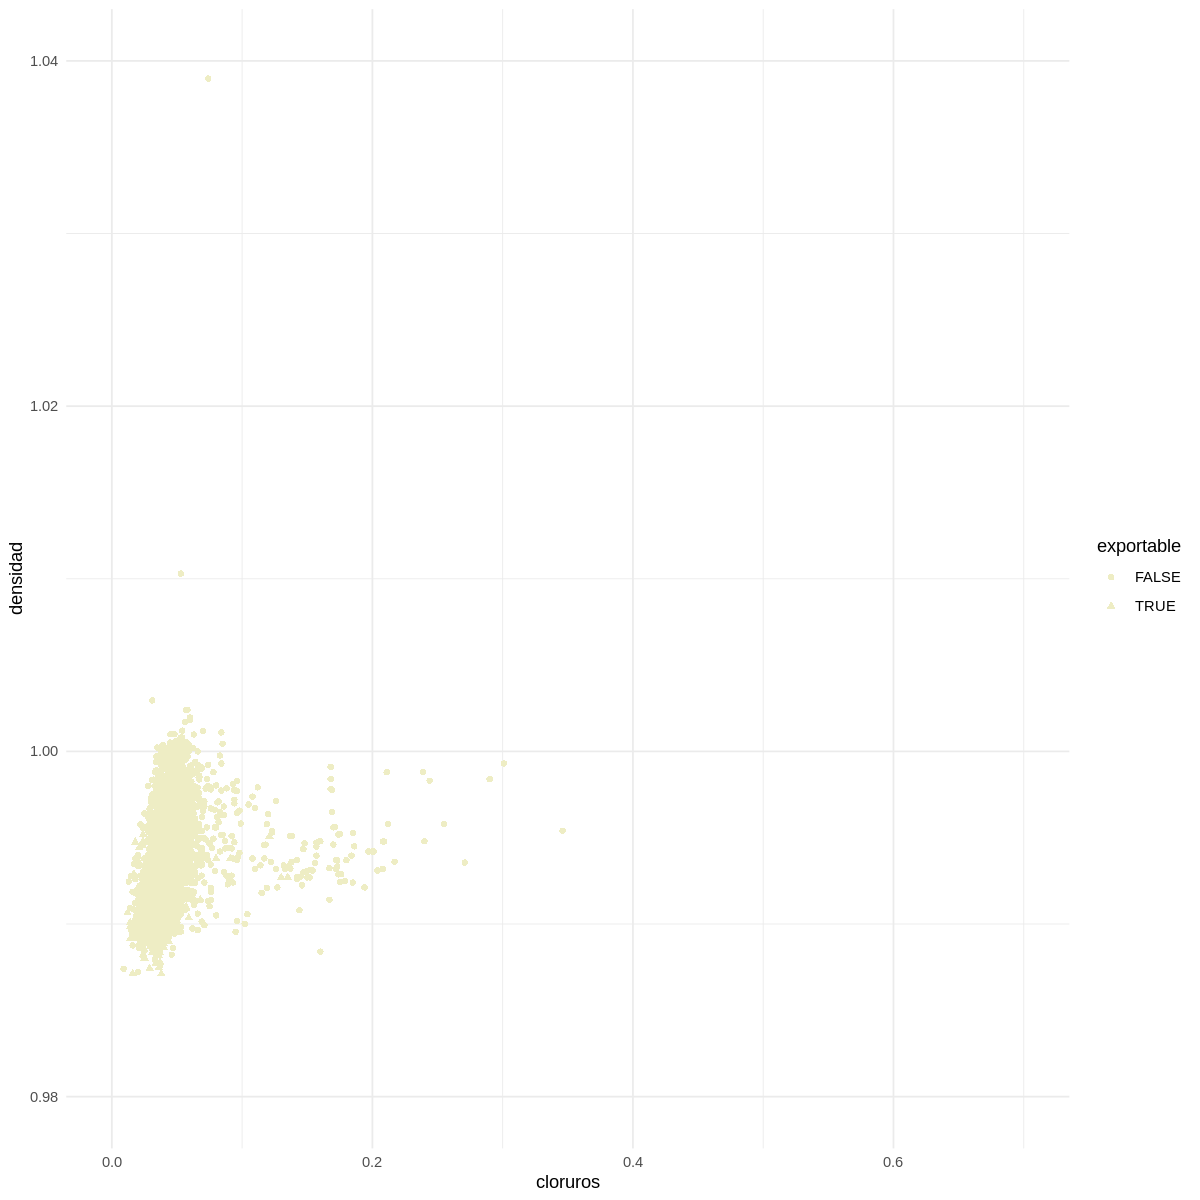

In [ ]:
ggplot(subset(data, tipo=='blanco'), aes(x=cloruros,y=densidad, shape=exportable) ) +
  geom_point(color = "#EEEDC4")+
   xlim(0,0.7)+
  ylim(0.98,1.04)+
  theme_minimal()

Se puede llevar a cabo una prueba de hipótesis para el coeficiente de
correlación, y obtener un intervalo de confianza para el mismo.

Ho)ρ=0

Ha)ρ≠0

La sentencia es la siguiente:
cor.test(x, y, method = “pearson” o "spearman")

In [ ]:
cor.test(data$cloruros, data$densidad,method="spearman", )


Warning message in cor.test.default(data$cloruros, data$densidad, method = "spearman", :
“Cannot compute exact p-value with ties”



	Spearman's rank correlation rho

data:  data$cloruros and data$densidad
S = 1.8707e+10, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.5907315 


In [ ]:
exportables <- subset(data,exportable==TRUE )
cor.test(exportables$cloruros, exportables$densidad,method="spearman")

Warning message in cor.test.default(exportables$cloruros, exportables$densidad, :
“Cannot compute exact p-value with ties”



	Spearman's rank correlation rho

data:  exportables$cloruros and exportables$densidad
S = 125073579, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.6396335 


In [ ]:
noExportables <- subset(data,!exportable)
cor.test(noExportables$cloruros, noExportables$densidad,method="spearman")

Warning message in cor.test.default(noExportables$cloruros, noExportables$densidad, :
“Cannot compute exact p-value with ties”



	Spearman's rank correlation rho

data:  noExportables$cloruros and noExportables$densidad
S = 1.1465e+10, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
     rho 
0.516366 


In [ ]:
blancos <- subset(data, tipo=='blanco')
cor.test(blancos$cloruros, blancos$densidad,method="spearman")

Warning message in cor.test.default(blancos$cloruros, blancos$densidad, method = "spearman"):
“Cannot compute exact p-value with ties”



	Spearman's rank correlation rho

data:  blancos$cloruros and blancos$densidad
S = 9629499679, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.5083018 


In [ ]:
tinto <- subset(data, tipo=='tinto')
cor.test(tinto$cloruros, tinto$densidad,method="spearman")

Warning message in cor.test.default(tinto$cloruros, tinto$densidad, method = "spearman"):
“Cannot compute exact p-value with ties”



	Spearman's rank correlation rho

data:  tinto$cloruros and tinto$densidad
S = 401071526, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.4113897 


### Densidad y Dioxido de Azufre Libre

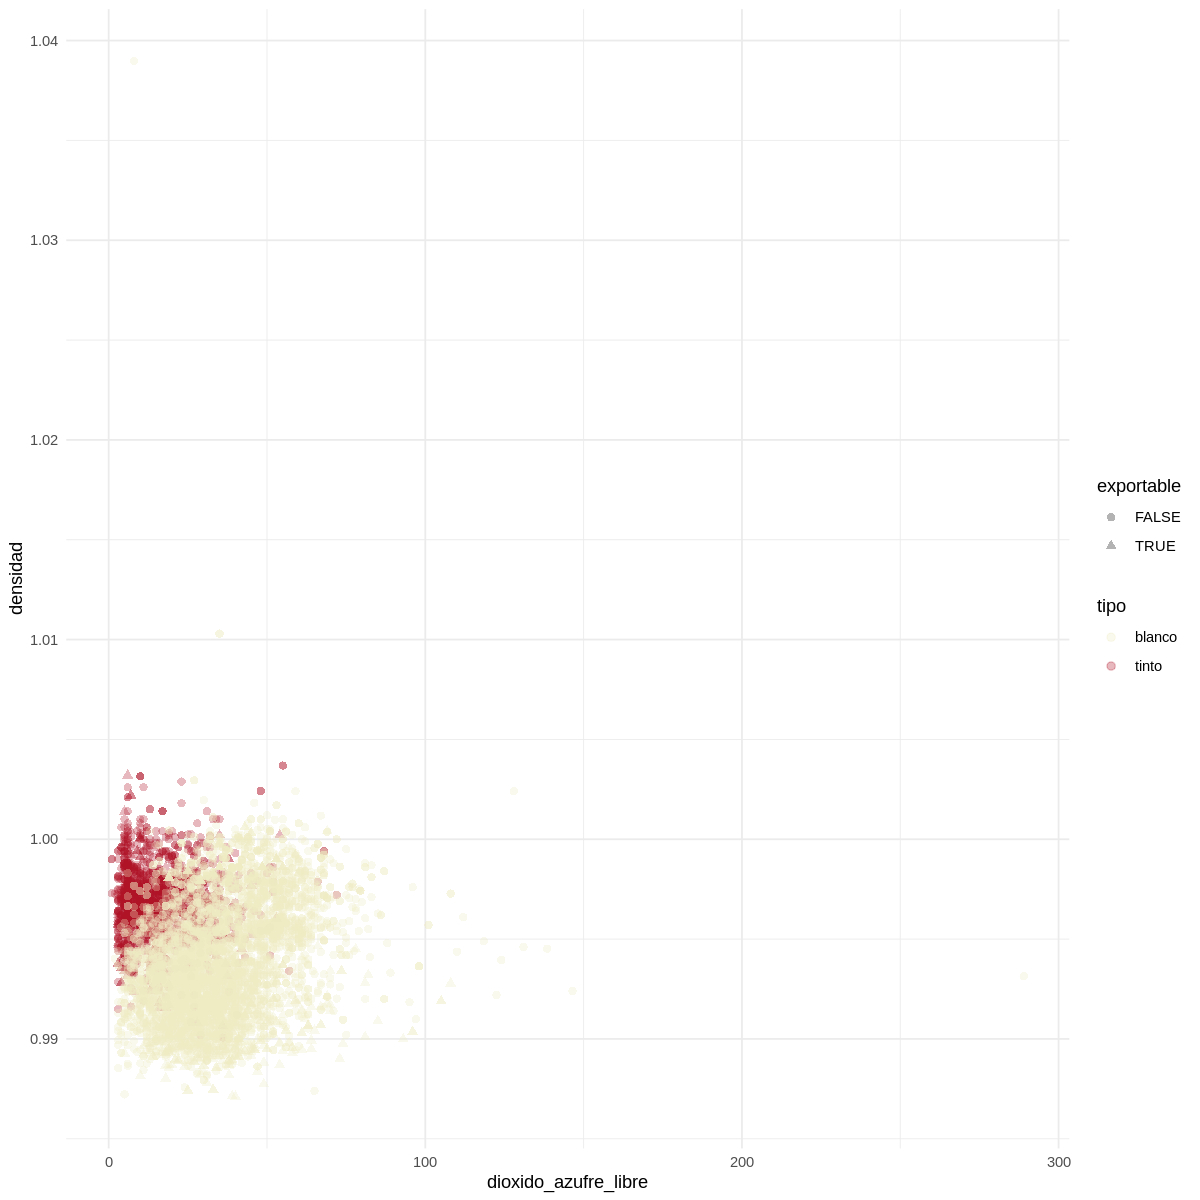

In [ ]:
options(repr.plot.width=10, repr.plot.height=10)
ggplot(data, aes(x=dioxido_azufre_libre,y=densidad, color = tipo) ) +
  geom_point(aes( shape=exportable), size=2, alpha = 0.3) +
  scale_color_manual(values=c("#EEEDC4", "#b11226"))+
  theme_minimal()



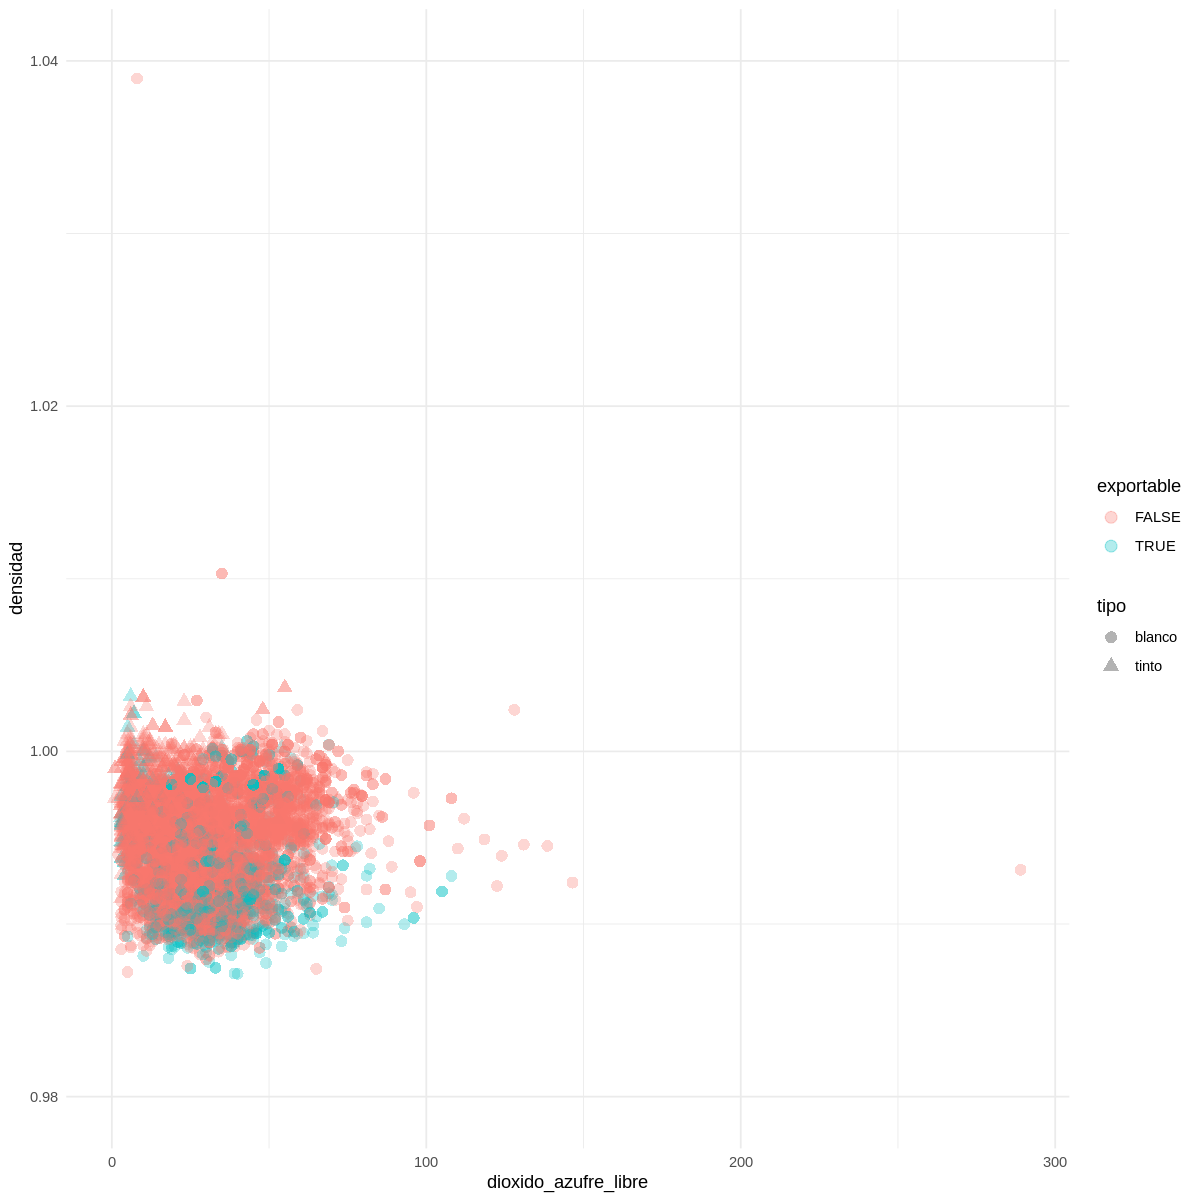

In [ ]:
options(repr.plot.width=10, repr.plot.height=10)
ggplot(data, aes(x=dioxido_azufre_libre,y=densidad) ) +
  geom_point(aes(color = exportable, shape=tipo), size=3, alpha = 0.3) +
  #scale_color_manual(values=c("#EEEDC4", "#b11226"))+
  xlim(0,290)+
   ylim(0.98,1.04)+
  theme_minimal()

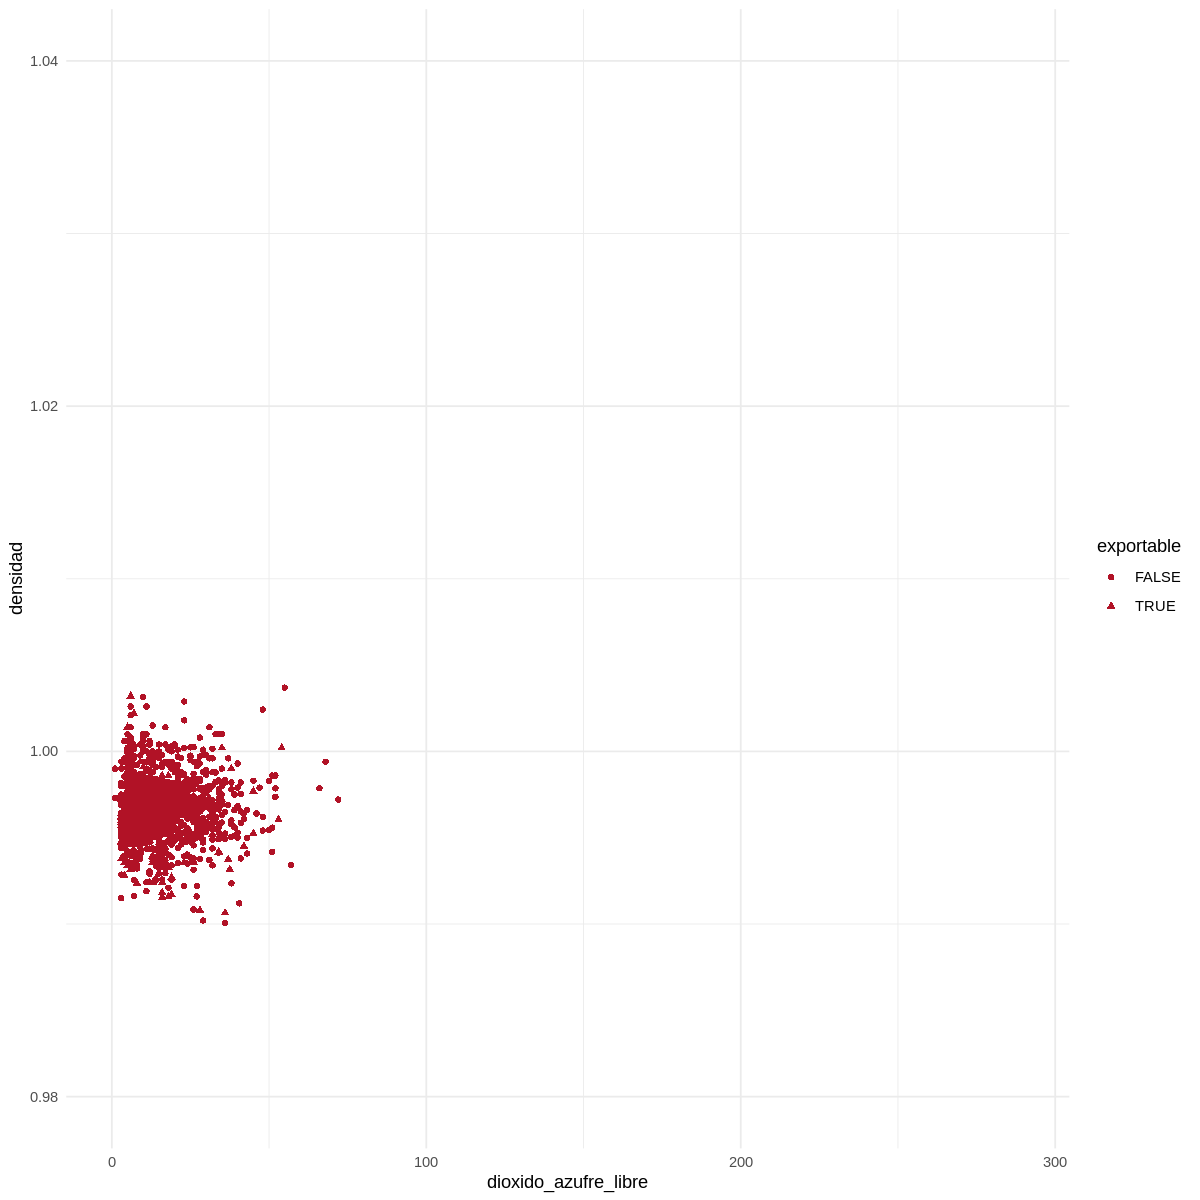

In [ ]:
options(repr.plot.width=10, repr.plot.height=10)
ggplot(data[data$tipo=='tinto',], aes(x=dioxido_azufre_libre,y=densidad, shape=exportable) ) +
   geom_point(color="#b11226" )+
   xlim(0,290)+
  ylim(0.98,1.04)+
  theme_minimal()

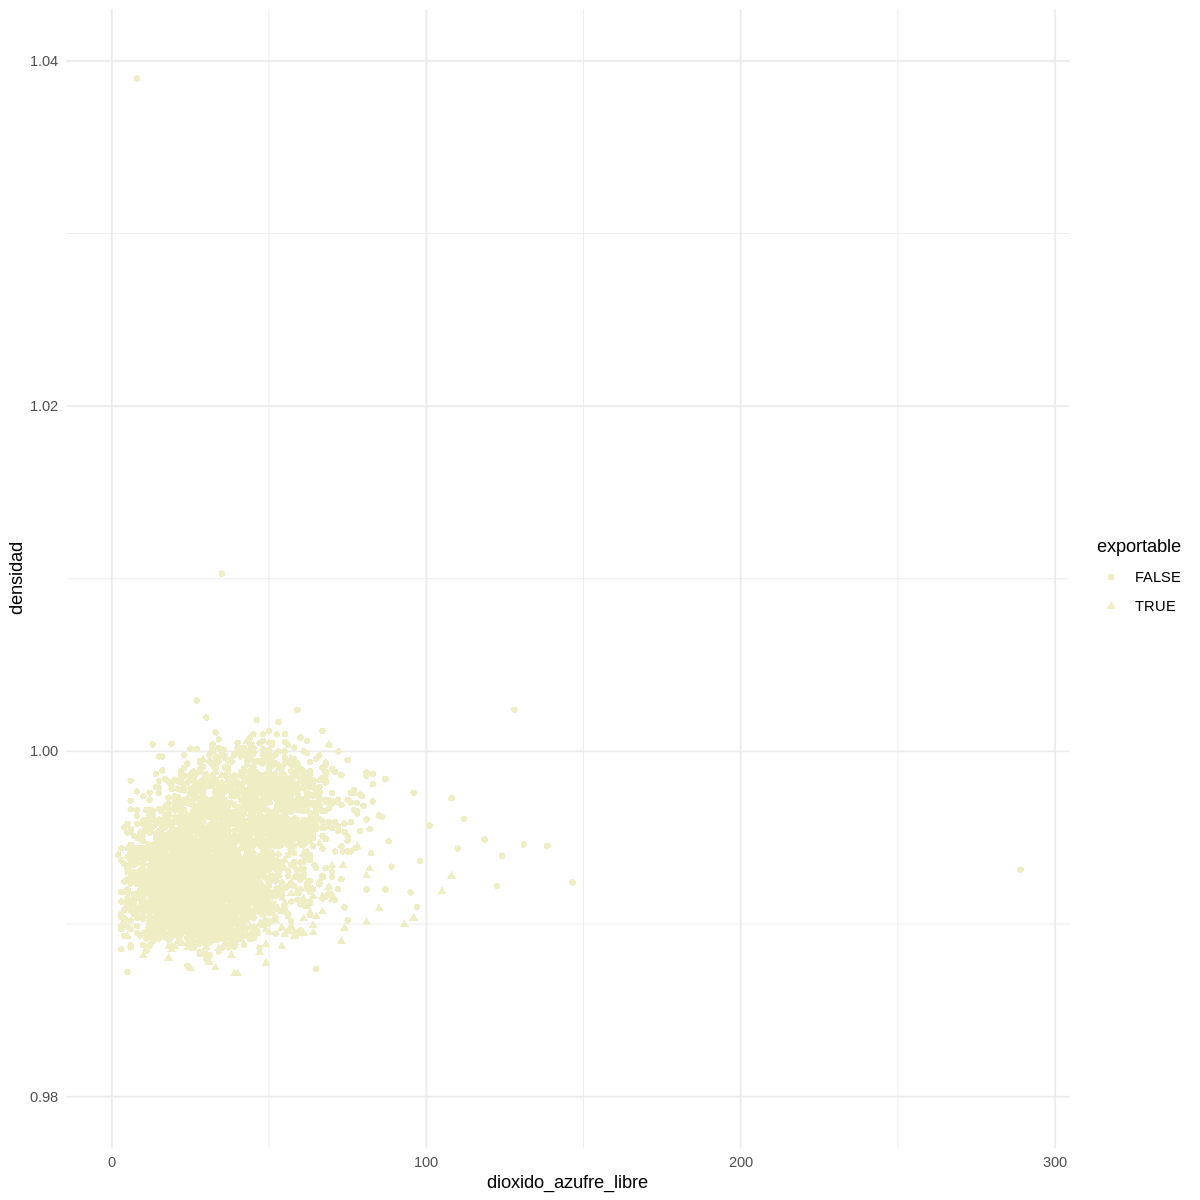

In [ ]:
ggplot(subset(data, tipo=='blanco'), aes(x=dioxido_azufre_libre,y=densidad, shape=exportable) ) +
  geom_point(color = "#EEEDC4")+
   xlim(0,290)+
  ylim(0.98,1.04)+
  theme_minimal()

Se puede llevar a cabo una prueba de hipótesis para el coeficiente de
correlación, y obtener un intervalo de confianza para el mismo.

Ho)ρ=0

Ha)ρ≠0

La sentencia es la siguiente:
cor.test(x, y, method = “pearson” o "spearman")

In [ ]:
cor.test(data$dioxido_azufre_libre, data$densidad,method="spearman", )


Warning message in cor.test.default(data$dioxido_azufre_libre, data$densidad, method = "spearman", :
“Cannot compute exact p-value with ties”



	Spearman's rank correlation rho

data:  data$dioxido_azufre_libre and data$densidad
S = 4.5441e+10, p-value = 0.6382
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.0058339 


In [ ]:
exportables <- subset(data,exportable==TRUE )
cor.test(exportables$dioxido_azufre_libre, exportables$densidad,method="spearman")

Warning message in cor.test.default(exportables$dioxido_azufre_libre, exportables$densidad, :
“Cannot compute exact p-value with ties”



	Spearman's rank correlation rho

data:  exportables$dioxido_azufre_libre and exportables$densidad
S = 383348275, p-value = 0.0001829
alternative hypothesis: true rho is not equal to 0
sample estimates:
       rho 
-0.1045168 


In [ ]:
noExportables <- subset(data,!exportable)
cor.test(noExportables$dioxido_azufre_libre, noExportables$densidad,method="spearman")

Warning message in cor.test.default(noExportables$dioxido_azufre_libre, noExportables$densidad, :
“Cannot compute exact p-value with ties”



	Spearman's rank correlation rho

data:  noExportables$dioxido_azufre_libre and noExportables$densidad
S = 2.2623e+10, p-value = 0.0009636
alternative hypothesis: true rho is not equal to 0
sample estimates:
       rho 
0.04567501 


In [ ]:
blancos <- subset(data, tipo=='blanco')
cor.test(blancos$dioxido_azufre_libre, blancos$densidad,method="spearman")

Warning message in cor.test.default(blancos$dioxido_azufre_libre, blancos$densidad, :
“Cannot compute exact p-value with ties”



	Spearman's rank correlation rho

data:  blancos$dioxido_azufre_libre and blancos$densidad
S = 1.3164e+10, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.3278218 


In [ ]:
tinto <- subset(data, tipo=='tinto')
cor.test(tinto$dioxido_azufre_libre, tinto$densidad,method="spearman")

Warning message in cor.test.default(tinto$dioxido_azufre_libre, tinto$densidad, :
“Cannot compute exact p-value with ties”



	Spearman's rank correlation rho

data:  tinto$dioxido_azufre_libre and tinto$densidad
S = 709445144, p-value = 0.09976
alternative hypothesis: true rho is not equal to 0
sample estimates:
        rho 
-0.04117768 


### Densidad y Ph


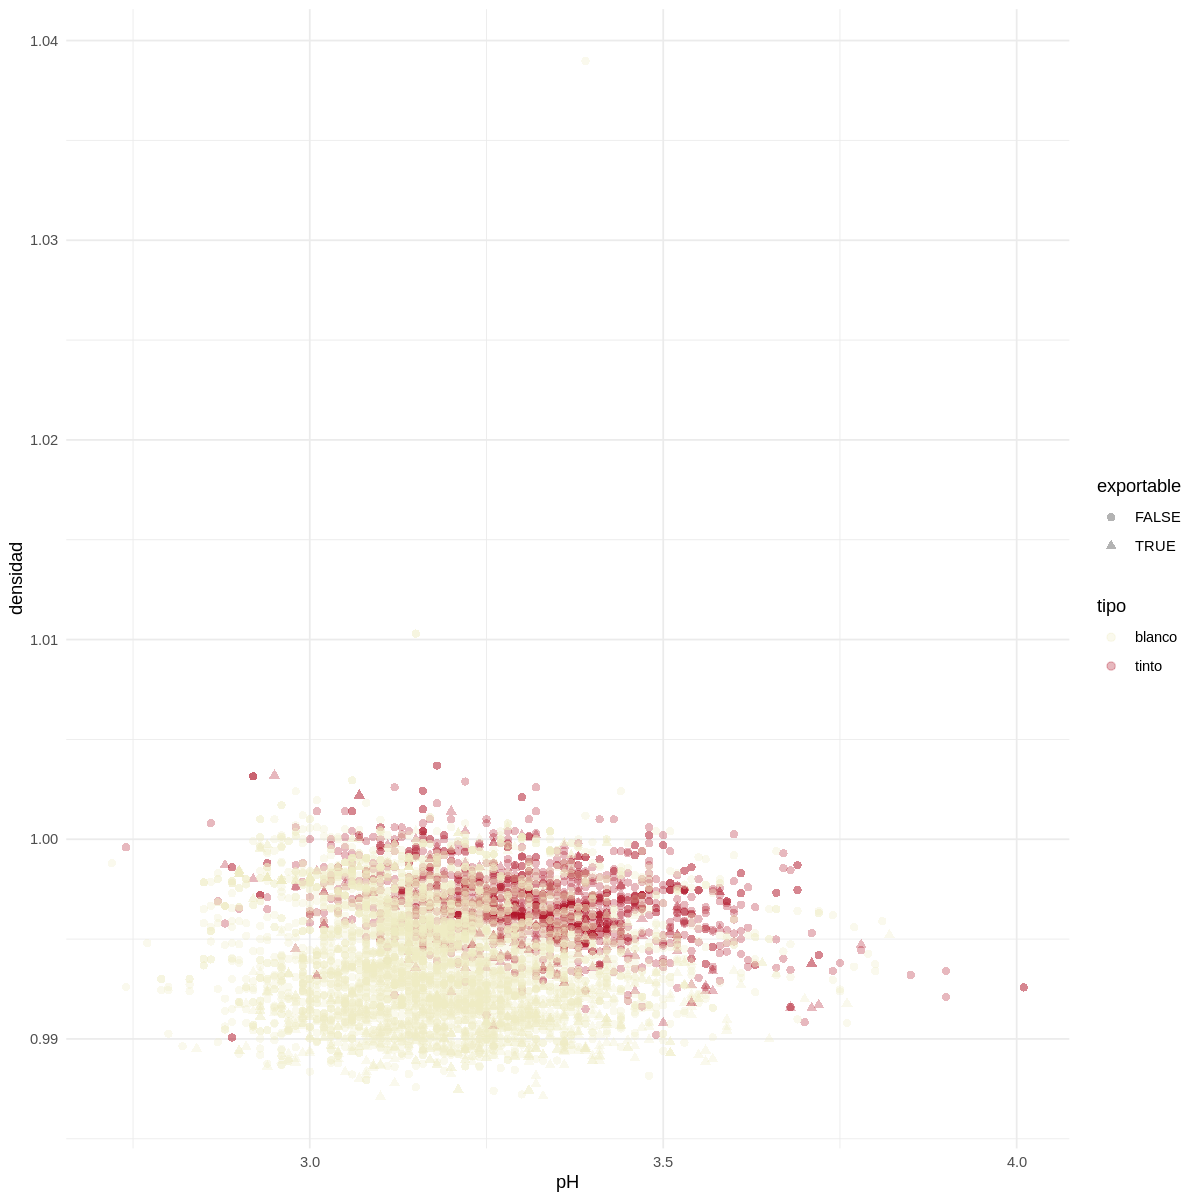

In [ ]:
options(repr.plot.width=10, repr.plot.height=10)
ggplot(data, aes(x=pH,y=densidad, color = tipo) ) +
  geom_point(aes( shape=exportable), size=2, alpha = 0.3) +
  scale_color_manual(values=c("#EEEDC4", "#b11226"))+
  theme_minimal()



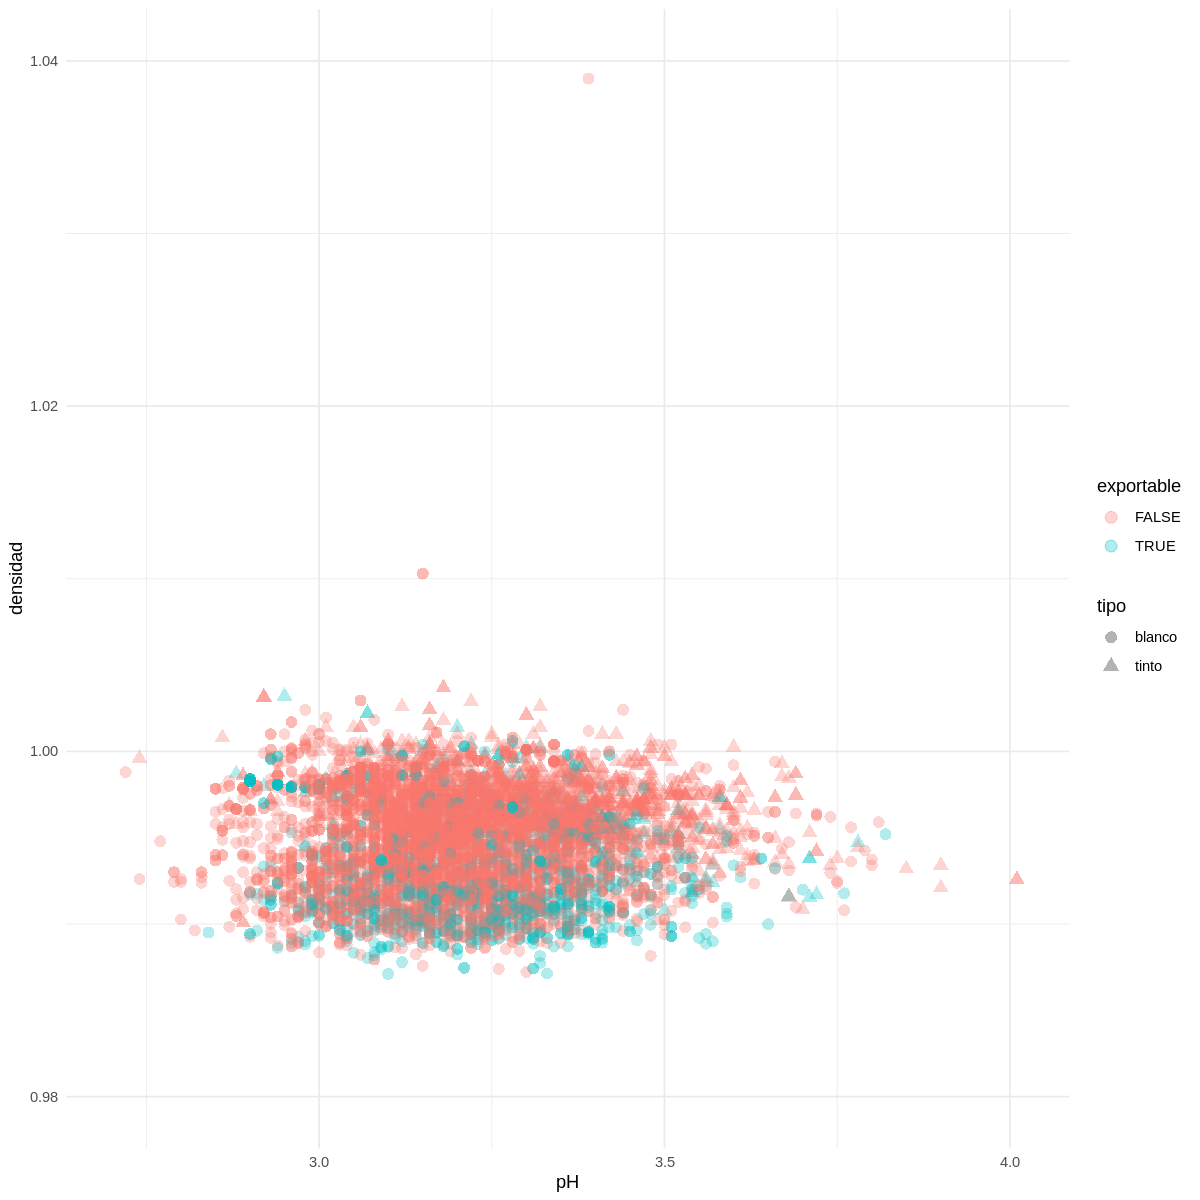

In [ ]:
options(repr.plot.width=10, repr.plot.height=10)
ggplot(data, aes(x=pH,y=densidad) ) +
  geom_point(aes(color = exportable, shape=tipo), size=3, alpha = 0.3) +
  #scale_color_manual(values=c("#EEEDC4", "#b11226"))+
  xlim(2.7,4.02)+
   ylim(0.98,1.04)+
  theme_minimal()

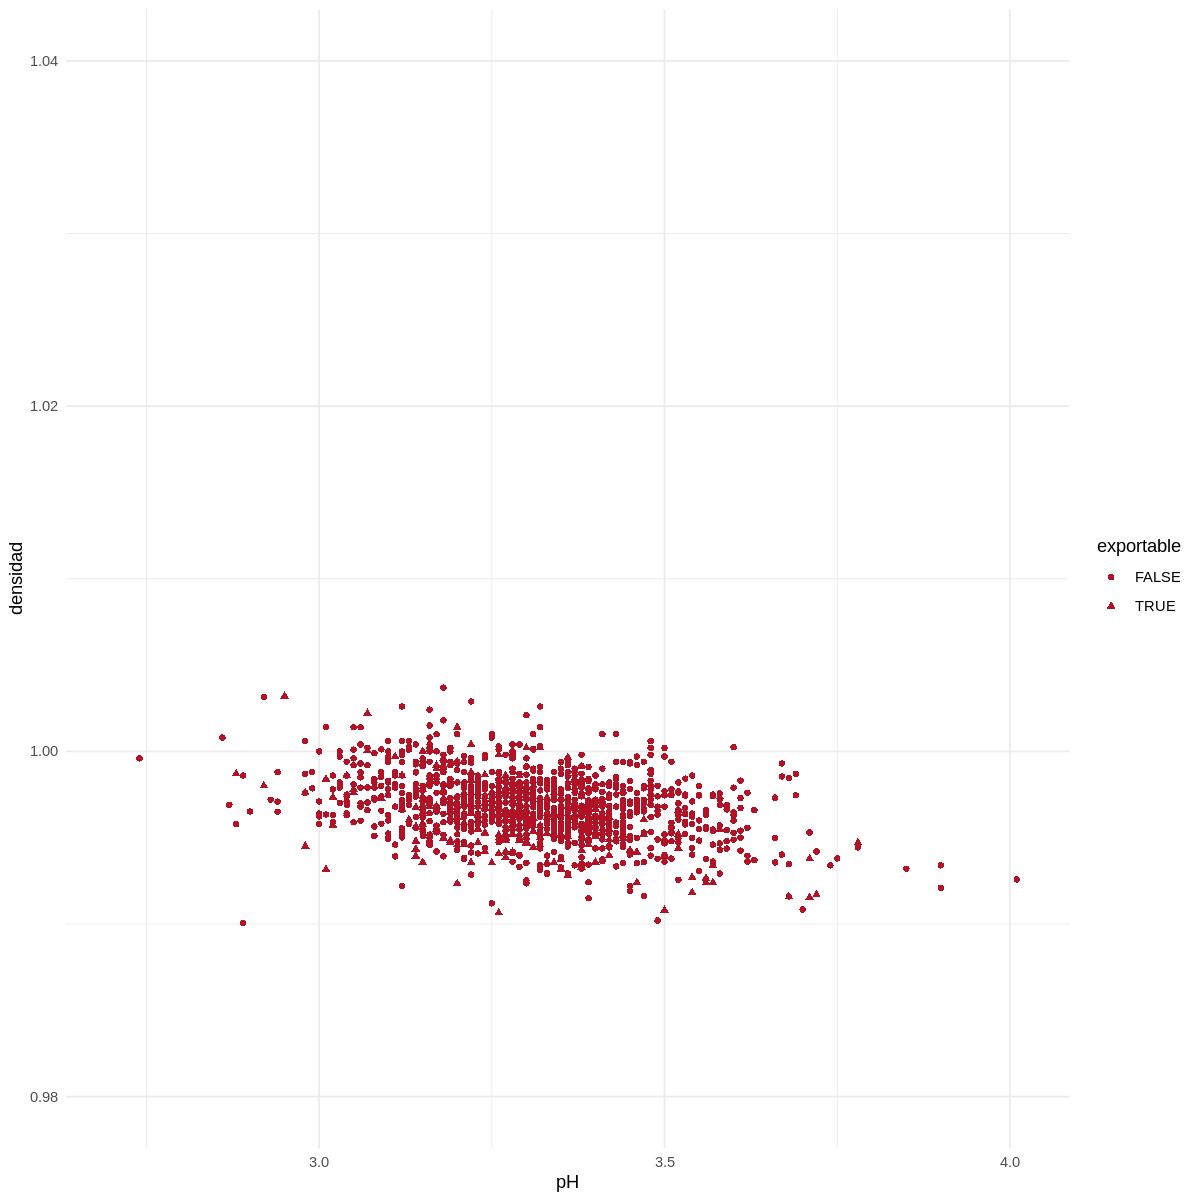

In [ ]:
options(repr.plot.width=10, repr.plot.height=10)
ggplot(data[data$tipo=='tinto',], aes(x=pH,y=densidad, shape=exportable) ) +
   geom_point(color="#b11226" )+
   xlim(2.7,4.02)+
   ylim(0.98,1.04)+
  theme_minimal()

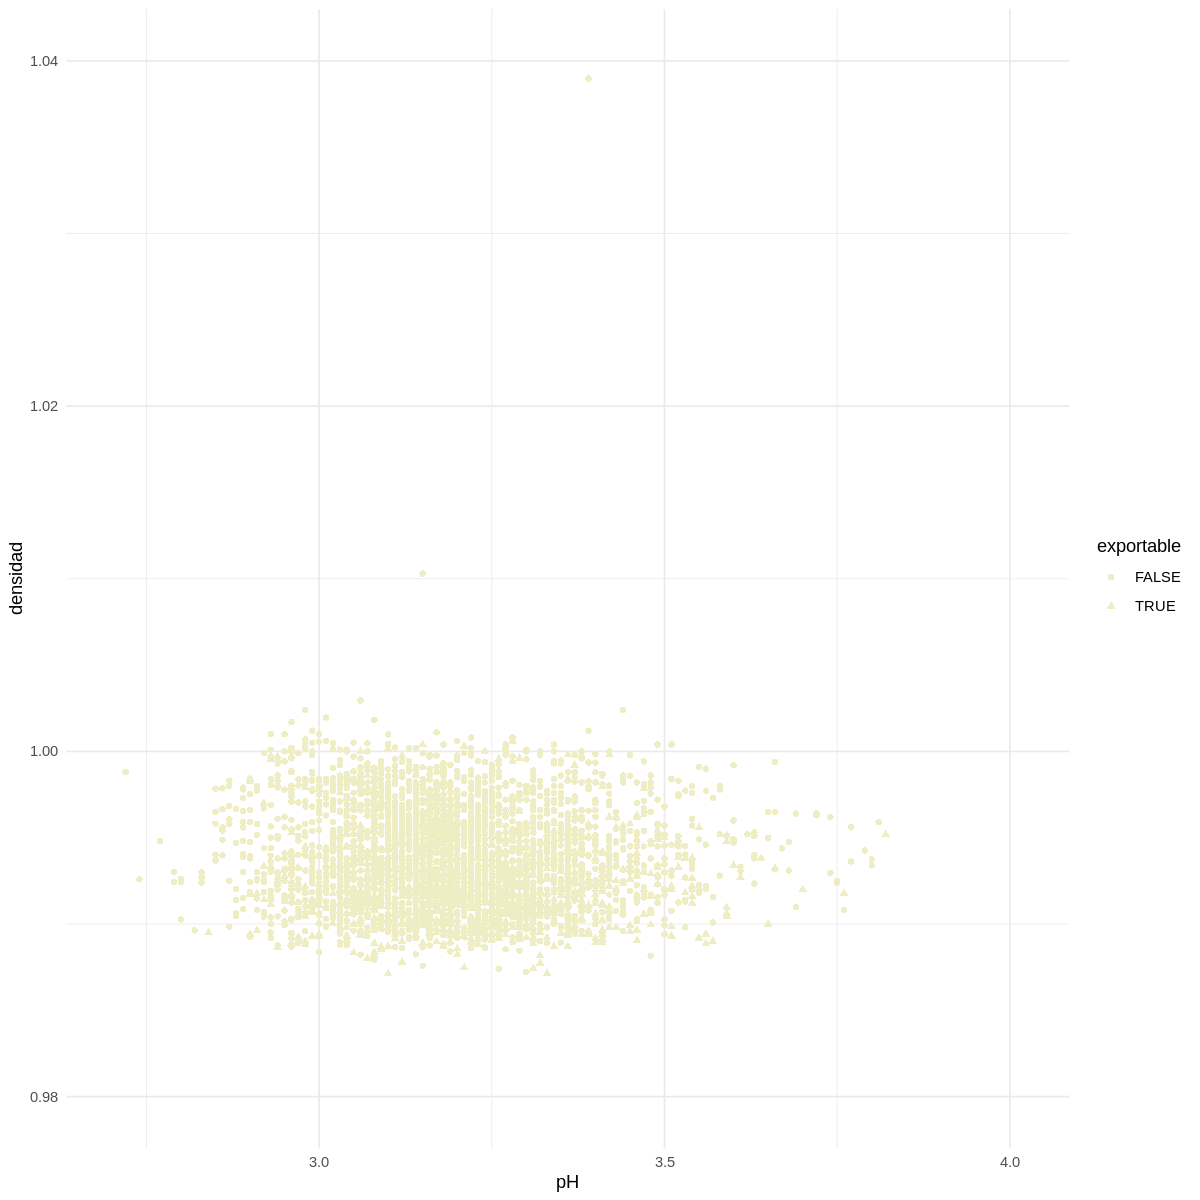

In [ ]:
ggplot(subset(data, tipo=='blanco'), aes(x=pH,y=densidad, shape=exportable) ) +
  geom_point(color = "#EEEDC4")+
 xlim(2.7,4.02)+
   ylim(0.98,1.04)+
  theme_minimal()

Se puede llevar a cabo una prueba de hipótesis para el coeficiente de
correlación, y obtener un intervalo de confianza para el mismo.

Ho)ρ=0

Ha)ρ≠0

La sentencia es la siguiente:
cor.test(x, y, method = “pearson” o "spearman")

In [ ]:
cor.test(data$pH, data$densidad,method="spearman", )


Warning message in cor.test.default(data$pH, data$densidad, method = "spearman", :
“Cannot compute exact p-value with ties”



	Spearman's rank correlation rho

data:  data$pH and data$densidad
S = 4.5169e+10, p-value = 0.3424
alternative hypothesis: true rho is not equal to 0
sample estimates:
       rho 
0.01178159 


In [ ]:
exportables <- subset(data,exportable==TRUE )
cor.test(exportables$pH, exportables$densidad,method="spearman")

Warning message in cor.test.default(exportables$pH, exportables$densidad, method = "spearman"):
“Cannot compute exact p-value with ties”



	Spearman's rank correlation rho

data:  exportables$pH and exportables$densidad
S = 371191228, p-value = 0.013
alternative hypothesis: true rho is not equal to 0
sample estimates:
        rho 
-0.06948951 


In [ ]:
noExportables <- subset(data,!exportable)
cor.test(noExportables$pH, noExportables$densidad,method="spearman")

Warning message in cor.test.default(noExportables$pH, noExportables$densidad, method = "spearman"):
“Cannot compute exact p-value with ties”



	Spearman's rank correlation rho

data:  noExportables$pH and noExportables$densidad
S = 2.2393e+10, p-value = 6.217e-05
alternative hypothesis: true rho is not equal to 0
sample estimates:
       rho 
0.05539571 


In [ ]:
blancos <- subset(data, tipo=='blanco')
cor.test(blancos$pH, blancos$densidad,method="spearman")

Warning message in cor.test.default(blancos$pH, blancos$densidad, method = "spearman"):
“Cannot compute exact p-value with ties”



	Spearman's rank correlation rho

data:  blancos$pH and blancos$densidad
S = 2.174e+10, p-value = 1.126e-14
alternative hypothesis: true rho is not equal to 0
sample estimates:
       rho 
-0.1100609 


In [ ]:
tinto <- subset(data, tipo=='tinto')
cor.test(tinto$pH, tinto$densidad,method="spearman")

Warning message in cor.test.default(tinto$pH, tinto$densidad, method = "spearman"):
“Cannot compute exact p-value with ties”



	Spearman's rank correlation rho

data:  tinto$pH and tinto$densidad
S = 894017536, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
       rho 
-0.3120551 


### Densidad y Alcohol


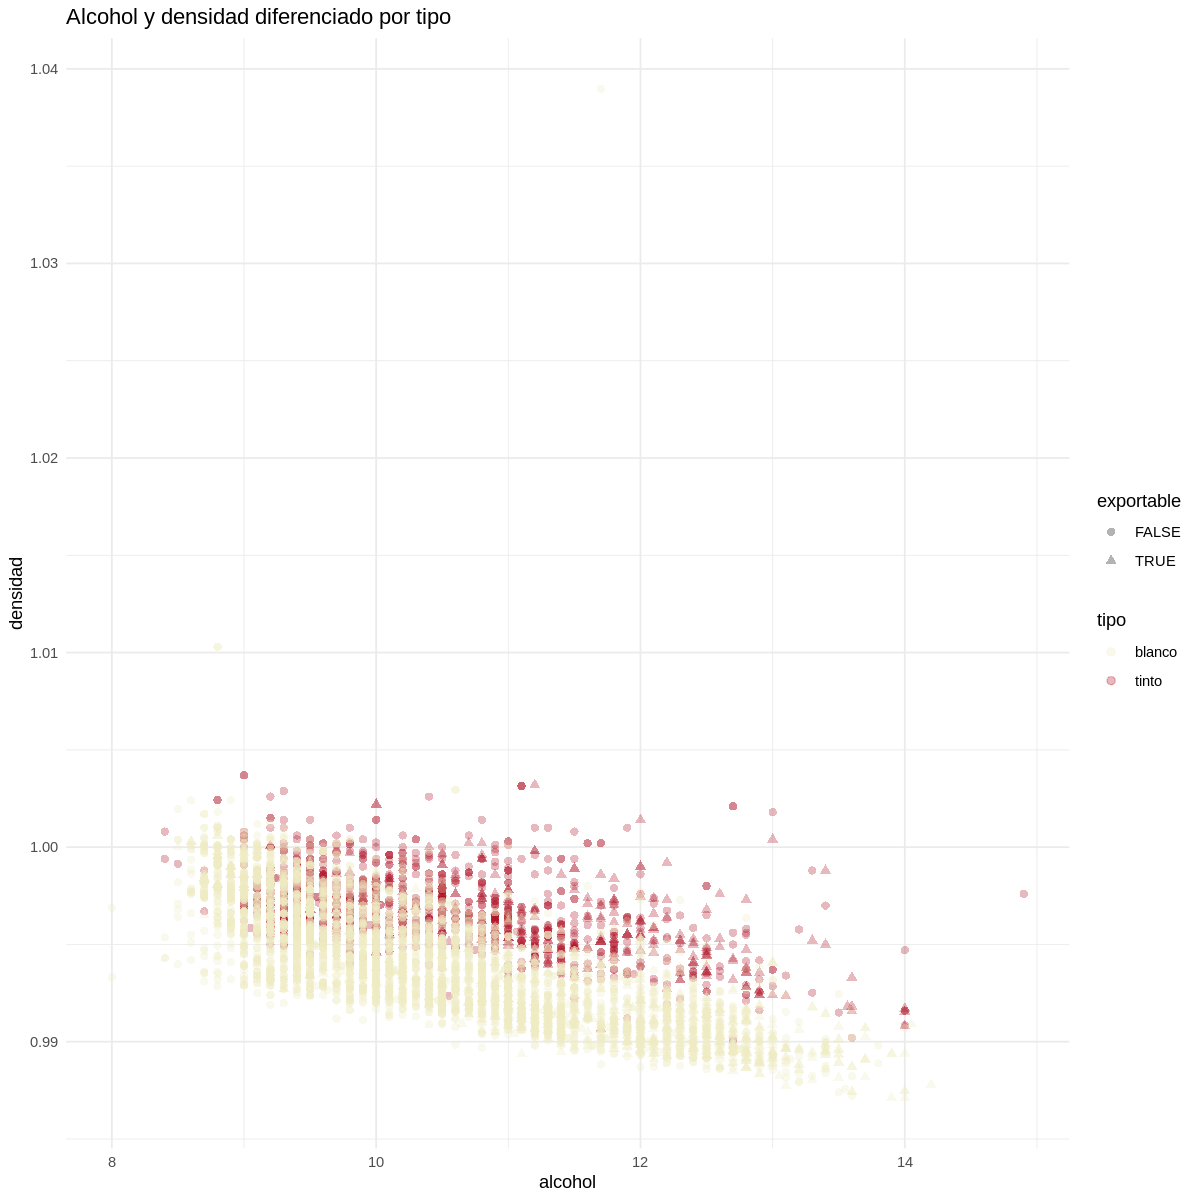

In [ ]:
options(repr.plot.width=10, repr.plot.height=10)
g1<-ggplot(data, aes(x=alcohol,y=densidad, color = tipo) ) +
  geom_point(aes( shape=exportable), size=2, alpha = 0.3) +
  scale_color_manual(values=c("#EEEDC4", "#b11226"))+
  labs(title="Alcohol y densidad diferenciado por tipo")+
  theme_minimal()
g1


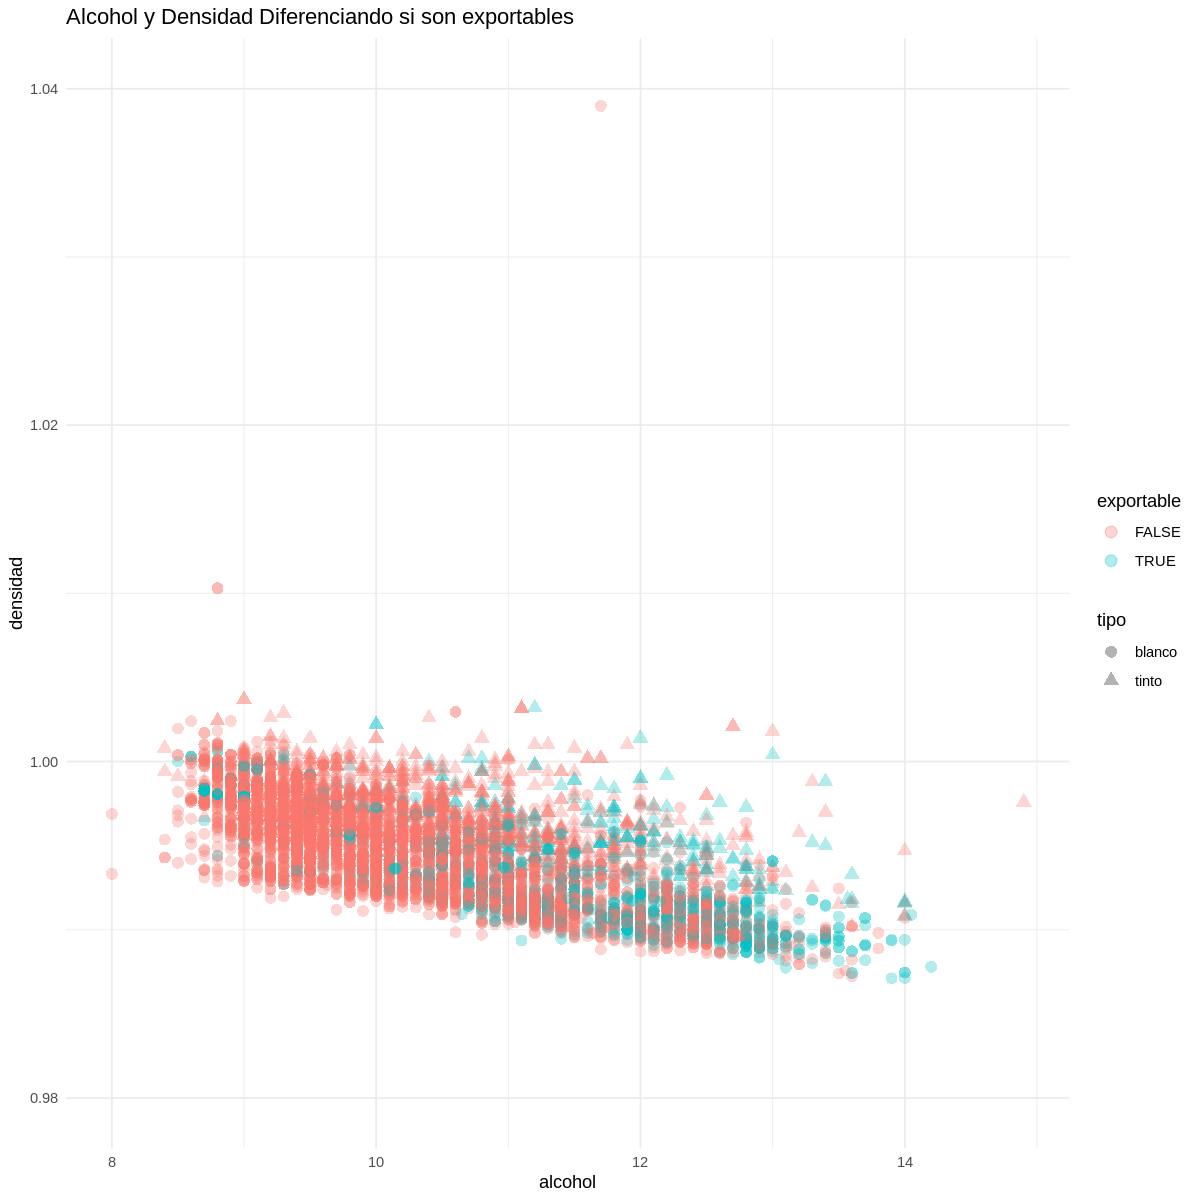

In [ ]:
options(repr.plot.width=10, repr.plot.height=10)
g2<-ggplot(data, aes(x=alcohol,y=densidad) ) +
  geom_point(aes(color = exportable, shape=tipo), size=3, alpha = 0.3) +
  #scale_color_manual(values=c("#EEEDC4", "#b11226"))+
  xlim(8,14.9)+
   ylim(0.98,1.04)+
   labs(title="Alcohol y Densidad Diferenciando si son exportables")+
   theme_minimal()
g2

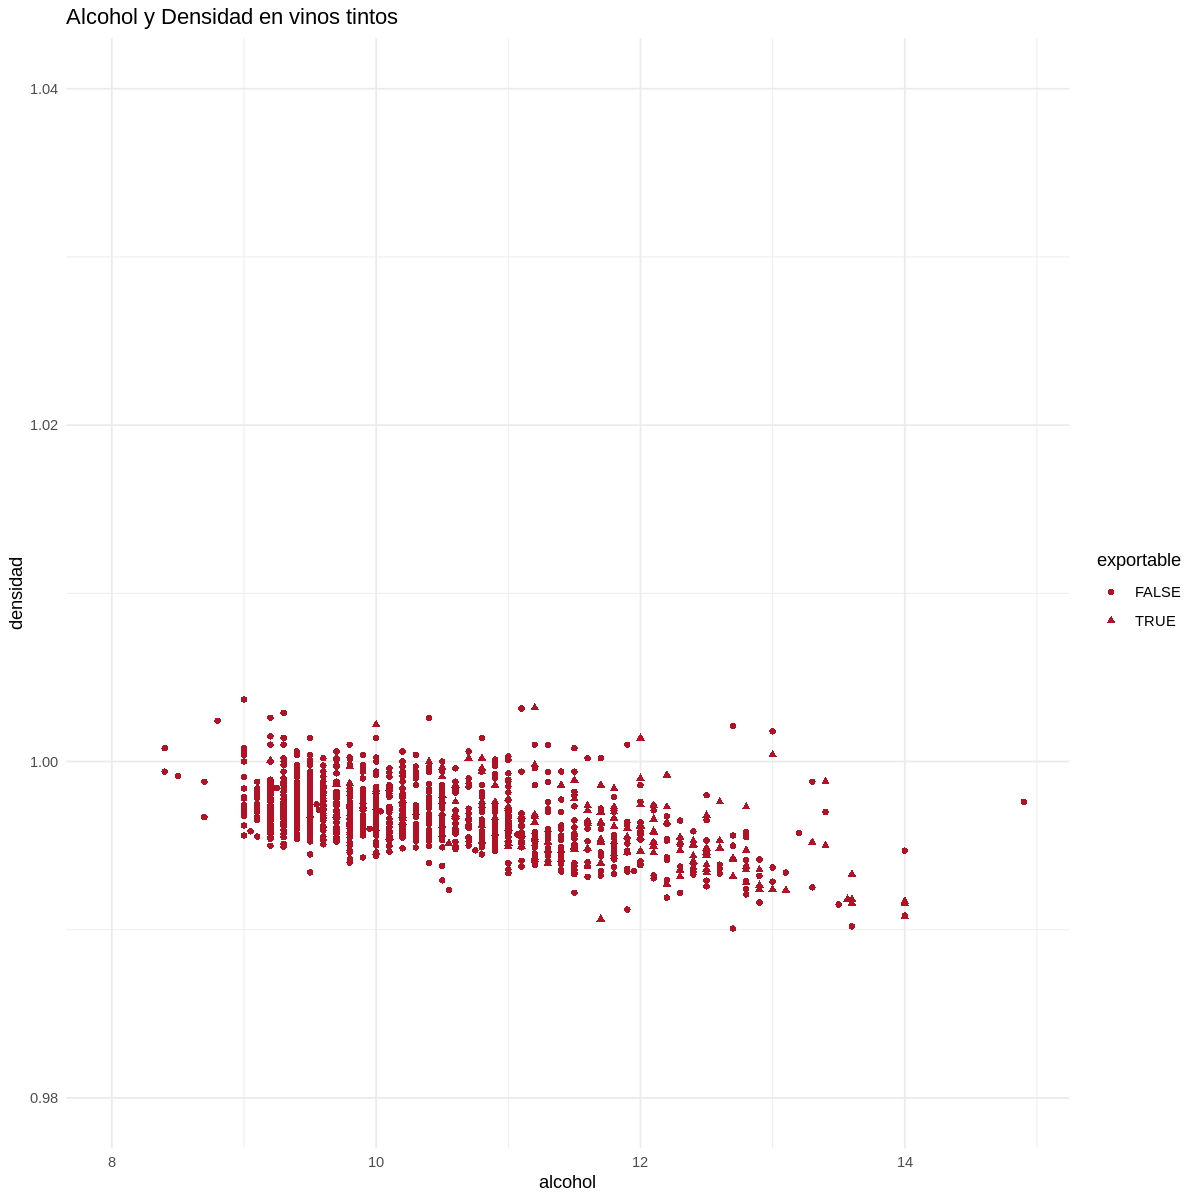

In [ ]:
options(repr.plot.width=10, repr.plot.height=10)
g3<-ggplot(data[data$tipo=='tinto',], aes(x=alcohol,y=densidad, shape=exportable) ) +
   geom_point(color="#b11226" )+
    xlim(8,14.9)+
   ylim(0.98,1.04)+
   labs(title="Alcohol y Densidad en vinos tintos")+
  theme_minimal()
g3

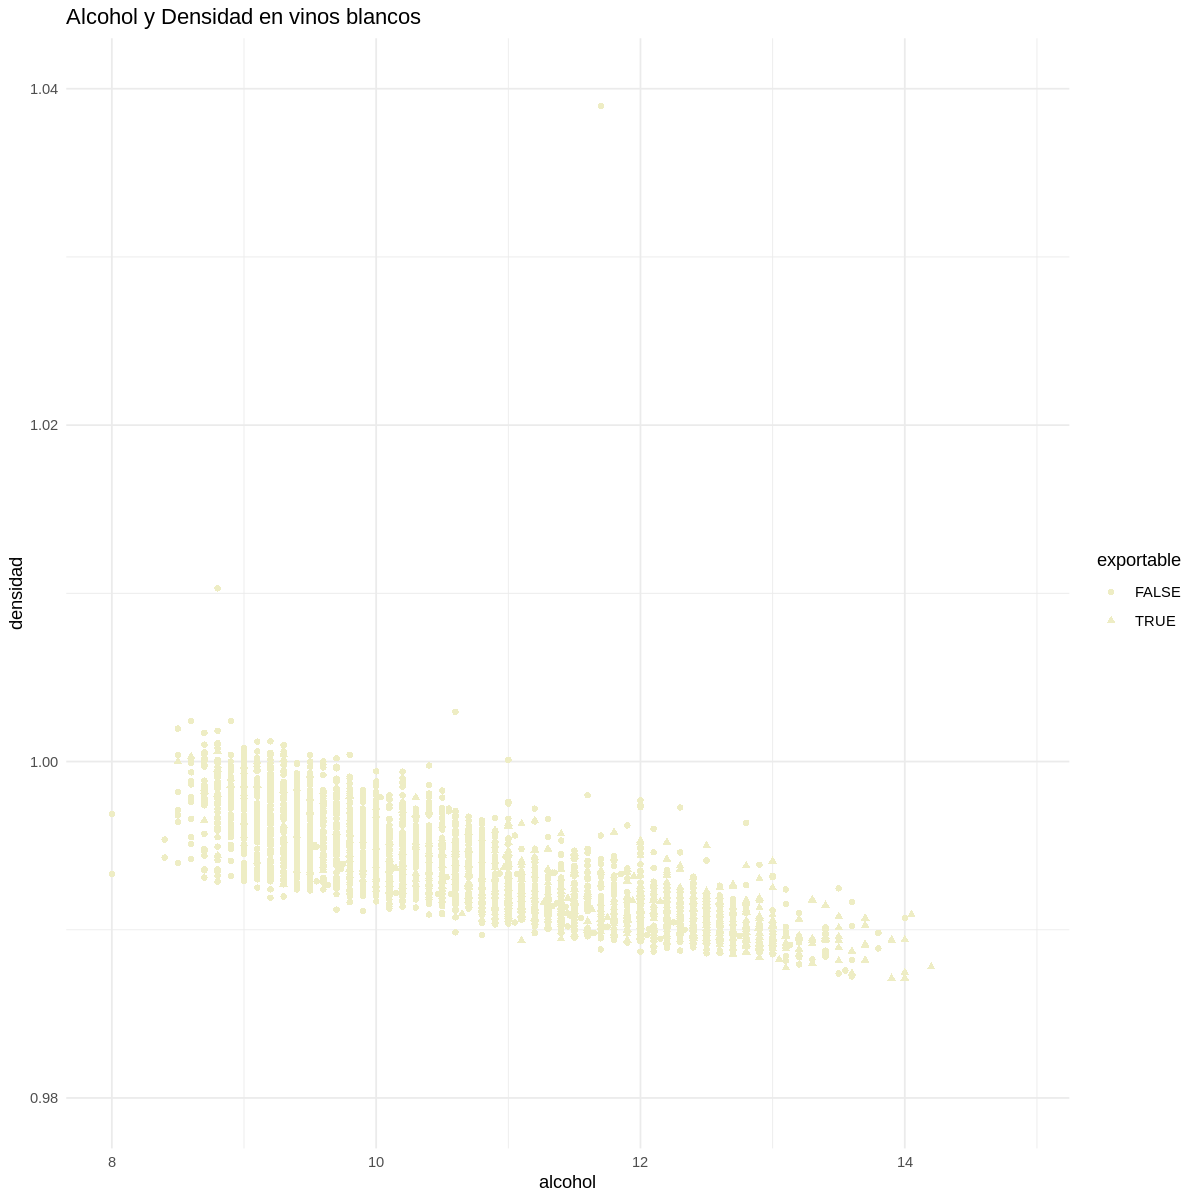

In [ ]:
g4<-ggplot(subset(data, tipo=='blanco'), aes(x=alcohol,y=densidad, shape=exportable) ) +
  geom_point(color = "#EEEDC4")+
  xlim(8,14.9)+
   ylim(0.98,1.04)+
  labs(title="Alcohol y Densidad en vinos blancos")+
  theme_minimal()
g4

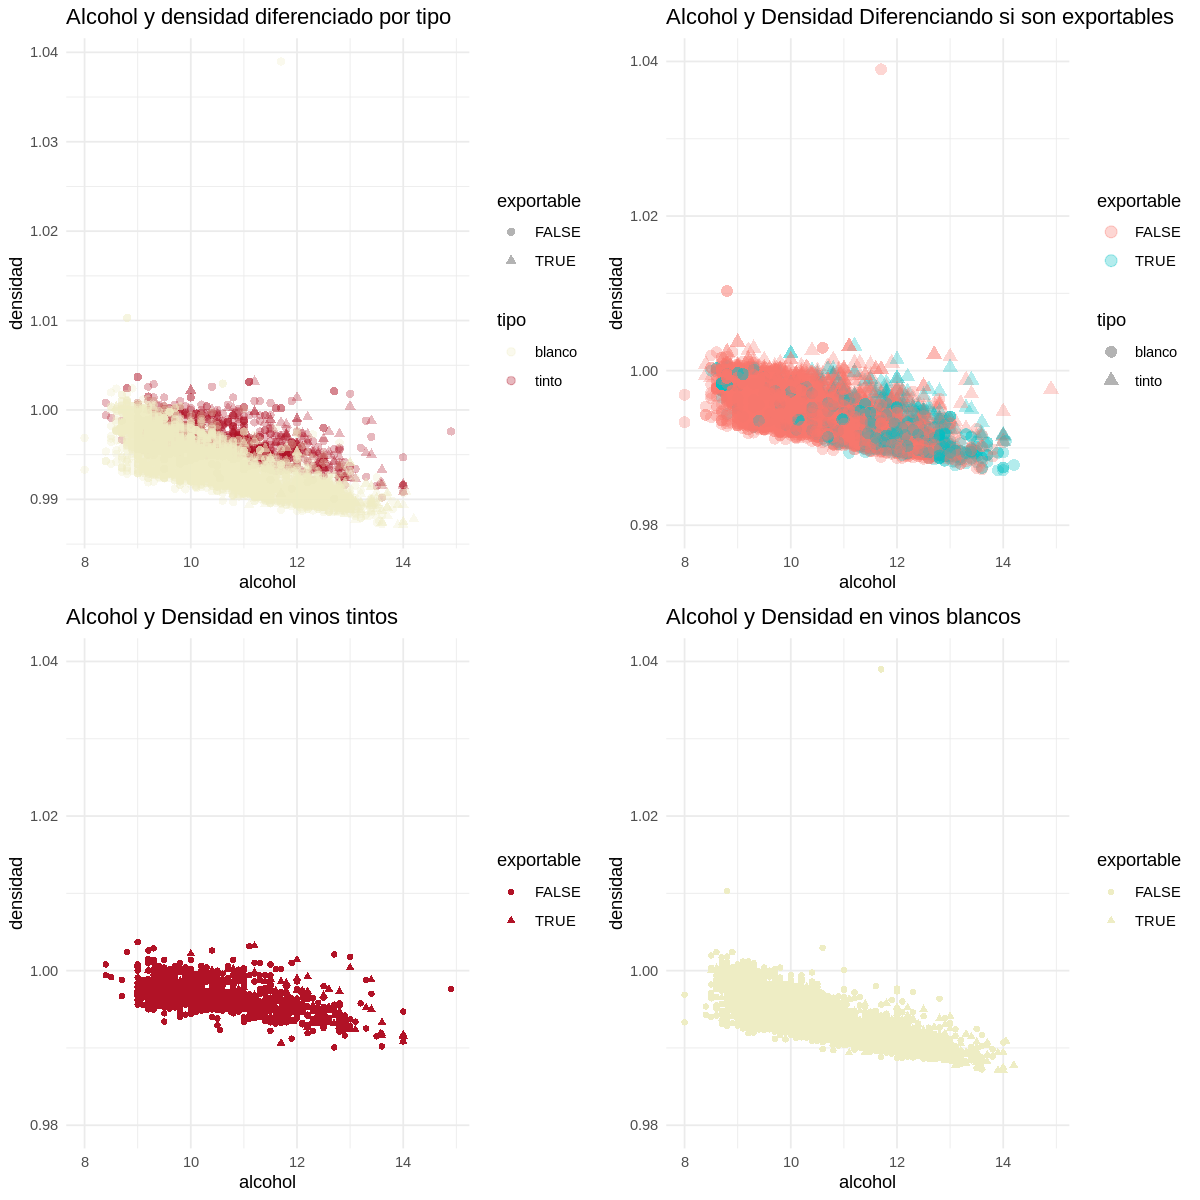

In [ ]:
ggarrange(g1,g2,g3,g4,ncol = 2)

Se puede llevar a cabo una prueba de hipótesis para el coeficiente de
correlación, y obtener un intervalo de confianza para el mismo.

Ho)ρ=0

Ha)ρ≠0

La sentencia es la siguiente:
cor.test(x, y, method = “pearson” o "spearman")

In [ ]:
cor.test(data$alcohol, data$densidad,method="spearman", )


Warning message in cor.test.default(data$alcohol, data$densidad, method = "spearman", :
“Cannot compute exact p-value with ties”



	Spearman's rank correlation rho

data:  data$alcohol and data$densidad
S = 7.7677e+10, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
       rho 
-0.6994388 


In [ ]:
exportables <- subset(data,exportable==TRUE )
cor.test(exportables$alcohol, exportables$densidad,method="spearman")

Warning message in cor.test.default(exportables$alcohol, exportables$densidad, method = "spearman"):
“Cannot compute exact p-value with ties”



	Spearman's rank correlation rho

data:  exportables$alcohol and exportables$densidad
S = 589042080, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
       rho 
-0.6971692 


In [ ]:
noExportables <- subset(data,!exportable)
cor.test(noExportables$alcohol, noExportables$densidad,method="spearman")

Warning message in cor.test.default(noExportables$alcohol, noExportables$densidad, :
“Cannot compute exact p-value with ties”



	Spearman's rank correlation rho

data:  noExportables$alcohol and noExportables$densidad
S = 3.888e+10, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
       rho 
-0.6400768 


In [ ]:
blancos <- subset(data, tipo=='blanco')
cor.test(blancos$alcohol, blancos$densidad,method="spearman")

Warning message in cor.test.default(blancos$alcohol, blancos$densidad, method = "spearman"):
“Cannot compute exact p-value with ties”



	Spearman's rank correlation rho

data:  blancos$alcohol and blancos$densidad
S = 3.568e+10, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
       rho 
-0.8218551 


In [ ]:
tinto <- subset(data, tipo=='tinto')
cor.test(tinto$alcohol, tinto$densidad,method="spearman")

Warning message in cor.test.default(tinto$alcohol, tinto$densidad, method = "spearman"):
“Cannot compute exact p-value with ties”



	Spearman's rank correlation rho

data:  tinto$alcohol and tinto$densidad
S = 996491017, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
       rho 
-0.4624446 
